# TD 2 IA Suite ML et Deep Learning


1. Ensemble Learning
2. MLP
3. CNN



## 1. Ensemble Learning



### Ensemble learning

L'idée est de combiner plusieurs modèles pour en faire un ensemble plus performants.

En général, on distingue deux familles de méthodes de ce type :

1. Méthodes par moyennage (*bagging*, forêts aléatoires) où le principe est de faire la moyenne de plusieurs prédictions .  
1. Méthodes adaptatives (*boosting*) où les paramètres sont itérativement adaptés pour produire un meilleur mélange.  


Dans la suite nous explorerons chacune de ces classes d’algorithme.

In [3]:

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


# creation d'un classifieur bagging composé de classifieurs KNeighbors
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

Dans cet exemple nous allons utiliser la base de données `digits`, qui contient 10 classes (images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 attributs (8 pixels par 8).

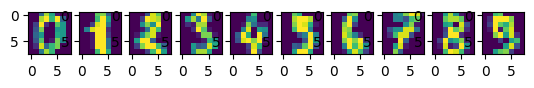

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

Pour établir des performances de référence, nous allons implémenter un arbre de décision pour la classification. Découpons la base de données en un jeu d’apprentissage et un jeux de test afin d'étudier la généralisation de l’arbre sur des données différentes de celles d’apprentissage :

In [5]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.681087762669963


# Exercice 1 : Quelle sont la moyenne et la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure ?

Faire une boucle for pour mesurer la moyenne et la variance de la valeur accuracy

In [7]:
# à completer
N = 100
accuracies = []
for i in range(N):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracies.append(clf.score(X_test,y_test))
  print(accuracies[i])
print(np.mean(accuracies), np.std(accuracies))

0.8888888888888888
0.8555555555555555
0.9222222222222223
0.8333333333333334
0.8666666666666667
0.8666666666666667
0.8555555555555555
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.8333333333333334
0.9
0.8444444444444444
0.9111111111111111
0.8777777777777778
0.8666666666666667
0.8555555555555555
0.7777777777777778
0.8666666666666667
0.8
0.8111111111111111
0.8888888888888888
0.8222222222222222
0.8888888888888888
0.8555555555555555
0.7777777777777778
0.8111111111111111
0.8777777777777778
0.8666666666666667
0.9222222222222223
0.8222222222222222
0.8666666666666667
0.8888888888888888
0.8888888888888888
0.8111111111111111
0.8
0.8777777777777778
0.8444444444444444
0.9
0.8222222222222222
0.8111111111111111
0.8666666666666667
0.8
0.8333333333333334
0.8555555555555555
0.8444444444444444
0.8666666666666667
0.8888888888888888
0.7888888888888889
0.8444444444444444
0.7444444444444445
0.9333333333333333
0.8
0.8666666666666667
0.8333333333333334
0.8777777777777778
0.8777777777777778
0.86666

Pour comparer, construisons maintenant avec la méthode `BaggingClassifier` un classifieur *bagging* sur nos données, toujours basé sur les `DecisionTreeClassifier` :

In [8]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

L’apprentissage et l’évaluation de cet ensemble se font de la façon habituelle :

In [9]:
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

print(accuracy)

0.9888888888888889


# Exercice 2 : Calculer la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?

In [11]:
# à completer
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])
print(np.mean(accuracies), np.std(accuracies))

0.9333333333333333
0.9888888888888889
0.9666666666666667
0.9555555555555556
0.9555555555555556
0.9666666666666667
1.0
0.9888888888888889
0.9555555555555556
0.9888888888888889
0.9666666666666667
0.9888888888888889
0.9777777777777777
0.9888888888888889
0.9888888888888889
0.9777777777777777
0.9333333333333333
0.9444444444444444
0.9666666666666667
1.0
0.9555555555555556
0.9777777777777777
0.9666666666666667
0.9666666666666667
0.9555555555555556
0.9555555555555556
1.0
0.9555555555555556
0.9888888888888889
0.9666666666666667
1.0
0.9666666666666667
0.9444444444444444
0.9888888888888889
0.9777777777777777
1.0
0.9555555555555556
0.9888888888888889
0.9666666666666667
0.9333333333333333
0.9888888888888889
0.9555555555555556
0.9666666666666667
0.9666666666666667
0.9777777777777777
0.9888888888888889
0.9555555555555556
1.0
0.9555555555555556
0.9888888888888889
0.9888888888888889
0.9666666666666667
0.9444444444444444
0.9777777777777777
0.9555555555555556
0.9888888888888889
1.0
0.9222222222222223
0.9

On obtient un meilleur classifieur (`accuracy`), qui en plus est beaucoup plus stable : `stdev` autour de 1%.

Construisons le graphique `accuracy` vs `n_estimators`.

Le taux d’erreur diminue avec `n_estimators`, mais à partir d’une valeur il se stabilise, donc on ne gagne rien à partir de cette valeur de `n_estimators`, si ce n’est que l’algorithme devient plus lent. Dans le code suivant nous avons pris `test_size = 0.5` pour que l’effet soit plus visible.

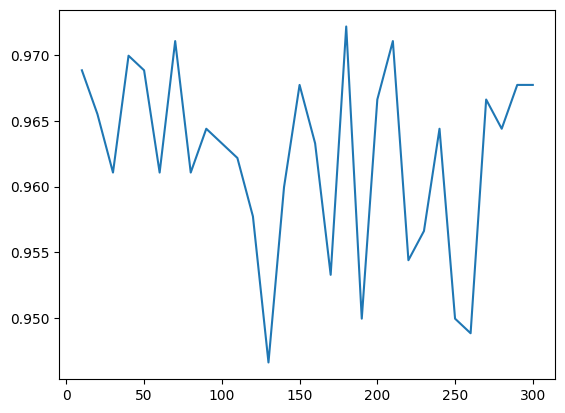

In [13]:
N = 30
accuracy = []

for i in range(N):
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
   clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5,n_estimators=200)
   clf.fit(X_train, y_train)
   Z = clf.predict(X_test)
   accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

### Forêts aléatoires (Random Forests)

L’algorithme des forêts aléatoires propose une optimisation des arbres de décision. Il utilise le même principe que le *bagging*, mais avec une étape supplémentaire de randomisation dans la sélection des attributs des nœuds dans le but de réduire la variance de l’estimateur obtenu. Les deux objets Python qui implémentent les forêts aléatoires sont `RandomForestClassifier` et `RandomForestRegressor`. Les paramètres les plus importants sont :

> - `n_estimators` : integer, optional (default=10). Le nombre d’arbres.  
- `max_features` : le nombre d’attributs à considérer à chaque split.  
- `max_samples` : la taille de l’échantillon aléatoire tiré de la base d’apprentissage.  
- `min_samples_leaf` : le nombre minimal d’éléments dans un nœud feuille.  
- `oob_score` : boolean. Estimer ou non l’erreur de généralisation OOB (*Out of Bag*).  



Par la suite nous allons refaire la classification sur la base Digits en utilisant un classifieur `RandomForestClassifier`. Comme d’habitude, on sépare les données en gardant 10% pour l’apprentissage et 90% pour le test.


# Exercice 3 : faire le split avec un test size de 90% et 10% pour le train

In [14]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

On peut désormais créer et entraîner notre modèle :

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

# Exercice 4 : réaliser les prédictions du classifieur Random Forest (avec la fonction predict) et calculer le score (avec la fonction score) du jeu de test :

In [16]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.8986402966625463


# Exercice 5 : Comparer les accuracy (score) d'un arbre de décision, du classifieur bagging, et d'une RF avec 200 arbres
Comment la valeur de la variable `accuracy` se compare avec le cas *bagging* qui utilise le même nombre d’arbres (200 dans notre cas) ?

In [17]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))


Arbre de décision : 0.6644004944375772
Bagging (200 arbres) : 0.8733003708281829
Forêt aléatoire (200 arbres) : 0.880716934487021


Les forêts aléatoires produisent un classifieur un peu meilleur sur cette base de données.

Construisons la variance de la valeur `accuracy` sur 100 tirages pour la séparation apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente (*bagging*) ?

In [18]:
N = 10

bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))

print(np.mean(bagging_accuracies), np.std(bagging_accuracies))


rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))

print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9342602892102334 0.008507091793102935
0.9577308120133482 0.0076743885698155245


Nous avons donc non seulement un plus faible taux moyen d’erreurs, mais aussi une variance plus faible.

# Exercice 6 : Construire le graphique `accuracy` vs `n_estimators` pour le classifieur RF. Que constatez-vous ? A partir de quelle valeur on n’améliore plus ?

10 0.9221357063403782
20 0.9488320355951056
30 0.9577308120133482
40 0.9599555061179088
50 0.9710789766407119
60 0.9621802002224694
70 0.9688542825361512
80 0.9632925472747497
90 0.9588431590656284
100 0.9721913236929922
110 0.9699666295884316
120 0.9655172413793104
130 0.9699666295884316
140 0.9632925472747497
150 0.9710789766407119
160 0.9721913236929922
170 0.9710789766407119
180 0.9699666295884316
190 0.9733036707452726
200 0.9733036707452726
210 0.9744160177975528
220 0.9710789766407119
230 0.9721913236929922
240 0.9721913236929922
250 0.9688542825361512
260 0.9699666295884316
270 0.9755283648498332
280 0.9721913236929922
290 0.9688542825361512
300 0.9755283648498332


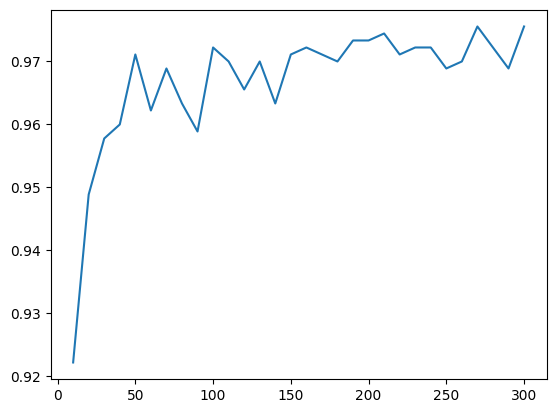

In [19]:
# à compléter

N = 30
accuracy = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for i in range(N):
    clf = RandomForestClassifier(n_estimators=(i+1)*10)
    clf.fit(X_train, y_train)
    accuracy.append(clf.score(X_test,y_test))
    print((i+1)*10, accuracy[i])

plt.plot([10*(i+1) for i in range(30)], accuracy)
plt.show()

  
A partir de `n_estimators = 70` le résultat commence à osciller autour de la moyenne donc on ne gagne plus rien en augmentant la valeur.

## 2. MLP

Importation des libraries

In [20]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

## Le Perceptron

Le Perceptron est l'une des architectures les plus simples des réseaux de neurones artificiels (ANN), inventée en 1957 par Frank Rosenblatt. Il est basé sur un neurone artificiel légèrement différent (voir Figure) appelé unité logique de seuil (TLU), ou parfois unité de seuil linéaire (LTU) : les entrées et la sortie sont maintenant des nombres (au lieu de valeurs binaires activé/désactivé) et chaque connexion d'entrée est associée à un poids. Le TLU calcule une somme pondérée de ses entrées (z = w1 x1 + w2 x2 + ⋯ + wn xn = xT w), puis applique une fonction d'étape à cette somme et produit en sortie le résultat : h_w(x) = step(z), où z = xT w.

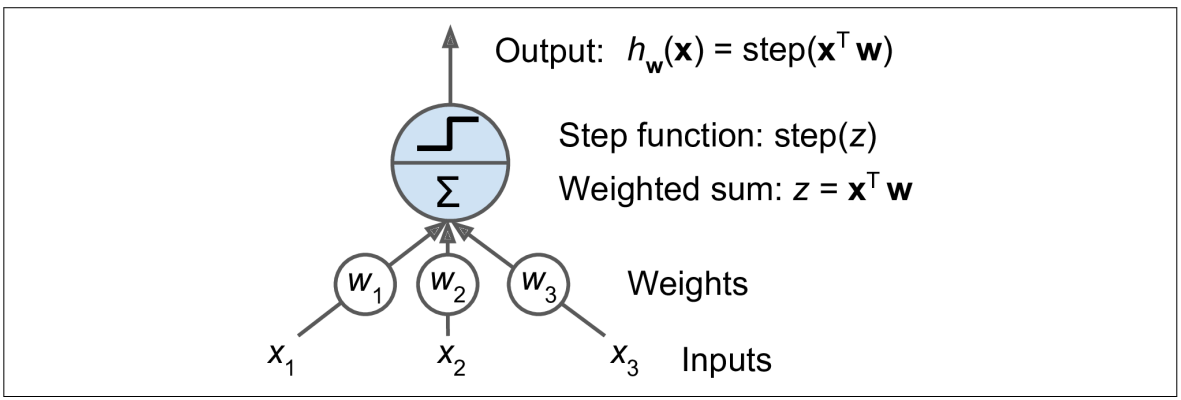

In [21]:
from IPython import display
from base64 import b64decode
base64_data = ",iVBORw0KGgoAAAANSUhEUgAABJ0AAAGQCAYAAAAEFhE+AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAABjaVRYdFNuaXBNZXRhZGF0YQAAAAAAeyJjbGlwUG9pbnRzIjpbeyJ4IjowLCJ5IjowfSx7IngiOjExODEsInkiOjB9LHsieCI6MTE4MSwieSI6NDAwfSx7IngiOjAsInkiOjQwMH1dfe0rWoQAAOLCSURBVHhe7J0JvFTjH8bfpLRvpKhUSguKSggVSoiKpKyRfd9l52/fspMla2QLJYUksmeJJFGijRaVpJIW5n+/7z3v3Hfmztw7c5u5d+be5+tz3JkzZ2bOec97zu197vN73nKhHIwQQgghhBBCCCGEEClks+CnEEIIIYQQQgghhBApQ6KTEEIIIYQQQgghhEg5Ep2EEEIIIYQQQgghRMqR6CSEEEIIIYQQQgghUo5EJyGEEEIIIYQQQgiRciQ6CSGEEEIIIYQQQoiUUy6UQ/DYnHrqqWb69OmmfPnywRohhBBCCCGEEEIIIQrm77//Nnfeeafp1q1bsCZKdOrXr59p37696dKlS7BGCCGEEEIIIYQQQoiCueqqq8xll11mevbsGayJEp2OPPJI079/f/tTCCGEEEIIIYQQQohEQGw655xzIkQnZToJIYQQQgghhBBCiJQj0UkIIYQQQgghhBBCpByJTkIIIYQQQgghhBAi5Uh0EkIIIYQQQgghhBApR6KTEEIIIYQQQgghhEg5Ep2EEEIIIYQQQgghRMqR6CSEEEIIIYQQQgghUo5EJyGEEEIIIYQQQgiRciQ6CSGEEEIIIYQQQoiUI9FJCCGEEEIIIYQQQqQciU5CCCGEEEIIIYQQIuVIdBJCCCGEEEIIIYQQKUeikxBCCCGEEEIIIYRIORKdhBBCCCGEEEIIIUTKkegkhBCiTPPTTz+ZUCgUPBNCCCGEEEKkColOQgghyizLli0zL7/8slm9enWwRgghhBBCCJEqJDoJIYQok+Bu+vzzz82sWbPMokWLgrVCCCGEEEKIVCHRSQghRJlk7dq1ZurUqWbDhg3miy++CNYKIYQQQgghUoVEJyGEEGWS3377zfz444/28fTp082KFSvsYyGEEEIIIURqkOgkhBCizEFp3ZQpU8y///5rn1NeN3v2bPtYCCGEEEIIkRokOgkhhChz/Pnnn+bbb78NnhlbYocIpVnshBBCCCGESB3lcv6BHf4X9pFHHmn69+9vfwohhBClFQSm+++/34pNjurVq5tbbrnFbLnllsEaIYQQZYGFCxeaxx9/PHiWGF27drWLEEKIPHr27GnOOecc+9Mh0UkIIUSZ46GHHjKffPJJ8CyX8uXLmxNPPNHsv//+ply5csFaIYQQpZ2vvvrKdOzYMXiWGP/73//MddddFzwTQggBsUQnldcJIYQoUxAYPmPGjOBZHuQ7MfDYuHFjsEYIIURZoHHjxuaxxx6LWB555BH7WtWqVc3ll1+e7/VDDz3Uvi6EEKJg5HQSQghRZuBX3scff2yGDRsWU1zafPPNzd1332222mqrYI0QQoiyCH+I4HdCnTp1zNixY02nTp2CV4QQQsRDTichhBBlGgYRn332WYTg1LBhw+CRset5XQiRHpYvX25Gjx5t3njjDfPXX38Fa1PHunXrzHvvvWdGjhxp5s+fH6wVpYHVq1ebt99+255b+pHIheuI6+n11183f/zxR7BWCCEyB4lOQgghygz8g3z69OnBM2Nq1KhhKlasaCpXrhysMebrr79Oy2BYiOLkp59+MgcffLA56KCD7F8cMwFE3RtuuMEce+yx5pVXXjFVqlQJXkkdFSpUsDNTDhw40Fx00UV2pkphzPr167O+dPiJJ54wAwYMMHfddZcteRO5cB09//zz9roaMmSI+e+//4JXhBAiM5DoJIQQokxAaR2z1vkDr9atW5vff//dllA45syZY2cyylYYcDDQnjlzph2kEXZ7wQUXmGuvvdZmlHz++edm8eLFdhAqSi+TJ0+2rpDx48fbHLOShuvv3XfftTOE1a5d25x55pkR112q2GyzzczRRx9tGjRoYEuiGIx7SRJlDu533AvIJPr111+DtdkF5++bb76xpc/c3y655BKzxRZbBK8KrqPTTjvNVKpUyTz44IM2m7As93khROYh0UkIIUSZ4O+//7YuJgeDll9++cWWbLRt2zZYm+sIQJzKRjjGoUOHmj59+pj27dubU045xVx//fXmvvvuMzfeeKMd6O+1116mS5cuVojC9VVSfxVnX//555/gWXaBiJPJbgL2jUG6Y8899wwelRwIncz0xXknP7RDhw7BK6ln6623NhdffLFtB1wxXOdlEe5lCM/77ruveeGFF7L2eqMsmr5DueQ+++xjevXqpRlGo6Bd+vbta1atWmXbSm5dIUQmIdFJCCFEmeC3334zs2bNCp4ZU716dVteB5Tj8NwxderUjHCHJMNHH31kunXrZs477zzz4Ycf2sF9LBiIU3r18MMPWzECkWrNmjXBq+mHzB0GwD169DA//PBDsDY7WLp0qbnzzjvNIYccktGiE0Lqd999Zx/Tr3feeWf7uKRANMCB8cUXX5htt93WCp6UwaUL3E6U17Vs2dIKTrj9yiL0g+eee84KftkK19lLL71kM4twyOHYksspP1xPXFeEnuNw5LwLIUSmINFJCCFEmQD30oYNG4JnxrRo0cL8/PPP9nG1atVM3bp17WOg5M4XqDIdyohOPPFEW1JFWQV5J3vvvbfNz2EAMm3aNFtWh9BEzs8222xj34fYdNlll5krr7yyWP4yjtPi6quvtg6sbGpfIA+MzJSrrrrKLFu2LFibmeB2QFgEZmKsX7++fVxScO0NHz7culNwORXH/nANnH322Taz7dVXX7WCl8g++GMBQi/g5sHBKWLTrFkzc9RRR9nHjz76qJk7d659LIQQJY1EJyGEEKUeMo5wLzkQmfzZj3AC+E4nxCm/FC9TQWBCaDrrrLPCJUTbb7+9FZcQoq655hpz4IEHmjZt2pjdd9/dnHHGGWbUqFHmtddeM/369bOOEBxRZD3deuut1pGSTij3wVUWz4WVySDkUI7oC5eZCplkCxYssI/JNtpuu+3s45Li6aeftnlCCEGUeCIEFQe46Zo0aWLWrl1rhYvidPSJ1MCMbIjm5cuXt/c5/z4tIsEBdvzxx9u2+v777+11J4QQmYBEJyGEEKUeXB9+iQmD3kWLFgXPcqGMwx/QIDpl+sxXlM+ce+65YYFhxx13NOPGjbMDj1q1atl10TAwoayOrJcjjzzSCk+IQXfccYeZMGFCsJXIZui7rvwPZ4ib6Ys+j+h400032dwXyhwpGUwniE04jaB79+7WYehANOX7Z8+eHbHg0KAMMxa4EKO3xw0TCwRYHH/w5ptvmh9//NE+zjYQlF9++WVzyy23WKcdM5SNHDkybcHguCIJfEe05vtwqUVPwpAMtPuYMWNs30P8TzRbij8MuCB4+jHCuc/KlSvz9QXcq/FEbe7n0dvT11IttiNM87n+98Qr1+Ye7m/HuY7XPrSHvy3fEX1OuLfvsMMO9vrnvOHQFEKIkkaikxBCiFIPbiDfoYL7IbqcjHKvLbfcMnhmrDuCAVImzwKEaMBMRdCoUSM7yGjVqpV9XhgIbDiiXLkKgxRmuNMgJftxfQJ22mknK+xQQklgPlPOc54pvST3aI899jCjR48Otk4tXDs47hgs474gCysaBCPceLvsskt4wZmHsBINA/L9998/Ylv234lasXDfiRBBzo0T4xKFY3jnnXfstVXUBXGkKOBWOemkk2zo+nHHHWdLUxGeBg8ebEs9OZ+UELoyYR+yfbjPffbZZ/b5kiVLTMeOHU3NmjXtEp3zhPCMYN2pUycbPI4rEnGS7zv55JPt5AMHHHCA+fTTT+OKNOwfn82soDgaaTfet9tuu1mBm77HRAZkjF1xxRV2nwqCfoy7ENgnPtuHezh92O8PLOTaRQs3XAPMauhvx73v/vvvT7pPFAaOOtrP/y5m3Isl2tEn/e041wiK0b93+P1FCbW/LX0j1u8n1+e5trj+Mvl3mBCibCDRSQghRKmGvzC7gYuDvy6Ta+QvDNJ8ZxMDEXJgMrWcilyhESNGBM+MHVC1a9cueFY45OsQzEvIMscOOGT8MkRgQIvbgeWVV14J1saGqdndtgy2fbcKTgkWNwCnXTkvtDGLP0hksMk6N5jmvDB4ZgCMswuXDs4PHGwFnZ/33nsvvD9ffvllsDY2DJDdtkzt70CsYF9oFwbmwL7yeaz3Z4kDStvcMbkw7+KEtpoxY4Z9zFTqBAwjWOBkQ0glTwknBCWmDILnzJljA4jTkVNFOyFkIFIg6PqzRAJ9kHWU3LENbc3C9cmMi/QXN2Cm7TnvhM+77VgQI0444QS7TSy4Jho3bmwf0x84P8nA999+++32O4q6FCXIm77NLJSUSHFOcashLBOOTrkk55Z7G6WxbMd59EGQoSTUCUQcB+3KehZfiOA83XzzzbafINDzHFEapxh9he+mrSdNmmRnSEMoiXXdcb3z2VzjCCfHHHOMneCA76pXr56dVZD3cV3TpkzzP2/evODd+XnrrbfsMeDGJM8J4dKH0lHEK/qR6w8IPtwXybJzYhI/EdgnTpwY3o6ladOmNtMu1aH2TFCBeOd/F/eXaPce+/Xxxx9HbMe5fv/99yPOD3B+uZ/42+Lii7XvTCjB+eOaQVB29y0hhCgxcm5qYfr16xfK+Udc8EwIIYTIbnL+UR/KGWiGjj322NDRRx+d9HLiiSeGFi1aFHxaZvHFF1+EcgYWjExCOQP6UM4APXglOXIGL6EDDjjAfg7L+eefb9vNkTNQC782cODAYG1sxo0bF962Z8+eoZwBaPBKKFSrVq3wa7GWmTNnBluGQpUqVbLrjjrqqNDs2bNDOYPqULVq1SK2zxlohnIG36H//e9/oZyBWvDOSHjNbf/YY48Fa2OTM3gNb3vVVVcFa0OhadOmhdfHWnIG08GWueQM3sOv7bjjjsHa4uPHH38Mbb/99vb7t9hii1D9+vVDlStXtv157NixoenTp4cWLFgQGjNmTKhRo0Z2O9py+PDhwSekjiVLlti+yXfstNNOoT/++CN4JZKVK1eGjjzyyHC7ueWII44IrV692vbHnMFzqHz58hGvN2vWzB5PQaxatSrUu3dvuz196IMPPgheSYx///031L17d/vdRV04J8nANcm1xj5zbuj/3MdmzJgRWrhwof08zlfz5s3DbXHeeeeF1q1bF3xCyL4+dOjQ0A477GBfr1mzZui2224LPfPMM3ZZs2aN3Y62feKJJ2wfYbvNN988dNppp4UmTJgQ+vnnn0Pz588PjR8/3o4ReI1ttt5669BHH31k3+9zySWX2NcrVqwYqlKlit33zp07h0aOHGnP09SpU0N33nlnqEGDBnY7Fs57rH5Bu++8887hz4t3H+aYBw8eHNpss83Cn8nSqVMn2885vs8++yxUt27diNd5/uabbwafEpuNGzfabevUqRP69NNPg7WJ8cknn0R8H8vnn38evJrLb7/9Zu8R0du1atUqtGHDhmCrXF599VV7PbttqlatGrcv01buHsD9Kd79UQgh0sHBBx9s/z3oI6eTEEKIUgt/Vcc1kzPwCNYkB3+ZxrGSieAgwAUA5OTggigKOYNN07Nnz+CZMTmDpbTn/CQK5TeUihAmjPuCshxm33O5QDkDYuvUonQFh4DIzVByeWXOWfHUU0/ZbBzaknK7hg0bml69etkSLcj592A+x1YqoC+5wH7KPnHWxQJnCE4bnCc+lM3hqsEZc+mll0aUdeH0ufvuu+3xFASOLuewwulDXlGyXHjhheaxxx4r8oLLJxloM9wusOuuu9p8pf3228+WreHKxO1EbhsuJ9emlFH5pbG8Tjmb+26ucxxRlKOxVKlSxa4nIwt3Hy64SpUq2QkFcAWRv4XTifsKgezPPPOMufHGG8Pvuf766+01GQucNThx6GNvvPGGnbSA80RJGNcq55VjAXKecC1Gg7PQuaDYj3gzHpLPR+koJXw+OCNxU7GPlNv59zScU5xT7iXpgjLC6P6M28kHN1ss5x0ZWC6nzzF+/PgIpxR9mgy/WNBWtBlwDy0Jx6UQQvhIdBJCCFFqYZDJP94Z1EYvBGr7MCiLtR2BrQygMg0GJg6yW/w8qmRhYOtgcJYO0YmyKMrvyHgBSvoYSJE7wuIGST4Ia7yHwRUD1Q8//NCW7VCSwoDbDagRVRAt0gFiCfuHWEF5EDCYRPBifXQ5IoP5unXr2sWVLRYnlEgiIAB9GmGGPJ1Y+KU58QShTYFcH0dhWWNM906+TvR1iXBwyimn2AG6o3z58jZnyBdLC8IXpshJSgYECr6H/JyiLvFC/eNBiZgLCUdA4D4UC8qrmCKfZdCgQfZ8JwvXkyv/I1sLgYZjjoZ+fc4554RLeLkePvjgA/s4FpS+USIZa9/JliJXDCjxRFTzBUXgfuFELUS2giDrib6DmOpDmd3RRx+dr7S2d+/e5tRTTw2eFQzlhIceemiRrmVEPh/uX744zn7FE8sRbB2IeJQL+lBWWtA93xekku3zQgiRaiQ6CSGEKLUwULrooovM5Zdfnm/BOeDD4CLWdrgFUp35kQoQPBxkvMQaKCYKYoqb4QzByblTUgmDZxYnKiAcIMxsu+22dsG5Eg0DUpwd5Now8EMYYT95H4Ps4cOHW3cGA1YeR2d3pQLOPfuHwMU+A/vKfrE+2oHBIBdHA8uwYcOCtcWH71iizXCbxOsbBHMDmTj+rHKpgHPiC6OFOfHYR5wniEmunYEsm2hxA+EDh1usPhMLRFlHNrg+uEacoIC4g6hKfhOONB/6/p133mknFHAh3smAU5LcJKDNcb7hHIoH91PnDuK90c4dH/oe7U7fioZzTb90ghRONsRlB8eJ2O9yo7i/FQZCFm44X7SkzXBJ+nCvI99sq622CtbEhzZB7MblVZjwFQvcYu6+CoiwzoUIZIw5otsJgcodP9lmfui6u1Zita3D7/PTpk0LHgkhRMkg0UkIIUSphUEZ//iOtUQ7OxiMxNqOv9hnoujkl2VwnJsCAzU3YMXVlSnOLgZ9BIczy1S0cMI5oeyHwS0QhI0bIHpgXtwgTuEcY0l0JsFUwbH77iKCoSkvi4W/LW1LYHQqQZSgDMuRSIkZ55tSL2bwigeC42233ZZP7CsI51AD+glh15kMghNB1EDJHA6jww8/3AptCD3sPyXDnENf1EgWXDZO7OH8NG/e3Aq98Ra+k37thB3EkFggXHFtFgT7Tbkd4MzzBUq+CyehI5G+Qx8mtP2www4L1uQHJxjlgxxncUDJny9ucT3gRATa3m8/3JO+Uw1xlEB2zjHOTj8MHIGYUuOC8Ps8vyvilUIKIURxINFJCCGEEBkJggmlQ77zJRocagxyGRAzIHfugLIITi9XKkVJF1Pcx4O8HFfCRekQwl4qYbDsZ6n5g+CCwD0Wz4lCP8DRw+xcyYBw7KB/JJP/xXFQ5vnaa68VeXHZa4nCzGOUi9IWgAiD2+uGG26wJXA4f4444gjrAJw1a5bdpiggLrv+gjBBH0DMLWjp379/OFvId9/44GBKRBR0uU4IItHH4ZfbJdp3EM5xfsVyRuEKIueKcseCHEKpBLEsugTUucPICvT7BefVd98iOtG+lIhHi+kI7fFKLh1+qSHf4+dBCSFEcSPRSQghhMhCNtXd5MMAz/0lnc9N5WdvCvz13013Hw+ygBikAzkw0dkwZQkG7s6lhlPGLzWKBmeJG4juvvvu9memgPgRa59ws8QLT04XDPZvueUW6xor6uKXVCVKmzZt7HT3lGtGCzg4YHjtjDPOsNk+Z599doSrLFEQ4MiPSjX0u0QcWIUJJ0WBsldK96JBaCrMHZQOEJL8MlAmtkDgw73kstfo1507d45wh3FeEDspdXbuKKBtEagKEuKFECLTkOgkhBBCZCG+GBMr7yUZGNi4HCccMslmw6QLyhujy+qiwU3gylJw7hR1psJsh/PvC0l77rlnXEcH25Lz4kpuCpsBrjhh33B2kGkTDSIJDiDn0EqU6D6RrNMFQRaBoKhLUa9NcoqeeOIJM2bMGHvcXbt2tf3dlUyyXwhaQ4cOtS6eWDOhJQpuMMr3hgwZkvBChtKm4JeMpQLaGbcfGVfR0AcIGydUu6jnoyhQjujPYkffJUDcDwrHqYnohNDqB5azzaeffhrhzPNLLwvC7/PF5ewSQoh4SHQSQgghshCcEA4cPpRhFBWyRdxAjEFNScy6FotEZuNiG/3VP7cECxcF55E2oX/EG2wi3jDrHtvinIiebj4VMJD2z1+iTpy5c+ea6667Lm5/Rox64IEHgmeJ4UrIgONNtFwLaMPTTz/dlm0VdSGHqqjQhohPV155pZk0aZIty3r55ZftPvnHQdkWAlUycI6c2wghC+Hq4osvTnihVC0W9K9EyrnIqwKuXz9jjzb3XVCJ9h0+j8kf3OdGQzg5mWHF6YZEOPevL/K43nzzzYg8J7LfKIfjDwl+aSCTAjz33HPBs1womU3ERea769wEDEIIUVJIdBJCCCGyEJwsblCPgMCAqijgdnEzWAGlTYnMFpUpMLgtq+4mHwbSCBKAgFBQMDgOExcizoA01SHiwExnvtiyYMGC4FF8EM4IzUZEdSBA+OIZ5xpnD26WRB0r/nfjFCqo7DAavpsco0suuaTIS1FEXNwtuHJwMfpwbR500EG2DXC2HXnkkcErubOhJVMuxzmiHA3ID/LFuXjgiMQlh6uK8xUL9j0RNxr3LeA+5s8Ohwjl8qwgkb5D/7/99tvzzagX7ZTENXb33XfH3fdUQw5WdLkfs+FRIulwWU6cC+7rDspl/RnuaCeyvBLBbzNcbInO9CiEEOlAopMQQgiRheBkceHPS5cutX8RL8pAilIPHDLAYI9BjT/IT4bffvsteJQaOK7CwAXhysQoYymsHC8WiDDxQpGzBQQD525A7GGGq3jgtnDBzZRT+uU/qYI+RN6WY86cOcGj2NB3n3rqKTNhwoRgTS4MyC+44IIINxsuKJw/iZaTEZruKMrU98XNQw89ZMUHsnsIIo+GtqWfIxgyY5uD6yCZwGjOvSutRCjiuwoScBF27rvvPit6denSxVx22WXBK5FwPSFkF+QowsXjxEVC433nJseHuIZgA7/88ov9WRC4h+g/vhDJuSaU3hdceP2uu+4yn332WbAm/eyzzz4RAqx/jhD+KK0DjnuvvfayjyHaMYYbinK9RPBn/8uGPi+EKN1IdBJCCCGyEEprKG9xIguiU6wcnIJg8M6gzJWvUMbjBkCxQKxwAk8sZsyYETxKDTg5XDB2PBBP3BT4zIYVr9SOqfLjwcAukYFtJuPK5aBDhw62dCoeiIxOoCSYO10ZXn7oN7NxFSRoIEBQVsdA20FJ0I033mhLpnwHCFCGRwZRYTPD0SZ+EHNxB5EXBYLx6deIuCNHjow72x7H5vdrnDLxwrlp+2gRCEdcnz59gmfGjBgxwkyePDlCuHGwDvcMJXyIm+zbLrvsEryaHwSszz//POZncb3iNmJ/EFrYB8p6fZo3bx52pJHTVFDfoQ2uuOKKiLbgvYMHD7aCZe/eve33OLjfMRNgUQLeiwJON19M8uE1v0+S64QYGAvK9Bo1ahQ8iw9t5fd5N0ugEEKUFBKdhBBCiCxlwIABYZGIgdRpp52WsPCDG4FBviutQ7zCuRBdCsR6J2wxSPPLQnwYGL/77rvBs9TAMY0dO7bAAeezzz5rRSPEJvJOnDsCfIfDzJkzg0f5wQmD4yub8Z0bbdu2DR7FxjnbAIEqXeyxxx7h0Gva2Imb0VCyRSi1LwJwPskNYhCOwHrPPfdEZEQBzpZXX301eBYbBA53TSDI4DrJdLp16xaeKOD999+3IeIEkkfDeSTQ20EZoN/neeyuB9p+3Lhx9lrhs5wAxXtc5hBuuRNPPNFeC9ECFcLPoEGDwu4yBCdfsIqGXCU+CxHL/yz2g/uMC/vefvvtzVlnnWUf++B8cplVOB4RGWOBCI7rjVJEH46L+yP9iFytaDffxIkTzb333hs8Sy+Ip7jW3H3UB3HNdwRyzPGuX8SzRMDl5M4TQqRzxAohREkh0UkIIYTIUijNoFTEDVB//vln07dvXxs0HM8hhJMEBwKDMkplGBDiijn33HNjTjVOBo776zolMYhA0QNScmcYOCbjdGKwWJhLBWEMR0KsASdOnZdeesmMHz/ePqcNOHbf0cAU6c4twRTzuIGiBSwG04QyJ5OFw37Hc3yxr+SwsDDgLg7YH5xEwPG2a9fOPo4F++22ZUCOuy1dUDblHB4IB7H6B32JfhhdVofYhBDlRBSOyX8OvPfaa68tsJ1xv7jjJbuKQX6mg1BAv+f8cA0guNGOF154oRWKr776alsGi8hK/4VjjjnGHHzwwfaxA8eUf7zXXHON/WwyflymF/0FhxMCIfz000/2cxGUcJjxfeRG7b///jbIHLjW2KeCHHKcez4LsYVyPARErjNmXnvsscfsucPdxP0r1jlBYOzRo4d9zLaxXJxcy6NGjbLiow8CE+3nwrN5znH4Ydo4sMjF4v0FidqpgjaIFk2BMkW/TyOM0vejoe/GWh8L+rtzfVGe6u6BQghRYuTcdMP069cvlPMP1eCZEEIIUXoZM2ZM6Oijjw4vX3zxRfBK9vHWW2+FWrRoQR2LXapVqxbKGWyEbr755tC4ceNCU6ZMCeUM2kIPPfRQqH///qGcgWd425wBSeiUU04JLV++PPi0SP7666/QYYcdFt4+Z6AYOv/880MTJ04Mffrpp6EHHngg1LVr19Bmm20W2nbbbUM5gya7Xc+ePe17fdauXRs6/PDDw581YMCA0Mcff2yXP//8M9gqFKpUqVJ4GxY+f8KECaHffvvNbjd37tzQbbfdFsoZ2NrXOYacQXDw7jwWLVoU2m677cKfs/3224fuuOMO+30ffPBBKGcQHmrdunUoZ3Afyhn42mNgu6uuuir4hDz++OOPUKNGjcKfdeONN4Y+//zz0CeffBLasGFDsFUoNGTIkFDOYNwuOYPEYG16+fXXX0Nt2rQJH+OPP/4YvJKf+fPnh7elbWbMmBG8knr+/fff0GOPPRbKGVSHypUrZ/ujT85gP/Tuu++Gtt5663C7stSrV8+e72hyBtKhTp06RWzL0qNHj3x9zfHcc8/Z72a7yy+/3O5TNvDPP//Y9mrQoEF4/2MtXG9HHXVUaOnSpcE7I+G+xmdEv++JJ54Itshl2rRpod69e9t7R/S2buH62HXXXUMfffRRRJ93XHLJJeFtb7311lD37t1DFStWjPgMlgoVKtjrjnvT+vXrg3fn5+233w7VqlXLvmfQoEG2TXy+++670E477RTx2dwLhg8fHtq4cWOwVS6rVq0KDRw4MGJblh133DG0YMGCYKv0wn3M/27uc++//37wah78bvK3Y+F3FPfPRDjnnHPse2j7F1980V5nQghRXBx88MH2/u5Tjv/l3Jgs/CWDv3z6M2EIIYQQpZE33ngjXOIBuAjS6fpIN5RX4Uz4+OOPE/7LPdkhuEdwOeGKiAf5IPz7ACdVPHATMB35LbfcYvORevbsaXIGPPk+l9fZLpqcAaZ1RQCOABw5lAbhqmBmPlwKOCII5KVUi+/AAYEbBJcVJUixjiFnAGouuugiW8IVC5xRlFzlDEjN2WefbZ0l7N9NN90UbJEHx+TP9AeEOeMacW4w//jIaoku+0kHlJARpIy7DYdJzmDfuuBiQXkk7jDyvNh3XC2uBI5/Erq+Q7u4BfzXgFIh9xpwLhz+azgucCkxmxklWfQlXgc+k/6KI8YHNw4uF85tNLg4oksh6SccM+/zYX+PO+44e53Tf3DLZFupEcfKjGvsO32esjXaD+cL9ytKrvbdd98IF48P54Xp+e+//36bE4VDkOuLWfUOP/zwYKtccPt98MEHtr1oZ3eN0acIsMbthMOKQOtYcC9x5X58BucENyL5TmR2VapUyX4O55b95nz5fSga+vVhhx1mSwz5ThxtuLQcuLzcjI0Ojo1xjO8ectAHo2e3A0qU0zGDYzT0dRfgD5wz7nnRGU5co7SZN0SzZbAFZWg56PPcJwnup2yP/sN1LoQQxQX/VmImWn6GybmhhZHTSQghRFmhNDmdHLgPHnnkkVDOICqmw8AtOElOP/300Pfff5+w8wP3DI4KHDz+Z+GMwL2EY+ann34K7bPPPqHGjRuHTjzxROsuiAa3CvuXM9iM+Jxbbrkl2CLP6YSTiX3ca6+9rBvJ354FV8/jjz9eqAMAx0TO4M46bvz30w4XXnihdUThOMDtxL7feeedwTsjyRn0RjjKWKpUqWI/34E7xb2GiyKbwAV18cUXW+cbx+G7h3CXuddwUvjOtNWrV4cGDx5sX2PhuQ8OI843fRJ3WHFB3+F8ci64xv/+++/gFZEOfKfTCy+8EKzdNHAt4bDiM0eMGBGsFfEYP368bS+uN9ygQghR3MjpJIQQQgSUNqeTg1/rOAQIkiW7CVcQDgbcEeQzkXPEbEYE1pLllAy4jwgb5q/nS5Ysse4eplzfdtttrbMGFwV/pccdwWeTT+JcLQ72j23IhsL9QMYUDgj+IuZmKHNOJxwWZAERUk7wL9+LK4b956/+ODzIhYn+jmj4TtqAgF3ahDBlpmTH9UJwOvvKOtqNbTkW5/7xwUXArF3sO04C4P0EFrugYj6D/QUcONHum0wGVxK5XjhKcEfgrqG/wCuvvGKOP/74cJYVmVXkxQBOFBwpHDuh1J9++mlEoDtOsEMPPdQ6TU455RTz4IMPFkvODDMzMqsZjikyo8jPKchZIzaNaKfTUUcdZR9vCoTL03dwyOG0wgGUrtkWsx0C4rm+nn/+edOiRQvrkGvZsmXwqhBCFA9yOgkhhBABpdHpVFrwnU6ieLn00kvDbpVhw4YFa0Ohc889N7ye5aabbrLr//vvv9D1119vnRUsV199dT73HA48XFK8r06dOqHp06cHr6SPFStWhPN+yCqKzvgRqScdTif6EvlT9C1claNHjw5eEdFMnTrVXl+0Fddnoi5WIYRIJbGcTpq9TgghhBBCWJhly4GbyfHJJ58Ej3LBDYWzAvcXTqecf1NaZ1usqeHJ1zn11FNtPheZRMOGDYvIgEo17NPIkSPNzJkzbQYYGVux8qFE5kNfwjHVpk0bm0OGSw53pIiE6+nRRx+11xcu0JNPPrlQB6gQQhQXuhsJIYQQQghL27ZtbfA3EEBNGSEljT/++KNd50KPeU653O+//x4WpCizjBfUTbnP7bffbsUfAuYpl0oXhMZT5oX4dMEFF5SKstmyDOW2Dz30kC2lpXSTsjFETpEH7UIJLNcXfZ9SaiGEyBQkOgkhhBBCCAtupT322MM+Jr+K3C1mRmRWP15jNjhYsGCBzQvDDeWcJ+Q3xJs1jywl8qLIhSI76oEHHrCfmWrIFRs+fLgVynBd4fjgu0X6QRwi48zlpKUKzh95b+eff7519JDVxUyNIhfy6HCArVixwpxxxhmma9eu6vNCiIxCopMQQgghhLAgFiAeMWglfB1RCdEJMYdStYEDB1phiYEu0+u/++679n0ErzMVfkHwvttuu82MGjXKilfpcqt06tTJBk4PHTpUjo9i5KSTTrIuJJbOnTsHa1MDJZrnnXeeef311204vMiD62jQoEFm9OjR5n//+59tKyGEyCQkOgkhhBAio2jWrJlp3rx5eEY4Ubx0797dljIBg3xEJ2AmO7J1EHWA15hREDhfbqa7gkAEwvGEQJWOGewYcO+11152Nr0mTZoEa0VxQHvvvffedkGgTDXMWod7jXNbtWrVYK1g9k+y2A455BA746cQQmQaEp2EEEIIkVF89dVXZtq0aXbKflH8UCZ1wAEH2MezZ8+25wL2228/64RCVMAJNX36dDNjxgz72j777GO22WYb+1gIIYQQwiHRSQghhBAZBX+5R/jgpygZcE04JxLlOzhLyNVhRixKpyiVYz0L4cW9e/dWjowQQggh8iHRSQghhBBCRICbyc9Datmypdluu+3s41133dVmODkoraPsTgghhBAiGolOQgghhBAiAvJ5EJcciEouL4afHTp0sI8B5xMzlgkhhBBCRCPRSQghhBBC5OPZZ581ixcvtssDDzxgKlSoELxizAsvvBB+7Z577knpFPlCCCGEKD1IdBJCCCGEEPmoUaOGLbFjqV69erA2F/81v9ROCCGEEMJHopMQQgghhBBCCCGESDkSnYQQQgghhBBCCCFEypHoJIQQQgghhBBCCCFSjkQnIYQQQgghhBBCCJFyJDoJIYQQQgghhBBCiJQj0UkIIYQQQgghhBBCpByJTkIIIYQQQgghhBAi5Uh0EkIIIYQQQgghhBApR6KTEEIIIYQQQgghhEg5Ep2EEEIIIYQQQgghRMqR6CSEEEIIIYQQQgghUo5EJyGEEEIIIYQQQgiRciQ6CSGEEEIIIYQQQoiUI9FJCCGEEEIIIYQQQqQciU5CCCGEEEIIIYQQIuVIdBJCCCGEEEIIIYQQKUeikxBCCCGEEEIIIYRIORKdhBBCCCGEEEIIIUTKkegkhBBCCCGEEEIIIVKORCchhBBCCCGEEEIIkXIkOgkhhBBCCCGEEEKIlCPRSQghhBBCCCGEEEKkHIlOQgghhBBCCCGEECLlSHQSQgghhBBCCCGEEClHopMQQgghhBBCCCGESDkSnYQQQgghhBBCCCFEypHoJIQQQgghhBBCCCFSjkQnIYQQZYp//vnHLFu2zKxZsyZYk8tff/1lli5dmm+9EEIIIYQQomiUC+UQPDZHHnmk6d+/v/0phBBCZBv//fef+eOPP8zq1avNqlWrrLi0aNEis2TJEvP777/b9Wzz77//mnXr1tnFUblyZVOhQgWz2WabmZo1a5q6deuaOnXqmPr165utttrKVK9e3VStWtXUqlXLVKtWLXiXEEIIIYQQAnr27GnOOecc+9Mh0UkIIUTWsmHDBvP3339boWnmzJlmxowZZvHixdathMDE66mgXLlyVpSqUqWKFZ1at25t2rRpYxo2bGgFqM033zzYUgghhBBCiLKJRCchhBClgpUrV5qvv/7afP/992b+/Plm4cKF1sFU3CA6NW/e3ApQu+yyixWlhBBCCCGEKItIdBJCCJG1IDQhMn355Zfmm2++MevXrw9eKZzy5Tc3VarXMFWqVDPlNitnqlarYcqVix1ruOqvFWbtmtVmzaq/zL//bgzWFk7FihVNq1atTIcOHUyzZs1M48aNc763fPCqEEIIIYQQpRuJTkIIIbIKyuPmzZtnPv74YzN16lTz559/Fig2VahY0dSoWcdUr1Xb1N6qnqlZeytTd5sGpkatLe1rm29eIec3n7E/KZmLxYacz9+4cYPZuGG9WfXXn2bl8mVm5Yrl5q8/l5sVy343f/6x1Py9elWwdX7IhCL7iRyozp07m912280+FkIIIYQQojQj0UkIIUTGw68lhKWff/7ZvPfee2b69Ol2ZrlYbF6hgqm4RSVTv0Fjs23jZmabRk1Mnbr1TY1adeKKSpvC+nX/mOW/LzKLFsw1v/z4nf3JuniOKAQoSvD2228/K0CRC5WO/RJCCCGEEKKkkegkhBAio2FWuVmzZpnx48ebKVOm2OexqFy1mmnaYmfTYud2pmGTZqZKtRrBK8XLyj+WmQVzfjLzfpph5v/yk1m18o/glfyQ/XTggQeajh072lI8IYQQQgghShMSnYQQQmQk/CqaM2eOeeWVV2xuU6xZ5ypXqWoaNGludthxV9OsdVtTqXIVU26zzUrcOcS+h0L/WYFs0fw55ucfvzO/zZ1tFi2YY1/zwfm0ww47mIMOOshmP2nWOyGEEEIIUVqQ6CSEECLjWL58ufnwww/NO++8Y8PCIylnqteoaZrtuKtp03Evs2Xd+racLpNhFr21f682c2bNMN989r5Z8tt881+UY2uLLbawM9716NHDtGjRQs4nIYQQQgiR9cQSnWJP3SOEEEKkEf7esXHjRltC98ADD1iHU6TgVM5UrlLNtN9rP9N30Lmmx+HHmG0aNsl4wQlskHi1Gmbn9nuaI0481+x3aH9Tp269CEfWunXrzFdffWXuuece88QTT5gFCxZYsUoIIYQQQojShEQnIYQQxc6qVavM8OHDzb333msznPwytAoVtzC77bO/Of7cK033PkeZets2Cl7JPqpUrWY67LWfGXjuVWafHn1MjdpbBq/ksnbtWvPRRx+ZG264wXzwwQcxywqFEEIIIYTIViQ6CSGEKDZw8/zwww9myJAhZuLEiRFB4eXLb26a77iLOeq0i03Xnv1MrTpbBa9kPzi09tj3IHPMGZeavbv3MtVr1g5eyWXNmjXmqaeeMs8884xZsWJFsFYIIYQQQojsRqKTEEKIYoGSMoSmhx9+2MyePTvsbqLsrPZW9UyPvseZnv0HmW0aNTHly5e3r5UmKLurUauO6dStp+l/8gVmlz0621n4HJQbTpo0ydx///1m7ty5KrcTQgghhBBZj4LEhRBCpBV+zSA4vfjii+a9996z4opjs83Km5Zt2psuBx1uahajswlB55effjRffDLJ/LsxMuQ73TRvtaPp1KWb3Yf5P880748daZYu/jV4NZc6deqYE044wbRr104z3AkhhBBCiKxAs9cJIYQodpYtW2aeffZZ8+WXXwZrcsHlg9i0U/s9zeabVwjWFg+vjnjK3HvL1Wb1qr+CNcXHEcecaK6+7YHgmTH/rF1rJr35ivnuy48js60qVDDdunUzRxxxhKlatWqwVgghhBBCiMxEs9cJIYQoVhYuXGgeffRRO1Obg3K6+g2bmL4DzzJtdtu72AWnJYt+M088dGeJCE6xqFS5sunWe4DZt2c/O+udg1DxCRMmmPvuu085T0IIIYQQIiuR6CSEECLl4NhBcEIw+f7778MOHsrpdmrfyfQ+5lTToElzm3NU3Pw6b475688/g2eZQYUKFU2HffY3B/U7wdTdpmGw1tig9enTp5vHHnvMLF26NFgrhBBCCCFEdiDRSQghRMr57bffzF133WUWLFgQrMml3V77mv17DzC1tqwbrBEOBLlmrduYwweeaZq22ClnTbncF3L49ttvzRNPPGH++OOPYI0QQgghhBCZj0QnIYQQKWXOnDl2BrZFixYFa4zZvEIFs3f3Xmbfg48wlSpVDtaKWNSsvZU5fOBZZtc9u1ghyjFt2jTbrsuXLw/WCLHprF692kyZMsWMHTvWfPrpp7YUlnJOP19MiLIO5c5cH1wn8+bNC9amBu7pfC6zl/7999/BWiGEKD0oSFwIIURK4NcJ/3geOnSo+fHHH4O1ZBZVMfv06GPadtzbbF6hYrC25Jgy+WNz/kn9zZrVq4I1uRxz8lnm8AEDg2fpo0at2mbr+tsGz+Lzz9o15qPxY8y3n39gZ7oD8rB22mknc95555lq1arZdSIXyg+nTp1qPv74YzNjxgzzyy+/mPXr15vq1aubHXbYwbZb9+7dzY477mgqVaoUvKtw/vnnn6S2zxYo3XzllVesI5FB9Jo1a+xxMlvirbfeak488UTb30ozzKTJfYvQ/mjIU7vooovs42OPPdZcfvnl9rFIHvoa97BY7ZwtvP/+++aYY44xtWrVMqNHjzYtW7YMXtl0Vq1aZfbff3/7B5t77rnHHH/88cErQgiRfShIXAghRNpgcE5o+MyZM4M1ZBVtYfY5sI/ZZY/OGSE4FcRWdeuZ5q12SvuSiOAElSpXNZ1z2q5Nx33Cg38GyGQ8jRkzxra3yHUgMAjs16+f6dWrl7nhhhusmPL111/btvrss8/M8OHDzWWXXWYOOOAAc/7555uffvqpQCcPr9G+48ePNw8++GCwtvTA8SGq8I9CZpX8/fffreiEaLxy5Uo7W2JpFpw4fjLnhgwZYgXKWPz111+2/7AsXrw4WCuSgXZesmSJzfbDTZet/Prrr+a6666z/QAxdvvttw9eSQ38AeG0006zrkMEX8Sngu5PQgiRbUh0EkIIscmsXbvWPPfccxGh4bDXAYeaXXbvYsqX3zxYI5IBl1i33keZndrtacqVy/uVjRjyxRdfBM/KNvfee691onz44Ydm3bp1wdpccO34kIlFKPuhhx5qPv/887gDO7Y744wzrIg1efLkYG3pAUENh9OyZcvs8wYNGpgLLrjAXHvtteb00083u+66q11fGsF1QylT586dzR133GHFJZF6cDa988471sHzv//9L6tn4HzooYfMJ598Ypo2bWrFoVQ7thB4cTfttttu5ocffjC33367RCchRKlCopMQQohNgkHcm2++afMoHGQR7bHvQWa3fbqb8uXzcolE8tB+3Q8/xuzYbo+cZ7nuE9w9L730UlyXRlkBF9OVV15pc1CYCbFjx47W1TRr1iw7yEVUYaFvUpK45ZZb2vfx+lFHHRXXwfLzzz/bz6GdSyMcFwIxUH7IoBrXD+IAPylHLK0gTHJuKb8siO22284cd9xxdkEMEMlB6eILL7yQ1fcohB/KdYcNG2YF7MGDB9vyunRAaeuFF15oXYZMGkF+lBBClBYkOgkhhNgkmFmNv2i7v8wy+N+5Qyez5349JTilAP4KXrHiFqbT/j3NNo2aBGuNFVWef/558+effwZryha46xBLGNxCnz59zBtvvGFFAkQTBoc1a9a0QlPXrl2ts+eZZ54x9erVs9uTY0Q5qHu/D325NDsNEIqd4LbVVltZUYVrlb7G4Lo0l9aBy0grCATMZ5991i70KZE8ibRzJsN1cvPNN9uyU0TIww47LK3XBq6wvfbay96TcOFR6iqEEKUBiU5CCCGKBINywpv5azZBqI7tmrUynQ863GxRCsOXS5I6deuZLgf3NZWqVA3W5M4U+OKLL+YrKysLUAKH0wnq1q1rLrnkEisoxRsUIqYccsgh5uSTTw7WGCtSldXZAJ2oVqVKFVO/fn37WAiRByW4ZJ9xTznppJPSfp3Url3bOjDhrbfeMhMnTrSPhRAi25HoJIQQokhQovPUU0+Z3377LVhjTPWatc3+vQaYqtWqB2tEKmnUdAfTtecR2J/sc4QDsowoH8t2V0GyIHS6EqltttnG5q0kwuGHHx52O1FilqqsGVwJzHD18MMPm1tuucVmTVF2umjRomCL5MGNxKCXDCKCmAkaTjU4E2M5ErmuOR6WuXPnBmtjs2DBgvC2TCQQ7RJjvxFI+Rw3JTz9leeEwFNO9Nprr5mvvvoqKQEVR8g333xj3Ui0OVk4qSrpIlidfWZJRJgknJ5juPPOO+2+4KojB6iwEs10tU0qwc1KOS+llxzbk08+ad5777205GFR+vrqq69apw/fRSkk4nJRS125/vxriPOaCDgpKavD7dS4cWPTu3fv4JXY+P0l0WX+/Pn5zimTHSBu0bfJn0t0f4UQIpMpl/MPg/C/DI488kjTv39/+1MIIYSIB4Mi/hJLeZf7NVJ+8wqm97Gnmeat2xg/9DrTmDL5Y3P+Sf3NmtV57iw47/LrzaCzcqdIz2QYBL37+gtm2hcf57R9rtBUo0YNm1m044472udlAQanbdq0MevXrzcNGzY048aNM23btg1ejQ8D5aefftr+rFOnjnUW8BNefvllm6vCZ7qQbbJW3Ov77befDcz3obyRwSHiADOiMVjlHCHm8F7cC6eeeqo588wzzdZbbx28K5JRo0bZmeQQf9g3St6YOp3AePaT661ixYq2VPCII44wp5xyimnRokXw7sTB5fX222/bz3PldTjA/P1ikN+tWzd7PISLw9VXX21n/4vH0KFDw68PGjTICm4cv2PkyJH2+Pku2q9Jkyb2+BAXEOsYYPPaFltsYZo1a2Zuuukmuw8ccywYqFPSizDx3Xff2TbnnAHvYTYwgsIJRicU3e3LnnvuaQf6CI2EqeNg4dzyvYDzrX379uHHHAsQHo0AEg3nGTcMYhcZPAhIblZJwqY5/5R6XnTRRbY0i7yeaBCU+HzOPW3DzGi0DTMwcu4RW/y2YXbG7t27h/fZhxkbBw4cGBZSccq0atXKPk4Wvhehi2ND2EYQo42533NstDPi7eWXX27HDX7WUY8ePeysf1wbnBvameuA9gB+b1Dy6qA/sj0zxCHUIShHt+Muu+xi89s49lhB3vQx+iv7xR9D2B/6IdcQn+dfQ8x0yTVUUHYZuW5dunSx1/TBBx9sr9FYbe64//777blJhkaNGtn9bt68ebAmV7xiYoTXX3/d7ivfS18WQohsoWfPnvbfNPx0yOkkhBAiaXBB+DlO5XIGdbvu0cU0a5XZglNpgMHp3gf0Nttul+fsYXCKq8YNvMsCCG1u0MjAkEEfjhTvb2kxcQIdQspZZ50VFpSAATKf5QQnYPDLOhZK+nxwWlF2c9VVV1kRjIE5n0/+C0IOA3eulRtvvNEKGLiAYuG+lwXx4phjjrFOGcpXKX8j7Jtt+D7cJnzWtGnTgncnDmIE3+EHqCP4uO9mcc4L9h0RhaUwl4m/bSw3Dv2Sc8PC7FwnnHCCeeSRR2w7IyggErENAhTCCa8jHMSC8/HAAw/YgTkhz7wHMWHbbbe14iOCBOeJQTvthEvH8fvvv1vnixM06Cvskzt2/zj9fXYOJB9ex2HVt29fM2bMGHssfB4uFfYDgQmxg+NBcEMwieVa8b/nxx9/tFPy45bj8xA5otuG13EaxYL959y64+HcFhXuJ4hJtCPiUeXKla2jkL5NVhptSH8899xzrVDrZ8vRb2ln+izQLpwTt19+H2EfEdiYURJnF+9FpOK7EGVcO3KuEdQQ5GL1Mf8aQrjiGkJApV2jryHcaFy3CF3x4Pv4LNhnn30KFJw4Pwh07jzGWjh+jsNfh6iEGOfDvh544IH2Mdvwx53C7mlCCJHpaGQghBAiKRgkUKrA4MCx7Xbbm07dDolwN4j0Ua16DdP14L6mSrUawRpjB1BTp04NnpV+GLANGDDAPsbFgEjRq1cvK2YwsGQdg7VkBmx77LGHDSe/9NJLgzXGOmVYx4JI5WAAe8UVV1gnAtcEItP1119vB+kMWCnpQSBikI4jhkH8xRdfbAeo8WCfGVRT9odwwfsZdOLWuO+++2wJIceDMMWgGRElGXDUcBwMuh2INe74WHbaaafgldRDOyDAsf8tW7a0LhqcPrQhgc04oIB7y2233RZxjwGOnTIvZtljAA/0AdZR7vXBBx9YQaZDhw72NYQ5zqXbFicK7cs5BYQUBBN37O77C4P94Hzy3iVLlth19B2C6TnvOINwsOBKA74fIYnvpg1iwbmnbRBMcLH5bYPLypWPIkbFaptUwmfTxq50GmGJ/aCN6du4CnG2IeQgAFHSSB91cF0gAu++++72OYIN145r59atW9v1MHnyZHP++efbEk0gTBu3H+340UcfWTccfR04ds4hIl+865pr8e6777biJtceEwhwDeHwo/05x7yX48DtFKsdef3dd98Nnhkb7l0QnDvOtTu+WAvnv127dsE7jBXu6Jvcx3wQ3Cix4yfQ5vGOVQghsoacG1mYfv36hV5++eXgmRBCCJGfnEFCaNCgQaGjjz7aLieedHJozAdTQt/MX5UVy+MvvxWqWq06/4qPWM67/PqY22fqMmXuytADT4wInweWK6+8MpQz6ArOVOknZ8Ab2nffffOdy5wBW2jHHXcMnXDCCaEnn3wy9NVXX4X++eef4F2FQx93n5UzmAzWRvLYY4+FcgbTdpucwW1o6tSpwSuRzJs3L9S+fXu7XcWKFUOPP/54KGeQGryay4gRI8Lfx7LrrruGcgbNwat5zJkzJ7T33nvbbTjGCy+8MLRhw4bg1cT5448/wt/Vpk2bYG0kOYPk8DY33nhjsDY29957b3jb0047LfTvv/8Gr+Ty3HPPhV9nGTBgQGjZsmXBq3lMnz49lDMIt9vQVtH/Jl24cGGoUaNG4c+56667bB+IZvny5aEWLVqEP2fYsGHBK6HQmjVrQn379rWv1a5dO/Thhx8Gr0TyyiuvhL/n/PPPD9bmsmDBgvDns5x++umhlStXBq/mwXkeMmRIqHLlyna7ChUqhL7++uvg1VxeeOGF8Oew9O/fP2bbfP/996Gtttoq/Dkvvvhi8Eoeixcvtv3rwQcftEusz0mEN998M1StWjX7XVxD69evD17Jg3PMsbn97tWrV/BKLpyX448/3r5WvXp1+5nR/PXXX6GuXbuGP+Pss88OrVq1Kng1D76L661q1ap2uyZNmtj3+jzzzDPhz2Hp0KFDaObMmcGrefzyyy+hPffc027DNXTppZfmOz6us9atW9tt6tWrZ6/hTWHt2rWhwYMHhzbbbDP7mRzHqFGj8l0nPvXr17fb0kdnzZoVrBVCiMzn4IMPDo0bNy54lov+JC2EECJhKDPByeHKU6BNh73MNg0TC3EWqQNX2a57dDXVa+aVh+UMjmzobs7v92BN6YayKhxOOCGYwc7B8RMmTYna6aefbg466CDrRCFbh7BryhE3lZzBvXV5sA84nMiXigUlQtdcc40tE8LlhOOhoHI1ys3IKsIJFA0uDZweuCM4RmYu9MuasgHKichainZ4AC4rZhgEHCt+GSDHi7vIOYs6depky9Zo/2jI8+E1SlFpa9+FkwrIe8JNB5x3zgllldHgViHXggwhYF/I/4p3/tlv+kqstiGvjRI0wC3lt42DjCVyu84++2y7xPqcRMDhRKkk+08Ja6ygee4/gwYNMnvvvbfNg913332DVxIHVxclg0D2FO4qygmj4bsoK8QBBISs44CKB9cQbr5YmU04xnCU0Q/pUyNGjAg74RyU1TkHFNcvJW9FhZJKXHzkS+GI4j6Ac41zWZAz2OXzcY9xfU0IIbIViU5CCCESgn+gU5KAsOGoUXtL02Hv/c3mMYJdRfqpUq26ab/XvjZTCxjUUJbCgLGsgBDz4IMP2vIfBtqUizFwdQM6BviU5ZDtQ3lNnz59rBBF+Q19uiiQ38RMWMDAntKaeANIBu4MyN2Mecy2RkhxPBDHWHhfLBBb3GCa3Bw+L5vo2LGjLXuKhxPv6MucNwdCC4Ihwh3B2mT2uGDqaDgXZC0h3lHmRth1KqFUC1GM7zn66KNt8Hs8KC0jrJ5SPqBkzAln0ey2225FaptUQ+kX++1EGfKK/D80OBBuaAvKGxF0k4WyNyf4kB/F58WDrC7C2N11QYl3rKwt4Bqhn8W7hhDKXHg3AlN0WTKCngtj57qN188Kw4mM3HfotxwDeXIIg/ThgnClnrQ79xshhMhmJDoJIYRICISM6PDw3bseaIUnUTIw6N1ljy6mZp28QS9Tt3/xxRfBs7IBA3oGkohPOCcIJibLBTHId0ABg1wcQrifnHCULLQvA39gcEu2TUHgYGH2LeB9DOJjwSCZTJuCPo9jRZxwxPusTAWnSUGDeD/YHUcaYhPwk6wrQFREgIknKgDiDUIIfcBlPKUKHDqAMENOTzzB0YHA0aBBA/sYAYGA6FjQNk6cikW8tkk19C8nkiLOEmyNq4lZChFoENyA9o/lTEoUXJmAkwihNZajygf3jxP4COUnXD0a9okZ7nAUxYM29vtE9H0AUdi1LdcuYlFRwI2Fq88FyCM2kXdV0L453IyS3C9+/fXX8P1GCCGyEYlOQgghEsKfzQe2qretabvb3gUO/ET6qVS5itm98wE5A7a8v5xTTpTOoOFMhsEyg2TCiRGX5syZYx0yzDDHQNMNbJk6H5cKrycL73HiK6HKDGILWwg/dsRzunAtMS1+YdeUH8RclFnsShJcNIW5PByIM27wz6AbQRVoT4LWSwrnzqG0z5/uPh4IJU78xP0Sz+lG2yQqcPhtk2pw2SCOOPGTEk6uJUoFCQdv27atfUy546Y4rlw74FjCmRZ9zUQvzCLn7ms4kSg9i4a+tf3222/SNeRENcB9FauEsyDoqxMnTrRlv65MkRJLAs4LE6gdlPU5aGOJTkKIbEaikxBCiEJhumdEJwcCh8rqMoeWbTqY+o3yZt5CHKSMpyzDQI8BKK4CytvIcUEguuSSS8LuDAa9ZJQliyu9AQb+lMAUtiQiEOCY8d0s8cB94ShqiWA24hwjtFNR3SephD5WmMsJEJP80rFYYkkmwXGRoURp2J577hl25tDXEM1wPzEjGzMHdu3a1c42F6/UrSD4veKg/CzWdeMvbFMYnI+CyvQciV5DtAVLMnz++efmjDPOsDNcQrdu3ezsk8mU6SX7nUIIkclIdBJCCFEohDK7Ka2h7rYNTfPWueVCouSpXLWa2bXTvjkDldxf6/xVnOnjk51SP1tggEtZGXkyo0ePDg/uCoJBHC4owopPPfVUu47BJp+RyGA2HghafGYyC5kzm0K8IOqyAuctm8S2aOGisDKyTACBhCwqspPIdSIHjSwxnDpO8MPFw+8GstQIQPcdQsmAiwlnYqxrJd5C6SRiXlFJ1zX0448/2n2bPXu2fY67EocTWXPJCEl+/5YAJYTIdiQ6CSGEKBD+wkyWk5/j0b7TfjbEWmQOzVq2MU1a5M54BJRkUOKRTYPzRGH2KoKHDz74YFvmk0wpIYNpQqgdlLolOwOc70YiZ+a6665LaiF/Khacq0QcI75DpKgzlKUK9jlWtk6q4b7jcm4QCf02KG7cbGbcE33XWzy4Fn0BONasapkK/Yvw/UceecQKKjhemYGxZ8+e4Xagzz766KP2fpMMLp+J8rVjjz025rUSb0HYieVoQnBP5Bryc7WiryHELCf00LcTFaUJ9j/ttNPM5MmT7XPKFGmreDNbFgSf5dhmm22yQqgUQoh4SHQSQghRIPzFlim0HVtv28g03iEvD0NkBltUqmR226dbeLCEGIDbKV25LyUJg0RXHkMpYbJh2n6bUIKXbKmWnxnDrHiJwLTnlPMxiI0nBDJgJmi6MKHQ/04XUJ5OGMTHy5RhX13WUjqhbMrl3OBs8+9J8aD86/DDD7fCZLLCYkG0aNHC/qRMjkDrwkDYdCJC/fr1EwqSLmkQcjk2X3DhHJDnRFYRIdn0Q5etReljsvcb8suA85lIH+I7cFZx7uO5qvh+fmcVdg35OU7R1xCh765sErEwkXJI+heCkytDR1AbPnx4kUPsCQ8H9oM+4+43QgiRjUh0EkIIUSBffvllRPlSq7a7mWrVawTPRKbAoKRR0xamYc7iYIarogRlZzoM6HAYAYNLylfcIK0wGKxSMuQgCDrZMp327duHhSpmVEP0KmiQy4B04MCBNuB8v/32C8/aFQ2fQeg55y0eBKA7JwUOETJ30oE/yOU74w3yuTcUR34YTg/aHRDBaKeC2hxxwpVfjhw50pZwpQrCtIESLTLBChMlmO3OTcKA0JJIbldJctZZZ9lZFAn3djMG+tA3cAxyLP379w/W5madFSb2+Lh2RNh67bXXrKu2ILhucVgdcMABNjMplpCIOIrjitK/eMybN8/mLgHXEDPn+SBqu3vC4sWLCy3f5Xq9+uqrbbA6x09oPM4wgs+deJUs7CMwQyKOKSGEyGYkOgkhhIgLgwF/+n0CxFvs3D5n0KFfH5lI+c03N01b7sSoMFhjzDfffJPUQDAbQIA4/vjjw44RRJjLLrvMOiDiOXKA1ygVHTZsmH3O4Jkp9QsaGPKe6PZr1apVWADBuXTbbbfFHZjy/pdeeskKUzidGMS2bNkyeDU/kyZNMhMmTIh5HKx77rnnrGsKOnfuHHaLpBryr5xQg4OFcrboduCYH3jggfAAOZ1wzg855BBb0sV+0A58b6y+jUD2zDPPhIUH3sfgPRreG6udC6N3795hUeKNN96wImKs/WAdfZLSM/c9Bx10UEJB10WB70AAc8HbRTk24LxOnz7dltMh2sUTHDk+18ZcS02bNo1ZBhavnQ899FBTo0buHzBox3jlwKxD2HnwwQftOSfInP7pJgSIBkEy3mexH/QNSnSBIHT224fPdiV3iPYFCVj8jkT0fvzxx+1ns0/MlMl9xRduk4HPmTp1qn2MuCfRSQiR7WjUIIQQIi6UT/h5LY2btzLVa2X2X+nLMgxymuywY84AO8/VgVOhoEFTtoIT44ILLrCPKal5/vnnbUD39ddfbz788MNwzhOvMVAdP368FabIc6LcCRgY9ujRwz728WeZwhHhBoB+VgzByQyYGdhSasRnR08fz4AUJwyvIQYwIKfUqyDRAffMeeedZz/TH+wjItx///3mpptustuwj7gr0lWqRcmRy9zBRXb00UfbdkWQYF8QWmh/9gEhKJbYkGpwueAeAcqecNkgjPjQzrQdYhiDd1wnuGIcCIxuCnycMmPGjLHHw7mKJ65Eg1uNnCOgPXCx4cKJfj/CBq+5ckjK8nARpautvvvuOytEkiHE4sKsk4V2RTyh/e69914rCEUfG30QARfxD+jTCGpOaOGnE/q4/7jAf9rZhXjTjpxTYD1h5ZyP6O/iWj7zzDPDDkG+i+uI0thY8FmEm+Oe8j+L7+d4brnlFruea8f1X5/GjRuHSyj5/UfJazyGDh1q7rrrrvD1ffHFF5u99trLCrXxFkrwCronI6o5FxdOTOfqFEKIbEWikxBCiJjwD3dXggCbbVbeupyKY3Apis7W9RuYWlvmigXArIOJhB1nGwgHV155pTnuuOPCg0+OFVGmV69eNntmu+22sy4GyngQmBgcMohEeNhtt92sQ4HZuKLhfc7JQhYP5TysI+zYDRZZd+utt4a3o5wG1wSD4TvuuMOKXzhicGTxnQzCCT5nMFyQswohC0Hl5JNPtoP4K664wh4n34d4xcAZB9Lll18eFmDSAQNvBBI3IMeBxfEQgs1AmGPBMUa2FgPt4sgpoqRxyJAh4XIoSn8RDTkvtDkB04gYtB3txL4TOO1caYAQ4jvNEA04HhxjOMwSgf7GDGqcE6DfcZ7Jj2If2BdmSKQ/vPfee1aYpB8+9thjaXM5AeIZLjjEJhbu4UUBQbdfv362z+IwQjgjuP/GG28M922uJ8QphFgEUEShnXfeOfiE3DbCEej6+vDhw23foZ1HjRpl13E+b7/9dtuvAFcY38X1S/vyXVxPXbp0MS+++KIVkLle77nnHptzFA+uIRyFgwYNsv2U64friPPFTwQi+gbXUKxQf+4tvhiN2BoLvoN7gLsnsH+InZTRcgzxFgRc9iEefJ9zafFZQgiR7ZTLuamFvaf8QuEXCD+FEEKUbSin4R/+zr1RtXpNM/DcK031mqkbND14xw1mzer4+TXp4PfFi8yHE98yG4O/tjvOu/x6M+isi4Jn2c37414xX374TvDMWGHGOQpKG/TT++67zzz77LNWIGLgHQ8G0W42LgbO8aYxx4mBk4nBrT9wx/0wbtw4K1IA34XD6oYbbrDCA86QWCASkY9z8803WzEnGj4D4QQIaWYQi7sE4cSHfWWfcUIhCMUrLyoMREiXK4Qjxg9V9iG4GXcVA2ncYf7xMTAnUJ1jJ3gZkQJxjf3nfPjCGlPu0wdh8ODBVmiIx5NPPmlFI0DIoWzJOZMcOHouvPBCmyUVT1hBDESko62iBTHKHPfdd998OWCIKjhfALcUxwRM549DJhpKr9ged0485wr7jsBJO3Xr1i1YmwdiCiIEXHLJJebOO++0j2Px9NNPWyEF6C+0ld82/JGAUkI3Mxvt5AtByYBL69prr7VuIfpBPBDR6Iu0dbSAy2cgnEaH43OcCEru2iMzjH7BtRWvHdmWIHn2ib4UXS6JqHXCCSfYxwR60wZ8XvT9gM+hv+LSwwEXTyzFQYf4xj2FvsI5jj4+BEVKBKOv08JABJ0yZUrwLBLamn6PMMc1yk9ENyGEyBb49yZ/MPD/3SnRSQghREz4RzcDJUfzHXcxfU84O3iWGg7YrblZ9ntuqVNJU5pEp7k//WBGDR9qNqzP/Wv6rrvuagfpyc7Slk0g+lB+Q5kTg1wGiwxmAVcEThPKeRB/cEEV1hYM/nCmMOhz5XitW7e27ijEFgf/jEJ8eOGFF2yODAN9hFpEF7Zr166dnUWNf3zFC7P2RScG32TCUJaHqEAgNsIK4hClUwy4ceoU5JYqDI4NkQAQsXCCxAOhCdcM7Ur7IiyRMUMJEW4Q3s/xIngg1iGq0d98MY9Z0CjFAgbcsdwlDo7XTb3PcSLUxHJXrlq1ygo2iHO0ucvowU3TsWNHK37hNIpXgkXGFuIYpW+4ThAxcCede+659nWO+a233rKPKTWMN/CnTAtxA5GK/DSykAAxBsGH84p4FT0tv4O+Sukn0FcKcq/5bYMA2r1794i2wXlDezihhVLSeN+bCPQ79o12psSUNsbZRD/m3FDOyvHhJIx3PSFo0s60N/uFSMZ7cBn50Hfeffddm39GO3KstC3CKn2fa5cxSrzZGn3Rif7MdURJH0IdJcZ8Pp/DeUTUoZ8UdA2xr7gSuQYRfzjH0aH9lMEhPMUTm+PhnIKx4J5F/8XtSN/nGIoqLgshREkg0UkIIUTCMOOTK4OAAw47xrTrtG/wLDVIdEoPq1auMK88eb9Zujh3WnkGnpdeeqktESvteP+siXjsRBBfDCkM//0+sT7DbVuU74wWnXACRX9eUfY/HtHHlchnRr8HUrEvm4K/T0Vpp1QdU6z9gGT2JZNxx1TUY0umnYv6XdGiE67C6M9KZp+B8k2ENcrmEIJxwiX63qLy0EMP2cEagtgrr7xiSzaFECKbiCU6Ff3PZEIIIUot/IXZD6GtVLmKqbtNw+BZ6YPZ+KpULT1/Ta5Wo6bZZrs8Nw7lVM4JUtphUOgWBm5uceuSwf8sf4mFe21Tv9MR/Xmb8lnRuM9K5jOj35Po+9KJvy9FaSf//cm8Lxr//W4/Un3OSpJNPTa3rb/Ew71e1O/yif6sZD8H5xmldYCT0U1OkC4oFUZoAtxjuAmFEKI0INFJCCFEPvjHNfZ+R7UatUzN2nnh1KWNRk22Nx336ho8y34Q0bZvmZflQvmHK/sRQghROJQukv1EMDnlu5QZJltKlwyffPKJzXpCICOLbOuttw5eEUKI7EaikxBCiHwgOLkwWtiy3rames1awbPSRdv2u5vLrr/DbL9D3oxWpYH6DRrb8HcHGSnxQnqFEEJEgiuKIHSylciEIpuKTKt04D6frDJyp8iBS8aVJYQQmYxEJyGEEPlg6mpK7BxNmrcKHqWWMR9+az75YVGJLsNeetN06to92KPSQ5Vq1UyDxs2CZ8YOllywthBCiMIhiJ4sJ4Lbf/nlF/PUU0+l3O1E5hQTBxDUX69evYiZ/YQQojQg0UkIIUQ+Fi5cGDzKpU7dbYJHqaVylao2S6kkl4pbbFEq/4G/eYWKpm79BsGz3Jyuv/76K3gmMglm/qKEhyV6KnghROGk8xpipj6CxKtWrWoeffRRO1tlKmE2SWbFRMxi9sQOHTpIdBJClCokOgkhhMiHX1q3ReWqpnqNvDItkT34OVzMwERQrT8rlMgMOnfubF577TW7MJ27ECI5CPx215CbCTJV4Hai3O2ll14yl19+ecpFLcSms846y2ZGITqR6SSEEKUJ3dWEEEJEgDhBaKqjavXqpnzFisEzkU1Ur107eJRbwoGYKNEp86hfv77NjWHZYYcdgrVCiETZZpttwtdQs2Z5ZcWpAqHpkEMOMccdd5xp2DC1M7nizuJz+/TpYx8LIURpQ6KTEEKICAgRJ9TUUa16LVOhgkSnbKRW7brBo1yWLFmS1tmXhBBCCCGE8JHoJIQQIoI///wzQnSqVWcrU3GLSsEzkU1Ur1XblC+/efAs99zK6SSEEEIIIYoLiU5CCCEiYFp9SuwcNetsqYyJLIXzVrNOXq4TLjY5nYQQQgghRHGhUYQQQogIfMEJ5HLKbmrUyst1QlD8+++/g2dCCCGEEEKkF4lOQgghImCGM7+8rlKVasEjkY3U2nLr4FEulNgJIYQQQghRHJQLeeEORx55pOnfv7/9KYQQomwyduxY8/zzzwfPjDnoiIFm+1Y7B89EtvHNZ5PMZ++9GTwz5uabbzZNmzYNngkhhBBCCJEaevbsac455xz70yHRSQghRATRolPlqtXM5pq9LmtZv+4fs25tXkmdRCchhBBCCJEOJDoJIYQolGjRSZQuJDoJIYQQQoh0EEt0UqaTEEIIIYQQQgghhEg5cjoJIYSIINrp1LBpi4gZ0ER2sWjBXLNi2ZLgmZxOQgghhBAiPai8TgghRKFEi06HHX+mabFzu+CZyDbeff0F8/Wn7wfPJDoJIYQQQoj0oPI6IYQQhVKlShWz2WZ5vx7+Xv1X8EhkI6v/+jN4lEu1atWCR0IIIYQQQqQXiU5CCCEiQHQqX7588MyYf//dGDwS2Qiz1/lUr149eCSEEEIIIUR6kegkhBAigsqVK0c4nVb/tdJ4ldgiy1j3z9rgkTFbbLFF8EgIIYQQQoj0I9FJCCFEBNHldStXLJfbKYv54/e8EPG6detGnFshhBBCCCHSif7lKYQQIgKEiYoVKwbPjFn5x7J8JVoiOyDPad26PKdTnTp1JDoJIYQQQohiQ//yFEIIEUGtWrUiwqZXr1ppNq5fHzwT2cTSJQuDR7nUr19fopMQQmQI//zzj5kxY0ZSy++//x68WwghsgP9y1MIIUQ+GjVqFDwyZs1fK82GDRuCZyKbWL1yRfDImHLlypl69epJdBJCiAxh5syZZqeddkpquf/++5WzKITIKvQvTyGEEPnYcsstg0fG/Pffv+bP5frLajaydNFvwSNjNt98c7P11lsHz4QQQpQ0NWrUMIcddli+BSpUqGA6d+6c77XWrVvbPyIIIUS2INFJCCFEPnynEyz+bX7wSGQL5HCtWJYXIo7oRKaTEEKIzKBx48ZmxIgR+RYcqVWrVjXXXnttvteOPPLI4N1CCJEdSHQSQgiRD7J/+Aev49e5s83GjZlfYrdh/Xqz7p9/Urpk68x9a/9eY5YsXBA8y52VcNtttw2eZS///vuvWbp0qVmyZIldyERJhDVrctojeA/L33//HbxSMHy+e88ff/xh/vvvv+CV1MG+zZs3zy4rVuSVRKaatWvXho9l9erVwdrSx8qVK8PHuV55dCKDQVzi3hy9AG6mSpUq5XvNn+hDCCGygXIhrygY5bx///5S0IUQoozDwPf222838+fnOpxqbVnXHHnS+ab2VpldnvXU0LvND99NDZ6lhiOOHWT22Ge/4Fn2MGfm92bkk/cFz4zp1KmTOffcc4Nn2QsCTY8ePcxvv+WWDt59992mb9++9nE8EKpuuukm89RTTwVrjDnllFPMVVddVWiZCu+5/vrr7WPa8OmnnzZbbLGFfZ4qnn/+eXPsscfax4MHD7bXXjoYOXKkufTSS+3js88+O/x4U1m1apUdHFMOlAlccMEFZvTo0fbxiy++aPbcc0/7WIhsoXz58qZmzZpmzJgxZp999gnWCiFE5tOzZ09zzjnn2J8OOZ2EEELkgxnstttuu+BZzqBy5Z/mj6V5pVqZytSvJpsJ40aldPlt/tzg07OLBXN+Ch7l0qZNm+BRdoMDj/JP5wz65JNPrKhUEDiU3n777fB7WF577bWEXEvjx48Pv6dFixYpF5yKE99RhRtoU0FsGj58uDnooIOsqyhTWL58efg4161bF6wVQgghREkg0UkIIUQ+cH8wwHb8u3GDWbTgl+CZyHQ2rF9nFs7/OXhmTPXq1U3Dhg2DZ9kPf/l3s/BNnTrVih8FgSvqhx9+sI/d+6ZNm2Z+/fVX+zgeixcvtlOUA9fEfvtln+MtXVCed95555kzzjjDLFiQV8YphBBCCOEj0UkIIURMEJ0In3bM+3lWWvJs0glCQY2atU2t2lsWeamYhc6WlX8sN38uXxo8y52NsG7dusGz7Gf33XcPz7D4008/mb/++ss+jsenn34advZ06NDB/sQdNWnSJPs4Hr/88otZuHChfdykSRPTsmVL+zjV7L333uaFF16wy9FHHx2szWzIxPrmm29sTpQQQgghRDwkOgkhhIgJJXa+O2bpogVmyW/zgmeZSfOWOwaPcqlcpaq56tZ7zbtf/2ze/3ZukZZDjzgm+LTsYf4vM81ff/4RPDNm++23t/kgpQUEIDfDIi6bn3/Oc3XF4p133rE/t956a3PaaaeFS+TeeuutAoPIZ86caUvzoF27dmlrQ2awOuqoo+yy6667BmuFEEIIIbIfiU5CCCFiUq1aNdO2bdvgGVPwrzOzZ3yb0W6nQWddZI4adHo4HPrvNavN9Zeebd4dN7rQ3J/SAudn5rQpwbPcQNrddtsteFY6wLW11157Bc+M+eijj4JH+cGt5ErkdtllF/u+5s2b2+fffvutzf+JB04o5luhP3Xv3t1Urlw5eEUIIYQQQiSCZq8TQggRl7lz59oZvtyviq3qbWuOO+cKU7Fi5pacrVm9ytx2zcXmzdEvm/8Coan+tg3NtXc8aGehc5k+pZVFC+aalx+/x6z7J7fsCRfN5ZdfXqqcTkAp2jHH5LrQmCHl9ddfjygHdYwdO9Y6iCgHu+GGG2xbDBo0yDz33HN2+wkTJph999032DqPDRs22PB13E4Id9OnTzetWrUKXo2E8j6ypd577z37c9myZWHRtnPnzjaDCuegE0Oj4TqbPHmyfcx3xHM74coii4pw86+++soKZpQZduzY0fTq1cvstNNONtDbiXB8jr/PzLzHsQPXNe2xaNEiuz2B7GRfbbvttlaUI7+K90YHpyPesg84wM466ywza9YsU69ePfvZ/ATEvejrbP369WbOnDnWXca+MzMmAinbtm/f3uy///62rxZ2ffI5nBPOK2WTzLTJ9zJDHf9+xQF34okn2vMLCIddu3a1j4sCeWFffPGFef/99614+fvvv9sw+6ZNm9oyT8RIHKGx9nvcuHHmyy+/tI/pg/H6D9B/KVcE+jOf7aDvMosZcI533nlne9yff/65PXc//vijPW+Uf9LX2MZNq08/5hy98cYbdv95znacX/pn7dq17XbRUDY5e/Zss3HjRvuccmuOuygQYM95KCx7LRqOkyXT4Br4+uuv8zksq1SpYvsDP31oy3fffde2gw/uyXglu0Wdvc6/lzgOPfRQez/yoR9w/XD9O+gL7D/f7UN+G/c2+qFjxx13jPijlBBCOGLNXifRSQghRIFcccUVdhYox9FnXGoaNd0heJaZLF+6xNww+Fzz0XtvhwWzBts1Mdff9bBpv/vecQf/2U4oZxD/ycScwfjEcTlPco+bAceAAQPyDSSyHYQHxBYGsgyAEDP8GRcdl156qRkyZIg9fsrsEDd88eW6664z//vf/+xjH1xQXbp0sYISIgzZUdHQtxiYDx482H62PyhzIGwdcMAB5vbbb7diQCxx4vnnnzfHHnusfcxnsa0P30MmFfv55JNPxhy84/667LLLrACCwAH33nuvOf/88+1j8I/7yiuvtMLDtddea8WLaAdjnTp1zCWXXGLDwn2xgfZAQPP++ZgPBtmVKlUKnhkrkNxzzz1m2LBhNpw9Gq5HBt+ci379+sUUD/k+RLe77rrLPPjggzFny0OguPvuu81TTz1lRUkoqujE933//fdWmGPgH28WPPb7mmuuMUcccUTEMcPZZ59thg4dah8jKvXu3ds+jsUpp5xinnjiCfv4/vvvN+eee659DATeu3LSq6++2rbRxRdfbI8t2sGJcEA/4NzRXnw//R+xzId9PfDAA819991nxb5oEBbpt+59iJK+uzAZEMUQTgpyFcbigQcesAOXREBsod2KOisjbcC1kCgffPCBbT+/X3Btcw5POOGE8O8Y+hEzPFLWi2Dq4Dp98803484qWlTRifsWuXV+v4jV9xDGEap9gapGjRpWDI7+A8XHH39sxSh3rAiaXMsDBw60z4UQwieW6FS6/9wrhBBik8Gp4Q+Uv5/yqdm4cUPwLDPZsm49KzB173lYsMaY3+bPNZeefryZMS3XTVAa2bBhvflh6heMdII1uSHVpU1wAvKZcMgAuU64aGKBkwkYjLvBGyIEM/oBDpZoBwLgxnEiUrxZ63gvr40ePdpuiysI9wJ/vGOQhjiDUwRBjOf8LApLly61fxREIEBw4ny2bt3aDhp79Ohhv4dtEBpuvfXW4F0Fw74jXnz22Wd2vxn84jpywglOJgSOG2+80T4vKuzXYYcdZj/HCU4INew76xFTGJgjTBCizv7HytliEI0Qg/DmBCeEAkRVBv+IZLjREFgZJG8qiImcx5EjR9rBdv369a3owjq+E6cTIH4iMiCEFQffffed6dOnj5k4caIV53bYYQfraHPnDYEPN99rr71m/2DAY4QjBFn6Ju0EtDFixAUXXGCfpxOcVoUJTltttVXEHwMQPhCIE4XPR2hElC3K4pxkicJ9lb7o31sRbq+//np7jhyId4hZvuCEaIN4igidariGo91h3HeiRWWuIX8/AUGZ+0E0uLR8cY1zxfELIUSiSHQSQghRIAxG3QAdfp453axYFvlX80ykVp0tzWU3DjHt98j7K/GKP5aZ/11yppk5I/If26WFOTO/jzg3zZo1iwiDL00wKKWkChBiogdQwICPTCdAaHIlR4g0TrBCXGBQ7ONKTxCMGMwjGEWDIwC3CSVpcMghh5gPP/zQDtCeeeYZO+jHDYGQgmjLwB/XlZsNL1EQWxjIUt4CiDSPPPKI/S4G2a+88op1vLjvwemQCAwuOT7+GonTCRGK7+BznSuCgSoDcr+MiDIdBL4pU6ZY4Qu22WYb+3m4TVhcSR4DVdxLrtyPAHhEHLfvI0aMsO2Mm8iJIbi8nFDoYD/YHscI7cE+IIix3y+++KJtAx737dvXCoiIkJsKjhUEJUBUYj8pl+Pc8p20OSWKtDn7xPap+N7CQEDA+eQEQxxICFC0me9EovQRNwplcbQ57UPfpISPfuiuBT7vhx9+sI99EFMo3URgYInlPksUxCPXN2ItuAhPPvnksOjE+UVgZd8Thf2lD7n9TXbhnpAMtAcuQtxgPriC77zzTuv2oy8iTHGvcLCfuNoOP/zwiD/mpJLofUJAj3YGcg3GEtu5Vn2BCnGS+5gPGYFOdBVCiESQ6CSEEKJAyArx/3K65q+V5oepX9pSrkynzpZ1zXV3Pmh22qVDeEAze+YMc9Pl55mZ30+zz0sLa/9eY6Z+njc4YHAT7VIrTXBcfhZT9F/occ+Qp8Pgj7bwB2KUkeyxxx72MYMxl6XjwJXgxBscUrEcCY8//nhY6ELQeuyxx2wODwNfAscRask8efjhh61Lif6HuIUQEO06KAj249VXX7XCBp/L+ymRY6BM2Rvfg7uB7zn++OMTPt/sD04YRB6EZQQG9p2SRYQmBCKgXMnlEgGfj8MIMdMJFwzAec56Fnet0a4IRZwL7iOPPvqoFUtwqbHvZN/wPkoKKQHjcxgIUyL3559/2s8AXCy0L2Ig21x44YVWdCLLic9BpKAEEuGHMrdUgJDDfleoUMHuG4NshAnOAd+JcwhnmetHOLpwWqUb+ibOLvofziXKKjlvuPhoE5fdQ/kU7izX5jxmO/YbIYTSUUAYdKKgD8eL0IcoxUIJa1Fhn1zfiF7YL0pTH3roIXtd0L4XXXSROe6445ISunB8Uabq9jfZhVK+ZGFfEVWZHdRBn0FwHjVqlHn22WfN22+/HbySC6Vv9Hf6Vbqgf3CPcyCeOnEcaGfEylggUPnlu9yzEOYdXP84FEvr7xUhRHrQHUMIIUSBMGDv1q1bRK7LD99+blYsXxo8y1wY/G7XpJm56d5hpnWbdsFaY6ZP/crccNm5ZvHCX4M12c+CX2blLHm5Q4gIiCBOACiNUOLhBm84bxAlHDzGvYObh7ZwziagT+O+oG0Qc5yLyIHg4QQEBpSxwn5xvPBehBMyfRBVYoEji1wkBAu2Ryzw97MgGMDirkHQAILTuRbZ/2j4HsQERIhE4LhOPfXUfKHHQHvxPYDIEa90sTBeeumlsJsCEYFSwFjgjML5geAFiFx+1gxOKwbDgABIPk50wDnQxrhPEFc2FTdIR1iLN8CmzREQcOUg7sQLgE8lCDi4mPjuaHAG+f2QMjwnLvlwzhE/HNFOP2AbxExcLSxOzEo1iJKUABJWDQiqPI/VxwuC30/+/ia7ONdesuC25Pr395dSW46Bsjq/VJR+iasPsS2dcDwuAwwQkXxhEddlLGcoUOZKaa2DwHQ/bByRkM8XQohkkOgkhBCiUHA9+G6PlX8sN1M//zB4lvk03r65zXhq0iyvXGPGtK/NxaceY5YuyfsHdbbyz9q/zZcfTjD//ZcbHouYgqgSa2BamsDl4/KWojNKGPi5shDcNNE5J7ikXNlodKkJAzSXYYJDKtpxQWYQJU7A4I62LggGaS7knPfFyk2JB1kzOBMQAXDxFDQYZzAbXVoTD9ot3sxl4IsStE0y7iygjNANdHGEFDZJDc4M1458H+4TB4HLbvDOeWvQoIF9HAuEF8SHTcUFPLMvlO3Rl/xcG+A6Q9gha4pzQ5lhuqG/+efGB8ERB5zjoIMOCh7lxz/3boa64gZnEm4x56xBBL3ttttsf8kmyBEjNN6HUksnFjtwosUq1Y0FwjRutaJkJyG+Rt+TEK8RvQFhibJGh39PoRSQWQ4d/vuAvoerUAghkkGikxBCiEJxuTZ+ScD3X39m/swCtxMwONx+h1bmlvufMI0a52VRzPjuG3P1haeb+XMjp77ONubN/sEsXZzn2sLtUNpdTg4GZRwnIpM/WCLPyblVECqiB7I4ZVywOCVkLteGAZYrPWGbWE4RZjXDhQT85R+nFOVY8RZELd99E2smvFggtEydOtU+Zv/J6CronPIaJVeJgEBRUPmS/z04HfyBZyJQEufaH+cUA91YbeMWXGm0qftev6THz6lq1apVgW2A0Eo7bSoICc5NheCE8ERmEuIC5Y6cQ84P+1LQ/qQahNJ4bjZec0IqxHPfQbrdNgXhrjFCzAmvxklGOPstt9wSsf/ZAtcmMwZGC9sO+gc5aYhqiTq4aBOWovatgw8+OMINSH912Wy4Bml3B+V4/n45URz3WXQoP5+bbaKgEKLkkegkhBAiIfjrpv+P6rVrVpsvP5pg/i2hv5InC/+Ab7XzLubGe4eZuvXzHAlffPy+eejOG82qlXkZMtnEun/Wms/ee9OsX5dXxoEQQ95NWQBxjdIfysAIS2ZAi3iBkMFPzns8JxLrGdQhWCFssD2zfzmhhxK0WIG5hAU70QlBAkG2sAVRxZHotO6INs6FwnG4DKWCSDTgN5kBbbIuJ8C94sp0cHeRNxWrXfwF0cG1a3Smk8M5xuLBcaUi5JgcpJNOOiliNj9KjYYOHWqOOuooOxU05Y5PP/20ddkVpY2KAscXT7jgfPrnlG3jkc5MoYLg/CLwnn766dYJxP7iniHTyXdpJQt97Oabb7ZlbUVZNnX2QVxufH+sMkQyzJi9MV0lirHAmewHsfsldb6QhDA1cODAiAknEAQRVPnpX4e4EblOhRAiWSQ6CSGESAgGX/yV0x/wTPviY/PbvNzZwbIBBjj1tmlgqlbLC1mFOT/NzBkk5/3lN1ugnO7rT943SxfluZwYuOHOSVRQyHbIanIuInKdEGkYKOEuAlwvuGNiQQg0ZUa8h4EYPxmcOScSZVqxSrn8nJZ0kmg+k08y4cvphLZMNLsqGRJxihTk8EkUBthMa//cc89ZR5zfrhwbTizCoskgQuRNdsr9sgrlWzh+cAsCwgjB9YWJiYWB8IdwRDB+URbEw02B+y1/lInl1EKQLC5R0oEI5rseuWcxeyHiqZ+Xxj7j4PNL5nBEET7ODI3+va5Tp07W2SmEEMki0UkIIUTCMIORK0mCf//daD6d+Ib5e3V2CDYr/1xhLjvrBDN3du5U6FB/24bm2jseNNs0yAtezRaW/77Yus2cO4SBD9k5BWX1lDYQZlzGDX/JRxCgHIxyLmBQFU+EIPjZvUbJCSIJg2E3vThh2oU5Qpj+nODrZJZjjz02eHds3Pn0Z6BKlOgcmUwAYZABb6y2iLcQuF5UUiUKUkZEWR37zkx8999/vw08x0Xi9wsG6bhFmFlQxIe+iXsMRyIgNBEkHmt2yGyDWTKZdc8P3XZw3JRlJupwTAX0T3LG/D8+MJMeYrwLbQeEdwQq3w26ePFiez/03Zl8DhMBFKdbSwhRepDoJIQQImEo1yCc1ndg/Dp3tpk+ZXJ4oJyp/LVyhbn35qvNtK+/CNYYU6VqNXPVrfeZ1m12zTpnEOV0n0962/yzNi8AG1GQ2ZSy7Vg2BY7VhYkzmEJsojzOCUex8pwcDKD46z3wl31cAG6WNAZtnTt3to+j8fNwCJd2M2AluiQTOM1U8ICQQjhxYTixraRBMHMONNoIJ0Wstoi3+LOJ+eVyv/xSuLMy1sC/qNC/KEFCvCQw3E3Lj7MJl5MrY6WcEKdNstlXgGDhzxhWGiFDiFkcKUfldwX945FHHrGCcSruV7gZOS+xBMxEFsSvooLQ/eKLL5qxY8cGa/JDThKlmZQBFxcISr7gTrkusyxSTuxwLj5+Ohch4vvo0aOt0OrgGkB0Kku/W4QQqUOikxBCiKRgwO3/4/O/nEHW15+9b35fWPiAuKQgd2rE40PNuFEvBmtwMVQxZ150pdl73wMSKtnJJBi0zfxuipk1PW9QwJThhPGWVFZLSYJI4VxBX3zxhc0ioY3oo4hOBYFgxXYMtHivC9FFwItXSoJDw/V/BC4GnQXBvowfP97OwoYoFD0LWkF07NjR/mSgyP4VJO76IeglDWVGBIgDYhlliwXBcREE/8orr9gySd8V4oQ3wIlWUKkSAk686eATBWGAfZ4wYULYleOgzJgZ5BDfcWNRmuWuuVmzZsUVvJiJLB4IMi50vTRC3x0yZIgVZuijXKvkd9GGqbr3cv/DuRgtXia6cL0XlenTp9uZ6XzBkf3xSzLp33fccYd1GhV0DacSQvV9ZzL3uHfeeSf8/bS9mygB0c4Xd9nOF8iYzdHPdBRCiGSQ6CSEECJpunbtGvGP9L9WLDfvjHrOhlpnIi8Pf9w8O+wBsyH4RzSCwVGDzshZzgyLB9nEol/nmo/fed1s3JA3KMCVk4qp4rORJk2ahENzKQlxQbkMpAqbpatt27bhEF3ye8icAfo4A8dY0NauzIT8p9dff73AgSTTk+OKOeSQQ6yDxwlbhUHfJNAapxYDWpwh8cQbvp/98Gd6K0lwWNC2gKiCQFOQOIeT65prrrHloYgA1157bfCKseHFrr0RggpyOyH8+Jk1RYHvaNmypRXX//e//8U9tzg/KberUqVKsCb3PDh80QEnXTwQIhEuSiP0WxxgiEyAY+amm26y5WbZeO+NhtI5Zq5buHBhsCbXJXnddddZZ5wf5k7WXPS26QSBlMB7vx/6gq2fWcf1hWjniHZkMfueEEIUFYlOQgghkobBeP/+/SMGW4sWzDWfTHjDbPCEkJKGf2C/O260eWjIDWbt33llaH0GHG8GnXVRxD/Gs4W1f682E19/MWK2PQQXBI2yCrNDOYED0clNt09OSTzhyIEo5QRUXAgMIhk04gCI1z8Iaz/ssMPsY8QSBJJ4QgjuAtwwrtyPkhdKIBOF6cxdCSDHxaDVfZaD76Bs6fzzzzdr1uT18+ICJ4tfsgMIZczy5gbdI0eONC+//LJ9HA3XqXOCAedzwIAB9jEwOO7Vq5d9jMiHayZWbhMlbvfdd98ml9fh6sAlAsyC+Omnn8YUnliHgOj2BfHSD573S8c4doSn6M/B1XXhhRfma7+ShlJVjo1rgsWfYj8ZKOdCcEJ8QnDiWiEHrbRAztd7770XPMsFkfTMM880l1xyic0z88EZeeWVV0a4otJJQfdA3wXF9UqGXSwhkDLZwhyjQghREBKdhBBCJA3/MGU6+T59+kQMzL/9/EMz67uvi32mnlgwuJv+zVfmjusHmzWrVwVrjdmzSzdz5kVXmeo1cgeV2cSG9evMpxPHmUUL5gRr8gRAl59TFkHYcAMoypgYwCMcMatYYcIif+F3IhBT8/NexFQn9MTj4osvDs+KR1kYAckIXjiRGLBTHobIcMUVV5innnrKXhOUnCEMMfhOFPbl+uuvD88uNWLECBsQzPTsCDnPPPOMHcQj0lCi5ab4Tzfsl/su2g0XFnlYuIycSwKnkAszXrFihW0z2oLp7RExEInYZwK4aRfEG84l9xUXDg/0cYQZ2o/r+tlnn7WhzQh9fA4LbjLWkbm0qQ4ayieZqZN9QdBDQMD9RN/i3LJwngkYRwSkXJJ+duKJJ0Y4WxiouwH/vHnzbCg5x4rQhJCDG4bzRjkgsyxmErTnCSecYM8Fyw8//BC8khicJ4TEG264IVwqiZOGkst77rnHup3iLQh9mQ7Hx34+9NBDEQ4+Si8pteO+gtvvqquuCguYwH2A6/bVV18tlt+TCKGuRNcHkcnPrOOa4T4Yq9wRJ6kT9YUQoihIdBJCCFEk+Mcpg0q/pAuXE26n3xf9mu8v+sXNvDmzza3XXGSWLs5zPTRu2txcdcu9Zuv6mz6lenFDe86eMc18O/nDYE3uOWBASCnQpg60sx2cSX5gOIJIYcKRw5+5CQqa8c5BvycYmAEZICJQgoIjB4cPZXEHHHCAnXYfEQZRAnGI8rFkzxXHwefgymKAS24TA1vERoSO4cOHWxGEfCpcFsUBg2p/IIqQwOCWfXWuL0QiBuVun5gVizYgy4d9p524h5xzzjnhskaEQtww0cIcjhFK3TjHCIMPP/ywPee0J5/FY0r4OO9+mVBRQSx0DjhEIQQjd25ZcBZSWufKGTmmU0891T52IEAgGCLQcf0iTp5++um2fJDyTQQZZr5zbZBJIIggFlESxpKsMwexDoHUd+WRj3XGGWdYIYZSyniLcypmMgiQl156qRVTfQhLx83ooF8gSPuQOzZ48OBwn083/I7wxVBghtPojCZmEfSdeg6OoSgzaQohhEOikxBCiCLDwJCpwv0A0j//WGrGvjDMrFgeWQJUnCxbusTcfvUl5sfpefk29bZtaG66/3HTcLtckSDbmDltinln1AizceOGYE1uqVYqw3izGRwUvtiAU8YJQoXB4MtlQgElbYmAyENJGIIE1wIOGMK+x40bZ10wbrY5BnKUGREkXJjzKhacXwQtyrwuuOACe2xuEIigsfvuu1txg9m7/PBzHDvphPKhdu3aBc/ywMnjYKZLAqQpKWKmN8QMwsBdOR1CDEIax4EgxTG4jC0f2gAnE5/lxC5cUgQe81m0NZ+PyIUYtKkQXj5q1CjrRELIomwRFxfnlgVXF+twseDCwnFGWaAP4iL7/MQTT1hXSfR1irCJuIVzi3so54vF5VdlM7i/pk2bFjxLHK5jxI9MBtEIp6E/uxuQn4So6J9n+g4CU3TeHs43+oYfmJ8ucIFGT4qAoOqcmg5XVuzDdckEFUIIsSmUC3l/inZ/LeKnEEIIkQj8GsEJwGCPchnHttttb3ofe5qpUat4y74opfvfpWeZ994aEy5fqFl7S3PNbfeb/Q/qlXWOINr3lx+/M+NHPWdWezlOlOMQxhtvhrWyBucaV4XLxmHg7qazLwzeSw6Qy+ZBKEn0L/ucH74TIeWjjz6yzhdcEAw8KUFFlMHJwr5Eiw4OrhsXEF6rVq3wrG+xwEFCORmCB4/5TPYV8YPHlEThfAJEHcrEHP734HQoqCST7yDfCnAs0SbR1w7txrFSLjRnzhzrhqGcDKGGXCQf9pU2RlRCjGDQzfsRanAx4fxB+PPdarFw55kMK8QmHjMw5jP49yviDftC9hMgzBbUnoVBO3NuJ02aZB04lAYCwhjHiJuN7yyoZJJ9pj1xgCFc0Wd4D0IEx89gHyHDuWY4l34OD6Ic7QWIGLHcKA7a2F0DOK0qVqxoH0eDQOpcSHwfOWU+iEZ8lnM48Z18d6LwPkRBznsyIMpyT0umBLW44dhw7UXninHtck3Fuk64lmhzH84Nx8r5Tyfu2vPPRbz7I6WyONsc3FMQR+P1IyGEiAYBHvcuPx0SnYQQQmwyDIpwYUTPULXDzu3MAX2OMdWKKT/pn5yB22P33WaefvgeO7CDCjn/WL70ujvMYQOOt4+zCY7hj6WLzctP3GtW/ZlXxsFAlZwZyupE6QZBF6EDkQKhoyAXDINhSgUp9QNyeKLdDEIIIYQQ6SKW6KTyOiGEEJsMf53Gwk92hF8+9NP0b8x7Y182a9dE/oU3Xbw5+mXzzCP3hQWnzTYrb44edKY57KjsE5xg+e8LzevPPRYhOOEEOfnkk235jyj94LDhH26UAD755JPhvh0Lpt3HlQO4V9RHhBBCCFHSyOkkhBAiZfAr5aWXXrKZJ64sA5q23Nn0OPxYW+aWTs4/qb/58N23gmfGVKlazRx6xNGbXBrQ/4TTTaPGeblVxcG82T+aCaNHmD+W5mVjITiddtppNsMn28oERdFg1jRmgKM0DmfbK6+8ki8AGCjd4t9wLk+JfkLYdnSAsBBCCCFEulB5nRBCiLRDBgoDY/JW8ihnGjZtbg4+8gRTq07+bJhUES06pYonRr5t2u+xd/AsvfBr+ecfvzMTRo0wq1ZGOpyOPvpoG14dLxtIlD7IAiJEnAwjICeKmfFwFpLlRKYSs9kh9M6aNctuQ9YQgdutW7eWOCmEEEKIYkPldUIIIdIOAbgMihFH8ga8IfPrnJ/M2BeeML8vXGBCodyAbxHJf//+a376fqp56+WnIwQnAnxxuzCzkASnsgXC0p133mn23HNPe+5xNDELHkLUvvvua6+1e+65xwpOlLYys93QoUPt7FQSnIQQQghR0kh0EkIIkXIQngYNGmS6desWkfG0aMEc8/pzj5qZ330drBGODevXmS8+fMe8OfJps/bvvAwsSgNPOukkO42/ZhAqm3Ts2NG88cYb5qabbrLupWjhkWuMbRCncBjighJCCCGEyARUXieEECJtMJMd07aPGjXKTsHt2LxCBdNh7+6mY5cDbO5Sqvh7zZqc70xuiu5EYB998SyV8Gv4zz+WmXdHP2/mzv7BhP7Lc4Ex/fYpp5xi2rZtq2weYadeZzp8pjVnCnRAiGRqfIReHHHqJ0IIIYQoKZTpJIQQothZv369zZwZMWKEHTA7mFlu+5Y7m3169DZ1t2lgypUre4PlfzduNPN+/tFMGveKWbZkYbA2l8aNG9sMJ0KjJSQIIYQQQohMR5lOQgghih2cGGQRnX766aZu3brBWlwb/5rZP3xrXn9+mPlh6pfm3383FjgdfGmC41z79xozedJb5o3nH48QnMjhoYTqzDPPlMNJCCGEEEJkNfqXrBBCiLRDBg2ZM1deeaUNOvYDjlcsXWzGvviEzXpauGBOsLb0gruJsPDnht5mPpnwhln3T577a4sttrB/GRo8eLDZbrvtgrVCCCGEEEJkJxKdhBBCFBv16tWzjidKuatUqRKszWX2jG/Na08/aEvNmLmtNLqeFi2Ya8a+9KQV2VYsXRKszcW1zYABA6z4JIQQQgghRLYj0UkIIUSxUq1aNXPIIYfY8jHcPP5MXGvXrDZffjTBjHziPjN18ge54pMXrJ2NUDa4/PfF5t3XXzCjn33YzJz2ldm4YX3wam754S677GIuuugis/vuu6ctsFwIIYQQQojiRqKTEEKIYgdhhTK7K664wvTq1cvOuuXA4UTG0YTRz5tXnnzAfP3Z+2b9+n+yyvnEvrL8uXyZ+eCtUeaFR4eYrz9934poPsxON3DgQCs4MQOZ8puEEEIIIURpQrPXCSGEKHF+/fVXM3LkSPP111+bf//9N1ibR5XqNcwuHfcxO+zUzmy9bWaLMxvWrzML5/9iZnzzuflx2lc5z/NcTQ5KC7t3727zm2rUqBGsFUIIIYQQInuJNXudRCchhBAlDr+K1q1bZ0Wnd9991/z8889mw4YNwau5ED5eqXJVs3WDRqZ1291Mw6YtTM06W5ry5Uu+HG3DhvW2hO6XH6bZbKoVy3836/5ZG7yaR9WqVc1OO+1kDj74YNOsWTOV0gkhhBBCiFKDRCchhBAZz6pVq8y3335r3nrrLfPbb7+Z9TGcQqZcOVOrzlamQeNmpskOO9qflapUNRUqbhGREZUuNm7cYNavW2dWr1xh5v38o5k3e6ZZvGCO+XvNqmCLSCgf3HnnnU2PHj3MDjvsoKBwIYQQQghR6pDoJIQQImtYu3atFZ8mTZpkpk2bFqyNzeYVKpi69Rva0ruGTXcw227X1NSoWceUT6GTaP26f8yKpb+bRb/OMQvm/GSWLJxv/vh9cfBqbBCXOnbsaDp37mzatGkTrBVCCCGEEKL0IdFJCCFEVsGvqI0bN5p58+aZzz77zEyfPt3mP3m/uvJBGd5mm5U35StUMDVrb2m23Lq+qb1VPeuMqlq9pn19i0pV7M9o/vvvX1sW99+//5o1q/8yyxcvNMuXLTF//bnchoKHQv/Z2fQK+v4KOd/bpEkTG5S+5557mi23pAQw/e4rIYQQQgghShKJTkIIIbIWAsZXrlxp854mT55sZs+ebVasWGFFqYQoV85UqFjRlMv5b/PNK+Q8D9Z75IpcG0zov5yfG2KU9cUBR9NWW21l2rZta8Wmhg0bKiBcCCGEEEKUKSQ6CSGEKBUgQC1ZssS6nmbNmmV++OEH+5ww8liz36Ua3EwshIG3bNnSNG/e3DRq1MjUqlUrpoNKCCGEEEKI0o5EJyGEEKWWpUuXmp9++sk6oX7//Xfrglq8eLH5+++/gy2KTu3ate1Sr14906BBA9O0aVMrNFWvXj3YQgghhBBCiLKNRCchhBClHma7mz9/vnVAffnll2bmzJnBK7lUrFjRbsNPwr35iUiFWOWoUqWKqV+/vmnXrp3NZcLBRC7T5ptvbn/KzSSEEEIIIUQksUSnzYKfQgghRFbC307WrFljhabx48ebIUOGmHvuucc8//zz+QSnypUrm7p169rHlMf16tXLnHvuuea0006zDiYH7qhffvnFvPvuu2bYsGFm7NixZs6cOWbVqlXmv//+C7YSQgghhBBCFIREJyGEEFkHQhMB4gsWLLCCECLTjTfeaJ555hk7wx2lddHiEC6lLl262OwnQFj6+uuv7WeRx9SnT598DiaCy3FMvf766+aWW24xd9xxh3nyySfNF198YVavXm3zozzDsBBCCCGEEMJDopMQQoisAaFoxowZ5qWXXjJXXnmlufzyy80LL7xg1+F2KoiddtrJzjLnZrtDLPr000/Dzzt27GhL6eKBwDRv3jzz/vvvm3vvvddah/k5YcIE64IqjgBzIYQQQgghsgmJTkIIITIW3ErLli0zU6dONU8//bS5+uqrzV133WXGjBljZ66L5TKibI6cJp+aNWua7t275yu347OZ+Q54D5mGderUsc8Lg1yoKVOmmOHDh1sXFCLYiy++aKZNm2Y/VwghhBBCiLKORCchhBAZyXfffWcef/xxW9JG+dw777xjZ6Nbu3ZtsEUeBH8zsxzB30yIsdlmkb/eunXrZipVqmRzmqL5/PPPzYYNG2xpHeHhvXv3tsKVg/Vt27Y1W2+9tRWvKNPzQRjDZUWpH2IY+3r77bebxx57zH52KmbPE0IIIYQQIhuR6CSEECIjwd30wQcfWEcTolA0iEFNmzY12267rQ0HZyHP6ZNPPjH//PNPsJWxAeEHHHCAzW+K9Tm856+//gqeGZv7hHjlwE3F7HbMWte4cWO77LPPPqZ69erBFpGsW7fO/Pbbb2bSpEk2zHzp0qXBK0IIIYQQQpQtJDoJIYTISPr162d23XXX4FkehH7jSGrVqpXNUlq4cKHNWkI82nvvva3jyIFj6YQTTrDCEWVvsUAUciV2gCOK73az3AHh4+3bt7ef8fPPP5uPP/7YzmS3++67m4YNG5qWLVvmc1dRrnfccceZ7bbbLlgjhBBCCCFE2UKikxBCiIykcuXK5qijjson2uBwwpnkC0VAUPhPP/0UDvRmO0So1q1b2xnofMcRn41zyTF58uQIFxTuqcMOO8x+BiBaTZw40X6eX17HLHaITy1atAhvCzzu0aOH2WWXXSLWCyGEEEIIUZaQ6CSEECJjwUVEuDfuI8f8+fNN8+bNTa1atYI1uY6mGjVqWNeTAzfUoYceasWlb775xgZ/O7p27Wq23HLL4JmxjinK+By4ljp16mR23nnnYI2xJXuIXXyPD2V233//fcTsdTifyIaKDjQXQgghhBCiLCHRSQghRMaCS4gSO1xHfvkapXQITw7EKUrf3Gx2bNunTx/rWFq5cqXNc3IgEpG55LNixQorHPkgdB177LGmatWqwZrccPM2bdrYUHHAhcVsd35AOWV5xx9/vKlWrVqwRgghhBBCiLKJRCchhBAZD+4ivxyOGeMomWvWrJkVfiiNYwY5xx577GE6duxoRShcTv4McohEvBcnlP+Z5DRFB42TH9W3b9+IkjoCzvkM2Lhxo5kxY4Z97EAA22qrrYJnQgghhBBClF0kOgkhhMhYKGd77bXXzDPPPJNPEOI1SuYQnnznEk6mww8/3OY28R5yl1zpGw4oBCRmmCMQ3M+LYoY6MqF8cFoxm13btm2DNcY6p3BGkSHFT4QnHxxX9913nw03RxwTQgghhBCirCLRSQghRMaBQ2nx4sXmscceM6+//roViWJBDtOHH34YUVbXs2dPW1YHiEJ+4DhC1OrVq+1jxCI/c4nMJsrw/GwmoLwOEcvPkFq2bJkVldauXRusyYP34366++67Y36eEEIIIYQQZQWJTkIIITIK3EFkNt16661WtPHdQpSuHXjggeF8J8QmX9Qh54lZ49zrU6ZMiRCsOnToYJYsWWIfs75p06b2sQNXVLRzCZo0aWIOPvjg4FmusOTEK8Bd1a5du4iZ6pgt74EHHjAjRoywriwhhBBCCCHKGhKdhBBCZAw4h8aOHWvuvfdeK9o4EHP23HNPc8kll5ijjz7adO/ePSwsOch96tevn3UzAaIQopOD9dHlc5MmTbJlcg4cTISFR0P20wEHHGBat24drMljiy22sPt03nnn2e9HgHJQ3vfOO++YIUOG2LBxldsJIYQQQoiyhEQnIYQQJQ6OJQQfspteffXViLK1KlWq2JnoTjrpJDtrHCVxiDstW7YMtsiF7KVWrVoFz4xZuHChLYFz1K5d2y4+lNTxvb6A9dVXX+XLjwLEJb4XccuBGLbvvvuaTp062dd79eplzjjjDNO4ceNgi1zn1uzZs23OE2Hl8UoFhRBCCCGEKG1IdBJCCFGiIDjNnz/f3HnnnTafyRd8yFE68cQTzRFHHGGqVasWrDX2Me6iLbfc0j5v0KCBOeigg8KzzPGZlOb5s9Yh/pDxtM0220QsfFaFChWCrYzNY/rjjz+CZ3kgMOF0wvHkRCpCzBHEEJyA76fM7oILLrCz5/liFs6tp556yrz88st2pj2XQyWEEEIIIURpRaKTEEKIEgOBiRK3m2++2SxYsCBYm0ubNm3MVVddZfbZZx9b3hYN+U0DBw60Qd/8rFOnTvBK7sx2fmkdEEy+aNGifAuz2PnuI5xPfvh4NGRGUZKHA+u0006LCBh31KtXz5x77rnm2GOPjSi343veeustc8stt5g5c+ZIeBJCCCGEEKUaiU5CCCFKBISh4cOHm2effTYilJvyuf3339+KNm4WunjgKjr77LMjcpmAcrbly5cHz5Jn8uTJZv369cGzSBCRcFnhwMJhFQ9cTwhUHAcCmQ+C01133WUmTpxoS/yEEEIIIYQojUh0EkIIUaxQ5vbrr7+aBx980Lz33nsRoguZS7iDcC5R9ubPBhcLhJ1dd901X6j41KlT7QxzlM35iyu/c/C+6G1YcECRCRUPZrPDgVXY/uHQQhBDeNp9993tZzso9Xvuuefs8ueff8r1JIQQQgghSh3lcv6RG/5X7pFHHmn69+9vfwohhBDp4IsvvrBCC2VsPriGTjnllHwB4UWBGej8PCcHuUrPP/988MyYtm3b2iDwaPGI57iT/JK9TYXSugkTJpgxY8ZEOLtg++23NyeffLJp2rRpsEYIIYQQQojsomfPnuacc86xPx0SnYQQQhQLOJqYme7dd9+NyFDCfbTHHnuY448/3pauFeYe2hTmzp1rrrzyyuCZsaHglMml8zt9+JX7yy+/mKefftpmSflw7MyO17VrV1tiKIQQQgghRDYRS3RSeZ0QQoi0gtBCiDfldIRo+4ITQsvhhx9uTjrpJFOjRo1iE39KCo4PV9Mll1xiunTpEiEurVq1yowYMcI8+uijdvY8729CQgghhBBCZCUSnYQQQqQNcpWmT59uHnroIfP111/bPCfH1ltvbc4880zTu3dvU7ly5WBt6QfhqWbNmtZhhbsYsc1BePlnn31m7r77bvPTTz/Z9hNCCCGEECJbkegkhBAibbz99tvm/vvvjyglQ3TZeeedzRVXXGFDwAnbLotUqlTJWo9xPW233XbB2lwowbvzzjttBpSEJyGEEEIIka1IdBJCCJFyCAnH3fTiiy+aNWvWBGtzhRacTeeff76pV69esLZs06xZM5sz1a1bt4jZ7Wg3yu0eeOABs3z58mCtEEIIIYQQ2YNEJyGEECmD8rmZM2fa/KZPPvkkwqWz1VZb2Rna+vbta6pWrRqsFTi/KLE79thjzcCBA82WW24ZvJJbnshsf/fee6/54YcfzMaNG4NXhBBCCCGEyHwkOgkhhEgJCCSTJ0+2DqdZs2YFa/PCsy+44AKz1157Rbh5RB64wPbbbz/bTo0aNQrW5kJ5IsIT5XYITwoZF0IIIYQQ2YBEJyGEEJvM6tWrzcsvv2wdTpTWORCcKBsbPHiwFZ54LuKz2Wab2XK7a665xuy///4RAh2z2z333HPmvvvus7PbCSGEEEIIkelIdBJCiAyFmcwQFxYsWGBL1vwF58vixYutEOHPCFcSEHpN7tC4ceOCNblUr17dnHrqqbZszJ+hrSRAFFuyZIn59ddfgzW5rFixwrYvmUnr1q0L1pY81apVMyeccIKd4a5u3brBWmMdTlOmTLEh49OmTcu4kHH256+//jK//fabnX3P77M8p/1p85Lus0IIIYQQongol/MP2LBH/8gjj7TTN/NTCCFE8cGtmOBoXELTp0838+bNs4///vtvu/zzzz/Blrkw41vlypVNlSpV7NKwYUPTqlUr6yZC4Nliiy2CLdMHAsO3335rw64XLVoUrM11N1EedvTRR5u2bdsWu7tpw4YNVviYP3+++f777+2+rVy50rYj4hOLY/PNNzc1a9YMt2WdOnVsGzK7HtlKZE/hPiopEGcQxZ5++mkr2vhiDef5kEMOMQcccIA93yXhIlu7dq0VkWbPnm0zp5YuXWrbmb5Mn/X3l3ZkP2lnRLWtt97aurpat25tateubcsL5YQTQgghhMhemJn5nHPOsT8dEp2EEKKE4PaLcIPA9M0334TFpk1x3BDW3aRJE7PLLruYdu3a2cE8pHowzz6SL/TKK69YR5bPbrvtZo455hhTv379YE16cb/GEJa+++476wDCWYN7yfsVlxSUtTVu3NjssMMO9ngQR1hXUqIIx/bqq6+a999/P8LdhJCzxx572PZGMEv3/rn2/P33381XX31l2xunmy/kJQsiVPPmza341KFDB9OgQQO7XgKUEEIIIUR2IdFJCCEyBASRDz/80EycODFt+Ty4oVq2bGkOPPBA0759e/s8FeBmefbZZ63o4FOxYkX7+wPnDY+LA0K1EZjGjBmT1tndcBXts88+ti39crfiBLGJNh8+fLh1F/nUq1fPljEiNKbqPEeDc+njjz827733npk7d26wNvXggDr00ENt6DyClBBCCCGEyA4kOgkhRAnC7RbHClPg4xKi7Ctetg1lSGQiUYZEiRelXpQfAZ/z559/2s/CYUKJE48L+qwdd9zRlmLhKCmqIITogcDz1FNPmYULF0a4iHCnDBgwIK2ihw/7Qq7VO++8Y6ZOnWpLuuJRq1YtWz5HW7L4ohEiFdlYroyRjCzaMxY4b3gvweidOnWyrrLihnNMLtIzzzxjz4V/zukv3bt3t+c5lWIN7UGZ4ptvvmnL6OIJe5x32prvZqHP0t4OPscvv6MEklLIWFD2iNMMAbNjx472/AkhhBBCiMxGopMQQpQQDLgpRRo7dqwtR4oWiBA0GFhTkrbTTjvZTCFK43DYIDrFEnJwniCSMIgnuJmAaXJ/WBerRI/P2XXXXU3v3r3Ntttum5Q4xHd98skntpwOgcvBfrO/5Dc1bdo0WJs+aDeyrhBAEO8Q36KhDA6xo0WLFnbfKI1DBEGUiSXGIKIggjghxJXoETzOOl9cA455u+22s4II4lNJZBFx3PQlyu18kYxzikiDAIhAtil5VM5FNn78eNsmsfoUx04mFu2M4IhLiX7GEitXDJHJ5WrRvrQzghbHE0vsQyAlq+zggw+25XfF5aATQgghhBDJI9FJCCFKAErpKEf78ssv8wkYwGAaMYifhFhvilCAaIKoRUbUZ599FjNrB+GlX79+dkr+RAbxiFgvv/yy+eCDDyJcLuxnjx497O+M4nCi4G6aPHmyef755/OVlwECHZlAtCWOLpdnVRT4Ltxc5Gwh5v34448xnWRt2rSxs8wh4hU3nAvK7ehb0e1BsDy/z8mjKgqIjK+//rp566238mV2AeIoWVIcP6JeLIEpURCz5syZY4Wtr7/+2uaaRUM/7dKlizniiCOsyCWEEEIIITIPiU5CCFGMIFIgAD322GP5pupHsMEZxCCa0rdUhlRzW2fBPUJmFG6YaEcQ37XnnnvaAGrKoGLBZ7DfQ4cOzScE8B5+V5BztCkiWaIgTBCkTTldtAiCq6lr167WDUN5Vyr3hzZAgJoxY4Z54403bG5UtPiEuHXUUUfZDKLiKC30Yf8oD6TcDoHM3zeEIMrt+vbtm5QoiAOJGQkR2/h8H8Q1HF6dO3e2n5lKhxffhdj16aefmrfffjtfCScgcJ188snWaVYc/U4IIYQQQiROLNGp/P9yCB6bkSNHWos8ixBCiKKDCwVn07Bhw+wg3sFAuVGjRlYIQLQht4b8mlQO3vksFkQBSpMoe6KsCTeMXyJFSR6lTewDwom/Dwg7lK89+uijNnvKB0fWoEGDrKOoOEQWnGKEZyOe+U4rSrhw2xx//PFWBOF5KtsR+DzOGWVjtCNtRS4RDjIn8CCUIErRxrxenCVg7B9lg5Rjsp8LFiwI5yS53Kv58+fbPocTrKD2QeBxIinH4wQf3oPISIj6cccdZ7+LY0xHWyO+4vbDsUb/pc9S4ujgORle9FfcVsUt8gkhhBBCiPjwh8vdd9/dzgDtkOgkhBApBmGEoHBuupS7ORCXcOMwyxhlScWRBYQQgdiAYMLNn6nuEXEc5DN9++231nXlgrHJ1hk9erT9nUBpnYP9xx2F0wQRI91OE0QPnFYEl1NG5rteCC4/5ZRTzEEHHbTJ2UWJwHnCOcRxU7KGIIKg40QwhB7yj2hPsqQ2pdysKNCXmKkQIYb9cvlItBlOKBxaCEfMcherrRDQyFfC1YbDyMG29B3aeu+9906LsBcLSkARTNu2bWuPhX1yIh/PcXVRZifHkxBCCCFE5iDRSQghioFRo0bZwG3fVcRgnfJlHE48Lm4QChCVEEwIHsfR4sCpwyAeQYXtcDd99NFHEa4iRBZKAQkML679RyC77777bDi6D+WIF154oRXKSsLpgsDDL1LEJYQm34lDGSKiHvtY3MITbeFEMUQa32GHeIjzjnPKfke3G1lKnHc/JB4OPfRQm1lVEjP10RdxcSF60Zb+zHmIfLj0KK3EGVUcQpgQQgghhCgYiU5CCJFGcGIQ3k3QtS/YEOp82mmnWZdQSbsyKIvCZYXrBeEJwQn4ieOJ/SfU2Qch44wzzrAzteF2Kg4QSe6///6IfWHfyRMaOHDgJoWEpwLOoyu5YzY93EQOyhZx4+DSKYnzjSjIfiGOzZ07N1xuR/9EwEO8IZupTp06dv2sWbNsGaif+4XYQ9ki9fjFWS4YC9qQLCfEMvqDcw9SPohYinsL55scT0IIIYQQJYtEJyGESBOUMVHWRB4OTiIHJU8INsymlimDYvaDsiSEBwQHV4pFjpO/77hhEC/OPPNM06RJk2LbfwQwZsvDmeNA+BgwYIB13uBuyRTYF8QQhCe/LI2yQIQ92rkkXDi0F7/s+X6EJnde6ac4yCi3Q1jCwfbII49E7DslemR2IZIWl8hYGPQ93FbkibHvTnhCSMNdxnXmRDQhhBBCCFEyxBKd9GdBIYRIAYRLM3W97xYha+j0008Pl61lEk5QIp8JR0w0lDORP4VghqOnuPYfUWTSpEnmvffeC9bkCg7sS48ePWLua0mDGIJIg7PJgYD3wgsv2BBvP4uqOEEwat++vRk8eLDZZZddIs4hzizK6YYMGRLhJiNLibBwgrxLonSxINh/HE3MiLLNNtsEa3PLMGlrQsaFEEIIIURmIdFJCCE2ETJ9nnzySVu25CC8G4cQrpFMBTEHoYRZ9KJdTF27drXOouJ2FTFjHnlYlE459tprL5snlWkiiE+tWrWsQIco4sCN88QTT5S4GMI+XXDBBTaPC2eTg7I7RDEHos4xxxxjBapMhX3EvUWJpd83mW0vut8IIYQQQoiSR6KTEEJsIp988okNNXbgxkGwoewq00Fs6t69u+nSpUuE8MS09GQTFSeEWL/++usRJX4EchPAnillXgWB8ITjiZ8OcrPeeeed4FnJ4Zxr559/vi2rjAZBj7ws+kEmi3uOnXfe2fYLf1/JI2MGvpJylgkhhBBCiPxIdBJCiE1g9erV5q233opwWBxyyCF2evlo91CmUqFCBXPYYYfZWcAclCx9/PHHxTaA53sQDRYsWBCsMbaE6thjjy2RmdOKCtP89+nTJyySueMqbgEvFgg0ONvOPfdcWzLpQ7h8v379skLcA46Fa4xwewdZYFyLlDYKIYQQQojMQKKTEEIUEUKMP/jgg4ip6Smny4QZv5IFEeLwww+PEB1wcPkB0+mEMPNx48ZFiHeEhhNgnk0gNHbu3DliQg7yvsaPHx88K3n++OMPOzugg1LQvn37ZlRAeyJQKkjJIDlUDmazmzlzZvBMCCGEEEKUNBKdhBCiiOAGevvtt4NnuY4h3CKZGHadCMwMtttuuwXPjM0iGjt2bNrdThs3bjRvvvmmWb58ebDGWNcV4k1xBZinEsSQ3r17Rwh4iJOLFi0KnpUciHqvvfZaeMZCoJ19l1s2Ubt2bdOrV68IVyHZTm52u7ICTroxY8bYZeLEidaBmQgIy+59LOTTFQZiO+W37j3fffdd8Erq4FoZOnSoXdJdnsosme5YFEYvhBBCpB6JTkIIUQScy8kXSpo3b25Fm2wUSgCxDHcR4pmD0jA/bDodMJPa+++/HzzLne4f0aagbKF169ZZxw5LQQNlwrLddswsyHmLBesRKty2CGFFhfPPNLG+gMd+kFdVkqVfiIdfffWVmTt3brDGmDp16pgDDzywwFJQ2oLBOO2CQypeGyJo0caFtSH7wTlz21EWtylQZufPZkeO1pQpU4JnZQPa8bTTTrNB8Keccor56aefglfiwzklkJ33uMUX0eNBH7700kvt9scff7wN/081nENmKTz77LPtJA3p5N577w0fvz8ZRFHhWqdNcDgKIYQQQqKTEEIUCQYU/mALdwtZTgWV1THYRixxSzwHEesZ2LntCpqRi9fcdgx2NpXGjRtHiCXsx7vvvrtJIkxhIIT4DgNK06Kn+I8GhwauMsSpYcOGBWsjoR0p2WMbFgbYs2bNCl6NZN68eeakk06y25F5tKkDRlxOlFlWrVo1WJPrqPBLMYsb+gjinutPtO9+++1nhaeCmDNnjm072ubaa6+NCHp30NbffvutOeqoo8Lt/emnnwavRsJ+EGjONmR2/fjjj8ErRYPML0LQnXDmBOFEXDulBdqAgHiOmVy0REQnhDkEX97jFlxS8URFB+d/8uTJdnsEar+UNBuhP7rjL+zYC4JrgHLkwYMHmxNPPDEin04IIYQoy0h0EkKIIoBI4QsIlKYVNvhisH/55ZfbAQlT2PsuKR8EGAb3bMfy8ssvB6/k54UXXghvl4hLoTBwFxGE7YslCDWJluskC6IWM445EO9w3jDbWkEwOET0Q3z6+uuvYwp4uD/uu+8+uw3L559/HrfsChfSqFGj7HZMyZ+K8HKcbx07dgye5eZW+bMcFje4lPy8I8Smgw46qNDAe9r2hx9+sG2DcOaX5jk4H4888ojNrnLtHU9gQ+x4+umn7TZcE4Svbyq77767PW8Oys3K0qCf/tqhQwf7mDalrxcE2yDMcS4RH52rkPdRNlwQuB8RaIAMO8LpRa4Yd+GFF1rn1LJly4K1QgghhJDoJIQQRQB3jv9XcWbRKkwoYfCOUPLiiy/aXJ14ohPOorvvvttuxxJvAEnuyW233Wa3IfeEGchSQaNGjUyzZs2CZ8b8+uuvaSuxQxjww8opk2ratGnwLD41a9YMD5TjiRvMvoew4cCtFauUi+9HMOF8brnllrasxy8x3BT22muviIwv3ECpcKQVBUK2cXU42rdvHyEuxgMh0G1H+VysNsQx8+yzzwbPcnHChA/C11133WVFDz4T8TUVGWj0Bye6AN9dkgJfcUN/3X///YNnxrrMaON40A/ee+89e09CrKNEEX7++Wdb2lYQiE5O5OU7/SD3VLHHHnvYvrZy5Urz1FNPBWszG9qb/RVCCCFEJBKdhBAiSRjQ+o4RBry+SBMPHAVsCzh8Yv01HOfB448/HiFM+EKBDw4oymj43BNOOME0aNAgeGXT4PN23XVX+xMYYM6YMcM+TjW0oz+T2o477pjQLGqUEjmRD8EjGoQRyu5oR0QTjoXHsRxbo0ePtoNtHD8nn3yydW+kCvYTIcuBA6ckSuwQ3Ah/diBS7LzzzsGzgqlevboN7AYG1dGiE5+NaMd6PtcJdjjNosHVNmHCBPsYwcKJHZuK67N+Dhii06aUS2UbCN+u7RGJC3J64abEIQj77LOPdbwB5/fDDz+0j2PB9eP6EW2dqvMXDeWpzKrIwvUrhBBCiOxFopMQQiQBAgwChV+mxcxfTkwqCEQNMpMAAYS/5Efz0UcfhbOiXNlTrHIXBvoPPvigFa8QBM4444zwgDMVEISN2OBAdIqV5bMp0JY4f5xrAtq1axcWuwoCYcgdr++UcuAOI3eGNuzatavN2qLNo4+Bdnz44Yftz7p165pTTz01QrjYVChh8wVJhJiSKPtC4PS/FyGsSZMmwbOCYeDvRCf6bHQb0v7MGAdkcblQ7+hSRpwgTzzxhBUuOC84yhK5bhJl6623tiKfg8D0slTmxLHT/oB4VJDTi/uME7MRjsjXctcd7kD/mvQh68wJ7g0bNiy0tI7riv7C/tB3EJgRJwsTA/l+rleWghxbwLYcC5/Nd9DvEO/ddyTzWQ73mfRVPpdj4P3x2qUo+N/h2ofHibSPEEIIkU1IdBJCiCRgoMBf+n33EQO9RP4az6DOiU6IRbHK63DnMABBrKD8CWKJPSNHjgyXweByatGihX2cKhjA1qtXL3iW6yaizC6VMID1S3kQK/xZyAoCYchtSzsyIPRB3GA9YsmAAQOsyMFgLlroozTRDc7JxSKHKdX4wewMJinNLG4QYHyHFUIpIlsi0HaurRkUs/gw1Txh4JwTnGK4VIDyTx+EwDfeeMM+Pvjgg1PukqHMC6ecg2usLJXY0f64nQA3JtlZsUQShCDy33iNPkAJKPcPl63F++KV0xIqzwItW7YM389iMWnSJHPeeefZ88y9hGuR64tzT9ZaQY4/ZpFjNj6Wxx57LFibH+6V3DMPO+wwK+7yHTg+CcjnO3B0cd9yn4U7tDAQrCgV7du3r3XP0TZdunSxswLS12m/aCgZvfPOO+0fJID25x5000032SX6Xs81NGLECPsdOA4Rgdl3+m+vXr3M/fffH9MpKIQQQmQjEp2EECIJEA2iM098UaEgEJ0YXDA4RCTBweQPChGzCGIGZvVyWSnRzhgGIwxK2BcGfYMGDQpeSR2IaH5GFIOkWI6iTYHP88WiREvrHH4ZHKKKAycGmVnAoM4vO/QFPAQoAq05B7QjbZ4OyMxxTiFgQB1r4JpOCIP3+5qff5QIvhjotzVi5DPPPGMfIy7gVHMgzPrH+fzzz1vnEQ41psJPdRYQ1xXOG+cQ5PooibYuKThuSuWcAE6uUyzRCTHQldYhAiEw03YINYBQE08YJXzcuYXYPtY5RGA566yzrBBE2aUv0nPPQ4xihjfEJ/LrYsF29CuuT74zGo6LcHvKAnHMIaK5GSe5VyFwXnrppebQQw+15Zx8DgtB+AVB32amRhyPb775phWR6OMIccOHDzfHHXecueiiiyL+6AA333yzFZfob8B9ZujQoeaaa66xi++4++abb+x+IdDyHUxK4dqUez1twr537tzZtpVcT0IIIbIdiU5CCJEEDHb86f0RkWrVqhU8KxxmmaLUC/gLvBsUIr4wqGHARJnQkUceaUUqYEDiD5wpG3ODJwZ2zJyXDqIDvckjSiUMEv3jQpxxLplEcKITbeiEENqRwSVOA9xiTOGPYMKgGnzhjOwawsaBwSvOjXSAkOYLXzhw/D5UHPiuCbKwks3/8l1vvujEABk3EX2VATkh9K5kjoG2m+mO7DHnMsE9su+++4b7dypBPHSiEyBelBXRifZEAHdlsZTpRjsAAZEDERKY9Y97GG2Gm4dQdxyBscQO2pF7D7B9LKcaziNEGUpWeUzf79atm7n66qvNQw89ZC6++GIrdPHZiC8IvexnLHGsIOiDiDbsD8fIffXoo482d9xxh7n99ttNjx49bD9HeGPG0ES56qqrrGBNH+YzEEcRobheaF/uzxwH92q/fbgHszjRnPsNzitcTCzunk/bIpIhpLHfvMZzJo5ApOIx910+m5JmxLt0TeIghBBCFBcSnYQQIgkYDPilEgzYkhk8+6ITgwk32GJw/MILL9jnlLtQWuem7WegwutAvsijjz5qhSjELkSVZISaZPCFBkhluQftyOe5gRttiEiUDLEcTAhjznlDO+65557W+eGECOcoQJSibAfHAi4kSm/ceUk1fK6fXcRgszhLZ+hTzgUCZDQlO2Mc+T0O19a0HbliCEucC4RSjtVlbXFu+W7ECmYgQ4TiexlIpyscmj7kfzZuNnfOywKUTTrxFGGTssdoEJScUwe3krs2EKxcP2VmO3dtOhCrnJMHYcQvZQTONWW/zz33nH3O/QOBBhfSjTfeaM87JWgTJ040RxxxhBVmuK8hSCUjwnL9ICwxix4g9uCiY8EhhIvq9ddft25Qrm2/7xcGzibuvePGjbMuJPo3Ijb77MLWaRfuMf7vAXKwEMCcEEc/RGT97rvv7OIEfD+zj6w5PveBBx4wF154oTnzzDPtY74bYRZwczEzqRBCCJHNSHQSQogkoNTCH4w5YShRyFBxs67hBAAGxTgD+GzKVQgFZxs3AGQw574Tdw4DFejfv394cJIOGLz7QlAqZ13jeDhen0TznBx+aLTbNzKaKB9C+DjppJNse+KIck4nl0vFING5nI455hiz00472cfpAFEQ95oDESY6ZDudIFSyOHDCuD6YKP65ceeNsiVmo0O0IA8LEdTNOAYMyhFMOTc4Q+jHHTt2NIcffrh9PV34ZZfsQ1kSnYBZAR04fXxw2SEoAX3SdyvhzHFCEi4bf4ZOIMvJlYntsccepmrVqvaxAxH93nvvtdc24iLOneOPPz5CFEdcxtFI3tGBBx5o19GP3nrrLfs4EXBIufJZ7qfkLx1wwAH2uYPvxwmFQJ9MyS6CHWIR/dTdM9hn1t9yyy3hew7t44tOicJ9h+ufz8ZF5d8XHIhoOK6AawrRSgghhMhmJDoJIUQSRAsvyQol/OXdOUEYtDAQJ8eDv8wDQcA4DhjI46ICXAk4AfgLP39hx6WDmEIpRrKOlWRgsOgP2FJZEsbA1IluwPEmGmztcFk0gLhB1hYDUGAwTSYKMDh2bg5cOk7k4/tpRwZ/yYowyeKLkwz8/YyXdIPbh+90MJBNtt8g5PglQribcGXwExcUpXXANm47+q3rszjQWI+g6ru+0oEvlLKvvuBWFsDh57KWcN/4554yRxbABei2c/iClRO3HeQ8IZZyLVGKF33N8LoTqrj2KKuLB8InZWsOxGJ/PwuCkk53/SC8+9lz0RxyyCHhcPVEwK0XLxyd9W7GR+6F9K1kcQIoPxEE430GIhqOKGb3vOGGG4K1QgghRHYi0UkIIZIg2jWBoJFMeR0lJ26gh3gEo0aNsmUUfA4zJLmMFZcVxcCdbRmEMBBkO9wi0eUtqYbvcaJOukEoSLZMkPZx+TWIGrjAXDkRIogvPviOAkKBKTHi+BhkpivLySd6cO+75dINA1v/+xASkxXZEEqdgwi3GAKfc8wQCO3P+ueLh2RoISgAIke0IyUdRLsPi9NVlgnssMMO1k0EOHL8GRtxzVDSxv0FMSZafESsdUIz5Wu+KOJcU/QdAsuj73vkFLn8LESpwsRFythcwD7XLeV7iUC/Q6wHRDIncsaC684X0goDwc4J1NGwr25/oSgivO+gwoWFCEs74x70Jzngvsa20ZMQCCGEENmIRCchhChm3F/SGWjgwsAJgpjFwN3lhgADDzcAQjR4/PHHbRYQgzlcTsUlCBUHBQ0c40H7ODGHwTHiHe3EQG3AgAERg0c3cKOdmaqcgTjrTj/99LiDTJEHgqAT8WhrnHkIDKyjtM7vi77Y9/7779ugcaDcKVk3W1Eo6+cT5xnCEyDm+KITpWw4irjeyBSKbivuQc7Ng2vJuRERRJgRDrh/xRK8/XI8HFYEihe0DBkyJCxcIQwmIuKwHQK9o1WrVsGj+CQzU6PfdwvD5ewlA6KrK+WlTbn3I+Ah9hGqTs6cc6IJIYQQpQX9S1sIIYoZ57phJiT+yk1WCoN2yrxcHg4wAHKDeXKKCMqFXr162UyV0kS8MpOCQHRyrgxKe8hLob3OO++8fM4ilz+D88aV4BGijPtGFA6ikxOMaEMCo4Gp36NzxVxbIxAwZT5CIOJAnz597Pp0E+1GLGvgSnPuHu4xLriaa4zSNCD4nZnrokGw8kOs3WyPzJbpBChmdYsF9zEHYdj33HNPgQsCiwvUR8B0LqmCYB8S2c4nVm5SSUFOHplRiE/O2cn1gXNw9OjR1vlEuSCOq9tuuy2lJc1CCCFESSHRSQghkiC6BIyBtSv1SBR/EPTKK6/Yz2CwF+3OoYyF5wyycDnhUMDlRDhvdGlLOmAw5A/wUv2d/ufhxqCMMBloC1dex8CaASzt2Ldv33wODpePRfA1AzlK85hNK94xcU4ZcONEYIZABui9e/e2s2YRZJzsvpJ95OA7ky0l3BQQ4HwnEgP3ZEU+hAw3myGljJRp0T8HDRqUr0TLuUUol2Jqe44VZ547V9HQ1uSbPfnkk3bae5wpuKcoP0JsTZbovKx431uaIVPJZcdRTkobkw/kMuliuZyAvokYC/QR3E28l+uLPo9ownsLuxfgmEI8SXTBORUtFMfCzxZLFO5jmQTlvPwBgVn++AMCzkx3P6CtyULjjxFXXnml6devn73fCCGEENmMRCchhEiC6PKgogyKXd4KkHfDAI5AXH/WLUAoYTCCKOUcCjgY+Ct4ojDgwtlz2WWXhZ0KiYLg5IcwO+EmFTDgdZlVwH4mM7U58H7ndMLdwoAN542bntzHiS7OBYNboyCXEwN0xCYytsaPH28FFDJtmN69Z8+eViBJxlHjz9THOS3OnBbEOX+gTn/aFNGJdubY6YeE3kdDW9OnOadsyzT+zBAYS+QA+iUiE1PGM0097pwxY8ZYxxolR5Rt8TmJ4rtDcF357sGyAuJrixYt7GNynThfOAERrjmXCEvxhCM/1wkHIYIpwhXnE8E83kyPvrDJLHaU8iW6vPrqqwll1LHvTkyDRFxPTNSQaZA7xh8Z+KMDrjAEKPo7LjPEN84NfZ78qnPPPbdIv2eEEEKITEGikxBCJAEzpvmD56JMm82A0MGAjs/E4REPBh8MrnCWMDBx5UuJ8PHHH5tLL73Uilb8BT0Z2Dc/DyaVeTwMUKMDn31hJhEQb5wQAswkeNJJJwXPIvGDrmnH888/P66zAlGGNkNk4vO+/vpr6xAhawWnE0IcLgQG4omAQ8QX1Bg0+4JbusHp4wsvhNInOlOYgz6PKOqECo4Bp5gTJ3xcnhA4l1M8kY0+SRnR2LFjrYhFmyMy4e444YQTbDg158p3ihWGP0D3S1TLEhy3EwRxm9GmBO1zL+E8tmvXzr4WC4QlV2KH+Ep2ET8BAbFZs2b2cTRM9e/gPVybiS58Z6IOJj+jCcddYSC6ZSoc884772wFqPvuu8+WMb7xxhvmtNNOC/db1rkSSSGEECIbkegkhBBJwKDbF18o5UnGhQEMwP0BFiUWlJhE06hRo4jtKO+K5SyJBwN5HCSupCZZot8XLRJtCrQjA00n4NGGRRHwCF7HRcOCOMEALha0r9vummuuyZdD5INQR1kR29x9991h5xTnje/AkUMp31NPPZWQ2wmBx3eZIdgkE1icCvySTpxAyYg4DvoeziPaEAcY09HHAvEPEZXtEJwoEYoHAtHw4cOteHXnnXeGXTSEVePOw62DE8bPCyoIxA7fxYW450qXyhL0sX333dc+pk0IFHdlWvRnX4SNBoHSuSkppaTUy4WEd+vWLW57+p/J7JCFidzMgjhw4EBz+eWXW6dPok5MSged+EkOkpsFNBYIxG+99VbwrGShXyIoXXXVVWbw4MH5ykCBtsXNevPNN1vHGXD/cLNyCiGEENmIRCchhEgCBjt+mRlOoGRnMcJpwIxF/MWerCDcNLEGcuSnIHywHQN+BvCxnCU+iDcMZoYNG2ZnZiOXqKiDbhwSPjiyUkm0C4XvSzYriUwhZqNjQaSI55Y44ogjwtsx6CsoP4Y2Q6Tp3r17PlcZ++vK8mbPnm1/FgblYr6ARwZScTqdwBe5aONERRwfRAxKNWnDoUOH2v4ZC/qsa2sCoxGh4sFnUBJ53HHH5RNCuE6YSY2yrkTdKpRSsb0DF01ZFJ2A80V/5R5F2aIrMyOTCbdfPHiPy23iXvLSSy/Z+wrnyglZsSAc292f+L6C3DmIteQa0Z9wD5LflUipHHBdOiH4nXfesS5O/5w7WEf5MiWCmQBCL2LSLbfcYp544gmbLxcP2tEvw05labMQQghR3Eh0EkKIJMCZQ4mJD+VXybidcONMnDjRDoZw1HTs2DF4JRJmmCLTg+0osejSpUvwSnxwjuBuovSJgd3FF19cpLI4hBK/dAXxJTpzalOhzNAf/OKmKMi1UFzg0GGqf6Z1j4Wb0hxBIxGYmcp3cdF/ilsIIbzYLwudOnVq0g69dEAbMovZww8/nE+IQ6hDKGG/4znYfOjvDOSdAMH7ECd8YbMsgWDn7lVkB3G+6XeIQ4WB6IQwi0DJtQB8Fu7LeCCOu1k1EatwFCJuRvczzg+CFDMbAuIWomOiwgp9mWuU91EKe8UVV5iPPvrIOqsQrli4jzz99NO2DPbvv/8O3ll8sF+4xDh2tyAk8ccGwClJOR37Gd0+PEeAx3EJtEsieVdCCCFEpiLRSQghkoCBLE4Of8au6dOnJx3MnC4Qi2bNmmVOPfVUWxaD26kog24G/H7GEgKYn0WVChDDfAEPwSwTQn8ZbDO49kvSHLjaKAfDUUWpkS/kxAOBx8H2yZRIpgpcE75oSDB6ssHtxQl9GMEUhxOzNSKgFAbiAteiw+XllGXcTHSIIIBgk0hbIjI7gcS9F1GpINcabro77rgj/PnkceFiQ/xBwEZIocSPbfr06RN22xHqf+SRR9rHicD9jMw13Ivwww8/WPcT1yNZSDhHEfJPPvlkK+6kWiyPB/cNJ5whgCF4XX/99XaZP3++LXmkLNVtQ6kdx0D5KK5J2of+S9ku7eGcppSxlsQ9QwghhEgVEp2EECJJGFQxI5gD54sfuF2SIA69/fbbtqwp1ixuifL9999HzFyX6JTmycJA1uWzAK6xTIX2YLCLIELeCgNDf99jgbDjl+GRi0VeUXGDIOB/L84rHFiZBgNxHH1kCvEYMYFcLV/kjQcZQb5QiqCZyhyybIR8IN9NSIB4LDE1FjiifFGV0jqEk4JAkH/55ZfDYfKIhmeccYZ1TiEEsT/MAMl1wWfjjMLlluxsjoTj8z5EdTKocDcxOx+CDSV7CFHcr3Ar4opyxCsJTQW4yA477LBwmyEgOdGJgHxo1aqVufXWW63DD0cTM2MiPFGyS/vQ93GpOpcp4hwlefHKhoUQQohsQKKTEEIkCYMZf9pwSiRcyVVJg0OBwXZBmS2FQfmLm60KcBbECjpPBQxO/bIqBJ1EA4WLExwTDJYJPCbc+qabbio0XwsoseG9DhxHqZwFMFEYEPszljFIT2Tmr+LGZV8hkCEs0B/Ij/IF0FgwgKfPulIlxMBddtmlUFGwtMN1i0sGsYMF10yi9wYCu/33FpTn5EBwQTwh4JsMOgR6BEOuaUru+Mk9ivUE8r/22mtWHI8+T4hD7ntjZcmxPYIigiSlg4hL7B/bI3zh9ET8uvHGGyPuL7GuPYR6912FiZu4Pd229M9oaN8LLrjAOsK4P/C7gp/cBxzMysh95OCDD7YCIPdb7hG0D64y9oH7ImHjlJ6m2mEqhBBCFDflcv6BFi4m56+2/fv3T8rmLIQQZRGymB588MHw7GXt27c355577iaJPemAsg5cOQxumMWpMJcDvxIoveKv6y5fCaGEGabSEX5NGQpBwm52JtrvvPPOK3BK9+LGCU6EHVOqQwAyzo3CoC15D1PVO8jbopyoJEDQIf/GlYLiLsF1gVMkUyBDCDcNM3ZRdsQAHqcYM9tRbhdPRMJpyDauZIuBPttTTiZKDu4/CIe46ty5RWRq3bp1kcUU75+tCYmKTDBASR/ghOIaTDcIutxH+f2ASwmnaLTDkddwQ9FnuTYRghHb2I6y0EQz44QQQohMomfPnvYPT/x0yOkkhBBFoFmzZhFZIQweMrk0LFH4q3v0NOS4umL9VT8VIDL5QeqIUGPHji10uvXigMEtggclLoQe0w6E+yYiOAHuN38GL1wP6XKMJQKioZ9xhFAzbty4sHCaCbjyLQbquEbuvfde+5xZyPzSuWgQ9vwZ+XDHJJJdJNILgjUlkmQtnX322fYnZXub4t5hUgXK6hAZfUdmLBAv/Zyv4hIhuc7Js+LegaMpVkktDlLceJTkcTy0D3lUZFNJcBJCCFGakOgkhBBFgIycTp06Bc9yBzc4iZgWO5vBlTBlypTgWe7gnxyWdM4AhkvMH2Qh9CDW+I6G4gbxjVkDe/XqZV1tDBxfffXVhHOycHUg3vkB8zjOSjJjiHNJCZKbOY/2nTRpkg1HL0kIv3dh1dFQ3kU51sKFC82KFSuCtZFQluRmWAOOLzrLSJQeyCPDsYSDCeGpoHsu/QKRChC6Yok/QgghhEgvEp2EEKIIkF1C5onvdmK2IQSKkhRLNgVm/yKE3DlfKF3B1RMrUyWVIMQgEjgQbHDglKTbiVm2mP3q559/NkcffbQtk3PhyIXB+Ue88zOTEHwOOuigQoOY0wnns23btjaPxkFWEuecNi8JJk6caHr37m0dTZQXRUNfZD3CU7y8nXfffTdCOOM8ZVJ5pkgtZNY58QhXJNcmgqTrP/QZREzcb5RnulkacRS5meOEEEIIUXxIdBJCiCKCWHLggQcGz3LDmUeNGpW1bidmfPJLBMn64fgSyU3ZFHBRUYLju4DIgqGUrSRYtGiRnaWOGfwoe3nooYeSKgeiNBGXk1+2RslMQdPNFxe4gChb82cinDx5ckRpWnFC9hLiwIgRI8LigI8rtcRhFsslxnsQrnyhFxErXeWgouRp3rx5eEY6gskvueQSe/+gPI3wbTLh6ANkp7msOBxzV111ldxvQgghRAkg0UkIIYoIYgzlSr4TiEEwMzL5ZVXZANPNk5vju5wYtBWXUIKLpW/fvuHSL0C4wTFU3DzzzDPmgw8+sPtCO9xwww12MBu9DBs2zJbh+fD8nXfesVPFOygdZFCcKZA306FDh+BZrtuJc0/GU3FDxg5Bk5xn2hS3IFCu+sILL5jrrrvOhivjWIkWkthvyqz8/DGOi9BmUXpBpKa0jgkIcC5xz0IsZ6Y3yu2Y7ZDrF7ESUXPQoEG2NNZ3pQohhBCi+NDsdUIIsYngtHj66afDgg0lVNxHyQFKZxZSIiQyex2ZOg888IAN3HW/EnD2MA15cQ7UEA+YTY2Zrhy4Gs4666xi3Q9K/fyMoHiwHQKTf44/+ugjK1pRqgiUYdIXCBTOJGhjpptnZj5gP/faay9zyimn2FLA4oL+htB07LHHWuEAAZeF9TjN+MksdAhSfnkdggKuQpxQTvjDvUWfZWa0dLvzRMmDs5Qy2Jdeesm69VzmF30ZgXL33Xc3RxxxhC21RHwSQgghRPqJNXudRCchhCgi3D4RSp588kkbfO27Xhj0MFOT7ygpCQoTnXCUUNpELo77dYDocOqpp9r3FTcIDziIKJtxMHg844wz4mb6pBoyjpwYUxAIYfvtt58VOGg78p/IJvLfS34Sv3gJns8kGLAj2LzyyivhfstxULZESaXvOEs3tB1B4biW6IeUedauXdued9xvzALm7w/7O378eCs20H8dlDAyHX5JC72i+EGE9EUn+k9J5qcJIYQQZRWJTkIIkUJwiyA4+c4cH6aoJ0ekQYMGwZrih5KpJ554wgYxH3/88fanA2cWg3ycOT4E7h5++OElMmhjn8j4efzxx8MiGINIXGNHHXVUxgoKlFUOGTLELFiwIFiTW1aHQycTspxiQXg4/ZdSJAeZNwh8e+yxR7Ams6BP4Mi7//77I8rq6BeUuvJvGOU5CSGEEEKUDLFEp/L/yyF4bEaOHGl22mknuwghhIgN7gqmmseZgUPDgVMER4ZzjpDrRLYPIcj85b0kSn5wB1E2RZCuXzbFMeDoIX/KzVyGuLPPPvuY4447rsRcAuwDIh1tOHPmTLsOoQFhD0GKtsw0BwPlYQh7vviI8MEv3CZNmmRsqRdtTaYSDq1ly5bZdbQx+Uo1a9a0JZaZtO/s27fffmuze5idzIc+wnngemNmMwTfTG13IYQQQojSChUUuNX9WZ8lOgkhRBKQf0RJ0pgxY2yQsQNBB8EGRw5ZNE7IYRvKhRgEU46VCU4dHCKENCM6+YHnCBCE7pZ0/glt1KxZMxtuvnjxYrsOUcGJIwhP/uxrJQXC2LRp0/K53RD6cGXxCzeThQ/2DWcTIg0CnxNy6BP0YUQeRLNMEPkQSd977z3z7LPPRpResm9O5AVKrDgnhI8jXqrUTgghhBCi+JDoJIQQRQTR4/fff7eOFsKiycRxIIBQ1kNZ2vbbb28H8wzi3WAYkYeSIAbA3IBLSojgGCi3o3Tt448/tqKCg1Kw008/PWImvpIEMYG2oh1dVgvtSUbVTz/9ZLOSEMdKqi05/+R44bpxLiFgf8hEwlKcLYIHgiglgAhNa9eutesQTZluHtG0RYsW9nyURFvTZxGcXn75ZSv0uv0DSkUR93BscW2yLbAN1xsiWknuuxBCCCFEWUOikxBCFJHPP//cPPTQQ/nym3BTMJ075WvOEcKMa0zljWDigo4ZxDMQJmR6u+22i8hWKg5cadKjjz5qnVc+CGWUguF4ySRoo7Zt21q3k3M8AW04ZcoUU7duXbsUt7iD0+b111+3v1QJMHbgGkJ87N27d7HOAJcKCJhHoKGPupn3EHHmzJljZs+ebV+nrYsTRMZ58+ZZofeTTz6JEEnZF2baw11I/hQCJE44d72xLdfqd999Z11zlLcKIYQQQoj0ItFJCCGShAH4G2+8YWfK8nNkyG7ihoo7iOwb3BYOHjdq1MiWJjEQpiTPwSD6q6++sp+Lu4gyoHS6MHDkIBzgbmL2uuXLlwev5B3DmWeeaUWFTHSD4CJDeEJMoO2ceww3C9Ol43rCqcPscP45SAecf4LXn376afvdflnXVlttZWdO69q1a1h8zDYQZmjrRYsWWfeWcw7xmFkF+YmYisCT7rb+7bffrLPp+eeft+42H8Qx+izloPRZ9oWSS9xvlGQ6Zxzg7Js6dardhuu0OGflE0IIIYQoa0h0EkKIBGHAvWTJEvPiiy+aCRMmhB0UQGZPnz597Eyf8QLCGeQiKu2444520MxA2A3iEZwoXcKFgTvGTe+dStEHsQnxgIE7pUkINn5JIN970EEH2SnyCb3ORMHJwb62bt3auodoS9/NwjnC9cSx4n5BpEql84lzRnkkogt5Qsz0RsmZO5eAQ+ykk04y7du3T7sYk07oAzVq1LB9lmNG+HHCGm2OcwgBh8wn2prrIJXHy/nkOnn//fdtW5PN5DvJOK/t2rWzQi/lgP538xhBbJdddrGfQb/wBUrcfQiuuJ7Y70zu70IIIYQQ2Uos0alczj+cw/9yZgBFaQA/hRCiLENp3DPPPGNnxPJBoGFKeRwhiYoblGM999xz5rPPPotwxwCDX1waO++8sxUtKM3blIE8riqyeRBiKJXC6RENx0AWDqVJ2eTKoe1wiSFI+I4tB+V4tGObNm1suSMCSlFBAME1g9iEq4l+4It2DkSQgQMHWoGxNIHYM27cODNq1KiIsjYHzjgEHo4fhxFCTlGhXRFg6a+IWgiI0SA49ujRw5YuFhZ0j0CGI42ZGV2poIPri/PFTyGEEEIIkVrINSW2g58OiU5CCOFB9tLEiROtw8l3NyEOITQxuxsuj2SdEggmlNrhKMV1EWsgz2dSJsZgnu/CucFzxJNYAheOEwQthCUcQARbM929mzkvGsQmN8Men52Nbg9+ZeHCGT9+vD1PsUQ1QKTA1YIoQmYVJXgs8Wa943NoS/KiED8Q7ZYuXRrhaHIgCvLZhx56qOnQoYNtx2xsy8Lg2BcuXGjGjh1rM838mQ59EPtwotEWBNG7to4laNLvaWdEQ8QlcsYQSf3SVR/K4RAQcRaShZZoO7PvXG8IlJRg+iBaHX744Wb//fe3LjohhBBCCJEaJDoJIUQBIDiMHj3allD5wg0uju7du1uxZlMCibnduiwiSvYYFMcSn4ABO9/LoJjcJ4QuX3hCeGF/EcZYcHREu6gcvB+b6wEHHGAH7qUh14ZjxYk0adIkGzJNyVssECk4ftoRIQoxJNoBxcxntB/tiLDil3RFQ/t169bNhldvipMqm6A9yAUjPJ2y0HjtQ//02xphk+cO3ofYxE/amSWWewx4P9lNhxxyiM1uKoqTiuuNUrtXX33VfPrppxH7zedzTQwYMMAKu6VRNBRCCCGEKG4kOgkhRAy4DVI+RQlc9MxuuIPIPdprr71SWoqG22Py5MlWNEH0YADu3Y43GYQlXD0M2HF0UHaWaDlgNoFogSDy9ttvmxkzZlhRz3eobSqIEQgeBIV37NjRtmW8HK/SDn2U8jdEWWa043k80bQo0D9pawK/EXl33XXXlMzyyH5++OGHVlCOdsbhWOP6RuAqjdeHEEIIIURxItFJCCGiQLSgxGfYsGH5SnwIwDv++OPTmv/CoJ3SOAQTgpNxksQrj0sEXBtMBsGAHcGJ52UFhDzEEHKYaE/EvKIKeQgQlOXRjmREMROhZj7LBZcZbUtfxbVHSSdtX1RwQ7k+yzXHzI+phn1GWH7sscfyzYaHOEu53YEHHqhzLIQQQgixCUh0EkIID0K3cT8QOhyd37TffvuZfv36mZo1axaLq4VbMQIYwhduK8QTSoNwZlBKFx2ITK4QLhD2jzIvZvNCZEIoobyprLo2aEcEBueAoh0RG2hXFs45ZYkORAbKwMj5cVlEtCEZRQh2qZ5VsLRBO1O2Rm4S/fb/7d0LnI0FGsfxRyW5lFsod6mIFrHrbldR7ktZEgmbyGWQsLYkqu3Dkvuldtlt2UouCZW0t2LTyl1bFAmbRcK4JbU16//M+05nxhiMMxczv+/ncz7nvO975jhz5vWe8z7nuagPVuRrnZQCPNpfdVEzcr3WmpYXTh1My9da+4ael/7PK8MwstxO/7Z6UinrSc8LAAAA54+gEwCcosOeGiRrpKemZkWWCCmIo4Ok+h+lpo9MNCnjKSwXS1oyppNzBZf0HHW5kIl3WZ2CUCqx0kWBkKFDhwZb4rPZevfu7a+hMm7U6wepp/9L4WsdGdQJ6fUN99mMyirS/yVNkpw/f/5pUxAVBFOfJwUdyXoCAAA4P8kFnThLAZCtKAChaVnjxo3z/jSRASdN3nrggQesVatWflKc0ZRlo4wQ9RPSc4u8KLNJmTjKECHglDK9Pnqd9HoVK1YsWBtPgTtltijYSMDpwiljSBl4yh5Lus/qon1ZWWUZGdDR37lBgwY2aNAgDzJFZldt377dpk6dakuWLPGgb8T3cgAAAEgFzlQAZBvKcHjjjTc84KRx7ZFq165tQ4YMserVqwdrAGRVCkSWKVPGs97UtDwyCKYSPGVBTZ482b788stgLQAAAFKDoBOALE/ZCiqjmTJlis2dO9dLf0LKaGrdurX17NnTihQpEqwFkB0o6+ree++1Xr16JWq6r2PGmjVrbPTo0bZ27VrPkAQAAMD5I+gEIEtT+dzHH39sEydO9JNHNT4OqdSqe/fu1rZtWy+zomE0kP2ojLVWrVo2ePBg7+UUWa6q3m+aeLdo0SLvrwYAAIDzQ9AJQJalbIWVK1d6mYymmEX2Zylfvrz169fP6tatS8NgIJsLy+369+/v5XaR0x+PHj1q8+bNs5kzZ3q5HX2eAAAAzh1BJwBZ0vHjxz1DQZdDhw4Fa+OzGu644w4bNmyYlStXLlgLAOaN+++77z4bMGCAFSxYMFgbTwHsJ5980svuAAAAcG4IOgHIUtR75bPPPrOxY8fa8uXLE02nU88WnVB27NjRy+kAICllPWmggAYLVK5cOVG53f79+z2Q/fLLL3tgGwAAACkj6AQgy1C/pvfff99HnquPU2QZTNmyZa1Pnz7WsGFDRuMDSJH6u6ncLiYmxjMjNXAgpGDT4sWLbcaMGbZ3716ajAMAAKSAoBOALOHbb7+1hQsX2rPPPuvNf0M6eaxRo4YNGjTImwRH9moBgJSo3K5Tp07Wt29fK1CgQLA2vl/cqlWrbMyYMbZhw4ZgLQAAAJIi6ATgoqcgk6bTKej0zTffBGvN8ubNa507d/aG4ZHj0AHgXClQfcstt9jw4cOtatWqicrt9uzZY5MmTbI5c+bYsWPHgrUAAAAIEXQCcNFSWcvGjRv9pG/dunXB2njXXnutZydoEpWahwNAailj8pprrrFevXpZmzZtLHfu3MEW80D366+/btOnT7cdO3ZQbgcAABCBoBOAi9LJkydt2bJlfqK3a9euYO2pg9oll1iVKlXsoYce8uvLLrss2ALEi+zPQ4AA50Pldgo69ezZM1H2pAYWrF+/3qZMmWKrV6/2/nIAAAAg6ATgIhQbG2uzZs2y2bNn25EjR4K15gGmFi1aeDldyZIlPTsBiKSgZP78+YMls8OHDydqOA+cjY4zNWvWtEceecTL7iKPMyr1nTZtmr3yyit24sSJYC0AAED2RdAJwEVl8+bNNn78eHv77beDNfHU5Ld///7Wrl07y5MnT7AWSBmZTkit4sWLW+/eva1Dhw6JjjkaaqDpduozt23btmAtAABA9kTQCcBFQX1TVqxYYVOnTrWtW7cmZKcoy6BChQo2YMAAn1JHOR2A9KJhBc2aNfNeTwpChVlPCmZu2rTJj1c6blFuBwAAsiuCTgAyvaNHj9qCBQtsxowZdvDgwWBtfKnUrbfe6hlON954Y7AWANKPAt0KeOs4lLTcbt++fX7cmjdvnh0/fpxSTgAAkO0QdAKQqe3evdvLVJYsWeJlK6F8+fJZly5drGvXrl5aBwAZqVSpUj4xs2PHjpYrV65gbXy5nY5fKgveuXNnsBYAACB7IOgEIFNTw/CPPvooWIpXrlw5n07XqFEjyukAZBqajNi0aVMbPHiwlS5dOlgbT8cxDT9QqTAAAEB2QdAJQKamfikaUy6XXnqp1a1b15v33nTTTV5eB5wvZcYVLlzYL1dffTVTDhFVOk5VqlTJYmJirHbt2gmBcWVn6nh2+eWX+zIAAEB2wBkbgEytWrVq1qJFC8uZM6e1bNnSevToYSVKlAi2AudHAYB+/frZiBEjbOTIkTZo0CCCTkgTOk717NnTJ2oqENWkSRPv+QQAAJCd5IiL6GqpD0bt27f3awDILFSOEhsba0WLFg3WAMDFQR+z9u7d65l1ZDkBAICsrHnz5t7jUtchMp0AZHo6USPgBOBipEy6a6+9loATAADIlgg6AQAAAAAAIOoIOgEAAAAAACDqCDoBAAAAAAAg6gg6AQAAAAAAIOoIOgEAAAAAACDqCDoBAAAAAAAg6nLEnRLctnbt2ln79u39GgCS87///c8WLVpkH374oS/fcsst1qpVK7+d1MmTJ23evHm2fft2X9bY8C5dujA6HGnu6NGj9vzzz9uhQ4d8uW3btla5cmW/ndSXX35ps2bNsmPHjvly7dq1rVGjRnbppZf6MpAedLycP3++ffrpp75cr1493w+Tc/z4cZszZ47t3r3bl6+77jq7++67LWfOnL4MAACQEZo3b259+/b16xCZTgDOi07Ev/32W3viiSfs8ccft4cfftgOHjwYbP3Bd999ZwsWLLBevXr5/SZOnGi5c+cm4IR0oX1t8+bNvu/p8swzz9iJEyeCrT/45ptvbMSIEfarX/3K7zd79mwrVaoUASekOwWMjhw5krDPPvrooxYbGxts/YEC/3/84x8tJibG7zd9+nTLnz9/lg446Xf+z3/+4wE5Xb766qtgCwAAyOwIOgE4Lzly5LA2bdrYzTff7MvKYnrxxRft+++/9+XQunXrbPjw4Z49op956KGHyKJEurnsssusW7duVrRoUV9evHixbdq0yW+HFBhVJt5zzz3nJ7U6cVdwtEKFCsE9gPRzySWXWIcOHTxrSTZu3GhLlizx25FWrFhhv/nNbzyIqp/RcbZJkybB1qxJ2Yj6//zTn/7UL++//36wJfvRe+2+ffuCJQAAMj+CTgDO2xVXXGGDBw/2a524T5kyxQ4fPhxsNduzZ4/169cvoUykT58+NnDgQMuVK5cvA+mhWrVqCYHOAwcO2LRp0yyiotxWrlzpmXoKOOXNm9fGjRvnqcA6kQcyggKfCtAra+nrr7+2MWPGBFviKdund+/etnfvXs/GU4Ze9+7ds3wGqQIt+/fvt//+979+USlidvT555/737xz587BGgAAMj8+WQNIlZYtW1qNGjX89tatW23VqlV+WycDCkjpm2idvDdu3Niefvppy5Mnj28H0otO3BXwvOqqq3z5n//8Z0J/MV3r5F4ZAzphHzRokHXq1Mm3ARlFx8x77rnHbrjhBl9W7zxljYoC+wrmb9myxQNOd911l5fg0ccpe/jiiy+sadOmHhxXzzoAAC4WBJ0ApEr4jbyynfQt9J/+9CfvR6Lrl156yddVqlTJJk2aZPny5Qt+Ckhf119/vd1///1e4qksETXBV1nSY489lnAyr2woncyTiYfMoHDhwta/f38Phuo4OnPmTA8yTJ061fdfqVWrlo0aNcoz9JA9KOio7GHtEwAAXEwIOgFINU1WUn8NeeONN2z8+PH+zbs+FGtSnfrj3HTTTX7CD2QEZYGoHKlQoULeAF9BUGXeaUqYSu00fXHChAm+HcgsWrdu7eWhoil1ym757W9/6/ts2bJlfT8Oez8BAABkZgSdAKSasp3UE0elHspyGjlypDd8VWaT+jzdeuutwT2BjFO+fHn75S9/6cHPnTt32lNPPeVT6ypWrGgvvPCCZ5YAmYka4Cv7TuV2mg6qY6syXVQqqsl11atXD+4JAACQuRF0ApBqOomvV6+e/exnP/NlfQuvqWHKdlLPJzKckBloP1Tj3VKlSgVrzIoVK2Zjx44lEw+ZkvbJ22+/3X7yk5/4so6t6ounqXXKLmWfPd2//vUvmz59us2aNcu//NCQiw8++MCbsXfs2NH7IXXt2tUzxlavXp1oqEAkDRb4xz/+4Rf1K9T91PtN2bxq4q3H0LUC1uqvpQzKM1HWr8rQBwwY4IHDlCgQrvvpMmLECDt06JCvV9BRz0W/n34nUQAyfI7JTfLT9ldffdViYmI8I7ly5cpWs2ZNu/vuu/310PMOHwsAgDR36s00wS9+8Yu4uXPnBksAcHYHDhyIa9y4sT69+6VIkSJxsbGxwVYgc1i7dm1cmTJlEvbTtm3bxp04cSLYCmQ+n3/+eVydOnUS9tmKFSvGHTlyJNiavezevTuuSpUqCa/Fm2++GWz5wdChQ31b8eLF41auXBk3bdq0uLJly8blyJEj4efCi96nJk2alOzrqfev8H4xMTFxa9asiatfv35crly5Ej3GJZdc4o8/fPjwuKNHjwY/ndh3332X8O+XLl06WJu848ePJzx2iRIl4nbu3Onr//rXvyasT+6i1+X777/3++p69erVcS1btoy7/PLLk72/LjoWTpgwIe7w4cP+cwAAREuzZs3iXn/99WApHplOAFJNzW0feeQRO/WhOFgTP5r+1IEmWAIynsaMq7xOpXUhZQ188sknwRKQuSjLRRky7733XrDGfP99++23gyWciTKPfv/733uWz44dO6xAgQKe5fOjH/3IS8Fl//79nlH0u9/9zpfP5OOPP7Y777zTJ1+KMs/Ub0sDCk59hvbHf+KJJ2z48OGZYqLctm3b7L777rPXXnvNM6fUW1Fl7t26dfMsJ5UUi/algQMH2jPPPHPGjC8AAKKFoBOAVPn666/9A6s+3It6kKj8Q+UEaiiukgAgo6nM5oEHHrCNGzd6f5ywxG737t1eigNkNpqu+Pjjj9uCBQt8WYEDTbLTepWEnjx50tcjeQooaYpqkSJFbPLkybZ582YP1inQrLK6O+64w++n9ypNBlTg6Ez0hYqmXtauXdsf45133rG5c+famjVr/LH1vicamqGBBGlB5euxsbG2du3ahAmbP/7xj32dLu+++25CuaV+H/2+0qNHD9uwYYOXBSq4Nnv2bFu5cqU/Tx0L9fvrdfrss8/8/gAApBWCTgBSRR9g9eFVH1z1wVsfdtXfSdavX0+2EzKcMg/UNHzZsmW+XKdOHfvzn//smQ+i8fObNm3y20BmoD47CobOmDHDj60KOL388suepSMKMKiPD1Km4IyGWfTq1cv7t+XOndu/FNG0Sn1ZUrx4cb/f3r17PRPyTPQ3UFbTiy++aLVq1fLHUQBQQzQUzH7uuefsiiuu8Ps9//zz3isp2tQnUf/elVdemRBcCtfposEdoTATTtvV/0vvzXp+WtYkz4IFC/rzvu222/yxjh075n2vAABISwSdAJwXpeKr1GDIkCHerFQfwlVe0KxZM+vSpYt/g6oTp2effdb27NkT/BSQvtQMWPugTuC1z2rM/OjRo61u3brWtm1bv49OOKdNm0ZDXWQKClwoQDps2DDPalJAQU2fGzRoYPfee2/CsXXSpElkkp6FgksqgwvL6SLpWFCjRg2/rcB0Sq+lgldqGl6uXLnTmrcr+NSkSRNv1C0qWQvL8DLKF1984dfaV44fP55s6Zzes/U7/eEPf/AgvIJpAACkJYJOAM7LunXrfBKQ0vr1zan6QvTs2dM/3Gs6UJjtpFKGOXPm+O2zUR8KlSqo5AmIBmWKKBiqviZ58+b18hLtm/rGv3///laoUCE/IVOG3ocffhj8VGLartIa7ccqa1Img8pVFNACok0ZTOo9poCTgh0qsevUqZNva9eunVWtWtVvv/XWW14ydSaffvqp77Oa0rZw4UJfzm7q16/v/9eTo4yn0qVL+239X9Yx4kyUada8efNg6XQK4Gh7GBDU3yYjhfuIfiftM9pPtD9FUvCscePGPoVP79nXXHNNsAUAgLRB0AnAOVNT1d69e/uJuChjZPDgwX5bdCKv5qyib+3V70nZJCkJG+YqQJBSmQNwLnTi9/e//90z8VQ6osDok08+aQ0bNgzuYT4+vH379n5bJ53jxo077cRMfWF+/etfe+NgnZzp8dQjRY+jE7VVq1YF9wQunIKZanyt0fzSvXt3v4RUDqbgvmgfVwaf+pVFUq+nUaNGecBF+6zG7usLAmVKKYB15MiR4J5ZX9gwOzkKEOm4ENq1a1dw63R6HAWeUlKpUiXPepKMLtdVRpyCaqL+VTrO6Xin/UDvx+ptpwwoAADSE0EnAOdEJzhDhw71D7KirBH1y1EJSEjfoKrcQE1ORRlML730UrIp/qITe2VKLV26NFgDXBj1J1FgVGUzyr5TyeeDDz6Y6CRTJ52a5hSeTKq3U2RfE02/0sm7glFqRqzeZX/729/shRde8FIU9U1RrxiCpIgGBZqUfRc2gFaja00FVQ+fkI6tKhe7+eabfVkZp5F98xSImjdvngeXlCWl/VdNsDXUoXDhwl5aqsyn7JKld6Ysp+QkDThHKlOmzGlldUmVLFkyoYwvo48JCojrPfWqq67y5a+++sobhet9WMesli1bWqtWrfzYtnXrVrI2AQDpgqATgHOikdBK1dcJu05i1AunfPnywdYf6FvWPn36JEyy0/006S6SglDqf6FggEqWdMIEXCj1EFPWnIKdOglUxoea6aoEJin1fNHJl+6nAJWyAMITMAWgdJKmzD1NENN+qrHjKleZP3++93BRRoOaC58poAqcCx0b1V9HU8W0LyqAoSymsNF1JDWFVvaTsmoUGNWxNZxkp14+apCtsioFnJRxqv5l2nd1P305oOvslO0UDWrCfTY6vpwtMJVeVEqsnmA6TikAFfnc9D6roJjKOB9++GFvJq5jmN6nAQBISwSdAJyT8ARHJ+bKeqpSpUqwJTF9wFVph1L4dV99m5r0pF+BADVyffXVV71EL5zMBFwIZS7phEr7nS7KSApHmielzCdNngrvq6BTmB2hZsAqC1XW3o033ujrQso+Ud+dsIyPEzZcCAU1FHhXEEn7oUqXr7vuumBrYgr4KyMqPA6rxDMcoa9gko65Gu2vfj2RdHxVCZhKmRXcQnQl/VIlo2mfuP322z2DWCXxs2bN8oxPZSCH+4soAKVJdsp6AgAgLRF0ApDuXnvtNStVqpRPF9MEHY1xBjILZUC98sornrGXHPWKkrCPC5DRlHW6fPly32+THk8VpFKZlZytPxESC6fBpUTBGwUBpUKFCn6dGmlRmqf3WfV50iCFN99809555x0bNGiQT/ATZcZNnTqVbGMAQJoi6AQg3alUT1OV9C2rek9kltIEQDQevU2bNlazZs1gzQ90kqaSO+2z2q7sEyCjKUtPU8gUVAr7C4mynzQW/9///reXlF5IUCQ7+uijjxICdslRea2ac4cT8FLK2lU228GDB4Ol0+lvdCH0PDWJU6V16ucVWfqrALnK4tWTTr29VIoZZiAruy6je1EBALI2Pi0DSHcaMR1+0wpcLFRKpx4oKttT75177rmHgCkyJQUfJk+e7Pvoo48+aiVKlPByUvX8wblTE26V7J6Jsh7nzp3rxwaVrqnfW1Jh2a7K8Hbs2OG3k9K2yMbwqfHuu+96eaV6z6mE/UzZSzpmqfwuslE9wXMAQFriXQYAgLNQ+YwyCDQBSieRI0eOPGPvHSCjqYRZGaVvvfWWZ9io/E5BCBrfnx/1ytIkQfV4S0pliypbU7BHqlWr5pMHkwozJmNjY23ixImn9YBShtLYsWNt9uzZwZqzU3+upI+jyYaatikqo1O2U3I957QPrFixwgcoiErwFEQHACCtEHQCACAFOrlUhpN6PCkjQGPpyXJCZtaxY0d77733vCl+TEyMNxBXr7K//OUvwT1wrjSpslOnTv7a7dq1yw4cOGCbN2+2IUOGePBZ8uXLZwMHDrRixYr5ckjHCGX2KlCtYI+OIx06dPCSRwWGNMDgrrvusqefftonvpYuXTr4ydOpPC485mzfvt3GjBnjj6HMSwXFVVp55513enml/i0dr5SFpdI5Bal0USnd4sWLfXrdiRMn/HmpzJ1jGQAgLRF0AgAgGTpxUzaBpjtpBL0yEtQLpW/fvuc0Sh3IKMpeqVixok8sGz16tAeeNHVUU0jDDBecnUrQbrjhBp9UqeBQixYtrHXr1j7ZcsqUKf5aqqxu2LBh9vOf/zz4qR8omNOjRw9r2bKlB4MUHFq0aJF17tzZGjZs6NuWLVvmZY+jRo1KMXuyUKFCVrVqVb+t7DVlsukx7r///oSG5zpO1alTx/9dBaa6devmz1nBKF10WwHJLVu2+PNR7zo9BwAA0hJBJwAAkqETSpXTPfbYY35iOXPmTHvwwQcTjR0HMjvtr127dvWsFjWr3r9/f7AFZ6PMo3nz5lmNGjU86KzXT+V0yhgSldQpa0kT4c4UiL766qttxowZfhwpU6ZMsDae/iaNGze2WbNmefBI2UoKPOnf1baklBGVtB/i4cOHvfeUKNiobKru3bt75pSC5srUUkaULh988IH/HgUKFPBsJ/X50vMDACAt5YjTV7kBNR9s3769XwNAetG3tWp8qz4kmq4DZLR9+/ZZ//79vTxF2QUTJkywBg0a0HAXmdInn3xiS5Ysseuvv97L6JLup+pJpMl1BQsW9F4/ut/FRL2JFAQOm2MrAylnzpx+O6RgStjnSJlDKQWHNdVPZbOiKW7hJDdREEdBGalcuXJCoEbldevXr7edO3d6/yRNA9T7lf6tcylP03PXv7thwwYPEilzSX8TBYrCgJVK3pQNpb+fgkZJ/456Hfbs2ePZUeHEOZX0KftK0wtDmqan56lA07Zt27wsUNRQXs9dga6iRYue9hoCAHChVFauqgBdhwg6AchwBJ2QmejETxO/NP1L06BURqNR6ASckFmpZEvlU7fddpstWLDA8ufPH2yJp4CUyr/q169vCxcuJLslBUmDTspuAgAA5ya5oBOfoAEAiLB06VJv8KueJz179vTMA2U4rF27NtFl69atTANDplClShUrV66cLV++3IP32mdF+6cyXsaPH+/ZOMqCUoYNAABAeiHoBABABI0uP3bsmJffqOGvmjEnd1F/p+RGkgPpTT2A1OReJWXqQ6aePpMmTfIJZ02bNvUJZxrnr21k7AEAgPTEJw8AGa5evXp+YqR+I0BGUyNf9Ug526Vu3brBTwAZS1l5ymJS0+vq1at7tp4aRT/11FO+vV+/fh5M1Wh/AACA9ERPJwAAgCziwIED3jj64MGD3qC6ePHiVrJkSZpGnyN6OgEAkHr0dAIAAMjCChcu7JPVGjVq5Fmk6vVEwOncqfxQU+V0KVu2bLAWAACkFkEnAAAA4JQrr7zStmzZ4hc1ZQcAABeGoBMAAAAAAACijqATAAAAAAAAoo6gEwAAAAAAAKKOoBMAAAAAAACijqATAAAAAAAAoo6gEwAAAAAAAKKOoBMAAAAAAACijqATAAAAAAAAoo6gEwAAAAAAAKKOoBMAAAAAAACijqATAAAAAAAAoo6gEwAAAAAAAKKOoBMAAAAAAACijqATAAAAAAAAoo6gEwAAAAAAAKKOoBMAAAAAAACijqATAAAAAAAAoi5H3CnBbWvevLktXbo0WAIAAAAAAADOLk+ePDZnzhxr1apVsCZJ0AkAAAAAAACIBsrrAAAAAAAAEHUEnQAAAAAAABBlZv8HMVhhAvItHqgAAAAASUVORK5CYII="


display.Image(b64decode(base64_data))


Un seul TLU peut être utilisé pour une classification binaire linéaire simple. Il calcule une combinaison linéaire des entrées et si le résultat dépasse un seuil, il produit en sortie la classe positive, sinon il produit la classe négative (tout comme un classificateur de régression logistique). Par exemple, vous pourriez utiliser un seul TLU pour classer les fleurs d'iris en fonction de la longueur et de la largeur des pétales. Entraîner un TLU dans ce cas signifie trouver les bonnes valeurs pour w0, w1 et w2
Un Perceptron est simplement composé d'une seule couche de TLUs, avec chaque TLU connecté à toutes les entrées. Lorsque tous les neurones d'une couche sont connectés à chaque neurone de la couche précédente (c'est-à-dire, à ses neurones d'entrée), on l'appelle une couche entièrement connectée ou une couche dense. Pour représenter le fait que chaque entrée est envoyée à chaque TLU, il est courant de dessiner des neurones de passage spéciaux appelés neurones d'entrée : ils produisent simplement en sortie l'entrée qui leur est fournie. Tous les neurones d'entrée forment la couche d'entrée. De plus, une fonctionnalité de biais supplémentaire est généralement ajoutée (x0 = 1) : elle est généralement représentée à l'aide d'un type spécial de neurone appelé neurone de biais, qui produit simplement en sortie 1 tout le temps. Ce Perceptron peut classer simultanément les instances dans trois classes binaires différentes, ce qui en fait un classificateur multi-sorties.

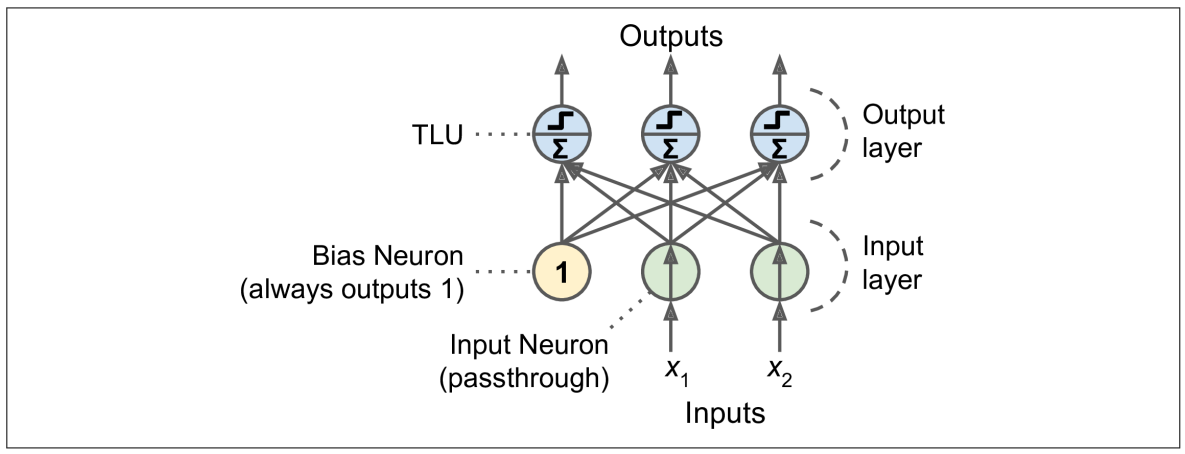

In [22]:
from IPython import display
from base64 import b64decode
base64_data = ",iVBORw0KGgoAAAANSUhEUgAABKEAAAHGCAYAAACsDphiAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7J0FvBRVG8ZfRbq7JSVEBBEMQEEUFFBEBFQUuwO7W7G7P1uxFbu7RUQE6W6Q7sb47v/cOXvnXvb2Luwuz9/fys7czTmzu3Oeed7n3em/NEwIIYQQQgghhBBCiDiyc/CvEEIIIYQQQgghhBBxQyKUEEIIIYQQQgghhIg7EqGEEEIIIYQQQgghRNyRCCWEEEIIIYQQQggh4o5EKCGEEEIIIYQQQggRdyRCCSGEEEIIIYQQQoi4s9N/aQTXM3HHHXfYvHnzbKeddgrWCCGEEEIIIYQQQgiRM+vXr7dBgwZZ69atgzXpZCtC9enTx6pXr24tWrQI1gghhBBCCCGEEEIIkTNDhgyxm266yXr06BGsSSdbEapfv37Wv39/968QQgghhBBCCCGEEHkB8en888/fSoRSJpQQQgghhBBCCCGEiDsSoYQQQgghhBBCCCFE3JEIJYQQQgghhBBCCCHijkQoIYQQQgghhBBCCBF3JEIJIYQQQgghhBBCiLgjEUoIIYQQQgghhBBCxB2JUEIIIYQQQgghhBAi7kiEEkIIIYQQQgghhBBxRyKUEEIIIYQQQgghhIg7EqGEEEIIIYQQQgghRNyRCCWEEEIIIYQQQggh4o5EKCGEEEIIIYQQQggRdyRCCSGEEEIIIYQQQoi4IxFKCCGEEEIIIYQQQsQdiVBCCCGEEEnKsmXL7I033rCTTz7Z9t13X2vUqJHttddedsQRR9gtt9xiv/zyS3BLIYQQQojtj0QoIYQQQogkY926dXbHHXdY8+bN7bjjjrMXX3zRfvvtN5sxY4aNHj3aPvroI7vxxhvtwAMPtLZt29qPP/4Y3DO+bNiwwZ5++mn7999/gzWJxz///GPfffedjRkzJlgjhBBCiG2FRCghhBBCiCRi4cKFdtRRR9l1111nS5Yssf/++88aNGjg1g0aNMjOOuss23///a1o0aJOcBk5cqRzRj3++OPBI8QeXsNXX33lXFh33nmnW05EFixYYCeeeKLbHvPmzQvWCiGEEGJbIRFKCCGEECJJWLx4sR1//PFO8MFttPvuu9vrr79uo0aNcmV5Dz74oBObvv76a/vzzz/tggsusBIlStiqVavskksuscceeyx4pNiC2PXMM8/Y5MmTE1aAArbTa6+9Zlu2bAnWCCGEEGJbIhFKCCGEECJJuP766+3bb791Qk+3bt3sk08+sf79+1v58uWd82mnnXaynXfe2UqWLOlK9e677z57+OGHnRC1adMmu/zyy13ZXjxI5BI8TyILZEIIIcSOgEQoIYQQQogkAPHozTffdELKnnvuaU8++aTVq1fPCU/ZgTBFaPlFF13klslsuuKKKyTGCCGEEGK7IBFKCCGEECIJeP75523lypXuOtlPCFB5ASHqsssusz322MMtE1I+ZcoUd93D4yFWIWxlx8yZM91tuHz44YfBWrMRI0a4Erc5c+a45bVr17rlV1991X7//Xe3Dt5//323btKkSfb33387Ue2GG26wY445xk466SS755573O2zK5VDgPPPv3nz5mDt1pCVxW1uuukm91qALoI8N4HkCHA+nJx1PG5WeG0XX3yxHXTQQbbbbru5bderVy+79957bfbs2cGthBBCCJFv0n6Io9K3b9//0n6UgyUhhBBCCLG9WLdu3X8NGjTAvvTfrrvu+t/s2bODv+SNf//997+77rrL3Z/L7bff7tZ5qlWr5tYff/zxwZqt+e233yL3v/XWW4O1//13zjnnRNZnvQwaNCi41X//1atXz60bPHjwf1deeeV/FStW3Or2lSpV+u/888//b/Xq1cG9MuA+/nYbNmwI1m5Ny5Yt3W3atGnz37Jly9y6ESNGRO6b9VKmTJnItti0adN/F1544X8VKlSIetuddtrpv9122+2/l19++b+///7b3UcIIYQQW9O9e/f/Pv7442ApAzmhhBBCCCESnIkTJ7pOeEDWU9WqVd31vELJXpcuXSKle7ihcAPFAkoD6TZXq1Ytt1yqVCm3jHPIu6/CvPLKK3b//ffbLrvsYmeccYY98cQTzhFFyPry5cvtf//7n3NuUToYK8jM4vXss88+bpncrH333det69Gjh1uXdlxsTz31lD3yyCPOcda5c2e74447nFPq5ZdftrPPPtsqVqxoU6dOdS6p0aNHu/sJIYQQIu9IhBJCCCGESHDmz58fKUGjDI/g8fxCWRnCD1ASF6sgccSZd955xzp06OCWq1evbu+++64rv0NkygqCWu3atV3JHp38uD+lc9y+d+/erlTvhRdesLfffju4R+HhvfP4BLsjxFGiiPDFOroKsg4R6tlnn3XbpVOnTjZ06FC76qqrrF+/fq4jIeIU4hkh7wiCvGchhBBC5A+JUEIIIYQQCc7ChQsjWUn5dUF5ihUr5gQi8PlN2wMEoNtuu805s7wohgjUuHFju/vuu23XXXd1ghsCVayEsrwyduxY9y+OKVxPYXitRx99tHN5IZblNZNLCCGEEBlIhBJCCCGESHBwB+HUKQwIPV70iVUpXkFo0aKFde3aNVIaGKZhw4YuDBxwTFH6ti3xIh3uqM8//9zWr1/vlj1lypSxF1980Tm9zjzzzGCtEEIIIfKKRCghhBBCiAQH8SiaaJMfELF8SV/p0qXdv9uDdu3aWeXKlYOlzBQpUsTatm3rriMAUTa4rWD70qkPcIpRhnfYYYe5krxPPvnE5s6d68TAgpRCCiGEECIdiVBCCCGEEAlOzZo1XRkbEN5dEFfU6tWrbdGiRe46JW+FFbUKCm4ngsGzo0GDBu5fBLO//vrLXd8WsD2uvvpqO+SQQ5zot27dOhfgftddd7kAc8oHTz75ZBdUvmLFiuBeQgghhMgPEqGEEEIIIRIcgrW9A2fcuHG2du1adz0/jBgxIpKx1KxZsxyFoHhCsHdO5Pb3eELe1ltvveU69B144IFWpUoVJ05Rvjht2jTX2e/YY491l/Hjxwf3EkIIIURekQglhBBCCJHg4B5CiII//vjDJk+e7K7nFcrI6ATnHVSEa1P6lh94jFiQWx6Vz2FC/PEZVnmFxy5smHmFChXstNNOsy+//NK+/vpre/rpp+300093wenFixd32/CLL75wt6FLnhBCCCHyjkQoIYQQQogEh852p556aqRM7JFHHrENGzYEf80ZRJMpU6bY0KFD3XKlSpVcd7doIOJkV+o3a9as4FrhIG8pp3JCXivgiGrUqJG7npXsBLHFixe77VNQ6EBI2SLbgW2+5557OrEJIerXX3+1l19+OSIGjhw50kaNGuWuCyGEECJvSIQSQgghhEgCjjvuOGvZsqW7/vrrr9uQIUPy5E4iQ+qSSy6xlStXuuULLrjAuX2iQWZU1o5wgLvo559/DpYKx/DhwyOvJSs89zfffOOuly9f3po3b+6uZyU7QYyOekuXLg2W8gfliscff7wdeuihNnr06GBtBoSp9+3b184++2y3zLYnrFwIIYQQeUcilBBCCCFEEoBwdMstt7h/Ce2+7LLL7Nlnn83W+YObB1fRwIED7fPPP3fr9tprLydIZQ0lr1evnvt37NixNmPGjExOJQSoH374wd5+++1gTc7kVhKHg+jdd9/d6jYsf/fdd/btt9+65e7du1uNGjXcdfCvET788EP3PGEQn+6///485WXx/rIKeKzDLYbjiewnXFFZ4Tb+eXGlEfAuhBBCiLwjEUoIIYQQIkk4/PDD7Z577rGyZcs6seWcc85x+U7PPfec/fnnn7Zq1SpbsGCBE50Qm9q3b2+ffvqpu2/Tpk3tjTfesHLlyrnlMAcffLD7FyEH0QqRh7wjRCyEHVxYPLYPR88Kopb/G+V2n3zyiXM7LVu2bKvSO8SfK664wl577TX3HhB7KC0ks4r3w/Xq1as7kS1M586dIzlWt956q9177702c+ZMV4L33nvv2dFHH+3ea8WKFd1tolGqVCn3LyIeXe5wfi1cuNC9xrZt20acZgST8/pwZvH6eM0bN26077//3h577DF3mxYtWlirVq3cdSGEEELkjZ3SfnSjFuX369fP+vfv7/4VQgghhBCJwzvvvONEGsrSsjmUi4BjB5HpmWeesTp16gRrM/PXX3/ZkUce6UrSokFp3JVXXunELrrEIQJdd911wV/TIadq0KBBwVI6HEfiKipatKjVr1/fZs+e7craEIEQoOjSR+A3whkiGmIPIhkiEMJXGJxSN910k912221RnVYIYSeccILbHmQ3tWnTxoWLk4HlYXvts88+mQLFEc+mTp1qtWvXtp9++smV4/mSxL333tu9bh573rx5LhSe185jPv/889arVy93OyGEEEJkpkePHnb++ee7f8PICSWEEEIIkWT06dPHZSshytA5D5EkXGLHdcQnnFA4ej766KNsBSioWbOmcyKde+65TnDyj8djdOjQwbmGTj75ZCfIEMwdzW3E3w866KBMrwNxZ9OmTcFSOp06dbInnnjCiT6TJk1yritK9BCPeL0ffPDBVgIU7Lzzzq4ckfsiXrHsX2etWrVs8ODB7m++k2DdunXdbcKwDvGM0HMP5XVkSUHHjh1d5zsCybkvr4syRF+mhyuqdevWbntIgBJCCCHyj5xQQgghhBBJjM9+QvChBI6SNcrZ9thjj0yZSnmFcjiCuXElIeggFuUVDispWaMkD8hxQsRCzPJOKAQ0hB3K+8h/4nVXrVrV5VXlp7wNAQt3EgJUkyZN3HPklenTp9vvv//uBLLSpUs7YaxKlSrBX9Ph7+PHj3fvhW2MiOdfY36eSwghhNgRyc4JJRFKCCGEEELEnawilBBCCCFSF5XjCSGEEEIIIYQQQojthkQoIYQQQgghhBBCCBF3JEIJIYQQQgghhBBCiLgjEUoIIYQQQsSdatWquRDxaJ31hBBCCLFjIBFKCCGEEELEnY8//thGjhxp9957b7BGCCGEEDsaEqGEEEIIkZSsXbvWNm7cGCyJRKdq1apWunRpK1WqVLBGJAPLly8PrgkhhBCFRyKUEEIIIZKS7777zqZMmRIsiWTg3XfftXnz5gVLItH5559/7M0337Rly5YFa4QQQojCIRFKCCGEEEnHmjVr7JdffrHhw4cHa0Sis2rVKleO9/vvv9t///0XrBWJDG7D3377zX3ONGZCCCFigUQoIYQQQiQdc+bMsblz59rYsWNtxYoVwVqRyIwfP96Vdv3xxx9ORBSJDaITgiElr8OGDQvWCiGEEIVDIpQQQgghkop///3XTYopFUKAmjhxYvAXkcj8+uuvbszmz59vs2bNCtaKROXvv/+OiE8zZsxQGaUQQoiYIBFKCCGEEEkFwhOuGkDUQNxAmBKJy8KFCyP5XYwZ5V0as8Rm8eLFkTHDFfXzzz+rJE8IIUShkQglhBBCiKRi0qRJboLsYaIcXhaJx59//pmpBG/ChAkqo0xgEJsQCnFDeciG2rJlS7AkhBBCFAyJUEIIIYRIGpgEjxgxIpMjA3Fj9OjRwZJINHz5ZHjMFi1aZJMnTw6WRKKxadMmlwcVBjcbArAQQghRGCRCCSGEECJpCJcIebxrgzIvkXgQIs8lK5RRylmTmDBes2fPDpYyUOmrEEKIwiIRSgghhBBJw5gxY2zlypXBUgZMmKMJHWL7g3ONDmtZmTZtmnNEicQimnPNM3LkSFu/fn2wJIQQQuQfiVBCCCGESAoQMsIlQpUrV7ayZcu66/wNsUMkFmQKkSXkqVKlihUvXtxdR0wcN26cuy4Sh7Vr19off/wRLJlVrVo1uJZe+kq+VzSBSgghhMgLEqGEEEIIkRTQ2j9cIrTffvtZgwYNgqV0x83mzZuDJZEIkCEUdjs1b97cypUrFyylh12TPyQSB7K6lixZ4q7vtNNOVrp0aatRo4ZbBlxSKn0VQghRUCRCCSGEECLhwXkRLgUqX768jRo1KlP3LsSOqVOnBksiESBDyI8RzjVEp6ZNm7plQFScN29esCS2N1mda3zOEJwQojxjx45VZ0MhhBAFRiKUEEIIIRKerCVCCBpMmKdPn+5KvIDlX375xV0X2x8cTgiHnpIlSzpnDUKhL6PcsGGDu43KuxKDVatWudw1T+vWrW3u3LlWqVKlYE16h0qEKo2ZEEKIgiARSgghhBAJz8yZM12LeNh5553dRJhOeYgaZcqUcesBoUrByYkBTjUyhDy77rqry+7CseZzoYCcL0RGsX1BVCLvyY/ZLrvsYn/99Ze7Tqlro0aN3HVgzFRGKYQQoiBIhBJCCCFEwoPzwuc94YJCiAJEjdq1a7vrwARaYdeJAdlBvp0/YxR2suGE8mOIuIjIKLYvfL6GDx8eLJlzP5EP5alQoUJwzWzKlClOBBZCCCHyi0QoIYQQQiQ0y5YtyyQsUdYVDiinnKtu3bruOqLHDz/84K6L7Qed78JlXdWqVXOuNQ+um3AZJYKV2L4QRp6d6ASIhUWKFHHXGb+ff/5ZJXlCCCHyjUQoIYQQQiQ0dFhbunSpu160aFEXlhwGN9S6deuCJbPx48c74UpsP8LlWpR1MR7kP3lmzZplpUqVCpbMJk6caMuXLw+WxPYAF5R3G5YoUSLT+ADdKVu2bBkspZe+hj93QgghRF6QCCWEEEKIhAVnE6V4vqyLfxcsWOCcNeFLuGV81kBsse0Ju9EYM3K6so5ZuMMaLpwJEyYES2Jbg5g0evToYCm9NI/srqxjNmPGjOAW6aJUeFkIIYTICxKhhBBCCJGwEIxMNzUPYhOuGvJowhe6eoX56aefgmtiW8OYhcUJRCicbDmNGWVdOHG82Ci2LfPmzXPuNA/jwDhmHbPVq1cHt0jn119/zSQACyGEELkhEUoIIYQQCQu5QuQL5RdEEJwaYtuCmPTLL78USEyaNm2ac7mJbQtjRSZXQcQkPp9ZhSkhhBAiJ3ZKO1iImijYr18/69+/v/tXCCGEEGJ7QCkeLo0wW7ZssR9//DGSIbT77ru7S1b23ntvq1evXrAktgUcVn7//fdR850++eQTV5YHZAs1bdrUXfcQXN6uXTurU6dOsEZsC/g8IRxmzVEjMP7zzz+PZHm1bdvW6tev7657GLMDDjggEjIvhBBCeHr06GHnn3+++zeMRCghhBBCJBUIGXfddVekTK9Pnz7Wt29fd10kLoMGDYoEzB933HF2xBFHuOsiMSHw/4orroiM2ZlnnmmdO3d214UQQojcyE6EUjmeEEIIIYQQQgghhIg7EqGEEEIIIYQQQgghRNyRCCWEEEIIIYQQQggh4o5EKCGEEEIIIYQQQggRdyRCCSGEEEIIIYQQQoi4IxFKCCGEEEIIIYQQQsQdiVBCCCGEEEIIIYQQIu5IhBJCCCGEEEIIIYQQcUcilBBCCCGEEEIIIYSIOxKhhBBCCCGEEEIIIUTckQglhBBCCCGEEEIIIeKORCghhBBCCCFEwrFp0ybbsGGD/fPPP8EaIYQQyY5EKCGEEEIIIUTC8eKLL9r1119vjz/+uP3000+2atUqCVJCCJHkSIQSQgghhBBCJBT//fefTZ061RYsWGDDhg1zQtSll15qDz30kP3888+2Zs0a+/fff4NbCyGESBYkQgkhhBBCCCESCsQnnE9h1q9fb7///rs99thjTpB66qmnbMaMGU6wEkIIkRxIhBJCCCGEEEIkFJUqVbIzzjjDevbsaXXq1LGddtop+Es6a9eutR9++MFuvPFGe/DBB50YJYQQIvGRCCWEEEIIIYRIKEqWLGnt2rWzAQMG2J133mm33XabHXXUUVa3bt3gFumQETVixAi76aabbMiQIcFaIYQQiYpEKCGEEEIIIURCggNq5513tvr161vfvn3t1ltvdYLTIYccYiVKlAhuZfb3339b2bJlgyUhhBCJikQoIYQQQgghRMKDIFWsWDFr0qSJnXzyyc4d1a1bN+eaqly5snXu3Dm4pRBCiERFIpQQQgghhBAiqcAdVbNmTRs4cKANHjzYTjvtNKtYsWLwVyGEEImKRCghhBBCCCFEUlKkSBEnRrVu3TpYI4QQIpGRCCWEEEIIIYRIef79918XZC6EEGL7IRFKCCGEEEIIkfJ88cUX9vDDD9vSpUuDNUIIIbY1EqGEEEIIIYQQKc2kSZNs6NChNmLECHvsscdsyZIlwV+EEEJsSyRCCSGEEEIIIVKaDz74wNavX++uT5482Z544glbtmyZWxZCCLHtkAglhBBCCCGESGlOPPFEa9asWbCU7owaMmSIrVq1KlgjhBBiWyARSgghhBBCCJHS1KhRw8466yyrW7dusMZcad4LL7wgIUoIIbYhEqGEEEIIIYQQKU/16tXt/PPPzyREDR8+3F588UVbu3ZtsGb7sHr1ahszZoy988479sADD9h9991nb731lo0ePdqVDf7333/BLYUQIrnZKe0LLeo3Wr9+/ax///7uXyGEEEKI7cHff/9tK1eudE4FJmKLFi2yhQsX2m+//Wbr1q1zt6ldu7bttddeVqlSJatZs6ZVqFDBKlasaOXKlXN/F9sWxmz58uVuUs9YEQDN5aeffrLNmze729SvX9/22GMPq1y5shszxotxK1OmjO20007uNmLbwbisWLHC1qxZ48bqr7/+ssWLF9uwYcNsy5Yt7jZNmza1Jk2aWLVq1dyF8eIzV6pUqaQbszlz5tijjz5q8+bNc8u8/m7dutmxxx5rxYsXd+u2FXxW3nzzTXvppZdswoQJ7vsuTNmyZa1x48ZuXnbKKae4bR+v7c3Y4w475JBDrFixYsHa7c+GDRvsu+++s3322cd9ZwghkoMePXo44Z9/w0iEEkIIIURCsWnTJjcxmzJlio0aNcpmzZrlWqr/+++/wS1ypmjRok7YIP8FoaNBgwZuwlykSJHgFiKWcCjJmCFijBs3zrk5GLP8hD4z8fdj1qpVK+dUKV++vMYsjjCxZ4zCY4bYm83UYCtKlCjhBGDEKT9mCL8775wchRZ8vzzyyCOR/XSXXXaxU0891Tp16rTNRLUZM2bYoEGD7LPPPrN//vnHvQbKBv2+jzsK4Z2xgg4dOtjDDz9srVu3jvl2/vrrr+2qq66yqlWr2ttvv20lS5YM/rJ9mT17tl199dX25Zdf2u+//2716tUL/iKESHQkQgkhhBAioUFoojTmzz//dBMPXBmxAOdAw4YNrV27drbnnnta6dKlg7+IwoAoiHMCVxolQ7hLvDutMCAAMBHGdbPffvtZixYttrk7JVVB6EDUwO3CmM2dOzfSMa4wIIggnjBm++67rzVv3jyhnDTZMX78eNclD9EbqlSpYpdddpntuuuubjme8HkhLP3777932699+/Z2zjnnuH9r1arlxHQcaQiEjz/+uH3xxRdO7MVF+MYbb7jvs1iKZb169bIPP/zQDj30UHv33XcTRoR67rnn7LTTTnMuSQRTiVBCJA8SoYQQQgiRkFC29cMPP9jnn3/uRI1o7FK0mBVNm9QWTfu3dNnyVr5i5bR1Rd3fNm5Yb6tXLE+bTK+1v7dsts0bN9q///7j/haGCRtOmyOOOMJNkiVsFAwOHSkZorwOBwcOqGgUS9u+RXYpmjZmxa0c5ZEVKkfcG4zZiqWLbdPGDeljlja5jjZm3B7hsHv37m7smJiL/MOYIbR888039u23325V8uUpVqy47RJ8zspWqGTlyleynYtkjNnyJYvSxmqjbXFjttH+i+JOZIxw6hx++OFOMEn0MWObEE5OGSkgAp199tnOlRQvEP7OPfdcl0WFWEdg+s033+zKUqOBeIhYhlMJobdt27b2wQcfOPdgrJAIJYSINRKhhBBCCJEwcPjBWf2RI0e6iQ+ugKwUL1HSyleqYo2atrRdGze1suUrpl0qOTEqKzzexrSJ3do1K9Mmygtt+sSxNnfmFFu3ZpX9HWTaeChzYZLcs2dPa9SokYSNPMI2ZgJMSczHH39s8+fPD/6SDiJfseIlrFLV6tag6R5Wr3FzK122nBs3RI1obFi31tasWmFLF/9lMyePsznTJ7t1f/+99Zjh/EDYYBKqMr28Q0nXL7/84gRDcp7C7LTTzmmfsxJWpUYtq79bC9u1IZ+zCk7o9SJvVtavXePGbPFfc21G2pjNnzXdNqxfa/8EIo6Hcj3EEsaMsr1EHTPysJ588kn79ddfnWtywIAB1qZNm7i+Xr7zmGPx3CeccIJ7/ryIPpSl3X333c6FOHjwYLccq7K8/IhQ7vt240b3Hc7zkwsWL9FOIpQQyYtEKCGEEEIkBBx6EAg8ZMgQVw4TZue0iV+N2vWsScs2Vq9xM6tao3baJKdgk8HNmzfZgtkzbOaU8TZ5zEhbvZKSm4zDHsSnjh07umMdMli2VQ5MMsKkd9q0afbqq6/a1KlT3Rh6iqRNPmvWbWDN9mxrdeo3tmq1MjqP5RfcNgvmpI3Z5PE2ZfwftmZlZpcVrpGuXbtanz59nMihMcsexmzixInuc0bZXRgEptppY9Ws5d5Wp8FuVrFK9QKLGRvWr0v7nE13gtSUcaOc8BuG8lecbFwSxV2TFcQ5HGIEcsc7+BrhhgD09957z3Xrw4m1++67B3/NGdxsiLFkSSGUUaLnX+9HH33kvk9xR1HmFw3KMHk+xvryyy936z799FMnOuFE5WRAnTp13GcMUemGG25wy88884wruz3ssMNcZhZB6jixKBfkM4lb8eijj7aDDz54qzJM9kHELb4zzjvvPCcmZYUS0ddee81tm759+7qTAzQ14PknT57snLK8Hr6ruT+CGeKmECKxkQglhBBCiO0OE2POZpNxgkPDg5hQpXot26fzoU7MKFIktmfVcdeM+PFLGzPiZ1u/NuN5gc5TJ510ksuNkqixNZQC0SXt5ZdfzjxmaRPZ6rV2tf279LBGzVvmKBZu2rTR/hj+s63OIirlBM624kV3tiljR9rGDZmzpgjDPvPMM10OkcZsaxgzuom98sorzrHiYYxq1Wtk7Q/uYXUbNo3q9mFqsGbVSvvt5+/THiezuyknqtWoZfUaNLI/hn1rE/4YnmnMGCOECoK/yV3akcds+vTp1qVLFyf44DrCoZYfcD/deeedTpTB4YYoBQMHDnSfUTK5+LxG28YPPPCAXXLJJU6A950qcVZde+21bp9h7Lmf3y/++OMPa9mypR1//PFOgD755JNddh+CF2ITQjCPwz7GfS6++GK7/fbbM7lLEaxwl/H4CxYsiFpCSAMKBCxKe3lsXKqITzw39+N3A7zb6qabbnKvWQiR2EiEEkIIIcR2hcwVJsZMlPwECCjX2rfzYbZnu47ZlgCFIUfop2+/tFEjfgnW5I1OXXtYs+Ytbfj3n9u4kb+4TBsPTigmcQRhx6q8JRVgnCi9w/WAS8FTqWoNa3dgV2vRZv9cy3DWr19nV55zkv38/ZdRM4Syo0LFSvb6Z7+kPX4RG/H9FzZh9G8uP8rDmJGlg7ihMcuAMXvrrbecw8VP3m2nnaxKtZq2f5eettsee+U4ZpMnjLXLzjre5s2eGazJG5269rQHn33dXV+8YK6N+OFLmzzuj0xjhmh4yimnuK6VO6oQhXB04IEHOnEFQQnRJj+88847dswxx7jv0/vvv98JP1BQEQqxhxMDCFuU2tLp8IorrnCZeTjD+Jx5EQpXG3lWCEZXXnml7bXXXq7L4H333edeF8953XXXOZHIP39BRSgaU+D0wrnFSQsEL14/TQtwjpHrJ4RIbLITofSLLYQQQoi4g4Dx0ksvuXyPsADVvPU+dvKF11ub9gflSYBiIvPg7Te4SfIrzzyWr8vEsaOsbIWKdsiRx9rx51xhNeo2CB7VXGv6p556ypXkZHN+boeDSSBlOAgaXoDCSdNq3wPshHOvtFb7HJCrAAUfvvWK/ZJPASpM5ao17NCjB7oxo2zMw5g9+OCDrqNiRGzZwSGzi22CcOi3CQLdfp0Ps4HnX532eWuX45iRnzbkyYfyLUBlhZLMHsecbH1OOtcqVKoarDVXYoWQQBbcjvo5o6yV7zHAfZlfKI/zZY0ISIXdjrgKKaXz4hBC4VFHHeXWIUCFYf/q3bu3DR06NFK6uP/++zvxixJA9rl77rnHub0KS9myZd1r2Hvvvd0y+y0lnayTACVEciMRSgghhBBxZQsT2yFD7MsvvwzWwE7WsWsvO+K4061k6a0zQrKDyfFXn7wXLBWcqjXrWP/TBjn3FeHMgDiGUIYQtaPDtkCAogOehw6FnXsebV17H28lSpUO1ubO/LmzCi0S4aqoXntXG3jeVdZkjzbB2vTXSaizhKj0bYEjZfTo0cEas6LFi1v3vidZx269rGix3LtBUn63csWyYKlw8Lmqv9vuduxZl1rDpi2DteZKtx599FEnRO3oZNcNLycoZ/S5S5TGbUtq1apld9xxx1biFC6l2267zeU1bdiwwd5///3gL0IIsTUSoYQQQggRNzjj/8knn2QSdoqXKGVHDDjd2h+S/2BZnBpbQk6qwlCiZGnr1ud4O/jIY53AAkzkEcwIwt1RQczB/URpjocud0cef5a17XjIdi19Q/zqPfBsO/CwoyLlPl6I+vPPP93yjghumBdeeMEmTZoUrDErW6GS9TvlQmux9/7Owba9KJf2Oo4ceJb7vIfHDCEKV5BIHiijxDkVjUqVKtk+++zjrlN2LYQQ2SERSgghhBBxg2BbOi95SpYua/1Pv8iFjycCTM732q+TE6KKBu4CJsgEOtOBakeEDBayWHyZD+VU/U670Bo228Mtx4Lme7Sybkf0yfFy0KGHW/ES0bupkSF2UM9+LhwdGDNKPcmc2dFgnHCehCf+hPwPOPtyq12/UbCmcBzQ5dCoYxS+7NVu/+DWW1O0aDEXYJ9VPESIWrlypVveUQh3hyvI/sp9fNh83boF70RZEHIqHyRDiiYPQJmgEEJkh0QoIYQQQsQFWvk///zzbrIJiDzd+51kNerUi0xEY0GFSpXtvidfyfXS6ZCewT0yw2vZc+/21rlnP9s56ApFHtKzzz7rcod2JMaOHWtvvPGGK6GEEiVL2aF9B1rVGnViOmZde/ax2x9+LsfLtXc8bOUrRC9X4rXs3aGLK+n05ZTLli2zF1980QUn7yggQCH0EgrtKVmqtPU89jTnQIrFmLF9L73xzqhjFL4MPPP84B7RoeMlTrp9Oh0arDFbvHix+5z5jKREBNEnls7IevXqWalSpdz1MWPGuH/zAyHifh8noDuWn8vcyFqGFwaHpM+qEkKInJAIJYQQQoiYg3hDeZB3OTBBaX/w4daoWcuYT5oQSrp075XrpV7D9LP00cBR03Lv/W3Pth2DNWYzZ850nZ0SeYIcSxBxEAQIH4Yiu+xinQ/vZ7s2bBLzMWN/oKV7bpecnpcxa3vAIbbbHq2DNekTdASZHWXMlixZ4koR6ZQGhPt373+KVasZO9GQh4k2NlkveSn5Y5/a76DumTKiENEo2S1swHasQSD73//+ZzfeeKMr0Y1V6eCuu+4acQyRucbnLj+wf7OtcFQRCp4o8JlDvAcvsgkhRDQkQgkhhBAi5pABNWvWLHedyXDLdgc4wSDWYkYsIReqQ9fDrU79DLGKVucTJ04MllKbzz//3E2809nJ2h3Q1Vq03jdtzBL3cJEyry6H97cqNWq5ZSbnTOznzJnjllMZhKe3337b1q5dG6wx63BIL2vYdI+E/pwVK17CuvTqb2XLp7vcfDlhopXl4eAkPB1RFufRzz//HPylcBAsftJJJ7nrCFt0lssrfK/+8ssv7vqBBx6Y7+56ixYtCq4VjJxKlOmg6YW6/L4u9mEvfgshUh+JUEIIIYSIKbRhJ1fIOxtq1KlvB3Y/yijHSXRKly1vBx3ez0qWSs9tIXsFl4Z3mqQq8+bNs++//z5YMmvQpIUrm8K5kuhQdnZwr2OtWLESbnn16tX22WefpfyYIbT9+uuvwZK5roF7d+ziXGaJDAJZxcrV7NCjB0bEMkSeDz74IKEcbDVq1LA2bTI6MdJ10JcWFwbe83HHHWetWrVy+yhd5fi+zA3KAq+44gon1lD2dv7550d1HPGdFU3QQSSaMGFCsFQwKB/866+/gqXM8L0/atQod71Tp07u36wsX748uJaZ8ePHR0qAhRCpj0QoIYQQQsQMJpFff/11pHU4IgaOmpIlk6c8o3rterb7XvsGS+YmbgXJbkkmPvzww0gpDa389+nUzZU5Jgt1G+xmTVvtHSyZc7CQSZaqIIYg2viJ+y67FLWO3Xq5f5MBhJhdGzW1+k1aBGvSO6oV1qkTS3ZJ++7ae++MfYoSY8TaWIDARZlf2bJlXUnl6aef7srsogkxCFVfffWVHX744ZGOlWeffbZ16dLFXfdUrlzZ/YtIFK10kLy3sNCcHbwGOmRGg8d9/PHHtxIL2R/vvvtu9x1Srlw569WrV/AXs4oVK0aE0R9//HGrx6Yc8dVXX821HJP7xUIEFEJsfyRCCSGEECJmMEmjHMpTt0ETa9yiVbCUHDBh2qt9ZytXMX1Sx8Tn448/dk6CVIROViNGjAiWzBrv3spq14tNV7VthetyuH9nK1k63cGGswYHW6pOWikRJUvJ07JdB9cRL5nAGUmwvM+S4vOFGJpIDjbymxCKAIdRrIRNRDhEpXvvvdeJNOTPnXjiiXbooYfaDTfcYK+99pq99dZbNnjwYOvZs6f17t3buYz4bjr11FPtuuuuc93ownTu3NmKFi3qRK3LL7/cCbG4AvlOpmyTx8/p8+BFrN9++80efvhhl+k3f/58t86D+MTf7rnnHpsyZUrE/YQriyYUvL5LLrnEGjRoENzDrF27du49Au8H8ZSTFIhPlDieccYZ7jnJFYsG5YuwYcMGu/nmm11OH2WJQojkRSKUEEIIIWICZ7KZHPiOcrTXp5V+srgzwlSoVNVatm0fLJmbcPlSk1SDib9v+V4sbcxwrhFwnWxUq1nXmrdqFyylh5QzbqkGYg35XV6soXSUMUs2EGKq197VmrbMKHkj74iys0QB8aROnTrBUvo+FSsQjBCUEGW6du3qxpPvz1tvvdUGDBhg/fv3t+uvv96++OILJ8C0bNnShdA/8sgjVqlSpeBRMsAZ1b17d/c9jBv1sMMOs3322cc6duxoJ5xwghN9rrrqquDWW8N9eU3kM11zzTV2yimnZDqhALVq1XJ5T4hgiF7t27d3wtkzzzzj/o5D67LLLnPXPRUqVLArr7zSiUyIWgMHDrT99tvPXRDiEIvJyPJh7VmhJLJ27drufb3yyit2zDHHuO0ghEheJEIJIYQQIiasWLEiU9la/Sa7W50GuwVLyQVn9BGhKlWt4ZZxAAwfPtxdTyUIgw4LNXu02c+q1syYdCcTjFmrfQ+0MuUquGXEmrDDK1XgcxYOy2+9fyerULlqsJRcMGbtDzkiInpSCsbnLLfSrG0FbqMmTZoES+nlaLjsYgUlf4hEQ4cOtXfffde5ghBnmjVr5sQXut8hBr3++uv25Zdf2mmnnZZt5znK4B588EE766yznKDDyQA+2+RDdejQwQk4ffv2dc6kcJmhhxK6Bx54wD1n8+bNnYCVtXSuXr16zqXFaypdurQrv8MphoDF+vvuu8+tzwri1F133eWeF/Fx+vTpzkXF41HGd9NNN7m/8drKly8f3CudmjVr2ksvvWRHHHGEG4uws0oIkZzslPYlH/Vbvl+/fk6B518hhBCisND6vaCuBCYqt99+uzt4BQ7UcW5wJpaD8vzw1FNPuVyKEiVK2B133BGx+ucEpQ0cMDdq1MgFw6r9dHQQoCgv4Yx+kV2KWu8TzrZGzTNasWfHpo0bbPHC6GG3WZkzY5pddcGptnZNutsKatSua58OK1zgbjQ4RPr+k7fttx++cMtM8rKbZCUrOB1oQ89kk8/ZgHOusFq75t7Z6on7b7PhP+atJGbBvNm2ZNHCYCmdi66+1U4656JgKXYwZp++9aKNG5neQQwXC64Nxi5VIB/oueeec9f5nJ168Q1WsUp1txyNFSuW2S2XnWcrlqfntOUE+8Gs6VNszeqMzxf7xfs/jLY6u2aUWMUSxuztFx61GZPGumUElKuvvtqFbycCuJ/4/QGcQriJEGniAdsCJxLiDr9RxYoVc983/rcvLyCYkwuFo4zriDp169Z1YhHfzb6bIg6laCBeIbTxO1emTBnnYDr++ONdbhPOJ0roeBwen8fi9ZFxlbU8MBq4sebOnRt5fASmatWqufeNWMbr5fHYzlnhN5/783fuy7YRQiQ2PXr0cOW6/BtGIpQQQohtAmdK6VhVEDhbTJaFPxDnYJqDX8QoRKX8cPLJJ9uLL77oHoOgVs7E5gZnX8kC2XfffV0ZTNYztSIdzlZ/+umn7jrlbMedfbmVLR99ohNmzB+/2bWDTouUF+XE31u2pE1Elth/oTP08RKhYM70yfbG0/e7SRKTsYsvvjhTx6xk57HHHou0nq9Wq64dc8YlVrJU7iLb1RecYp+9PzRYyj/xEqFg8tg/7MNXn3KCChNjhON4iQbbGr4HH3rooUhpaI069ezEC65117NjyeKFdsLhnWzxwoKVuW0LEerP4T/aF+++7Jb5nOGaofQrEaCjG04d32wBN1GfPn3c9R2FrCKUEELkhexEKJXjCSGE2CY0bdrUiThZLy1aZHRHwrUQ7TaUBYjEhrPY4RKhWmkT1rwIULB50yZb9Nd8W7hgXq6XpUsWZRKg4k2VGrUiLhPO0tOmPVVA0AiXT9Zt2NTleCU71WvXtdLl0oViSvJo/54q4FIJdz5r3Dy5Qv+jwcmFhs32sJ2L7OKW+ZzFMnupsOAGIqDck8pdF4UQYlsgEUoIIcQ2gayKX3/9dasLZXoeciOi3YYzr/kpRxDbHjowUbIIO+20szVolnsZXqwoWjR+ZRklSpSy2vUzOsXhnsuLYysZmDRpkhMPPY2b7elcL/GmRImS1rh5hvgca8pXrGxVa2TkWjFmqdIlDwGEUi0osssuLnct3lSpWt0qp13iSbkKlaxG7QyhB3GUfKhEgLKvsGOW77lsCkmEEELkAYlQQgghhCg0s2fPjnRYK122nCsT2hYgTnY57IhgKfbsXKSINWySIZiQSULeSipAOLAPHi6HcJOPQPJixYq7sr38XiqkPc+xp5xtbfbtEDxS7EEEbRgSQSmj8qVUyU7YBVW+YhXXXS43dkr7r0TJklHHI7dLjVp17eLrbrOSJeOfg9ew6R7BtczfJ4lA5cqVg2tmq1evThlRM69Q1koWEzlVQghRWJQJJYQQYrtCJyS6AcHgwYPt2mtzzjcBZUIlHuE8KCbGx597pe2yS97a/P85crhdO+hU27Ilfw6jIkV2sY4HH2pnX3S1VaoSv+5gq1cssyfvvs7++/cf5xQiqL5Vq+QvgwrnQdVv0sKOGniOFc1j2O+MqZNs+dIlwVLeoUSzUZPmLuctnsyfPd3efOZB27J5k3OyEHRNSXAygwOPPKiRI0e65SZ7tLHeA89213Nic9o2mDh2dNq2yL9wUnvX+lazdt1gKb7MmDzO3n7+EecyQlzGPVu1amJ0/UOw/eSTT1xXNoK0O3XqlKcg7lRhwoQJtnjxYhfwn0qZeEKI+KJgciGEEAmJRKjUgMkxYwm7tWhtR514rrueF3AVrF65PFjKO4hQFSvn3t2wsKxft8ZefGiwrVm1wi3Tnrxr167uejJzyy23uJI8aNmuox129AnORZQKLFu80F5/+j5bF3R5u+iii5I+W47vvDvvvNNmzJjhlvc5sJt17tnXXU8Fli36y55/8Bb7999/3DJdDXffPf7lhkIIIeKDgsmFEEIIERco6Vq0aFGwZFa2QqXgWt7AqVKlWo18X7aFAAWIXZQYepYsyb8DKBHB2eCpWLlqyghQQClZ8eIZpUOpUEJJyDrB5J6KVaoF11IDSkIpf/WEv1OEEEKkDnJCCSGE2K7sCE4owp+//fbbYMmsW7duTnjJiSlTprgLkMVx0EEHues5QYi7z76h02Dr1q3d9ezYsGGDu48Pp95zzz0zdYGKBu3KGTM6WAFlKRxK0MLcB5OT7bJro+QufQrzz7//2oSRv9qyJelCxt57722XXnqpu57MDBw4MDKOzVq1yxQMnez8m7ZP/vHLt7Y2cK91797dvd9kBiGNskKcg5Srtdh7f6tSrWbw19Rg2Def2qaN69115iG9e/d214UQQiQfKscTQgiRkOwIIhRn9C+++OJgyezJJ590z58Tb7/9trtAzZo17b777nPXc4JSHd9yH3HorLPOctezY8WKFXbrrbdGxCO2Z25iF9vh9ttvd64MuOeee9x7CYtQqQ4lQpQKJTthESrVSQURav78+S6PbEdBIpQQQiQ3KscTQgghhBBCCCGEENsNiVBCCCF2WPLboYvOaFzyS5EiRaxGjRqRS14eo0yZMpHbV6mSt+wjOjf5+9DFKDd4HXSf8vcpWbJk8JfsKVq0qFWvXj1yH95bVkqWLuvyalLlUqFyNStaLKMTVrT3nOyULlMu6ntP5kuROHfg29ZQgsfFU6ZchajvO5kv4UwoIYQQqYnK8YQQQmxXtlc5HiLN5MmTnZCSG74cr2fPnvbRRx8Fa4WH0rzrr7/e5s2b55b37XyYderex11PBTanvb+hzz1k82ZNc8uHHHKInXrqqe56MsPnx+eBde09wPbav7O7ngps3rTRXnniLlvy13y3fNRRRyX9Me2yZcvshhtucGW0iFHd+59se7TZP/hravDgDYPc2MGJJ55ohx12mLsuhBAi+VA5nhBCCJEGDiPgHIzPNcoJOogR4C2yp3jx4la5cuVgyWzt6pXBtdTgn3/+tnVrVgdLlifhMhnA0eZZviS18rzWrV1jGzekB1xDtWrJ30kOF6LPkuP7a/XyZe56qrB65XL75++/g6XM+2cqQcOJffbZx53cIGNQCCF2NCRCCSGE2KHw3d+2bNmSp7bthAF7t8huu+3m/hVbExahli+NTWv1OTOn2R/Df8rXZdSIYc65FEv++XuLrV2d3hofB0peyyMTnfCYrV61IpMAUBjWpG2raGOT22Xxwtw/j3ll08YNtmXzZnedsttUGLMSJUpkaooQq88ZLF64IOqY5HZhrGPFymVL7L///g2WzJUKJwp0JJw2bZpzoxUWHmvGjBnOXYujVwghdjQkQgkhhNih8EISLqgffvjBXc+JkSNH2urV6S4YzlyL6IRdCxvSJlZrYuCGGvLUo3b2gCPzdbnwlH62dEnsJufA5HjLlnRhixytSpUquevJTtgdtHLp4ohoU1gmjhll5xzfO+r45HT55rP3g0coPKuWL7WN69OdUIg3pUuXdteTGZxQYeGQ9xgrvvrkvahjkttlyoT0bpyxYOXyJfbvv+kiFOOVWwfRbQmdP+kketlll9k555xjs2bNCv4ihBAiv0iEEkIIsUNB/lTNmjVdOcv//vc/mzNnTvCXrSF75cknn3Rt7An97tSpU/AXkZU6depEAtfXrFphS/5Kz4cqDJTBbdmyOd+XWDNz6oTgWnrpIftPKlC/fv1I0PWyxQvTxm25u15Y+GxFG5fcLl6AiAUzJ49L+3967Cn5b6kgHDJW3skJi9M+Y7FyQ7Hto41JbpdsomULxPSQoEXJa7FixYKl7c/SpUvT3u8Wd/Ji48aNeWriIIQQIjoSoYQQQiQtS5YssREjRuR64Sy2B/cHZ7Jh5syZ1q1bN3v99ddd2R0Tqr///ttmz55tb731lnXv3t05oeDMM89UOV4O1KtXL1I+g3g0Z9pkdz3Zoaxr9tSJwZLZ7rvvnhKuGmjRokVkov/vv//Y9Elj3fVkZ/26NZEQeWjatGlCuWoKwx577BEZM5xrc6ZNcteTnS2bN9ncmVOCJbOWLVs6B1uigAjloTtm2JEmhBAif0iEEkIIkbR8/PHHrlNZbhcEJQ8TiAsuuMCOPvpot0yHvJNOOsn23ntva9CggTVq1MjatWtnAwcOdJ37EKboFksZBuUwIjo4xdh+nplTxtmmUDB0QWjestVW23zfjgfZ0K9+s49/Hhf18s7Xv1u1GrWCWxcewpIXLUh3y+FE2Wuvvdz1VKBChQqZSkxnT5tkmzcXPk9r1waNrHzFzJP0ChUr2aND3ok6Zv7Sq98Jwa0Lx9KF850bD3DntW7dOuL4SnZwdOFgS+e/mAmHjZsirqY3bfAwjq9+/GPUsfKXlnvtE9y6cMyaOilTkHyijVlYhOK7jt+ReIEr7Y8//rA77rjDevfubW3atLG2bdtar169XJepL7/80rmywvz+++/21Vdfud8sTqRkx/Lly93tuKxcmblkmqwqflPpmtm+fXsXnk6HwmeffdadpInG6NGj7aWXXnKl7TjEnnvuOTvyyCPtvPPOs/fffz9PzT+EEDseEqGEEEIkLRyIk9eU24WD6zBMvp955hl3kN+8eXP390WLFjkHFOV5OKw4eKbE7Prrr7fHH388ZcKo4wUTRiZKfuK4esVyW1bIjmtH9h9oRx9/qu28c8aEb+SvP9oXH75jVWvUtFp16211qVlnVxdEHStmTZkQCezGgYJDI5Vo1apVZMz+mjMjIt4UBsbglvv/Z6VCjrGVafvDc4/eZ0WLFos6blzKlC0X3LpwzJg0zjlrAMdKhmiT/FAGhhvKM2/mVFu/dk2wVHDa7n+gnXf5DbZLSPSdO2uGDXnqYatctVrU8eJSPAZuJYT+6ZMySvFq1arlLokC3VEJJffw2uIlkK1fv94uv/xyd/LkmmuucULOqFGjnCP3ww8/tMcee8yOOuoou/baazN1bX377bed+DNgwACbPn16sDYzbOeXX37Z3e7UU0/N9B7IuOLEDCdc+G0cNmyYcxEjMJ111ll26KGH2nvvvbdVyezQoUOdUPXggw/a3XffbWeffbZ98MEH7jeTEzmUtAshRFYkQgkhhNiuUOLGwS2Xfv36BWtzhrO9Y8eOzfMFp1NWEKKuvPJK+/bbb+3777+3hx9+2G6++Wa799577b777rPPPvvMfvrpJ7vxxhtVepFHmOyzXWHTpg02ddxod72gFC9ews697DrrctgRwRpzZ/lfevoR+3Doa8Ga+EEp3tQJfwZL5pxeqSZG4jjx5V24oKZPHBOTnJ8OnbvaJdff4UQnzx+//Wz333aNrYuBaJIdG9avy5Th1bhx45T6/CIc4Mbz+WubN220aRMz9tGCgnDbZ8ApdsLp50fECfYDBN+nHrzTLccLPmfTQ5+zZs2aJVTmEicy5s3LyLijjDUekD2Ik+ihhx5yLiVEIX4X+Q1DFOL3qWHDhq5bK2IUv4MeRCLGjRJzftOigcD1xhtvuH8RuXynRU668Nv70Ucfucy7Sy+91D0GwtcTTzzhhPfx48c7gSm7x54wYYL77SR/DQcVr3PffffN1PxACCE8EqGEEEJsVygv4cwsl7x2nyOXBzdAXi/ZCQcctNPV7cADD3QlejfccIM7AL/kkkvcQT05R/Esu0g12Jbhkrzxo4fbssWFa7tftlwFu/SGO6x1u/2DNelCw+P33GK/fPdVsCY+zJo6wRbMTndAsK/g9Eo1CFmvXbt2sGQ2ZviPMXFDIZIc2e8EO/GsQZmcbF98+K49//j9tmnTxmBNbJk85ndbtmiBu86Y7bnnnhHBJlUgtNsHlCMUjfjhy5h0NsTVdOp5ad99vfoGa9KzwhB933/zpZiIk1nhMUcP+87WrU3vQAp8zhLpexdhZ+3ate46gi3CZjxAeOIECGIUeYQvvvii+13kN4yGGvw+vfDCC1amTBknJHHyxEM5OeIk2/Pdd9/N5JLyTJw40bmbEBxPOCGj9PXOO+905XwISJTe3XXXXda5c2dXBojwxONRnodbePDgwbZq1argnhlQ1s73yOeff+5O4CBW4YbygqYQQoSRCCWEEEKImMDEkTPs3lmzdtUK++OXb+2/QnY9q1Grjl09+H6XW+NZtnSx3XH9JTZ5fOxaxIch3Pq37z+PlJ/gpmEilmowSURw9UIN3dbGjRy2VdlNQaC06/QLLreefY6NPL4XNd597UU32Y4l69asst9/+jry2hFqKDdMNUqVKmUHH3xwsERnw7/sz99+DJYKhxN9r7/d9umQ0QmUsue7b7zChv+U9lmOsRCF4Pn7z98ES+nOWILkEwX2JVxAHk6ahDsUxhKELlxWOIlonhGtAUKHDh0i3TkRhTwE7+Oc4vNMnhTOpDC8jzfffNONJS6ljh07uvXLli1zwhOcfPLJdsQRR2wlAOJwveiii5x4hfsKISsr/O2KK65wYhiZWWwjxlIilBAiGhKhhBBCCBEzyNgK5yZN+vN3Wzh/drBUcJo038OuGny/VatZJ1hjNm/2TLv92ott4YKMUplYwETbve556a8bAQWhxpcaphqUzYRdiKN//d5WLF0cLBWOEiVL2eU33eUC5f2EdPOmTfa/+2+zH776NKaixujhP6a97vSJORPpww47LCXHjO3ImIVdhwimG9evC5YKR5VqNeyGux61hrs1D9Ygyq61my4/12ZMmRSzMUMYGfnzN7Y+cEHxOUMESaSueDiOZsyYESylu3BjmTkXBuctuU9ffPGFE/OzQnYh2U2+VDFrsDj7OwIVIeoEjIfBvcQ69p3jjjsucqKAQHHKDYHg8+zeG2IuDjwcVj/+uLXgiQjWpUuXYEkIIXJGIpQQQgghYgaZIj179oxMlDasX2sjfvo6Jq6X+g0bW42amQOL586eaUtDjoBYsHrFMhs1LMP1wcSOks1UhQkpk/+Ig231yrT3/13amGXfZSs/lC5T1nZvmbmr4Jq0ie+MqRNjJmgsX7LIxoz4MfJ4uDBwZaQquGR69OgRLKWP2Ygfv4zZ9qxctbo1atIsWEpn2eLFaZ+3DEGmsCAY/jn8h2DJXNlZOCg/EaCb3IIF6eWdiGTkVcUT3jtlceQ+jRkzxmVCUaJ34YUXWteuXZ3QM27cuODWmaFMcP/908uWyXfyJYTw22+/2aRJk9x+07dvRrklZXR+n7n66qudwy7a5bTTTnPbAqIFn/O9TyMPIYTICxKhhBBCCBFTGjVqFJkMwdRxo2z8yGFpk52Cl3iRIfT0w/fY2FG/B2sQT4rbaRdcZru3yixwFAa6qg3/7vO0CXd6Zz8cNYcffrg705/KkJ0UdrCN/f1nmzbhz0KNmefHrz+zN156OpNAcuAhh9nRA+h8WPhDUZxVP37+nq1ZmZ5lhZsDIZTsnFQFsQKRLSyK4CqaOyNDVCgoCMbvvPaCffPZB8GadPqfdIZ1PKhbTEQinFVff/CGC1YHxgxxpGioO18igEhDp1RAWI9XHpQHd9NTTz3lnFCdOnVynfAuu+wy1ziDcHI+L9mFtrMNjz32WPcv+U/kPAEleK+//rpznuGgQ+zzhDvHUmb3zTffRL3QpANXGNAcIivsE4mU4yWESGwkQgkhhBAipjCR5Ky97770z99b7PvP3rE506e45fzCpPjtl5+z915/ISKKEHbdZ8DJ1n/g6TERMoDnYSI/5vefgjXpjhombqmOF9u8cIMY982Hb9qCOTPdckGZMnGs3XnDZbZ2dUaYcbM9WtllN95pFSoVvmsdY/bzVx/YlPGjgjXmAprj1cEskaBsDZHCCzcIOp+8+YLLiCqoEIVQ8fN3X9rj9w5229bTvtMhdsEVN7mcr8KCKPLTF++74H+P76iWSPA6p0yZEhHd6PQWz25vOJfOPfdcdxk9erQTm9q1a2cDBw60O+64w5XqUT6HYJwdZD2RqcVjffBBuoi4cOFCFxjOZ5xSvOx4+eWXI51qc7ogigkhRGGQCCWEEEKImFO3bt1MzoYN69baZ28PsaUL57vl/EAg8jOP3B1xJMB+Bxxk51x6Xdrjp5eQFRYm7VPHj7Zfv/3E/g0m34QQM2lLpIyaeILghoPIOxoIjf7qg9cLnA+1auUKu+3qi2zh/LnBmvQyrytvuddq160frCk4jNn4P361kT99Ewm/p3SSgOYdZczIKAqX5a1eudy+ePdVVwZbEGZNn2L33HhFpm51uzZoZDfd+7iVyMaBkx/4bNENb/SvGWV4tWrVct3aYiUmxwq+u4455hjr16+fC9omFDyerxGhyDuW+O7EgYT7aciQIXbVVVe5XDpK3lasyL57JblNfIaBbKk1a9a4TnV//fWXVa1aNdO+Atzeg/PKd6rN6ZKKXUKFENsWiVBCCCGEiDlM1shRIizXT9xWLV9qX7yXNkFel/cJ8sypk+3em6+0FcuXBWvMdmvWwq669T4rVz42odOIGfNnTbNvPqI8KF3oogMZE2OEmR0FxolJ6gEHHBBxfyyaN9u+/XiorV+7xi3nlc2bN9l9t1xtY0dldNJCxLjshjtszzb7BGsKDmM2d8YU++7jt9Im7emiISWTp5xySty6lyUiCIZ9+vTJJAzMmznFudg2bUgvn8ory5Ystruuv8zmhdxvuNVuf/hZq1o9vSNbYUBcmTrxT/v5qw/TltKdWowZzp9EDZCvUqWK9e7d26677jo76KCDgrXx4auvvnL7Nd89Dz30kCu1zFrihqtp8eKcRWHccWzX2bNnuzK6N954w633weVhaEjgP+vfffede/5o0InvyiuvtFtvvdV+/vnnYK0QQhQMiVBCCCGEiAs4CZjAUWrjmTdzqr330v8iXcxyYuXyZXbbtRfZzGkZZXxVqlW3y2640+rWj03pDgLGjElj7aPXn7O1q9K7TTHxI6g7/Lp3FBizAQMGZCpnmzZhtH361gtp47E0WJMzTGRfeuph++jtVyOT2p3TtumJZw6yg3scWWg3CWLGlLF/2IevPW0bA6GFHBxcKziDdjQYs9NPP9210vdMGDXcvnj3FVu3ZnW2wkKYDevX2yN33Wy//fJ9sMaseImSdvG1g61Fq8IHvJMjhGvts6FDIjlQBOETeJ1oZXjRoEw1uyymWOGzlvh8IERlhfLIl156yXW6A8Y12tjy2SUvjJI8SuzIesIZyOcjK3zH4ZCC+++/33XWywqft1dffdUFpN9yyy1O3BJCiMIgEUoIIYQQcYOJG6JGuJ383JlT7K1nH7J5s6blOEF+5J5bbOSvGflMxYoXt9MvuMJatG5r69ImWNldvJspN+j+9scv39lHrz9rq1emO61wBeDgwhFUWLEkWWHCjaOIMinP9Elj7b0hT9jCebPSxiznsPLffv7enrjv9kxj26lrDzvmpLPSxmZz1DHjsmH9ulwfm4n6b99/bh++9owTWIAx6969uxu3HXXM6Kh2wQUXWMWKFYM1ZhP/HGHvvfyELV20IMfPGRBE/sFbLwVLads0bTv2PeE0O7j7kVHHyl82btyQ62NvSrvNsK8/si/eeSnizkLopbRrRxR6s8OHzBMA/sQTT2QKAkd4Yt3gwYOdKASEmIdLlD24oHwHPHKklixZ4gTKaB0+EbuuuOIKNx6jRo1yXfjoBshzMq4bNmxwnfbuuusuJ4LhuKMsUAghCsNOaV8wUX85qH/u37+/+1cIIYQQojDMnz/fdXiaOzcjH6hY8RLWtfcAa9aq3VZlJ3DUQW1s1vSpwRJtwEu4fJoiu+wSrInOIT1622nnX5p2LfsuXjhofkmbGI8a9p39E3Ig7LfffnbyySendGe1vEIr9scff9zlyXjKlKtgBx3ez5ru0ca5m6LxvwfusCcfuD1YSodxK1U6521avWZtu+neJ6xCxUrBmgw4XEXM+Pajt1znPg9jRtt6Sidx1uzoTJgwwY2Zb6cP5SpWtkP7nGD1GjfPVqS79MwB9s1nlMmlw+0aNG5qRXPZpi3btLNLr7vDikfJ4GLMEAq//uB1mzz2D9a49bjWEDLo5Bbtc5/qjBs3zjp37mzLli2zoUOHugwzmDlzpmvowOcOYZXb4OxbvXq163Q3adIkVx6MoETeE4IQ/4aFRw+PRVkt37tw/fXX28033xwpvQuD4HTRRRfZk08+6a6T50fAOY0lpk6d6kr6ELtY/8orr7jH9VCmeNttt7kyP8QrIYQIwwm9888/f6s8uiI3pRFcz8Rbb73l7Jw7QncRIYQQQsQXnBq4HhA0yDUBnEiUeq1aucyqVKtlxUuWyjRJeuPFJ23liozJNLdfvnSJLV28KMfLrg0a24FdDsMiE9wzA87m48T67K0X0ybGIyOB1ggYdIfDtRWtFGZHhGD21q1bu8mlz6GhlGr6xDG2ZvVKq1ajjhMSs05sf//1Jxv564/BUjqElEcbq/CF0she/U6wUqVLB/dKFzL+TRv3WdMm2idvPG8zJo8L/pJehoaQwSSe68JcaRXdAenqhlMGEO8I3d+0cb1Vrl4r6ph98eHbmcpe2e4rli2NOk7hC7lshx7RN1PXPO5LR8wp40bZF+++bHOmTw7+ku6MpNsbLqgd1bVGyRs5TXwX4VjyDijEJARVOuPxeUNIQnwaP368bd682WVnPf300660jtDydevWOQdg7dq13f3D4IbC2TR27Fj3uHTXy5oH5WEcunXr5m43ZswYl//E/XhuSu/4Oy4qnnv//fcP7pUOAhXlftx30KBBwVohhEgH4Zpjv6z5mnJCCSGEEGKbwRl1TnR9+umnbrLqYWK85z4dbb/Oh1nJ0mXdJDmrEyqvUEZ07W0PZBKheK7Ff81zreHJgAo/d+nSpe3EE0+Me/erZIXJLlk0TDh9KRCQGbR3hy7uUqJUmYiwEc0JlRfI+Xr+7S+tctX0NviIUn/NnWU/f/mRzZo63q3z4FQ755xzrFWrVhqzKOCeefbZZ52QEN7XS6aNU7sDu1rr/Q5MG78M0TerEyqv7HdgF3vg6dcjnfPYPxCdfv7yA5s/e7pb5yHk+4wzzrCWLVsGa0Q02IaIQLiQcCYhMrGfI+TnFcacMrt7773XCUx03ssLlAASPD5nzhznpqMbHyIZY4aDTQgh8kN2TiiJUEIIIYTYpjDJom04rce3bNkSrE0HMaNdx4Ndid7nH79rqwM3R35o3rK1HdAlI7eE7KmxI362cSOHpU3OMmcOVa9e3TkMdqQueAWByTClP2+++aZzZYQpXbac7dPpUGvacm8rV6GSy/EaOTz/HbTKV6jgnFDFihW3+XNm2J+/fm+TxmQWUYBJ+cUXX5wps0psDU6bt99+22X6MH5hKlSuanu372JN9tzbyparYF9+9I7NLIDgW2fX+tbt8D72X9p/dJgc8cNXTjDMOmZ8vs477zyrVi1dYExE2EaIcqlQIjhv3jzXzQ8xiXByzeeEENsDiVBCCCGESBg4/CCv5P3338+25XfVWnWtYZPdbbcWbaxGnV1t553zNjncvHmTzZ42yaZPGG3TJo6x9WvXBH/JgJI7WpZzUf5T3pk1a5ZzslEyFO0QslramO22+15pY9bKqtasE3Ha5AYZXbOnT7Jp4/+0mZPH2fp1W48ZjrVevXo5Z0fx4sWDtSI3yBh6/fXXXV5U1jHbaaed0z5b9axpyzZWf7fd3fjllY3r19nMqRNcqd+sKRPSxnBd8JcMcD9R5ko5F2VkiQoC1P/+9z/n1MQV6TvGJSsPPfSQy3lq3LixK5erUKFC8BchhNh2SIQSQgghRELBIQgXhA0myQT2RgMho1SZclapanWrUKmqVahczcpVqBgJxv57yxZbsWyxrVq+1FYuW2LLlyyyzZuid+1CvCBYl0waMo/yKpKIDHDYTJ482d555x0nbEQDcaNM+QpuvCpVqWblK1excuXTtndQOrd54wZbtWKZG6s1q1fYskV/OfEwbdDc38MwZghPPXv2dFk3GrP8g/vwjz/+sPfee89mzJgRrM0MZY1lK1SyimmfrwqVqljFKtXdGHrIllq1bKktX7rI1q5eaYv/mmv//P1P2l+2HjMEQwRegraTYcxwZj7//PNOjKpcubKdeeaZSVU2iDsREW3t2rUuQ+qDDz5w1wkjv+GGG4JbCSHEtkUilBBCCCESFiZ/5KCQFYXAkbVMLytZJ7XZHM5EoNMTuSoIGZRzKUeocLC9GSMcUZTpMWaIUzkRHrP04cp5zHBvELJ9xBFHuDIujVnhYMwQK4YPH+6CrXFI5W/Mch4vQNilaxufM8ScZBgzgvfp8LZixQq3TMj2lVdeabvuuqtbThYIKf/ss8+CJXNhwIiO2QWSCyFEvJEIJYQQQoiEB2FjzZo1rkvTn3/+6Zw2LBcUJsGUBDE5phwIh0ZuAb+U59FCXl3ycofDSAREJvCMGaIUghRh5vkFwQOBkM7Mbdq0caVEdC3cEdv4FwREpV9++SVYig6iE4HTlJ3hlKFTW2E+X4wZYs0ee+zhxqxevXruc5YsgiH76aOPPuq+a4Dw7ZNOOsl1qcsqdCc6hJDTQID30LFjR7v88stdsLgQQmwvJEIJIYQQIqlA3GCiPG3aNBewS9tyJtAIHkwe+RuHMbm5OfILTg7yVOS8yR9ekGJsKK0cNmyYE6b8+LA9uQ2iErfz4JjZb7/9rF27dm7SnEwiRiLx119/OQdPeNsWFj9mCLKMC45CnEIIu4T60zmNf/lbsok2dIJ7+umn7bfffnPvEdq3b+9K8RA/kw0E/A0bNrhxKFmypLrZCSG2OxKhhBBCCJHUkGvDRItJ9qJFi+yee+5xeTNMkKdMmRLcqnAgkHDAtO+++wZrRF5BFJw5c2bEEYVgyKTYwwSf9XXr1nVCFR28gG2O+6xBgwa25557WvPmzZ0YJQdU/uCQ/vbbb3eZQLEAMaNz584uL4kctQEDBjhxBnGDS7KJTmHY/5555plMAhSOLrouIqoJIYQoPNmJUDrNJIQQQoikAFcGIdWU1OGMWrVqlXNFIW7ktXSOnKHdd989ckHwCHdaw+HRpEmTYEnkBKIgeTo//fSTPfbYY3bNNdfYfffdZx9//LHrfBgWoJo2beocNLhPcLRR7uS3O04pxhKBinKiwYMH24033ujC6hFUELdE7iAK8VkIU6tWrUz7OxdcMnkBQdB/rhAWuR+XokWLJrUAxT6YVYCiDPSss85y2WNCCCHii0QoIYQQQiQV5NkQrgw4Gsi0oRNXXkAYwUXlLwgpYQGL8HK1M8+ejRs3uuyhDz/80O644w675ZZbXFeun3/+2eULEXydFbZv3759beLEiW4Z4RARA3dNVhAFGFM6uNHhi5yb6667zj0H5X2MWTYmfpEGpaS4yjwIfTjSwvt8bqH/QNldnz59XEc9QCSkcUCyw3dHVgGKctCzzz7b6tevn9TimhBCJAsSoYQQQgiRVDCRRgjx/P7773bIIYfkycHEJHTZsmWRy6xZs9wEGyg1YhKviWhmEI0Ibh4yZIjddNNNTnx67bXXnEtp9erVTsjzRNt2dO2itA7XlAdxo1u3bq40L0zW+zNeOKd++OEH57a69dZbXRkmXRQp/UMUExlQntqyZctgydy2W7JkSaZ9PrfMKByHdCRErCJnyoMIGB7rZIN9BXcdArYXoHDnkQFFKag+90IIsW2QCCWEEEKIpGLUqFGZSrQWLlzoJsvHHntsptK6vIDI4SfWTM7feust+/rrr53QlcwT7lhAySOdw3A73X///a79O+soZwpDKDUuEkqaevfuHaxNhzI8Og2OGDEik2BE2Dzb++ijj840ZjVq1LADDzzQiSmURoUDyhkPXD2+bA8xDFEKx1Q0B9aOBO9/6tSp9vzzz0ccZ4CrLL/B/YSNkwWFuy0MwiGPl6ywjdgPwwIUDii6MSoIXwghth36xhVCCCFE0oAA4kuEPAhJTC53220369q1a7A2nWgdonDlRHM9IHIwkX/uuefstttus6eeeso9F26fHRGytxD3opVwUbJYqVIllxtEW37GgFJHuuJ5EJeOO+44t61HjhwZrE2H2yIm7rXXXpnK8ngutjfjzHMypohbhEZn7ViGEImTjcffEUPMEZcId0ccJJAcUe7LL7+0lStXBrfITLQOdlmXy5UrZ8ccc4wTCBmfMIiIuA6TtRyS90a4OplWEqCEEGL7oW9dIYQQQiQNOHFmz54dLGXA5JhJ8uGHH+4ECw8TZkSMrNB9jdDmaHAf8o0oAXvggQfcBJ8yHnKKdiTHDVk5J5xwgssH8iDqedEI4YnA6smTJ7vtRZ4WIp6HcrtGjRrZhAkTnIMpKwh8PAZj5scIIRCXFMIWZYA8NkIYY4JgwvowlE8iPO4oIhTbge1CSRkuNfZNyiTpDplTaSLCS1YYS4QZD2IMrjWEP8TEaGIWJXn5dVYlEnS9xK137rnn2h577CEBSgghtgP65hVCCCFEUsAEHLHJC0GIEt7JwcSciTNlXAMHDoxMupkwcz0cNs46urdRxuehKx5iCKJJuDyM2yJ8UfKFO+ruu+92bhPum8yT8bxCadaRRx4ZcZThkMGthDDlS7OYyDOh//XXX90yIASSK4Q4hGDic4jCLrS5c+e6C2V34efwpZZ+HBCmcPyQHxUeM0r3EMlw+KQ6bGvK7F5++WXXPfCRRx5x2zWrUIQ7DaGlU6dOke3sQaTiM+TBxRYWrugUScA/DjSCuz1hgW/SpEkuYypZ4b0cddRRzgGVdfsIIYTYNhS5iYTJKJCJwBc0FyGEEEKI7Q0B4m+++abrhgcIHwgXLHunzH777ecEJcq5vCuHiTrrCcb2whG3D0/IcUeQT7T//vtH2tgjhoQn7ggpTMDJJEIAwJHFpJbubwgmqTip5T0h/hBwjWAECH6IeriY2CZcp1TOC0SIfuedd55zmjFmr7zySkQ4RNRim7LMWLCdcVDVrFnTuam8y42SvNatW0fCzLkNbqpwiDyB0g0bNkxZMQExiG36008/uePyjz/+2DnD2C/D+y77H8HavXr1cl0IDz74YPfZoJzOb6+s+WaMKePoS01xRJ1++ulO2GM7v/rqqxHhkLkA63gMLow3WV+Jtt3965O7SQghEgN+//fZZx/nsA2jb2khhBBCJAV0xMOFA4hPiBmIGB66tTFZZhKKqBQuw8PZQXg24kXWyTPZR4gjwOMhQp100kl2ww03uNyYdu3aZSpJA4StX375xQV245DCoUIZGVlHYYEgFUBUYhv4TCYm+pTI4bjBhYSjBnHEQ3kc25PtHA6RR7BD7KhatapbBsr52JY8Nm4oRBBAoKKMj/I73G10dfNjD6zHtZZqsG0Rh9i3cDsRCs++RblduBSUMWFb4d676qqr7LrrrnPbHTGP7c72RLjLCllIiFbszwiLwOeF+9Jdkn2XMkn2Y2DMEBv95wP4LLEuUUCsY/uQ4UYXRyGEEImNnFBCCCGESHiYnL/77ruuNA4oO0KIwm2DW4bJM5NRlnGFMElH7PDt2Pkbk20EE27P43n4my/3wuXhRSoEKcrKEFvIHqJsjLIoJujeJQI4sRCgcKxQMsUEHeEEgSbZXRkIH999951zxoS74iESIfi1bNnSCU1sQ0D4O+ecc5wzjO1OlpYXjxBNcDoh+rEdGQMeE/GD+7HNypQp40QQP2aMCa6brOICzz1z5kw3PggqiebKyS9sDzLHPvroI+f2+/bbb91+Ghae2JfYPwlzx/HUr18/23vvvd1nIbyfsf99/vnn9sknn2TaT4F9mH2ZMfN/4wz1iSee6IQr7sscAFcasH15XYwDwiPgruI1kBm2PUGERnzi9XLhdfK627dvn6mEUAghxPYhOyeURCghhBBCJDyUwSFCeSEEJwzCDw6Z6tWrR8qKEIho8Y8ogSuEv9NBDbgv5U1+8h0WLhA1ED8QT5hwhyex3A6BhIMoHpvsHJaZjDNp94IW/zIJRjDBycLzIg4grERzYCU6bDsOID/88MOIMwb8++C9IzDxLyAKUiLng+HZ1ohQfvvggsLlgxuH7YvwgtjE4+G04l+EKrahFxsZdwRCX0YZ3ob8jTHj8dgHkk14QGBi+3399df2xhtvuO2M24/tEgbnEkJdz549Xee6Ll26OLHVO9PCsO1eeOEF1zHPC4PhbcY+ixDox4z9mDI87xokK23o0KFuzLgf2xanGo/FGPhxQGDdHsHevG72S9xYvM733nvP7Sv+dSEIs63YH4QQQmxfJEIJIYQQImlh0onTCBCKcH8gQjA5RtzwIhSTbA54fNevxo0buzBzP7H3ggiCCcHZTGp9bg7Xx44d6ya5ZA2FS/08TLrJnMIBRJc4XFdMgHl+P+kHBAYm9IR1jxw50okDTNwRFHjusDCQaLCNEPgee+wxVy6HUASIHrxnHGY+q8lvT+jcubMTSjy4ebg/MGZsT0rzEDXYvr4cDHEQRw9iHUISggjikhccvcDAdsP9g9Dgxww3DK4eRDIeM9HFPt4L++KIESPcsTbiky9J9NsZcPIhpBxyyCFOeKLsjn0ZF1k0eFzKFx988MFMpZFsD0rt+JfPC/gxYzv16NHDjSnXeX4cVLj5gP2VLpKIiYwF5X3eDcXrRZBlXOMJgjFjy/PSrRIhGvGJ7wP2n/D+x/6DC4osMa4LIYTYvkiEEkIIIURSwkSUyboXLZiII0L4UiXKsRAjmIgzKcW94TNsmEhTNoQQFZ6wHnTQQW5yz6SVCTZuG/7ORBynCPlSZEiFy/OywsQewYQwc4LPKXViwozQ4oUTYJmQdCbRdPDj+XiNTOC3tZMkNxDSvvrqK3vmmWciogWwHSjZIreJg0ncXj7rCXAw0fae7Q1sy+effz4iDuJO4fH8mCGwICZ5kQGxAxEJEBAQ6xCXvDDjBRNEKA5oEUEQ+fg7z4VoxjbGIZdo5Xm8RvZPXt/777/vMp5+/PFHJ+6E9xP2BcRTyj95n8cee6wTfthXsttPeGzGjNK75557LrK9AbH0jDPOsG7dujkBizELu6woc6STpB8z/obAw7YFxpn91cP+7h+ffZjPGG7DeIKQ+fTTT7vulAjE7EPeyehhvBFATznlFPevBCghhEgMJEIJIYQQIilBFCIrxwsYlMP5ci1gIk5ItRepmETTIcxP3BGKcCL5sjzEDsrGEDqYWOOcQEAiX8aXKSFykSeFewdhIzexCGGMiT6uEnKneGxeB4/nhRT+pRyNyTSTa14PAorPt9rewgmvDeEIQcNva14TYsUFF1zg3hfbgfeK+IDDC0EA1w4lXV5EAvKaEA78e0dcCQeLI8qw7fkXeD7EPJxQPCePj/sFoQkQPBBU2E6Id23atHGlZAg73oHmy7QQzChX257lebxvBCbeA+V2CE/sw4y5f88etgPv76ijjrITTjjBOnbs6EQ93mtO8By8ZwTDL774IiJosf0Yq/PPP9+NnRe32F64rrgd+ydjhvjnQcijJBDYduEcKPDuQv8Z4XkYh9w+G4WBnCfEW78fAc/LNuNzSWki4hNisn99QgghEgOJUEIIIYRISgjGHj16tLuOawNRCdGJSSgX78bwJWI4OiiXwwni4fa4oZgwMzkPOziY1JJjhOsEcYuJPSBu4B7hcREJvGMkJ3h8RCVEAEqpOPBiAk3mVNjBgRDA41KWhSsGgQaRwLt4uGwreH0IcA899JAr6fITfoQI3gOCXXhbAsu8Rm7fqVMnVy4WBjEDgQgQDLp37+7EIT9miCyIBn7McEOxzXD9AAIMTjS2D9v9kksucff3sJ0ZUzoZIp54hw5iFqV8LOO+QiDbltsSURGH2LBhw1weFg4+3ERhhxLw+hHK2C64kXB58X7zso8B+w+Py5j57Qy8XzpDnnzyyZm2FyA48drIncIdhRvQbxteN6Ih4iEg9DFxoPTSjxljw/7px8yX5EUrW40VCF6Iwbw+XhPjfeihh9qAAQNcOS3zFAQ1IYQQiUd2ItROaQcaGacWQmAD7t+/v/tXCCGEEGJ7gKhw8803RybHeYVJNhPxMISFc9iDayI7YYIyozfffNOVpDHx9SAYnHXWWc7tVBBRA2cVggoZUZMmTcr02GEQCnAEdejQISL0xFNEYXsQYs179g4XQGw46aST3MFjdk4Xbv/OO+9EBCYPYtuFF17onFX5gY5vffr0CZbSXxtjhiBFiVp2IDr6ErfwdkWkwj2Foyfe25D3zLjyGsJ5VllBsOG94JjzLqX8wHMhjiIYcQkLm4hE7KMIsNm9X0QoBEKyu8LOIYRXzkt7ATav4KYKi1mxBqGLLDjEMLZXVmFNCCFE4sIJFk788W8YiVBCCCGESFgISb777rszCSR5ARHl0UcfLVBJFkIGglE40whw9JAjhehSGChx+vnnn90lXKIWBnGC7mOIUbTUj4fbhEwm8nYoqwsfDuIuQVwoaIcx3GN33XVXsJR3cAJdd911BXa2fP/9906MCucesd1wzSCU5FfwyQtkiTGOiGXhDK0wiGh+LOkCyH5UUCgrffbZZ902DoPwdPbZZ0ecZPkF59YjjzwSLOUdnheXWrwDyoUQQiQf2YlQKscTQgghRMJCPlG421deQbSicx0OpvyCq4OSP1xAiAxeXKAEijwnMqrIpcpr6VRWKLvj/pS6IU4glCEu+BwmQBRCoKKEkLwfSqAQVCj1i4WYQvA64h6lbB5eB2V1p556aqQsML/wut9++22bO3dusCbvUJJHuRX5XAWBkjFKKsld8i4snEKUcrItKamMhVjCY5NTRJkBDjIcUNGcT7weBMvTTjvNdaij5LMgoiiwXXkf999/fyTbDCi/46Qxz1FQoRJnFWPmy+zyA04lnHvKYxJCCJEVleMJIYQQIulAnEGcCEOwM24QH05OCDnld1lBSCnM5JhDJJ7rvffec2KYD34GyoMofUJMKmwpEs4r3iNlXDhqEIjCZVYexCfcSZQT4qihdC+/ghSP+/HHH7syOh/oDWwr3E+EtBdUKAG2GV3for3+O+64w4kWgDhDJ7OsUG6FSFcYcHghqnzzzTeZXgciEO+Rksr8gkBIBhPldoR7Z90nPXRixLlGuDgiFNuysPsHz8X7QYwMvx9ytXg/hd0H2a8RWsP7A/Ce7733XldKCpRLst9lhc9CQQVZIYQQqYvK8YQQQgiREuA6odzLBzKTI8QEOV4wSceFQnkeAeMeXDWEQHNwhSOlsHBI5gUBygEpkcJ1FQ2ej8wjSrzoUJaXMizyfl544QUndoUP//baay878cQTnQOpsIJJTgwaNMiJinDccce5YOl4wXZE0Hv11VcjIgrQ2Y/9BWdSbt3neAy6szEOdN3jcViXFRxIhKrjCMLJRTlhrEr/6A7ImIUD4xkjxpzMM0SveIEAe8UVV0TGjID6aMKhEEIIEQ2V4wkhhBAiJcCxQQ6PF4RwgjD5jxcICnTT23vvvV1ZF04fQJAgs4rSMwQhBI7CgLjAc+EEorMbbhrKyxBLyKYKu29wTyEOkA2EO4cSLe6LGJVVEOO23O7hhx/OVH5HNtFRRx1lJ5xwQoHL7/LDp59+GilbI0uIoOl4wbbwHQ8Zn3DHQ5xmlJ5l1/GQMWabvvTSS/bRRx+5clC2fVi4w+GEo4ryRQLc6RJHADrbNBbbkTFD+Hrssccijj/g9XKSmJyrwjrGcgPX1ZdffhkZM/Z/cruEEEKIvJBdOZ5EKCGEEEIkFdtahAKEBUQmJuKIPLS5R4RCmEDQGDVqlCuPipWbiMdAfKJDHkIKIgcZVzwnmUS+LIvnJ/8KoYX8KFw7bBfcOZQisq3ef/99GzJkSKaQdR73nHPOcY8bK+EkN7alCAW8J8Q1XENsL1xliDtsM7K+KKsj+4tyMkr4GMPXX3/dHQMT1s52zOp8ImMMN9Dxxx/vzuzyHtgvYuV8AoLVhw4d6vKm6GbnofySM8r77bdfri6uWCARSgghRGFQJpQQQgghUoJtXY6XFSbn5AM999xzkVIlwKWCMIE7Jl4ZOYhKPCciCaKTF8OyggiFEwjYTogvHkQZ3E/kS20L8cmzLcvxssKY4Sx67bXXIq4oQEAiHJ6yu2iiEyDmcRuyuHA/lSlTJqaiUxgcbTiwcF/5MeO5EJ7ozIhgtq1QOZ4QQojCkF05Xnx+QYUQQgghUhRcKAR4X3311c4d4oUcH2JOCVVBOo3lBVxYlAYidCEQXH/99XbYYYe5dWFBifIxhIysYoY/INzWAtT2hjEjs+myyy7L5ObBdTR8+HCXwxUWoHCH4a6j69wtt9xiZ599thPvEKTiIUDx3Lj77rvvPlfi6ceMfKljjz3WzjjjjG0qQAkhhBDxQiKUEEIIIUQBQPg577zz7Oijj444nxAPcCnRSh+nUjRnTaxAoCA7ClcTYhROI8Sx7EQSzO8EnlNuNmXKFOeq2lHA/UTOE+8dwSk7yFlC4LvxxhudYNWlSxdXYhnP8jeEMEoWnnnmmUwurYYNG9oll1ziOgkSgi+EEEKkAhKhhBBCCCEKCOITHfIuvPBCJ0p5cEI9/vjjTvTwmTrxAtGpQoUK7vkRvbJJWnDrEWDIZrr77rtt8ODB7jr5SOFyvVSB7T527FhXNnnrrbfa008/7ToDIvpkx+bNm53biW3J2MbbLUZQPILl559/7rK9AMGrU6dObp/CjUUIuhBCCJEqSIQSQgghhCgEiECEh+Ocadu2bcSJRHke3dUeffTRTB3OYo3PO3rwwQed6OJFKPKO6H6Hs4cA7rBDinI9sqLIH7rtttvsoYcesl9//dWFnmcnYiUDuLvIVXrnnXfc+6K87auvvrLFixdncqXhIiPnaeDAgc495sUmhKA33njDnnrqKXefeG0LXuf333/vxozyO/88CGB0vjv55JNVfieEECIlUXc8IYQQQiQVTOC3dXe8vEApF4IGDho6seGqQVxYuHChCzKvVKmSy2LKrlyuINDVjRwqOqmtXLkyWJveSe300093QdJ0oqM7DaV7iC04hBChPAgvOLco1cMptGjRIpeJhIhFBlWsiFd3PFxcOLwof+T49cMPP7TRo0e77REWnnAYEdZ+0EEHuZwlsrSaNWvmBETcRjNnzow4yXCHIehRiherjocexoyAdLoWhrvfNWrUyGU/7bvvvjHd7gVF3fGEEEIUhuy640mEEkIIIURSkagiFCAeIPbUq1fPCVGrV6926xEbEEYQfJjII/IUFh6fHCG2BYIBIKYgYtDJDFED8YQLwlitWrWcUwsxges4tRAYfDYU4guvkxIxXFGIMAgmuIa4FLYsLNYiFK8VFxGi09ChQ+2nn35ygh/in4f3jqOIbUIHxV69etlee+1lFStWjLwfxgIxCrcY3Qb9a+S9I8ohGiJexUIYYttSFohzzQtkPC5i4SmnnOKeJ5aCV2GQCCWEEKIwSIQSQgghREqQyCIUICLUqFHD9txzT+fGQRhB4GFSTyA45WKIVOXLlw/ukT94/3R0e/bZZ517x4MTC5Glf//+LiMqGry2MmXKOIGqffv27jWyTE4SopTPhkIgYfvi4EIwQZxhHWJUQbOSYiFCITDNnTvXldhxrPrZZ5/ZjBkzIo/rYVuwX5DXRXB8hw4dXM5TdgHfCE0IcwhUlOHhBgPGbMKECc4p1qBBA+cOK8h7Z8wIRn/yySczdU5knHBlMW685kRCIpQQQojCIBFKCCGEEClBootQHsQdSr0QPhBOfPA0IseYMWOcCIUwkp/yPF9+x3Gad1kBohbldx07dsyzywonECWCCEL77befc3DxWnAYIUh5fLke5W50/uM676lkyZL56tpWUBEK8Wvp0qXu+clrevfdd51LC4EvHKjO+65bt6517drV+vXr58rt8iMceYGuTZs2bjvgNEOIQUDkPfOclStXduV5eR0z7ss4cSDOuIW3K0LgWWed5cSdeHbfKygSoYQQQhQGiVBCCCGESAmSRYQCSq0QWxBDEDVWrVrl1uM88uV5CEi5iTmIGdyfwOxffvnFCQSAkISjiSwhBIKCuHSA50cQa9eunSvZwxXEayM7KlzexuvGfTVs2DAnyiCw4ODBHZVbuV5+RChfGogL6YMPPnDHpZTbIeD59w48J8IQIhrldgSx89g4jPIj7oVhzDj+pTwPl5XvpufL84CyudzEPgQyXG9PPPGEux/vCXh8cqlOO+009xwFHbN4IxFKCCFEYZAIJYQQQoiUIJlEKEBkwD1DaDkiFK4aBAkcPnSoo9SNyT3OqGiCBGIAog8CFI4qD+IPpWaIL3RVixU4hxo2bOhK2HBy8boQYHDx+BwjBBacSIhElJnxPnhPvA7EmWgCUG4iFPdH+CIU/PPPP3dh65TbIb6Fg9QBxxLjjuiE6wkhjhLIWOQ2eRDiGDOEL98pj/dPDhXjwDbidUQbM96HL7+jHNPD9qEjH2WCOMkSGYlQQgghCoNEKCGEEEKkBMkmQnnIU0LU4F/cRN5hRKkZThnCsrOW5+EGQozhuMw7chA9cFYRPo4DKJbCSxheB44itu0BBxxgjRs3dmVjCFK+8x8gVpChRLkcLq2//vrLOaN8dz0v0mQnQnH/ZcuWufvyPt955x0nboXLDQG3Fl3/KLMbMGCA+xcXGWJONCEoFiAy4QzjfeBqYt8DhCVKKn33PD9mbBPEuZdfftmV3yFGeSi/u/DCC52wV1CX1rZEIpQQQojCIBFKCCGEEClBsopQQPkYYg4HZHPmzImU5+EyIm8Jxw9/R/TAAfToo4+6YHCffcT9EYQovyP/KF7iS1YQn3AaIcjgOqKMDIEFQQqxwsP7QKzBBYRIw/vDSYUohbvJO5o4vuQxxo8f7zKeXnvtNfc+lyxZEnFbAe8Xce7AAw90geu4nhhvHEXb8r3znAhguNa8GIhAyJixPyLOcDu63z3++OP2559/utsA6ym/I/8JwWpbve7CIhFKCCFEYchOhNrpP38aKwv8yPsfeyGEEEKIRIFJ8V133eVKwKBPnz6uJC3ZWLFihQvaJusoHLCNY2bfffd1WUgIHR5cObxPBI14uZ/yA68Z1xMOKERB3EFhQcqDkNSsWTMn0HhnEGIGgpTvQhcGkQZ3E8Li/vvv7zr44apKBHBsPffcc05kCo/ZHnvs4YSqjz/+OCLaAGIZri1EtGQDQfGKK65wTj3Aede5c2d3XQghhMiNHj162Pnnn+/+DZP4XmAhhBBCiBQEhw8d7U488cRMIgtum1dffTWTAEUQNoIAnd8SQYACSspwMx155JF255132lVXXeUEMsSycLkZziYcT+HSNNxSWQUoHEOUGR5//PHu8S655BInQiWKAAWEoA8aNMiOOeaYTJlO48aNc1UEYQEKMfGGG25ISgFKCCGEiBcSoYQQQgghthMILwhLV155pQvCjkanTp3s+uuvd2V6iVrKheiEc4kywYcfftjOO+885w7Ky+slYJ18JxIibr31VnfGtEqVKsFfEw+yqY444gi7+OKLrWrVqsHaDNgWiHHXXHNNtmMqhBBC7KhIhBJCCCGE2I5Q1kVHOMrzokF2FFlJyQApD/Pnz7fJkye7DnLZpD5kgowl3F+U64XdX4kMZYe8z2ivl/HkbwSUCyGEECIzEqGEEEIIIbYTCDBPPfWUu/jQ7qzQSQ+H0LfffpsptDuRIDfoww8/dCWDuLa++OKLSOh6biDakO/1wgsv2AUXXGAPPvig6xboO9ElGgTiExg/ZMiQbMdsypQpztlFxz8hhBBCZCARSgghhBBiO4Dz5+abb3ad5MJ06dLFbrvtNtf9zoPY8cwzz9jTTz8d6c62veF18Nrvuecel99EhzscQFmhqx65UWRFeeiWQ/h6OFcJEJ7oknfffffZhRdeaC+++KLbTonC2LFjbfDgwe41epcXGV2U51177bUuu8tD58AnnnjCiVWEfAshhBDCrMhNnKaJAuGKtM/lIoQQQgiRKCBU0I0NRwrQlYw8omSB1//NN984Qcl3HgOykchU6tWrl1WqVMnat2/vxAucUJ7Zs2e7zmz16tVzIdnbGsrQJk2aZO+9955zLuH0oUNeuFMcECa+33772cCBA123ZTrcffXVV5HgbsK6CSA/4IADXK4Sghbla+HyPd47ZXoIXSNGjHDB5nSb47G3dTbW5s2b7aOPPnKiWLjMjnE67bTT7NBDD7Vq1apZu3btbPXq1a4UEXg/vIfRo0e7DoGMcaLmemWFsf7yyy8jY7b33nu7roZCCCFEXnjllVfcSafddtstWJOORCghhBBCJBXJLEKR+4SQgaAR7hZHJ7WLLrrIhXn7znLFihVz4g1OIjKW/O0pcxs5cqT7O86bIkWKuPXxwmdWff311+61f/75505YCb9+wBHUsmVL5wo65ZRTXGe76tWru/B1hJdPP/00ImhwO0SZUqVKuffesWNHa9u2rXNL4SDi4uH5EX5wIVGSiDOKbYQAtC06BS5btswJhrx/XyLI+2ndurVrPc374PWwrkSJEm7M6HxISZ6/PWM2bNgwtx6HWzIIURKhhBBCFAaJUEIIIYRICZJVhJo4caI99thjTkzxjh8EpG7dutmZZ57pHEFZxQnEDUQLhA1cUP4948wZN26cc1LRNS9rWVss4LkoO3v99dftnXfesTFjxjiXT9j1xOtFCDvkkEPsxBNPdJ3+eD10kPNimierCNW0aVN3ncdgOyDQMI4dOnRwwg4g2vFePWRi4bz6/fff7YcffrDFixc7Ma5ChQpxEeMQ+8h/IrPKjxnvDbfagAEDnBCWdcwQ3Ro0aOAExVmzZkWcU7yPUaNGuW3YpEkT97oTGYlQQgghCoNEKCGEEEKkBMkmQiE+4B7CRRTuckc53amnnmqHHXaYc9BkByIHIgulXrx3hA2EIEQRyr4Qo2rXru1ErMJCCRyP9+6779obb7zh3DsLFy50gkSYKlWquHI7hBjynhDJypcvn6MQlJ0IFYb3ijhTs2ZNa9OmjSvXq1WrlnNdIeZ4AYz3zmudMWOGE8oQi+hUR6leLEreGDO2wauvvpopYB1nF+V3nTt3znXMENUYM94zYwa8bsorJ0yY4AQdxrWwrzVeSIQSQghRGCRCCSGEECIlSCYRCqcO4hPd4nw4NaIDx1fnnHOO+zevDh7EGW6PKIP44sUBRBIyh7xrCidOfkBsQBghp+qll15y/7LM6/XuH8Bthbund+/eLucJEQpRhteVFyElLyJUGN4Pz4nwQYg5gg4CEyHtYWEIdxQC1fjx4+3XX391pYus47YFcYghFBIojtPKl9Px/nh+HGu4mPIyZtwH1xTbDIEQN5V3dbHvknPF68NJltU1lghIhBJCCFEYJEIJIYQQIiVIBhEKxw5ld0899ZRzvXgHDxlG3bt3d6VrBFnn1wWDWFGnTh33filL88HmOIV4HlxLlILhCMoNBDKcTpTbkVFFuR1ZTAg4Hl9aRvA2ric695HhhHiSX+EkvyKUh23E68A1xHEpgpTPzsL9hCjlQeRhG1D2Nnz4cFuwYIHb5gSa55YfheCGMIQAReaVF+B4r3369LF+/fo591p+xwzBCvGGMaOkkhJD4LWyj7DcsGHDHJ1V2wOJUEIIIQqDRCghhBBCpASJLkLhIEJw4eArXH6Ha8jnJhXEoeNBBEGQIRgboQRhA+EIoWv+/PlOjELgypoxxW0RbSi3I+Pp7bffdiIUr9E7fjyUwyH2HHvssdazZ08nGiHk5NdlFaagIlRWcBexLSnX4zVSisjr573598F75blwdCEsUa6He4ogdMLPswpoCFl0/KP8jswmD9vh9NNPd2WBPG9BYRzIj/LleXPmzHGvkTHjNdJxEBcbJXz5FbnihUQoIYQQhUEilBBCCCFSgkQWoXDhDBkyxL766qtI+R2CR6tWreyMM85wx1WxCtBGFOG9I5QgaiDCAGLLn3/+6cSMevXqOaGD8j0EBVxPdHlDuAo7iACRCXHo6KOPtqOOOirS3S5WAdqxEqE8vD9EJZxaHOQikpBLxXZft25dxH2GQMc2IRie/Cj+RWBBCMQxxpg9+eSTrvzOu8B4bASjs88+2zm/8uv6yg7GjPeOQEiXP99hEDcU7i229bboeJgXJEIJIYQoDNmJUDv9x2mYKGA5pt6ff4UQQgghEgUmxXfddZfL2AFKpfr27euuby8QPBB+Xn75ZVcm56HEilK2Hj16uIyieMChHAHlr732mivv8uILriXyixBWEKmyik6AKIIDh4NEhDIErcK4nXJi0KBBkfLB4447zo444gh3PdZQUojoRgc9tgdOr6yHu4hMlNYhqiDIhR1riFOIcJQeInLFC/Zf9hfEKP/6KBmkOyD7NOHv2xPEvCuuuCIyZuRhEcguhBBC5AWOfc4//3z3b5jES0EUQgghhEgiEHc++OADe+yxxzIJUASIM3HHWRQvAQoQVHDPEHTeqVMntww4WSjNI6g7LEDh6uG1IY5dddVVdvXVV9vhhx9eoFDzRIRtjaB2yimn2LXXXuvcTJQuhscA0QdxBaEqLEAhOrEdKUGMpwAFnBm+9NJLndjl3Wa4/L777jt76KGH3Lh5QVEIIYRIFSRCCSGEEEIUkEWLFtn//vc/F2Pgy5YQecgruvjii11mUbyFHQSmKVOmOCGMbKGcQIw577zz7LrrrnP5VJTEFSafKpFhHCh7I8/pkksusWuuuca5/HFAZQeiz+eff+5KFhnbcEh7PKAE8qSTTrLTTjst0+siGP3BBx905XC+rFMIIYRIBSRCCSGEEELkE8QKwq7vuOMOF3zty6l8Kde5557rArO9KynW4JghhPyTTz6xe+65x70OruPEylp6FoZyLzqxkZ0Ur9eWiCAEMh41atTI8X0j+IwfP96ee+45Gzx4sD399NNunAkrz2m7FgZeG0IZoiUZXz5/ihwr8jSef/5518lQCCGESAUkQgkhhBBC5AMcT3RSe+SRRzKJAwgclHL17t07LqVcCF8EWA8fPtweffRRu/XWW12mEO4nH3ANiBpkO1FSduSRR2Zq/Y9gdvvtt9vo0aN3qFIvBB3cagSQ+4wjoASRsj1Ct3ElhVm2bJkLK3/ggQfstttuc6HuZE1Fy9aKBYiDF154oR188MGRTnyUVP7444/OFUVpZbydWUIIIUS8UXc8IYQQQiQV26s7Hk4Y8oNwx3zzzTcRQQDnCmVuuJ8IAvdOlliB6EV5Ft3l3njjDffcuKDCwhPungoVKrjXQag1jWXatm3rtg1CC+IJHeOAx8PdAwRz447aFsS6O15eQGgjePzZZ591+wyiDtB9jjB2xmyPPfZwnQD32msvFwZOl0GEJj++jDtOKEoeeQxEPxxTZcqUcQJfLMfbd89D0Jw1a1ZkzFauXOm65yEwbqvsrkTojkd4O6Ih25j9NNafLSGEEPEju+54EqGEEEIIkVRsDxEKQQL3EO4nBCEPogHldwMHDnQlbrEA0QMBAMGLbCKOych7YkLuRQkP5X+NGjVyneaOPfZYF3JN2Zl30jBpJ4QcgYXHI+eIx+f94KyZN2+eOzjEuRXv8rxtLUKxn+AaQzREiPIgHhEWz/biOvDecULxmgh3Z59im+Cg2rx5c8Q1xnZjO7IvDBs2zD0ughCh54gksdiGjBlCE6+B8UKEYcx4HePGjbOFCxc611Tp0qWDe8SHRBChnnnmGSe8/vrrr+5zx/bnfRPkLkFKCCESG4lQQgghhEgJtrUIxST8/ffft5deesm1//dUr17dOWkOPPDAmDhTEDp4fFxKHIcx+f7zzz/d+0SE8CB2ELiN4HTcccc5AYoDvJxECcSWdu3aOQfQtGnTIi4fMqT++OMP57ypVq1aXCf221KEwrn07rvv2ptvvumcTYBAhIhyxhlnWMeOHd22iAbbgO1Lhz1uV69ePbf9GRv2PQ9ONEQ8xCjKHBGLGAPEq1jsDzjbCLhHDJozZ44bM14Hz8l+UadOHefcipd4uL1FKNxm77zzjnt+nGm4/9jOv/zyi82cOdNtD4RDBKl4C6hCCCHyj0QoIYQQQqQE20qEYsKP6wQnzffffx9xwyBSIKIQJM2kvDATYJ6DyTblch9++KHLeCKHiOdFBPDwnLhtOJjDxTNgwABXelexYsU8C0eILs2aNbPGjRu7kjIvLuCuYnLPpL5BgwZxK8/bFiIU2xN30hNPPOHcM37MEIUouSOza9ddd3Xr8gKOMlxJ3JdOh4hTvAeELS/kAdsQcY+xw2GGaMLYFNaxw/05Fifji33Ebz+enzFjTHFFZSeoFYbtLUIhkCI48Xn34wiIf16QQgDk84MgTGmkxCghhEgcJEIJIYQQIiXYFiIUk15ffofrwoMoQN7SySefXOByKIQSBAxKrSi3I/CaoPNoodcIQghHvXr1shNOOMF1UUOQKKjThkk6E3ZcUThqKC0D3i/CFAIOIhXvLdYT+niLUGxTQrz/97//2YIFC4K16S6w/v37u3Er6JgB9+VAmjHYc8893TJB8YgijCnwL4HmY8aMcdld7DuIUAhSjFlBtin3x/WE6Mj78mOGSER5Hut4XbEOw9/eIhTlrZRGMhdh++FuQ3AKC1J8XiZOnOgER8aBzwYlqkIIIbY/EqGEEEIIkRLEU4RCRGBiSxkQ5XfhDCZK1uhe1qFDhwK5W5g8M6Enpwjh6bXXXrOxY8e60OkwPDZCUbdu3eykk05yXe5wu8Ryco1g0b59eyeqTZ48OTKxRxj7/fff3WSe1xBLISqeIhTjxMEu44ZQ4UE0oWQSF1Os3EKMT6VKldx7oJMdY8P2Y38Mu6O4jpuH8WZ/pVwPNxsXHiO/25b78T7YR8lH8mOGK4jnwMVWuXLlmI3Z9hahABGWMlHC49nWiH9sB0ojeV1e/GPMEaMQVimhFEIIsf2RCCWEEEKIlCBeIhQTWlwllHL99NNPkUk+k3om4JTf4UjJDzwmk3kmyGQUPf/8867EaPHixZHH9yAyIXDheCLriYk3mTexFILCIIQgBLH9eH1ecEOE++2339y/HDgW1MGTlXiIUGxfRJgHHnjAZVt5UYL3hovmvPPOc4JavEDYIvh9v/32c8+HUMl79Pumh22JcPTtt9+614logpDl3Ut53b48H/s6ghNj5gU3Hp99lvdNh0Yer7BjlggiVBjeGyIb+84hhxzi9k1cZ4h7wH7at29fVz4phBBi+yMRSgghhBApQTxEKAQhMmYov5s7d26w1lzODKVcdL/Lb7kT4sgXX3zhhCcEGErdeO1hEBU41qJU7PTTT3diBrlDTLi3FYRb87zkUHEBtgfd+Lhw8Ij7pLDEQ4SinPHhhx+OCBFA+R3lkr179450CdwWsK/gikKMIkOK/YV9NOymAzruUUb31Vdfue0LjHles7gQlxDWeA72MdxrgABHHhUlgOxThXXOJZoIFYbPB4IfrifKVRGj2EcRb+ORjyWEECL/SIQSQgghREoQaxEKkYBOdFz8hBtwVFB+h0CTV1EIgYHX9sILL7hjKUQB350tDOHY3bt3t1NPPdUOO+wwt1zQnKdYgIDCgSI5RwRse7EMcQdXFA4UHD+FcdfEUoRizJ599lkX5h4W9hBJGDM6221LIS8M2whBhH2SkkqOpRGI2Jbh14rQh4CE+ImYhgCIcJXXsHnGjH0T0YU8L+8C43HISGK8KGUr6JglsgjlYTvxHhGjKC/dlqKjEEKInJEIJYQQQoiUIJYiFK3vH330USe0+PI4JraUxZEllBfhhddDy/w333zT5UghKvDavCjgoeU+k+UTTzzRdbjDwYFrpzDCTizhfRNKzusiJJ0gaKDkixIyljmQJEeqIMRKhGLM7r77bucm8tuYbdi1a1fX/Q5XUSJsU14D2xSnGQIOmUa4dxB3EKTC+wf70KxZs1xJHfs2wiWlmFyywz++L6kkXyxcnkdOFM/FmBXEHZQMIhT47RCvro5CCCEKhkQoIYQQQqQEsRChEJxop0/+E+HRHpxAAwYMsD59+rjrOYkZCDWffPKJc+R89913rowv7HQB3Cp0NaOk7/jjj3dd6RAlmDQnglCSFV4Trqe2bds60YlyL8QSthfvF8cNeUQIavmlsCIUr4Pyxscee8x1pfMg5J155pnWo0cPt70Tbbvyergg3rHtcC8hctL9jW3sxT7gPeLyIu/p+++/t/Hjx7uAc9xRvLdo8NjZlVQSOk8WFeJifksqk0WEyg8EmtMIgH1GCCFEfJEIJYQQQoiUoLAiFC6Tl19+2d577z3nGPE0atTIzj77bCcURSuNQyDAwfLjjz86x9MHH3zgRBkeI+xq8Y4iyuzobte5c2dX2ocIkWgCSTR4jeQJ0YkMJ064PI/sHbrnsZ6Qdt5rXimMCEWZ4zPPPONEv7DQx4Et5XeEuCdLFhDbDEEIx9mBBx7oSgfZ33iP4f0R8WnJkiU2evRoJ0jhAGMfQpDKun8yZpTycbCPWEXWlO/URwg+j4FQRcfDvI5ZqolQbI+nn37adVBk3y1MqaIQQojckQglhBBCiJSgMCIUggrup5EjR0Ym6YgXCEWnnXaam5xmnZjiTKHcbujQofbaa6+5+yLG+Pt7mOATSk2IOa4cXheOi/wINYkEQgdB27wPXF7efbRp0yYbM2aMc5RwYJnX8ryCiFCIewgqBMaHy+8YMzqknXHGGQlTfpdfeM1sY8QhhKgDDjjA6tWr5/YrtjUiEPCeN2/e7MaAstFhw4a5vyM24UgLv3e2C2NChzy2m88jYx+mpJLtj9ialzFLNRHq888/j+yD7L8Iw3xmJUQJIUR8kAglhBBCiJSgICIUpUnffPONc0KEy+9w9CAaHXHEEZlKdHiOKVOmOOcNrimcKNHK7XC0tGnTxrWG50IZG+VsiAupMLnlPfB+KCnEpcM2QBRBKKELG2VjhKpXqlQpuEf25FeEQnghsBsHVLj7HWVsZ511lh166KHOsZUK2xmhElGJbck+RGkd251tTrmeF9/YjxGWKLMjfBwxhe3ENvHdG9keuHzYL/mMsL/7MaM0j3FD7OI+OZFqIhQls+RuAUIqoibvh20lhBAi9kiEEkIIIURKkF8Rikn8kCFD7KOPPspU7kTJHGIGk3VEIybpZCDx2K+++qpzTlBuxyScyb+H23JAdfjhh7ucJ0qqcFUkYh5RrEDsQThCGMFNxiQeGAOcYfwdYSMn11d+RCjK0F588UX77LPPIs8FjPWgQYNcKVuylN/lF94X4iZuJsQoBED2LdxMXDyIRIhzuPRwRzEu7JsIqzidyDTjvvyL8IRYhRhFeR7iFSJUzZo1sx2zVBOhKNnkM852YjuwXyE081nOi4gqhBAif0iEEkIIIURKkB8Rignn448/bqNGjYoISXTRopTr5JNPduV3lJVRqkS5HTlRZB7x2L4cChCXuC1lewSXk/eEEMIEP1nL7fIL4ghCE+97wYIFriQRvKsEQYQDzeza5OdFhGKMCON+8skn3b/hMevWrZsrmUQIS1WxLwzvkfdNuR75XBzII5yyTQjYRlTy0BUPAZXOjHTFY/9lHBBXGBPuR6YUuVOAmIUQhUBLeV60MUs1EQqBjn2XbeAdUWwHhGa2gYQoIYSILRKhhBBCCJES5EWEYgJN+d1TTz1lixYtCtaml3LhXqJd/rx585w7CvGJTnlM4sOuG2Biutdee7nudr1793alUqzbUdvBI4wgApFh5HOKEEW4MLGnPA+xjm2UVSjKTYRCSMF9Rug7TigPmU+nnHKKK79LZbdZTvCecZuxbdkHuZBnxP5KeR4OH2AcWMbhQ37U2LFj3XZFPNp///2d6OI7HvIZwSFFiR6PS+B5mFQToQAhle8LhGdfWurLG5kkZd0G8YK8LpogMN+qVauWK8NMFdgHcdupA6EQQiKUEEIIIVKC3EQoJpiU33344YeZRCXcDr169XJ/5zgHwcOHNzMZ9TDZRyDhtv369XNh47Vr13YCiEiHbUR5E5N2RAy/nQnMxknGBBRhI1wyl5MIRW4R4hOiB6IJILzgAKJkkuPRHcVxlhtsU0ruOKjfd9993TZi32Tbsi97+JzgTsPxhEOKbYx4SAYSwixjxn6P4MdtKAFEEPHbORVFKEBAZn8KC1E4y3CKsX3Yt+MNn5lLLrnEJkyYYF27dnWfh2SH7YhD8o477rCffvrJOReFEDs22YlQ+jUXQgghRErAGXgcIPfee69zNnl3CJNq3DtMkuhu9+abb9qMGTMyCVRMTJlg43a65ppr7LLLLnNuKdwmYSFFZMA2ozzx8ssvz3SAiRDy/PPPuwsT/ZxgjMg0evDBB13QNsIHIKr07NnTzj///JRyicQaBBOyowjXv+6661xeFjlSWR09iIM4owjmp/SU/TostiBWPfvss27CQIleqsN7xxGJ6OSddZTuvv/++068E/kH8fjcc8+1u+66K9JJUwghoiERSgghhBBJDxMgOqndd999TmDKCvlFrA9PsJl8Ik4RLH7RRRfZ1Vdf7crussvIEVuDwNewYUO7+OKLXU6WL1NEXKIb2f333++EQQTCrBASj1vt0UcfdY4UDwLJGWec4cZCJT15g325QoUKzhmFcHfttdfaSSed5NxmYbGJccERhQMwLMICy1988YUbMwSZVId9i/0MEc+DeI1IJ/IPn3GcUEIIkRsSoYQQQgiR1OC2wXVDCR5lNVnJKoBQdkQJEyHXuEfOPPNMl/vEelEwEEBwlpx++umZWv8jZiBqUNYVdpjgvMGV8/bbb0c6viFoMQ6XXnqpyy8iSFrkH7YjZXVkaF111VV2xRVX2BFHHOHKI8NZZtGEQdyCiIaM2Y8//hhxE6Yq7LfHHXec+xfIOaPTYFaBTgghROxQJpQQQgghkoqsmVCcfcflxAQ6O2hZT64TXfHIeerevbtzPOGG8OU4onAgflA6R74Nzqas3fN81hPwdzJ4/Jjh1qH8jrIy3GkiNiDk0V2PMaFMj32e/Z2SSQSX7D4zjBU5UXzWvFiVKplQWWF/4z2S03TQQQdZ3759XeZWPCEc/plnnnHXjz766EyZUGR0Id4izhLwT2kbTRYoI0bMJUyeclXE3qylwrgLCVnnMXgPfhzfffdd5/LivnT05HsvWpkxr4v7UhbL7aKBgIybjtfnBWc+z7xmRGXuTxdNsvrIHiODTN+xQuyYZJcJtVPaj0/UXx8O0LBB868QQgghxPYEIYNJMxfEJ7reMWHKCUQRsnHIffEHQeHSJBE/cKS9/vrrzk3jc56yAxEAF1W7du2Uv7UNQHBBKKBzHq4fxEDvRsuJPn36WMeOHV2pKqIu/6aKW43w9dmzZ1vjxo0zucXiBflclE7Cq6++6txYnocfftguvPBC1xDhzjvvdPl0iO5h+F4jsB+nW9h5iOCEkMZ7eOGFF5xDlJJXxCkPohDzOx47a7lrjx49bOTIkU4Ye/zxx4O1meE5eVy+TwkgBxyQZIpFg32rVKlSwZIQYkeC7xRKxPk3jEQoIYQQQiQclAHh1mBiyMSKM+2U3SFukOsUrZQoDJOeLl26uIkcpUk6Ex9/GDPGB7cFYeM41KJlD2WFSTEOqmbNmrmOezh3EAs1ZvEHpwwuNToX4qDJ7XOF8IToQekqLh3GC8cLQiLuHI1Z3siLCEU1Ci4oRHc+G5QQs4xwiBuJbU0nOhoDILiDF6FwsNWtW9cmTZrkOofiMmS8PvroI9cAgL8PGDDAubHCwjxlsPwdUfjll18O1mbmvPPOcwIV4053P6B88+OPP3adMfl+5jvXV9N88MEH6iwqxA6KRCghhBBCJDSIGKtWrXJlHZyNJ5tm8eLFOZbZ5QQuDXJwmIS1adPGCR2UmGiiHDv8mE2cONFGjx7tJr2+DK8g4LBhnJjgkg/FdbkoYgvONMQMBATEQsYsty6GOYEwxTghSLVu3dp95uQ4zJm8iFBASR2uT1xo3qHFdyPLONhweRImj5ALXoRCuEKY4nEfeuihSIkroiPC1W233eY+uzwXE0T/nVhQEQpwPNEtEyHq1FNPzdYZJYTYcchOhFIwuRAi5cFNwdn57C4cOIUDc6PBJNg/TjIElvKeOAhlopHbe/PwvrgPl9zKZ4SIJXy+2FfJPKGrF+36KeMiTySrALXzzjtZsaK7pE1yi1npUsXdpUTxolZ0lyJpE6ngRgHsx7NmzbJPPvnEBg8ebLfccovLRaE0paDClkjHl3Qxgaar4GOPPeZKhqIJUIxZ0bQxK16imJvsIg4WK17MiqSNWVYot0SEpITo1ltvdePGhD2cJyUKBqIDwsVzzz1n11xzjT355JNOcIgmQCFgpI9ZepfIXdKuF0v7nEUbM347cLyRO3TzzTe7Mi+EkmT4rUx0CJXHFBAuESSbi65+QEkyInA0OnTo4DpPhjPWcCTRjMFPCPnc5vUYQQghYoWcUEKIlIf26znlXXCWnTO37du3t6OOOsqFF2d1SpAXQVgpk2JyGOimlchwFvWdd95xEwkOYjlzmRtMIAYNGuSuY9nnDKsQ8YRDED5btPKnlCPaZHiXIjtbubKlrGnj2la7VmWrXrWCVSxfxipWKO3EKFi7bqOtXL3elq9YbYuXrrKZsxfZlOkLbPOWv+3ff7c+zCH35cgjj3TODZw3ckblHcYMMR73xVdffeVKb7KCUFG6dCmrv1s9q1ytslWqUsHKVyxnmzdttqFD3rf6jXa1A7p1sHVr1tmaVWts2ZLlNn/2Als4f1HabbZEFQhpo89xKTk0iFgas7yDYIhQQckdnzVOqGRll7QxK1OujDVs2sAqVa1oFSqWt3Lly9qG9Rvt9WeHWqt2e9g+B7S1tWljtnrlaluyaJnNmzXflixcYls2/x1FLN7Zfb74nPkxExnkxQnFPo6zie2YFX6vjznmGLfdEfwo1YOwEwonEo6kaLz22muuHA9wnPrQYDmhhBCxROV4QogdFvIrok2UokHnIM4OkyUTnuRw0E6+AWeROdN7ww03BH9JTOgw5Q8gq1at6lwlTZs2dcvZQQeLE044wV0fMWKEtW3b1l0XIh7gUmKyM3ToUFdyF6ZIkZ2tcsWytteeDa31Hg2sSaNaVjJwZOQFDm2Wr1xrU6bNt5FjptvYCbOdUBU+5OHzTc4KZS1MpnymisgenC24nd577z2XSRNm57Qxq1S5gjVq3siatdzN6tSv45w0YX79boR99u6XVi5tbE8ZNNAqVkpvi+9ZsWylzZo226aMm5r27xzbuGHTVuIGJXocn1L+JSEqd3D9ffvtt07kxW0YhhD4qtUrp41ZQ2vSYjervWtN53jysO2/+/Qn+/7zH61s+TJ20Y3nbRUcv3zpCps5ZZZNThuz2TPm2qaNm9LuGPwxDW6Pc4f5hLLZMsiLCMW2wwEYTcBDBO7du7cb31GjRrkySPAiFI5CHKAHHHCAW58VsvZ8p0N++70gJRFKCBFLVI4nhNjhQVShTCB8odyDri64oDjQo0XzySef7EoLsoIdnkuyTVYpmcG5pdIIkQgwsWXiREkQE5mwAMUEdfemde2ai/rafbecaicd08VatWiQLwEKeBxErP3bNbPzT+tpD91+up0xsKtVqZTRdp3XQY4RgbqfffaZm7SJ6LCtcNI88cQTLsg4LECxrRs3b2gnn3+CnX/t2da9T1drsFv9rQQoHmP86PQJ6+oVa2z2tDnuepiKlSvYXvu2smNO62uDrj/Xuh/d1blzwjDhvummm+z777935WUiexCd2L8RE8ICFE61Fq2b26kXDrQzLz/VuvbqYvUa1c0kQMGWzVts3Kjx7vqaVWtt+qSZbhzDVKpS0fZuv5cNOLO/XXjdOdb5sAOsdJmMDC/GCMGF31oEzKz3TwZ4zbkFtseLgjrIyL4jiDw7atasGVxLF4+EEGJbIhFKCLHDQHnZlVdemelCNsLTTz/tcmLuu+8+JzLNmzfPhgwZkulgmTbG5JQwUeU+yQZOKCaQQmxvKBO56667XFlQmDq1Ktsl5xzpBKjmTeo6N1SsKFG8mHXu0NLuvOFEO6FvJytTOqNTE4IYTgA+H5SZia0hd+aee+5xYkKYmnVr2AlnH+suuzasE6yNzvw5C2zRggzBccLoSTlmz5UsVcKVf51/zZl2UI8DI9lEgKBOWDNOC2VFRQenC8LP+PHpIpKHcruBaeN19Em9rXa9WjmeVPlr/iJbtnh5sGQ25vdxOYpIpcqUciLUOVedYft32dflfnlwI+MyxvWTTGNGufDXX3+t7CQhhIghEqGEECINbO+UovkcJJwRqQBdi8hSYeKAeEb2gxDbC4RcwsHD+2GZMiXsjBO62h3Xn2h7t2oUV6dhqZLFrUfXtnbfLafY4d3auhwc4PMxfPhw99oIMhcZ0PGOblozZswI1pjLdzr6xCPt9ItPtkbNGgRrc2bSmCku78kzZ+Y8W7E0945sJUqWsE6HdrQLrjvb2h2wd7A2HYRMhJasZWY7OrTwp/vZwoULgzVmFatUsAFn9bfj0y5kdREWnxM4f8aMGBcspTNl/FSX65UbZcqWtkOPPNjOu/pM27NtC7PgqXBFURZ4991357lEfnuCM/qSSy5xrk1K1MleShYQzHIS+8aNyxhbSlvzA8K9EEIUBolQQggRULFixUib46yOCBxQOCVwcFBSEI0//vjDdYkiCJ2DOrKYyGno2bOnu292B924Ad5++23r1auXy1ioXr26tWvXzmXVvPHGG4U6+1q2bFl75JFHnMiG5Z7ch8KUHVGGwzbgPZLvQYYWwbO4ybJr8c1Z5Ndff91++eWXYM3WsO24DROUMGRL8HyEqLId6Jq233772RFHHOHOTGftCsR7xNXCtmQMKEeg1PLyyy93WRnRYJLNc1CywsSLEq2LLrrIZWlQwkkgPa6L7DoQibzBWN5+++2uPNRTq0Ylu/GyY61zx5ZWZBuWuZYtU8qO63OgXXB6T6tSqWywNt3xQ/kSk09hziFKPk1Y5KlTv7YNPHeA7dFm9zy71TZv3mIT/5wULKWzcf1GmzJ+WrCUOwgblPr1PfkoK14ywxU1c+ZM52KN1pVvR4SsIMpcw+HjlEuedN7xtlvzRu63IC9s2rjZiU5hEBEnjpkcLOUOYmWv43raEf27Z3KyTZo0yY1ZogtRHBPQuAT4naYENFngMzt5cvZjFf499KHmYRAMo5UgcvzAZ04IIQqDRCghhAigTOivv/5y1wlSDcOBFxlSV111lRNVwnBwynpEC25D6dvcuXOdYPPnn3+6cFBC+RCVsgYwcxBOICldbmhJzsE5t2HCTvcbwkGPPvrore6XV8hrISj03HPPdcucyaWsJr/5Ftz+gw8+sDZt2jihjffItsIdwfqzzz7biT24SbKWa+BUwGVGq+jsSjmGDBnibnPppZcGa9JB8GPbUsbBmX3+znPQve+yyy5zooGHM7tdu3a1k046yW1LxoADcVwB9957r3Xs2NE9RtYSIB6P50AoRGxC5HrooYfsp59+ctsLgfCcc86xbt26yUlWQBB1cBOEz8yT9XTDZcdY7ZqVt0tYMc/ZtnVju9qV/2WUkvG5ReD03wU7KnyeEGbDY9Zy7xZ27GlHW5VqlfI1ZnNmzLWVK7YWHBA0XJB1HsEl16J1Mzt10ECrUbt6sNbc9xAC9Y7siOK7FUH9pZdeimRlMUZ7t29tfU/q7QSh/IzZ9EkzXA5UVsaNnGD//J33LC4yjdrs39plRlWvWTVYay53EcGXcrdEBRGK3zUPLslkKdllf3jxxRej5j1RzopQCQSRc8LM40VKfj+jdVHEzarfQSFEYZEIJYQQaSxatMiuueYaJxpVqVLFBg0alOcDdtxKiBYcTCM0ffPNN040QiB58803nQjEASGlI+RheFiH8IHIwYE6LhFEKM7oY/1HTOE2CCpMigsawkvO1Y033hhpwYwQw/vMD19++aWdcsop7sCUdtG4jegUyEE5QcX16tVzDiLeP5laYRCwsjur6uF95nQbzrziVsLZhBhEhywmBzwvLFiwwG0vBCcCWa+99lobO3asExJwWNGFiMkDghhjFQ0msow7+V+UYPicoE6dOrm/k4czePBg5YLkEz4LiIjeKbdz2ueq+8Ft7MKzDrdyZTMCjLcHfMZrVq/kHFF04fNQxsQELpEnyPGEzzCfaz8J5TuEXKZex/bYKig8L4z9fXxU4WLR/EWZcqLyAmNWvVY1O+GczDlUCJ2I2TtqRhRjxveV/50gZJxg98P6dHUljfkRoP7e8reNGzUxWMoMXQtXRREUc4LnZqyOO7Ofc9J5EDNeeOGFYCnx4HXTFddvO74PwmWpiQ4nzPjdDLuf+R3kRBInuoDrYXec74qLO5lYgvBvMt/l119/vfu9jQbbqVix9BwwnFa4hznRltNvvxBix0QilBBih4EDMtpEZ70cfPDBrmyOSRcdY/h3n332Ce6VO7hsmPhwRhEnDe2RObNIuRqPz2S2adOmbnKAu8bDBA8XEQIMTqUrrrjC3Q6hhQNBStwQdeCdd94pVDkYj/n888+7A0TyHM4666w8Px6iGCIWTjFeF+3ZKeurW7euE4FoxYxIRSkjB6cIPQUVzLIDwYvtiWuJ56csApHIl0pwRp2uWSz/73//s5tvvtmJZTVq1HDt3N9//33r3r27OwNMGUi03B+Eh4YNG7p25rjFeI84vHCkUX4IlCdlFdlE9jBpw5kR3maU3lEKR1h4olChfBk748Ru1rplhhCFiMnnbkebQDFJ5bsi7L7cp1Nb63Dwfla0WNFgTd5Zu2adc9V4mrRobKXLlnbXt2z52yZkKdPLK5Tn9Tulj9UNCVGI959//nnMv38SHb6bKbsOu3S69DjQda1DQMwva9eus5lTMkqu6IDnhRi27cQxk9zvVn7g/uUrlneurJp1agRrzZVp8/uRqPAbQok8cAIimVxA5cqVc+5sjkkuvvhiu/DCC50jmBMxjB8nXfhd9GMLxx57rHOAcZxAV90TTzzRZcLxW8gxDiXzYXdYGI4viBQARK7GjRu7kn1+v4UQIoxEKCHEDgPCw9ChQ7e64FxCgOCgjHIzhIi8hiMjJHGAR+4Twk60lsiINQgiEC7x4WDeW+U54Mua1cHkAXcWZ/cpZSLfqaBwkEmZGVlHwGQNoSWn7lQehDMOKEuUKOHOmrJ9wvDYrOOAFXCGZZcPVRgQ6Ro0aGAlS5Z024LJAc+NSIabjPHjgLp3796ZtiW3YRKBkIZLirHmNUaDcj8cY+Hx54CcUkFAuNtR3TH5hQkbny/OqHt2b1LXBhx9YCQQPJGoWL6MnXxMF9u1TnppCvsTwnV2GXCpCGOGaI4j09Nir+Z2QNf2BW4VP2PyTFu/Lj3ImDDsjRs2Wrm0be2ZMXmWE6oKQtlyZaz3cT2tQuUKbhnBkFLd7PLfUhGEdX4fwkJvm/1bWbsD2uY5/ykrU8ZNdZlQwHch5ZcNdkt3ncLYPybYls35d4TyXUxZ4JFpY0YnPWDMyPxL1Bw2fmv4DfcgTicLNCPh2AQXL+Wq5Lvx2ahdu7Y98MADziWV9XPNCbgbbrjBypcv737vONnDcQhuVkqV+dvpp58e3DozPBbClj/e4fY+lkAIIcJIhBJC7DAglJC/lPXSo0cPa9mypeskR+nbYYcd5hxNeYHSLVw4TLZ5LA6ywzCpY0LnxaZwxgJnDXH3AEITZxoRxBCq/Flmys4GDhzogsoLckY7DBMSDiYpLwAOSnEW5QYTcQQz3F3eqp8V3jdiHGC/z9rKvbAwEWJcsm5f4Mw0TgAgsByRKhrNmjVzAaxsW86++20chvcQ7TlwfPG4HJRHy8kQW0NreFxlfjvXrF7RTjvhENehLlGpWqW8ndivs5UpXcItM8HHDbWjhF4jNvPZ9WNWt35t69qri5UIhUrnlzG/j4+4yarXrGZLFi5zopEXSJYuWmYL5hQ8f6tytcp22FGHWLHAWcd3LaJ0oodexwLGCZE0LPQ2bFLfuh15cNrvRcFEQ/b5iX9mBFpXqV7ZZs+YaxvWZ3REWzR/sRu3gsD3a/Xa1az7UV2tSCBG4yTGfZeIpc4IK/43E/h9jsX3Ab9F5CtxOfzww4O16eA+Yn1OweI4msht43befZQVjnlwohJWT7k/jiaOVfjdRyzixFJW+K0lw5LbkONImTuvh/vzfU6TD0724DjErZ0VjqW4HcdSlMJz/NClS5fgr0IIkY5EKCHEDgMCA5lMWS9MMjlQomSLcjhKyhBrcurmlhUO5hAocA09++yzzjFEOReiDZlQHARmBVGDAzrOtOKu4UwjIgr5RXRk4+w2E/lYlpZwdpNyNZ6TyRoW/dxCz335AQ4iShc54I12CZ8dnT17dnAtNjBxqVMno+wmDDlVXuTzZ2CjwXv2rajJr4pGds/BRISD82jCldganH3kiTChhXJlS9qZJ3Zz+UuJDPtZsyZ1rG+v9rZL0PmNzwd5bqkOY0apjXdH4ljp3rebVahU3i0XhBXLVrpQcs+/aZ8fgsj/mrsw0uEOgWr8qAmF+mxR4rdvp7a2087pAjKu13Dpc6qCII7zy8OYHX5M5k50+WXF0pU2d1ZGw4dqNas6V1TJUiUjQh9jhRuqoKWqfM52b93M2nXMaABC1hIO3UT8jm3SpElENOVzgvBTWDhmoFSNC79NYSpUqBD5W3ZQeo7IxG04gZYdnCjj2IdjEhpw0OiE2IGw2zcr/N5xLHTeeee5zC7ckdwfpzgnw3Ahk83YoUOH4B4ZMLbkaiKs0XAFASrr+xNCCIlQQogdHg7gcPnQWY18Jw7AONNJiUBe4Iw7ZwzJDcJVhRhDDgP3R+zggIyDvqxwsMZ9ODPJgRqvAzEKUQVhjMdhPf/GsiUyZ1A508nz43zgPed0BtpPSrkNB984u6Jdwq+xoJOT7OC1ZnfQzDZDqGPccjoY5/7eJZWdSyKnA3ORdyi/mDBhQrBk1qn9HtakUUYgcSLDPnDAvrs7MQqYFONQzC6MN1VAtAmLx/t1bpcpu6cgTBo7ORKKTFB22fJl3HfDyuWrrFqNKm49zJ42x60rKIzZ/p33tRq10rN7eA7cGJQCpSq8R19K7jn48M5WsXIF931ZENjX6VhIMDlQNrtkYfo2nDFllu22e4YoMnnclEjJXkHABXXAIftbuQoZAgUngrxwnUhQZu9dy2z37E5iCCGEyBs62hZCiAAO3LHIezdMXkrKED/opIajCCGGg9VDDz3UBYBS0vfjjz86lxWlZNHg7CpnFAnb5nZ0deOsJeVfTAhwYXAmElcVHfxiBWc1cWnxHAhoTNhygzOubJO8XHBybSvYhowdZ4ZzK1n0YhuClYgPhCN/8sknEfGyetXy1q1z6wJPjLcHJUsWtx4Ht7ViQUkTrf+/+uordz0VQZTFBeVdl3Sf26NNRlewgsBkfdzItMl6YGypU6+2zZ+dIeStXrUmEnS+auUamzWtcO7JUqVL2r4HkoOUfmiLaBguB001ENjC+ySC4e6tmhVqzCi5mzQ2I3i7Vr1amboXbt60OfL4y5essLkhl1tBIBfqwEMz3DScgMmuVHp7gpuofv36wVK6aytV9yshhNgWSIQSQogQHGB7N0xOrhrPr7/+6nIPmHBjP6fsjo535C2dccYZrrQO6/qSJUuCe0QHuzrW9sGDB7syJiZPhGfjWuI18Tyx7CDE8xFMTnke5QWIUuHQ9DA+lBXhZvfdd3f5VLld6JSXH3ymU0HguRgrJtI5ZXVQsuffIyKfiA+U1Pg25gRRH9RxT6tcqZxbTiaaN61je7bImHhmdQqlEnzf+O8ovm/2P2gf132uMCBeLJyfIZzjfEHE8CAelyuf7oJhQj/+j4n2z9+FKz2mxKtO/QwHG2MWdgqlCoiF/B747zt+sw7qcaBzmxWGxX8tsSVpF+CzuyU0XjBv1nwrXSZjvxg/elKhxox9rWWbFla5WkaZLm6ocJe/RIDt60u5IZUddkIIsS2QCCWEECFoJeyFipzyGDwjR46MdEu76aabXHYEgeNhEFiiTV7nz59vt9xyi+uqF277zP3pAte/f3/XmcbnKcS6K0+nTp2ci4vJIMG2TzzxRPCXzCA8AU6snLrcIJQdddRRzgWGKywriF3Ryv7INSlMuSHONVxQgAiIAyMaTEb9NswpO0oUHAKGcf/5Mahds7J16pCc27p4saJ2eLe2Vrx4uluH/TQ/OXHJAgL6Dz/8EHF21G1Q25rusZsTCAoDOU/eWYUAtWLZCud8KlGyuLusWbXGSpbOaCKwYN5CW7K4cIHPZBZRRuhDuRHW+I5ONdgXw00l6FzXqFnmrqX5xTnXXM5T+n7AWJWrWC4yXlzYR2rtmlGiOW3SdFu3tmCdDT2M2UHdDwyW0sds9OjRwVLiwAkb4PeZS6IJZR66uR577LEuUDzc1U8IIRIJiVBCCJEGB+DkHdHGH7EEZw2tjfNDNPGDCR5ndn2GBAfx/nY4c+hWQ5B5di4nwkv9ZDBcDhArLrroIue2Au9eyQpiFULYypUrXSfAaN3hEOIQ1CgrHDJkiCtf8HgRjRbc0ZxKOGcIYC8ou+22W0RUevnll6PmdSB+IegxwWGb4lor7CRbbA1CXzg76aCOLa182XSBMB7wWXrupQ+s25HnuUvfgVcEf4kNDXatbq1CbigEDS+spAp87sPODsKiCaEuDLhjxo/KEKLZZuvXbnCfufCFLmue9WvX29TxhQ98bty8kdVpkJE/hnDuc6lSBYLX/ZjhWNq/y76RMsSCsm7NOpsxOeNkwObNW2zO9LlbjRnZUJ51a9ZnWi4IPGazPZu4AHQPJ0V8OW+iQPMNfi9xDdNQpHTpwjkF4wXC02OPPebK+PfeOyP4XQghEgmJUEKIHQYmI3fddddWF0rgzjnnHBcqTi4TB8UIULQhzg3a/vscIsrbyLRgwoXowWScjndXXnll5IAasQYxB2rXru2Cx7n9zTffnKkMgfvjlKJLH+sQcvbff3/3t1hSrlw513qZ8PTsaNWqlQ0cONBtF0oNya3iffIaee28TlxgtGyGM888M1MQO+Hr3Bd31H333ee2C44ZBCkyTXBj+e52BYGz0pdeeqk7U43QRetpxhoxEZEC4YncK56b10GHv0MOOSS4t4glhJH7fbhsmZLWPAj3jhez5/xld97/vH357XB3+e7H2LpecNS0a71bsJTu0mDfTyXGjBkTcSiWLVfGdm1UePfEnJnzXGe8CP+Zbdyw0Tasz3zxz+shjyhcslcQGLMmu2eM2bx583LtAJpM8J0WdgqVKlPa6jfKKBUrKLOnz7XlSzPG7L9//9tqvLj40HLPhFGTbMvm7Btb5AXcuM1aNgmW0vaDtN+KwvwmxIPKlSvbPvvs47rG8dvNaxZCCFEwJEIJIXYY6ARHi+Ksl+uvv96FiE+dOtV1TzviiCPsoYceytOZTlxEhI4jbrz11lsuZJyStN69e7uAcQLLySw65ZRT3O05sGYiCzw+4g0OJ9adcMIJTvjq06ePHXnkkda5c2fnkkJk4XW2aNHC3S/WtG/f3r3O7MK6cYUhkmHxZwL0yCOPOHcU75ELgg4CHC4vtgWvNXyAzv0oU0SwIiuL2/fq1cttK94n5Y8ErxcGnE24yihFoGMU4fCMI2NB10POXOPgIqMLN5fvkidiB+M7bty4YMmsbq3KVrtG5WAp9ixfsdpuuP1Jm5o2eY4nuzWqaaVLpefDIZrEuix2e8LnGSeip1a9mi7guzDwPTBh9ERXzpX1EgbnTta/r1q+yhYuKHwDBoS0EiVLuOurVq1y4nSqwG9IuPNko6YNCp0FxWd36sTpW40HlzB8r2f9+1/zFtraNYUTjPj93K1F42ApPSg/O2euEEKI5KdI2gTopuB6JphMMeGJ16RHCCG2FXyf4STiTGZ2F77rEERwHuHMyeoMYvJJxy8EIcQhzogCLihEDiY6lCIhJnHwjNsH8eb000+3Bx54wFn5yZOhFKxly5ZuGWj7jFPIl6qRScUkl3ILnpPbUeaGUyu3zm9hhg0b5l4Lj89r4CA/J9q0aWOTJ092z8n2QBSqXj293TmQuYR4hHOK14azgLPVZFnhOEJo4zUi8NAhMEyFChXce+bxccngTGAbcZ2zyn77kEtDvtOpp54a3NPcfSjVq1q1qp133nnZvg/W8x4YR5wq5FdRXklpHhMa3gtB8YiLWUPJuR1uEN73ueeeG/UMN4/H+PH+2TaEzYvMsI0+/PBD53KDzh1bWoumhXdoRGPBX0vsiusftpdf/yRYk06pkiXsiotOCpZiwy5p+8PkafNt0ZJVbpnPCN8BqQACMCW0iFHQoct+rotdYSldtowLCW+5d4tMl2kTpkdcM232b2UHH35Qpr9znypVK7mcoMJQMm0/mDRmiq1dnV46zGea7+zcvgeTAfIFP/roIyf2UYp3QLf2Vq1GRilbQSAHqkLFcmnbv3mm8Wi+Z1NXoufHrH2Xfa3TYQdkvk2rZla+YvmtBKv8QuD5qOF/RpxwnCjAhesbhQghhEg+iMLg95fojDA7pf2IRe0x2q9fPxeKy79CCCFyB/EDcYVJKo4cHE4IG3mBSSCiDqVtiFm4pBBkyDryoduJAu3qEcoQoigzRJDhx4UShZzYtGmTc8ogXPHTw/tjkkEZHcIFj8tkMb+d9bJC/gtOAQQ9hC4EKMomeT4RPxA+KXtkbEuWKGZXXXS07dagVvDX2EBOzS9pE9Vrbn7Mhv22tSOpcqXytnTW18FS7Pj06z/spTe/ddcRlxFOEVeTHYL8yY6BYsWK2tlXnm6VqlR0y/HggZsetVUrVrvrXXsdZB0Ojn2JseerD7+1n74a5q7znXLdddflWHacLLzzzjs2dOhQd53srvOvOdNKF7KTYXYgCD12x1ORMTtyQE/ba99W7no8+OC1T+yPX9NLDfk94Tx5omYvCSGEyB2iTs4//3z3bxidXhBCiBhBIChlajiGCATNqwAFnO2lCx2uKvKXKMnjzEGiCVCAwIZ7q2/fvq7UDldIbgIUMHlnuxx33HHOTcRj+I5DOMTIkSqsAAW41Vq3bu1K/o4//ng3HhKg4g8ON39eq2KFMlYjxmLGhMkz7IwLBtvh/S+OKkDFkxbN6pr30CAyh8PXkxnfCRSq1apqpcsk3vdNQWmwW/2Iq5FSXByRyQ6fr/CY1axbPW4C1PagUbMG5j9oOHlTLVBeCCFEOhKhhBBCCFFowp0Py5UtZWXLxjZ36/sf/7Ahr31s69ZtcMu77FLE9m2b3hUx3pQvU8rKlE7PGMK1uHz5cnc92cF16aGkKrtcuGQEcaZ4yfSyPkqGfWB+MoObFMeop2Ll+LnWtgflK5WznXdKn5ogQIXfqxBCiNRBIpQQQgghCgUOjXAHsprV4js5rlihnN12w7n2+ANXBWviyy5Fi1j58mWCpfT8q1QgLKZVrFLBiuySOh2/SpYqEcmWyrp/JiuULfvuqlCxcvKXhIapUKmC7bRzRm5XKnU1DIOQTadcQuZ951whhNiRkAglhBBCxBkmwZzZ9xdftpYTdKzyt6cELC9wO3+fvExueB3h+/CcucEEyt+eC4+R1WlSuVLZ4FrsIFO6VKkS1v+oQ+z7T59yAeQlChlgnVdwXVUsn1GqliqT40xOqArlgmupAV3+SpRI72oIqTBmfN58WSEl3KkmQpUpW9qFyntS1QlFJ1660lKCTy6bEELsaEiEEkIIIeIME+CTTz45ciGjJjfoWuZvf9VVeXP83HfffZH7PPvss8Ha7MFVceWVV0buQ4fC3KCT41lnnRW5D/lICF5hAYtyvFhz6MH725hhr9sbL95pLUPt3LcFRXfZxSpUyBDWwqWHyYzvigeF7UiXaNCtrVzF9Mw5CL/XZAXB2H937FxkZytTLvVCu0uFcskoP0wUENnptPvdd9+5bqoI7wWFcSRDj+YZhXkcIYRIViRCCSGEECLhaVC/tjVqsH0C5mmFXzSFStV2FIqnmLAWZqeddnJuKLFtwDX47rvv2lNPPWX3339/poB4IYQQ+UO/XkIIIYQQIuXYskV5OyI2hN2PrhSyYmqFwgshxLZEIpQQQggRZypUqGCXXHJJ5FKiREbuSXaQGeJvf8oppwRrc+boo4+O3OfQQw8N1mZP6dKl7dRTT43cZ489cu82V6tWLRs0aFDkPpUqVXKuDC6edes3BtdSg82bt9iy5Rkt/suVS638JPg7xQQbykNXr1gVLKUGRYsWtVKl0svV/vn7H1u7Ovey3mRjY+i7I5GcXkuXLg2upY9D+fIZpZ5CCCHyh0QoIYQQIs4UL17c2rZtG7kwicmNmjVrRm6fF3EIdtttt8h96tevH6zNnmLFirnH9vepWrVq8JfsQbjaa6+9IvcpWbKklSlTxl08S5cnfzv8MH//86+tWLUuWEofm1SgevXqwTWzVSszRLZUYN2a9bZxQ0amEGJpssPn1QugZFytWplanzPGa/269cGSWeXKlYNr2xe2Ndl3Hr4nw6J7rOH5fvrpJ7viiiusU6dO1qBBA2vUqJEdcMABNmDAAFcWSEh9mB9//NGt/+abb1zmVHYsWbLE3Y7MwazZdmRwvfHGG9a3b19r3ry5NW7c2A4//HCXNThr1qzgVpn55Zdf7KGHHrJPPvnEdfx78MEH7cADD3Sv86WXXlLmlRAiKhKhhBBCCFEomJCFhZklSzPayKcClHWtColQ1apVC64lN2FhZkXamP37T/KHd3tw1ISDrXHwJTuI2WEHzvIly4NrqcHypcvt338zOocmyuds3bp1NnPmzGDJnMAfLxGK4PkzzzzTunXrZvfcc49rFoEANGPGDCdMvfbaa3bsscfahRde6EQfz2effWbHHHOMnXjiiTZlypRgbWboZPrCCy+4211wwQVO1PRMnjzZDjnkEBs4cKC9/fbbNmnSJNeE4uOPP7bLL7/ciWEvv/zyVh1UEZ8uuugie/rpp+2mm26ySy+91AlivM5zzjkn0s1RCCHCSIQSQgghRKEJZ6TgGtqwMXE6WxWWjZu22Oo16RM+SoQSxaFRWGrUqBFcM1u9arXrcpgqrF+/wTZtTHeL4NZLhRLKrUSopSuCa6nB2tXrnFACuEUT5XOGY4hudsDnv0WLFu56rEHgefzxx+3555+3jRs3ulJpRCieG1Ho4Ycfdg4lXFDc5ueffw7uadajRw9X5j1//nznhooGYhod/nBK9ezZ08qWTe/4Scj6UUcd5UQu9q9bb73VRo8e7YSv119/3fbbbz+bO3euK8P+9NNP3X2yQsfARx991LnEDjroIPc6Ea7y4q4VQux4SIQSIsUgt+Drr792Z7CEEAVn+fLl7mB+4sSJwRqRE2FBY8WqtbZ4aerk8YyfPMe8P6NIkSKZ3msyE34fi+Yvtg0bUifLa96s+ZGcK0QoykiTHQSQOnUyOkQunL/INqWQ2DtzyqyICEWOXl7KlrcFOIu8AwghkLLneLBixQpX2kY5Xp8+feyxxx5zJXi1a9e2pk2bOvcSJW6IR7j8EI08vkQaKLdDcMrK2LFj7Y8//nDb9YQTTgjWmt1yyy3udw5nJA6ma665xlq1auXKAHFNvfPOO9a5c2f3+m6//Xb3b1YQrJo0aeJEsw8//ND9SyfBeJYtCiGSF4lQQqQQnB0799xznR0bS3esOPvss6179+7uLJdIDjjTuWjRomApsaDV9fZ2XFAiQO5F69atgzVbg9hw7bXXWr9+/WzOnDnBWpEdTFj8mfW1azfahMlz3fVkZ0vavjpmfEYeCmWHqZAvBM2aNXP7OZDHM3dGutsj2fn7739s2sSMEzGU4qWKIwMxwk/sN6zb6MS2VGHqhIwxQ+hBPNzeID5NmDAhWDInCMXLoUV+UpcuXVxZ3FlnnRW1gQViE68B+C31EFjPbxr7Bi6mcePGBX9Jh/fx5ptvun/ZtribYPHixU7YgtNOO825mLIGwiNWU/6HeIWINXz48OAvGfA3MqwQohB8q1Sp4l6nRCghRDQkQgmRQlCv/8EHH7gzV7vvvnuwtvBwto28gfCBmEhMOIvMGU0yJZ599tlgbWKAs+jOO+90Z3OjnaXdViDQIahytjgnxyBlCWeccYZNnTrVHnjgga2CYEVmmKj4yRH8OX5m2oQn+TOG1qZN9KdMzwglZhKYSF27CkO9evUyiTNTxk9LiVyoZYuW2eKFGd3MEJu92Jbs1K1bNzJmCAqTx01z15OdhQsW2bKlGRlXjNkuu+wSLG0/Vq1aZbNnzw6WzDVyiJewwtgOGTLEhYZTypYVSvQ4DvPfP2vWZA6m79q1q3PK4VQiyynMypUr3Tpe+/HHHx/ZtjiWfLYUJX3ZfU4oQeQ7HgcWmU9Z4QQEgeRCCJEXJEIJkSJQ03/zzTe7XBbq9hPFxi62LWRXIJwQPro9hZ5oIEBdd911Lltie4GQRInAbbfd5koecoMzy0w6nnnmGRs2bFiwVkSDkNs999wzWDKbO3+pLU6BgPLpM/+ylUEoORO3nNxzyQYTzvD7mTNjbqaw42Rlzqy097E2/X3gyiCfJlVgsh9+Pzi+fKlYssLJk6njp9t/QSg5rp5EGTMcxXSUAz7/OH3iCSIR75/fck4APvfcc+53E4f7vvvuawcffHC2JeINGza0jh07uusfffSRE9A8dLHjpAtdTI8++uhgbXqpoS+BxPXepk2bqBcyo3BNQbROeXz/p0L4vxBi2yARSogU4ZFHHnGTe9ricjZN7JhQ5pa17XKiwOvanpMlShc4mKfTT14n2oQZU2LAdkVEU6efnOFsuS+hWbV6vU2b8Ze7nqzg5Br554xgKT18nYleKoGzy7sfVi5fZX/NzSjxSUYQl6dNzOhkxsQ43Lkx2WGsyOvxMGbzZmU49ZKVyeOmBtfMCT2JECSPOEPgtj9hgaAZ788/gtddd93lnFDEIFAix0kTSuboYFe9evVI2XNW2DdwwnMSktuOGDHCrefkCwHjvA9EKko6PeHSeO4zatSoqBfK+3y3yWi/44hnqeIQFULEH31bCJEC0A0FpwaTPw5YsrNTC7EjQs4G5Q29e/e2e++91x1Ah8vGcoMSBc7KE/hPO2qRPeEJP63Wv/5xjK1bH7/g5FKlSlinjntHLh32y5icx4IFC5fZyDEZ5U64hlLNZcqENNxx7fdfRiV16en8WQtszvSMDDecjNGydZIZRBo/ZggLw39IFxuSEYSemVNn2/w5GUJaopTiIdDwe+FFH7KU4imOcZKDYziCwSkDr1atmnXr1s2525988kn77rvv7KuvvnL7dHa0b9/exTFwooWSc8Ap/+WXX7ptetxxx7l10aBcj/K83C433nhjcA8hhCgYEqGESAHI/qErHt1LcjpLhxOFAxE6oZx00kl2xBFHuCDzwYMH27fffptndwgW719//dXZu6O5bnwuEX/nTBwZPFlhHX/nkrXTCo4VrOS4Vujggg38/PPPd04Ubk8uQhhuP378ePecOQVecxaPNsfclnwiD+t5P367kJdw5ZVX2tNPP20zZ2acUS8IjMv7779vF198sR1++OF2yimn2P33328jR46MOtFzZQlpB5+8xnDoaFZwvXGbsC2e98/29uNIW2e2lw8R5bF5Xtbx/tmOhIzS9vmmm26yBx980N02bOEP47czry87yJ3gNlz82VLKGXhOH5ROjgXPwzpu72Gf4Iwr3XdoTX3sscc61xL5TZQMFBQO3BlTnpOzyOxHPH5eYQJC1gavj89aLEP/Uw2cApRu+MyU6bMW2sjR8cusqb9rLfvuk7TJWXB5//X7g78Uni1b/rbPvhnlQtaBrlgdOnRw11MJymgo8/FMmzDdZk7JyMBJJv75+x/7+dtfbcP69DGj9Mh3DEslEEJwsHlwEc1J0lB5frO//+zHSCke3yG8t3jlLuUHBOf+/fvbVVdd5VxJhHbHE457uADHCv7EBx3zyHkkTBxhypcHRoO8sF69ernrdHflN/aLL75w9+H379BDD3V/84RL6HCy0o0vt0sqlbcKIbYPEqGESHIQMsj/QWA47LDDop7x5UwpZ88QnXB1cBaL8EsOdp544gm7/vrrrWfPni4PIFrr3awgRvBYTMief/75YG0GiBgcQPF3XlM0AQHxA1s4QZYLFqSfAeV1vv322+4+Rx55pLOgv/LKK87FQqviq6++2v2NA8JwWdTnn3/urOtkJfC42fHbb7+5s4oICohRwPu99NJL3eP67fLqq6/a3Xff7Q76uO2LL76Yo7gVDQQYDvw4GCRXCIGHs4yMFc/H4xLQnbWDHePImUrez+OPPx6s3RrGjNtcdNFFwRpzgg3P5zu58V4YA3/QyWui0xvrPv30U/c66MRD1xvyxBDK2IaIP9EyJxCDeE7+nh28Z8RQbudDU9nPeE4flEqwKq+JdX68EHYQwtgudKRjv3rjjTecc4ntxME/zx9N0MwNXgcuwYEDB7rgft4nE538QLcicjrIhcouj0Okw9j7iQ3lbJ989butXbfBLScTs+YstmG/Tw6WzOVdNW78//buAzyqamvj+Eaw04vSpYoiNrArdmyIChdRUfkQFSzYALHdiwWVKyheRVQQVLCggIgoXQXpCEgRQapSFAi9d+fLf+XsMBlmAoGUSfL+nmdgMi0z50xmznnP2mtXCX7KWdjBZkp8sM4mjvo5OcjJThbN+8Mt/n3fgQOqQnLi8HQqWvjO8kNfCd8IcrJbU3k76DJnkfUi8/gOyKjZ5w4Fy5qZP/n+CA/+MgJVRiwTvms4WFKhQoX9Kts5uMTBrdSwHcDfM9sCP/30k+vXr59dznYeIVY4Zsj0w+jYTuT3R0PFPdtEfH9yOxGRw6EQSiSbo3LEz9zCTn00BC4PPvig7UAzcwo9btgo6d+/vwU6lJhTFUPgEy1UisSO2Omnn27n2WiKrOhhY4XeAiAsmjlzpp332MghkOB/eltUrlzZLickevjhh+32DDcgFCKUIowgKGEmJwKF999/38IEjyCLgIWSc7+xFU3fvn2tgoihWGx4EXox6xmPx/0Jzgic+J38bp4XjTypwqJqJy04gkkjUZY5G32tWrWy10GwREhD03AqrWgiHll5xJFLKsxSq0xjOXCb8DDuwgsvtJ1Jjv6DYTZUkVGBFYlwhwCS59amTRt7LlSdscHNTIhUhEWGhzwffmd49VIkqsq4DSe/Mct643nwP+irw3PiMo7acjvedwR/hFGEXDRjZShBhw4d7KgrQSXvASr5Ym0kx1KrVi0LwnjMc889N7g0baju4W+H9cZ7XmJjB5KQ0e/Y/LVinRs9PuV04fFu567dbvD3UxM/F5M+2wgtCcZzas8TplMngPbVJ0sWLbXqmrT+rWUlAurxP0xM/D5KCqqLFi1q4XE8DOvKCHyPhVfmLJ7/p1s0/49stc527tjpfho+LvE5J/3M+5ADRbm1t1D4uou2DHiP03rBbzOwDRNtffOdyXcd39nMmszBHgJL+kVFolLQD6GmStsfFAzH9hEH0KgEZhvmYA5WioikRiGUSDbHUCM2RCizjnWUnuFWCxcutOl1aW5J00uqc5ghhZ18yr0JLHic1EIcjyNzHFFjh4VmlZHDxqZOnWpBBRtRVBD5o3seGzRUL4HQhGEuoPKJyiCGFBIEURnToEEDK4enkojQjCCAoIPqKI+qCzZcQXDhm2eGY6PJl7nTG4gdFH4XVU88H6qC6LlAcMTv5HcTdHEElGCEDb+DRdk71Tw8PmEaz/uNN96w10EY+O2339r1LEeW/cEEfweDxyRoYRmB9TtgwADbCI00Y8YMC+8InDp16uTuu+8+28jkdRIMMayP6ij6KR0udgR5HuzkgmXCc+IywkzWja82ox8Gz4NAkPVESErwxEY170+qoVhfaUGYyDCGw9kZJVjxwSthaVqfQ27DDhBH8bE3cb2NHD3D/bUiPhvmR6KX1bQZi9yM2fsqahiultMakkfi79RP/c/nNYHO+mwyuyHPd/qkmSkadFORl5beb9kN3x+EvXyXgWXw/bej3I4dGdeDLT3xef5L4jpb9VfSjGtgeyC8P1lu43s9ER5xgMwf8OFAHwfZ2HbjAJLHd2dkewIQmlP1zDYaVc8cFGL7kMrASFTPU1nN0EOqlGnRwEFEtqN4T/Ec2E7i+bDOeAyq1UREDodCKJFsjsAH7CBFa5hLiMC0ugQTHMmnWiYS92VYFvwUvAdCgOHLvX3VE9hIIRhj48f34qCKKHynnY0pnje38WEWQQ8bO+w0UJFDpVIkqlGoakH48yTE4j48Dj2SKD+PRPk4FVpUCRFugA04KltAI8/I5cdzoIKJ6iwfch0M+jAwow47CQRDkcuc58DjEsqwXJjZMLWqp4xAcEfYE75jzfMlnOS5sSwJCg+nF9PBYh34jW3CJh9KejxXenQxXJR1x3PLCoRnYDgeG/USGzuSVLvxnsLqtZtcj09Hus3BtPnxbPGSle7zr35K3PFLGoLL5xzDmHM61hkhgK/AWL1yjRs+8Hu3bWv8rzMaW48eNi75e4aDMoRQWfVZkVkIxwkPPQKdof1H7FedHG8INxbOXeRGDx0bXJL0Oc92SE5fZ6nh+43qcJYPBwgJGZnxmECJ9gVUaPMd6aubGZYXa9uBbZby5cvb9yvLlCqoWA36OQjFcH6u5+Ab1docxKI1AJ8JXM93HgcrqVj2Q3dFRA6VQiiRbI4KJxDeRKv0oASbihNCERqQ+51Cj40dNmL8RkVqDS/D0R+F4VVs9DP0zOP+lH6zQ0PVD01vGS7IETbw+zgyR1jF/X1QRTAzduxYq9Chz1FkKTq3Z2PKH/WN7InADgcVLzwfjtpFohqJUnZu5ys0WDY+8OAIoz9i6DfgeQ4MxaP6hpDrYNHkncfg+fhwLxKvl2bZbBwSyv3666/BNZmDQJIN1Gj80XWWRWo9ttIL7xF6YICqPd6vrF9f0cYyYnggwwfpSRH5Hs4sfnkRgCqEOjB2ps4777zgJ+fmL/rLfdZ/jNu9J36ryFav2eg+6vODW7chqfk8n6kE5b7HVU5H02GaE3sMyRs7YoI1aY9XaxPWukFfDHHbgoCTgwl8vkX2vsmJ+I4ihKJi15s1dbab8OPkFAd+4gnbAKv+TnCD+gxxu3Ymfdfyd8YwbL4LcgNeL58pHBz0fb1A/7K+ffta6M02GdttfB9yYI/lRnUy2yksK76PGJYfPjlJOB6bMAl8n/tm5dHwncrELAy144AcBwU5CEULAVo+UFlFhTjPLXJIO03y+V255TNSRNKHQiiRbM73BOLIb2o75/ThIRii4oQ+RzSQ7t69u/XZYYOHapy0ILzx1UEMt2OjBQROVM+wA8AODf2muI5Z2cCQKzaiQNgR+ZzpCcEGD1VKVFhxW8IHX430xRdfBLdMiVCHHkNg2J2vcAI9DnwjTY4G+qbUbMSxYcWGPGELRxcZtkXgRO8DXsuhVCj5wI3HZ73E4gM4wpbMqDgKx9CyyKDPozrK78D59ZaRGALE0V6eDzPvUY3Fhi7rio1i3q/h6zOr+GXC31B4Ly6Jjp0r/pb8DnLiPpQbN3mOGzR0soXK8Ybm6Z/0HeX+WJI0WQDhJ9UHaamCzO4IgxkK63vE4Oex09yMyTPjcp1t37bdfdNnsNuwNqmSknXGUKFY/RFzIr77OFgSPoxt3PcT3O+z5ltwEW82bdjsvvl8sNuyOekznc99qm74PmT95QZUWRMw0aMyssqSiluG7FNBTnsBWhNwoI/bM2Mw20hUKPltLV8dHoll6d8T/D344eSxsC3G3z5V6gzT52AevSI5gDdu3DgLpDj4GIkeo7wOX5UvInIwFEKJZHO+Zw9HEGOFChwRZQgRlUns3FNSTQDUokULC5/o/3Mos47xGOy0UI3lm6MzFI4eBVRAUOl01llnJQ/RA9f585SYhz9nnidhEFUvzELDETk20OhRQL8mGpbHOrrL47Bhxv9UqbAR5zfAKS/3Q/3CdyjZ6GK4HMuBo3k8T14LfbEoP2dDkWCKx0rL8vFDBQnqog2R9Nh54DnwezO7sia1XilsuPrKpMwYJsg6I2RkOABhKTi6+80339jlDD9gvbERHA/DTAgN4324S7xgffK35Ge7ot/SwKGT3cifZiT+LcdPqLF12w73Wb8xburMRcElSf1Z+ExJ7W84J6J3IOusQIEC9jOfud9/O9rN+PnXuJp9bdvW7e7bL4a4pYuXB5ckBfsEGrlxnRFE+de9Z/de923foW7+bwvjZp3xfbxxwyY3pP9wt2L5vj6S9Bjyw8uyGjPP0eMyq8M7vhPZ/mAGRCoxeV+zvZAWtEpg24UhdoRLB4uDB4RWbJ/xOcC6YVvscHoqiohEUgglks35Um42mqJtOHEZoQpH9KnuYeeegIGjYpR0Mw0wjZ9pAJ1WDLehfJwheFTMsGPuAyb6HbHR4vtVcFSPsGX8+PEWCBF0hPdK4nlS8cRwOaqd6N/EThB9oKimoLE3AVfTpk2De+yPDSV/BJzH8Mukd+/e9rsJtCKnfuZnqm040kdzTsIvlinPncCMoXVUSzGUMdryTc2BmuL65xdvWFb+eWXWkWnWNe/FyZMn27KmIs2vBwJA3j+8XwmqqKaT7INKKBrO+34khE+9vxxlfZeYhS4r8T5PWLPRvdXtW/fTxH0z+FEJxI6bD2JyGw4ghA/xYhYzwoOfRoxze+JgaN661etd73c/d3Nm7utHyDBrvh/8d2Juwuc0339MfuEP7OzYtsP1+2iAmzx2apavM/7OVixb6T5//0sb4ulRKc06S62KO7OwXcJMuQxL4/vmUA7MZSWWsf/u5rmzDfTHH3/Y30WstgAiIllFIZRIDkElTbQqIYaitWvXzq1bt87G7DM7HkfIKO3u06ePNXwmoDqUWdAIcPxsK5SLExxRcUX/AV/6TZhARRB9j6hyGjx4sF1er169FE0yGXJF002G7rFhShUMRyUJt3jOTzzxRPKUw7Hwe3zvJsrJeSyeDz0NQA+mWEfzeL5sfPIcCeooQef27NAQejAjje+/dSC+NwIl6j7MiYa+R2w0sgGe2rC9aA63QslP8RwN7xmGQ4KQMS14Xqm95gNh3T/77LNu4sSJ9n6iio2jsX4IJT2jMrt/luernwgm0npUOrfj74uqIr+zyVtk6A+/uDfeHei2bN1xWO+ZQ8XvXPjHCtexywA3+/elwaVJ65f3HNUluRUHE/iOCEeQ8dOwce7rT791W4OhVJmNdbZ08TL34Vu93crlScMmQcUdExf4SsrciCCKqhkO/PiDB3v27HUjBv7ghn41woLErPo7I3j6rHtft2rFvp6THKShestX3WYlniND3xYvXmxhFAfEmAU1O2E7hQM5DI+jGpD+UbwPCPmo9BYRiScKoUSyOR94EBxEqxAhgCHgARslVJNEzmzCUTM2vg4FpdrsWBIWUcVC8EIvJI7KgooCKqYIJ+gdRW8mv7Hsj9iCGeV88PHWW29Z1VLkjj5BGQFaaugLxf0YMkU/KfoaUNHEsEBO4ajgIqximFd4jx96/9DY9tNPP7UqKvAYkyZNsvMHQkNysNxZL7FQ2cXGL0MpfbP0cKyXaDsNB7McDoQhmARg0bAO/fBA1l0k7hftvcZzpadTWrHRTzXeZ599ZmGpxw4lM/PQl4J16Xesos1+mBn83wgb9Aqh0obPCKojGV4ZXqkye+5S958On7nFS1ZFfa9nFKqxfhw3ywKov1fue8+xY/zMM8/YENDcjNlPqQoFQ7zCw/vfZsx1n3/Qz/21dEVwSeagOfqk0T+7Xl0/T+4nBKq2GFbtJw7I7Qgd6Kfnv1/5u5o2cYbr06O/zXiYmXbu3OXGjBjv+n38dYrgkpYAVF/TDzAeEDiFf6/wHR7tuy+e8XdKpTkHzBiGxzYLleFUoYqIxBuFUCLZnJ82nrAjWiUUQYYPG2JVtVCyTQh0KBgux44bgcuHH35o4QTD7PyOJlUF9DNgQ5iKpt9//92qWiKbcVJl4ndCY+1MUKXE7HmpoQrL95egmolKGjBMIbxxK4YMGWIhBzvGLINo/IYoO9E0BD0YzEjDBiGVUzRJj4ZKJIZJgqDO7/DBV4vQdDTakAACP6qEDge/O1ZARuhDKMdwnPDgzu+I0iQ82ow8PFdCvbSi6omeT1QyzJ69b0hUuPAdgqzacfHN41lf8bLzlJ2wU0xlJJVu4ctv1eoNFkS903OwW7I8IcPDqOmzFrl/d/jU9fz0e7d1W9IMjOC9TpgRLRDObQhZmYmSMIr1RXWFn5kUfy352/X8Xy834NNBbt2apIMHGYWeRrNnzHHdX//QDR/4g9sbNrsi7ycqfTUzV0rMhPboo4+mGE7654Il7oPOH7tvvxzqNq7P2IkVdu/a7Wb8PMu999oHbtSQMcnrjAMJDLmnAjtyaHxWoeKaAyC+0pX3fpMmTbLlgQa2Z6gYJ3yiiTnbPwe73SIikpkUQolkc344HMPOojW39rPNgaoejo6FIxRig8vfl8CKYWIHi6PQBFE8LtUsBChsZHrseFIBwcanD5AY/hdZHk6Q5ZuqfvTRR/tV2lBldf/99ydXLFHpFG1IGb/P941iiCChBpVGhFCR2IFh54XXzlHZyNfNa3rzzTftPEMGaFR8MGjYziwyLEuGGEYGfIQ49J8ifGF5MUNh+NDE888/3/7nyCw9qcJ3ygl/2ICPNZyO1++XI0d3WV6+wiwczVdZnlQheSxTXi+VYWA5hu+Q++n2WV5du3ZNsY64LxUkv/32W3DJ/hguCSqtqJiioosTQ7UIUxk+yWuLDNgIVzt27GjLgeUVazagjMQOih+exPtdwxsOHbMvEhxEVhtNnDLPPf9aH/dRnx/c6jWxh4seKobetX+jr3vj3W/ckmX7hgXx2cTfLGF0ZJVobkZoTxDF3+Zpp51mf5v+oAcIh2ZNme26derphg0Yke5D9Pj8JDj5+J3PXP+PB6ao4uFzjiHdTLYR/tkp+xBG8JnM9Pke4dC0CdPd+x17WDi0dUv6TjzBOqMZOtVqAz//zm1Yu+/vmO8lhuSG94fLanwX0W/Sf/fzWXDLLbfYZ1R2xCQu9LNiOC3tBXLz8FQRiW95Ejfqox5yZFYEdtr4X0TiF72WqFghBKDSyPdE8ggh6A/AMDg23GvXrm09I6hqYUgWAQlD5a644go3fPhw2zhkql12OjzCF8IFNvhp4h2JmeuoYgGhDmGUH44HQgVmeiFkYCOPBumRs7UwDIsKIvr9EDSwU8hzJehgGBxD+djAJQghmOH3UHoeaxgbv88Pn2KGGfo9RG748vFHE2w21gg6eM5UaNELhqF6bMgR5PCcCY3Yceb8waBaiSERVIgRWPB6CE82b95s/a58WMPn7Mcff5z83HhOY8eOteCO187RWIYuVqlSxSqrCNYIsagu43ast/CQi/cBQy4HDhxoz5WKNEJIwjgqGdiJpOqLjVOCLKrjqHYgZOM5ExTyexmOSGVbePUDwRXLklkKWUccbeVEyMU6oVKI5817DazT8I1g3ifs6LOsCaR4DN4LLCcawtL3i+fPa6WajedGSMbr9OufwI6dBu57OF577TULHlm+rJMD4X1Jc1de04ABA2z5yKHjfc665m9hxIgR+/WkO/aYo1zVSqXduTWruuonl3MnnlDYHXGQf3sev4Nhfr/O+dNmvVu6PCHxvZ1yCCp/6+x0EubH6hcnSVie/K3w2UJAHrnOjjn2aHdS5fKu2uknu0onV3CFihTc7/PyzRfeSa7CqXPTFe7iq/ZNTgE+e2hgPX/OIrfgt4UuYeXq/WZ344AFnxlUjx7u50BuwEEDPrP4HA0/cOASV82xxx1r66rKqZVdlVMquQKFUlb/7Nq5y3Xt0D15nd3cuK47+/yUw9QYJrnsj+Vu4ZyFbtHvf7jVq9baZ3U4DlaxP0G1Idsh8YAAqnPnzm7Vqn29xfg+a9asWa5sbi8ikhHYr6L/X+QIGIVQIjkAf6cMPWPDnCDKV8J4S5YssQ8A+uqED9ljY5AwgyEo9GigIoXr2cl//PHHg1sdOITiOoItQgqqiwhFwjfiCE0IFQh1CB+o2gqfecmjKosj78xUF/7RxI4G1VUEQahTp449d8IbjqxG4r4ERgRMYJnQZDxagES1ExuiVNpEqy6iP1Tr1q0tIIlcrqnhORD8cD9ed/hyB+FOq1atLFSJLPtnA57n0759+/0akFPZRs8HQjJmiosMoUCFFY2V58yZYz9TCcaOPhvYPoTi/cDv7dKli60fj8cnUOR5hwdQ4DXxWqig8n3GPHbgCRZ5XHYOeQ2RIRTPmcemX4UfZsgwH5qp8jOBFOstWiUeVRk8Ntfzeg5XWkMohii2aNHC/k5Y3gzJk8PH+4T1TUjM+9YPifH4mz3qyHyu4kknuBqnnOTKli7mChc63hUtXMAVKXx8cgjBjvDqtZvchk1b3dp1m92SZQnul1mL3Nr1W+y6SATDDF3h74chSwcbLktSZSJDeRnqQ0gfOWSYZXnkUUe6UmVLukrVKroTShV3+QvmdwULFXA93vzYbd64xW532XUXuxpnn+Y2b9qSeNlmG+K3YO5it3nD5pRhSYDPI9YZBysIzbXODh7rjCpa1hnD2iO/j+zv7JijXJnypSyMKlqiiMtfIL877vjjXK+unyWHUNc2uNpVTlynWxL/zjZt2OSWLV7uFv6+2Hp0hQ+T9AgMOYhCdS8HWuJlnRFAUfXLNotHEE31b+T3sYiIHDqFUCI5GNUxbJzTY4ENzGg7yIQZhCLsNBA6cFvCJU5sdLFRyhFTdgrZwA8fbsROIjsFkZd73JfAgf8JmSJLwPmYIeAh8GEjlGAn1sYo1VK8Bhqqc3tmjWNoG5VN/H52ePhdPCbPO9YGIzP/NW7c2JYFIVlqZem8Nqq1OFJM9RQ9IqiQYLgQ4RfP4VCPuLOs+f08NjsBbIhTZcaOFJU+sR6X50TzcaqKWB4EYNyPiip6ZnH0lsdjfbAOw7EOqSDifiwv+u8QMPK7fAhF+ENIR5jEc2O5c7Safl7cPlZViA+XCAr9/fwU0BzlZr3we8FwkMjgjuoJlodfxjSA9f2BeP/wunhcqr4ITwnFCH54fNZlelWrsF4In3gfHmhmQp4XX54EefTHIRyMl6P5OQXLmPcis2dSkcf7LJq8eY+wU758eV2+xPez/xThfbc7cSeYhuN7Eh/rn3+ibtrYZwjBEz3I+AzMzevRh8SHGgzwGcWwWiqj+G6JsTnpjrB1ltdO4TO0HXlkPruOdUaAEev+hIQc5ODEcMl4CTKyI74PONjDOuP/WMucv7Ejoq2zo45M/JvJc8B1xvuK7yqqbDmAEE/rTAGUiEjmUQglkoOxM0B1EFUq9OqhL0Buxg4sR19pkt2mTRurelFokPQ+CQ+hWC5yYAS37FARsDLsMLfPnJaR2EkmfCTUYGgo5xm2dzgIMQg76eVFoE34FCv8zQ0I/JgwgcozKh4PFMIeCOuHwJz1xXojyOd3HA7CpqpVq9r6YlICqqD0GZ5+OBjAOmPoPZXJ/J0d7jrj74rvFw5GMLSdICre1hlDxzn4QhsDj/cYFbrqBycikv4UQonkcFQQNGjQwKpiGC4UORNcbkIlDuX/hFHsGFEFJAqhDtUjjzzi3nnnHVtmr776aq4OMDITO8rsNNKPi6bwVC5QvUb1XSxUXFAdyIlKQ/qw8Z4niKIqL7dX0RDyUSVK3z5CB4ZFM9w4cujtoWBzkupVKmqpZCWQooqWKtjIYcXhCCr4vmIdUVVJWEgARVVKWoZAS9qxzlg3VKCyvvg7Y/3RSzKy51c4PgMJbVhHPuDlvcQ6jOfearz/GepONS7YNmCYdXq8/0VEZH8KoURyODauaEBOGNWrV6/9GpTnZOxMMWyNDWdK7Xv06GFHd6kO44h/evQQygkUQqUdzdYZOkmoQeN+hixK5qNXFDvF/E8IRSAV3sONIIOhmwztpB8dVWsMvVNgmBLfE1TLUt0HlhX9/zIiqKdCilCK//06owJlyJAhNqSYIVCsM06sKz6ntc6yDrsDfp3xd8aQ7oSEBFtvDN/jPUK/P4ZFU/XE0HJCQia+yE5VagwF52ACIbUCKBGRjBUrhFJts0gOwcYgs7wxtILG4jSBzi3YaeHIPsE5R/UJoDiy/vzzz+tIuhwWeodQjUNTfHZaJGsQUPA3TchExQW9y5ip0Z/o8UQ1BuuIUIOKDIUZ++PzkEkLmIGSYJWd8MiecumFIJB1Rg9AprwndCJ8Iggj7KBalVCDdUaooXWWtagSJFiiwol1xgGLSy65xM5TVUyQyIEdwihmpyW8YZ1lt2GSZcuWteCViVYUQImIZA2FUCI5CL0Y/ve//9lGFk1HcxN2ZhjKQaVK7dq1Xb9+/WynR01s92FZ3H333e7hhx+2nXhJHVV1BFDMQkiVYXbb2RKJhsoVZuWkHxSTB2TmZ+TkyZOtIpO/LXoSSXwjMJwwYYKdp4KWCTxyAgI29YASEck6Go4nIjkCR9YZ6sFHGkfVOcovIiLxgf5Q7dq1s2FeYMbLZs2aKdyNY/SKeuqpp2x4HurXr+8aNmwYlwd3qNbioAHVXAStIiKS9TQcT0RyNIZ+UAnFUB0FUCIi8YUG8/Tt82gOTWgg8YkDOlSu+QAKkyZNsuqoeEL4RN+qAQMG2Mx3TMwiIiLxTSGUiIiIiGQYgoKJEyfa/x5Nr2n8L/GJ6uIpU6YEPyWh2njhwoXBT1mLMGzJkiXus88+s0bjhFBUbv3www8pJi0QEZH4oxBKREREJAeg39LUqVNtBrB4Qi+hRYsWBT8lodKGWfp4zhJ/WGf0gYoUGSZmJmbIJHhiplImjejQoYMbOnSoDfX0qLZbsGBB8JOIiMQjhVAiIiIi2RyVIcOGDXPvvvuu69atm1UaxYvp06dbgBBp3rx5cfU8JQkhE0PxooVN06ZNc9u2bQt+ynhUNTHjLZONdOzY0b344ouuV69ebsaMGSmGdx577LE2c99DDz1k/4uISPxSCCUiIiKSzdGv56uvvnI7duywqqNPPvnEhlRlNSqdqJ7xihcvbj38QJNyekVJfCFkoqLOK1OmTHAuaZ3RzyuzMLyuffv27uuvv7bQkvd3uOOOO86dc845rlWrVq5NmzZ23r+/REQkPimEEhEREcnmqP6oVKmSnWfHvHr16u7II4+0n7MSQ6P+/vvv4Cdnzyt//vzBT876DoU3v5asxzqj2TeYCY9JP0qWLGk/Y8KECZk2jLJUqVIpZlDk+fD+qVq1qs3g/eyzz7rHHnvMnXbaaXHxfhcRkQNTCCUiIiKSzRUuXNjdf//9FkY1a9bMXXvttSl23rMKw7r8jGpFihSx5tYECB59h5YtWxb8JFlt7969VlXnFShQwCrrjjrqqOAS52bPnp1iKFxGKlGihCtUqJCdatWq5e655x73wgsvuHbt2rn69etb8Jo3b97g1iIikh0ohBIRERHJAahWYVjSRRddFBcBFEOn6CHkHXPMMdZYeunSpa5gwYJ2Gb2ifvnlFzsvWY8eTLNmzQp+clZhRFVUsWLFrAoJrDMq2Ggun9HKlSvn2rZt6zp16uRat27trr76ale6dGkFTyIi2ZhCKBEREZEcIp764VAxs379+uAnZ+EBQ++ojCpatGhwqbMQasuWLcFPkpVYZwRRyJcvX/LMczSXr1ixop1HZg2j5P180kknpRjCKSIi2ZtCKBERERFJd/QO8jOsUaVFwIHVq1dbEOUra+gZ9eeff9p5yTqESgyf9BgKFx40+eo1zJ8/XzMbiojIIVEIJSIiIhLnGPpEoJMZQ6DSA9U0M2fODH5K6gflQydQZcNMeSCQYga97PLacqq1a9e633//PfjJWR8ohk96VCP55t80Js+sIXkiIpKzKIQSERERiXNUFb388ssWFGQHDN/y0+nTn4pKqPDp9Qk3wocOzpkzx6b/l6zz888/W78n0L8rvPIJ48aNc9WqVQt+Srr9tm3bgp9EREQOjkIoERERkTg2bNgw161bN6tS+eCDD9zmzZuDa+IXgYWvkiGEWr58uQUY4SdmYvMYohdehSOZa+vWrSmayLNuqFCLXGerVq0KbuGswXx4pZSIiMjBUAglIiIiEqfoyUM4wPAn/Pbbb27GjBl2Pl4xm9rcuXODn5KGbi1YsMDNmzcvxWnFihXBLZwNNZw0aVLwk2S2ZcuWpejLRQBFKBi5zggLw7HOfN8vERGRg6EQSkRERCRO0ZenRYsWrnz58taP5+6773YXXHBBcG38ofqJYOJQegURVFExJZmLEIn+Tj7oTAsC0U2bNgU/iYiIHFiexI2EqFsJt956q2vUqJH9LyIiIiJZh3CGCqOzzz7b5c2bN7g0/rBZOXTo0BRVTt748eOT+0JVqVLFpt4PR+Pyyy+/3FWqVCm4RDLDzp073fDhw/ercmJIHg3juR6nnnqqK126tJ33WGd169Z1J554YnCJiIhIkhtuuMG1bNnS/g+nEEpEREREMtyjjz7q1qxZY+fvuOMOV69ePTsv8YnAsG3btsnrrHnz5hYSioiIHIxYIZSG44mIiIiIiIiISIZTCCUiIiIiIiIiIhlOIZSIiIhIFqEp9MKFC11CQkJwiYiIiEjOpRBKREREJAvQ+JlZyV5//XXXrVs3zTImIiIiOZ5CKBEREZEsMGvWLNe9e3cLn+bOnet69OhhwZSIiIhITqUQSkRERCQLMN19mTJl7HzevHld8eLF7byIiIhITqUQSkRERCQLnHjiia5FixauYsWK7pZbbnGNGze2MEpEREQkp1IIJSIiIpJFqIZq06aNq1+/vsuXL19wqYiIiEjOpBBKREREJIvkyZPHFSlSxB1xhDbJREREJOfTFo+IiIiIiIiIiGQ4hVAiIiIiIiIiIpLhFEKJiEiuFwqFXEJCgp22bNkSXJq7sRz8MtmxY0dwaep27dqVfJ+dO3cGl4qIiIiIJFEIJSIiuR4hVM2aNe3UuXPn4NKcYfv27W7KlClpDoVYDn6ZvPbaa+6ff/4Jrolt8uTJyfcZO3ZscKmIiIiISBKFUCIiIon++usvO23cuDG4JPubO3euu/32213btm0PuprJ27RpU/Iy6dixowVZhHWpoRLK30eVUCIiIiISSSGUiIhIDtWhQwc3aNAgt3v37uCSQ7Nt2zZ3//33uw0bNgSXiIiIiIiknUIoEREROaBff/3VderUye3Zsye4REREREQkbRRCiYiISKrOPPNM+/+NN96wvk8iIiIiIodCIZSIiEgqFi9e7P773/+6rl27Wp+kpUuXun//+9+udu3a7rTTTnPXXXede+WVV9zy5cuDe+xD1VCXLl1c+/bt3cKFC2042/vvv+9uvvlmuz//cz2PGQ19mD799FMbUhfLokWL7DacfJXStGnT7HfOmjXLfl62bJlVMXFZrN+Vmg8//NAdc8wx1vPp3nvvdatXrw6uSTsanPO6mjRp4qpVq+YKFChgIdc999zjfvjhB7d3797glvvw+/r27WuvceXKlcGlKdGDasCAAXab3377Lbg0yXvvvWevffbs2W7+/PmuadOm7qyzzrLnMHLkyBTVXfTO6tevn62bsmXLumOPPdadffbZrkWLFm7SpEnBrVKaM2eOvQe6d+9u92ddt2nTxl188cWuRo0arm7duhbgMWugiIiISK4WiqFhw4ahxA2+4CcREZGca+/evXTctlOrVq2CS5OMHDkydNxxx4WqVq0a6tatW6hUqVLJtw0/lS1bNjR69OjgXkl27NgRqlChgl3//vvvh04//fRQnjx59rtvyZIlQ0OHDg3utU/Lli3t9qecckpwyf4+/PBDuw2nLVu22GXvvffefr/Dn8aMGWO3OZDWrVsn32fXrl2hl156Kfm587x27twZ3HKf77//Pvk+3333XXDpPps2bQo98MADobx58ybfLvx0xBFHhJo0aRJav359cI8kEydODBUqVMh+P+sjmjVr1oTKlStnt+nYsWNwaZLq1avb43fu3DlUo0aNFL+zbt26oe3bt9vtFixYELr88svteYTfxp+OPPLI0COPPBLavXu33d7r169fKF++fKEzzzwz9O6774aKFi0a9f4nn3xyaMqUKcG9ch+W3R133GGnQYMGBZdKvOLvInydjRo1KrhGRETkwK6//vrQ4MGDg5/2USWUiIjIQaCKpXXr1lZxQ1XM559/blU3t956qzv66KOtEorrE3fcgnuk9Oyzz1pfpQYNGrjhw4dbBROVM5UqVbLqHqpyfvrpp+DW+yR+Vx9wVrrI21xyySVWYXXeeefZz/wOKqG4rHLlynZZWuTJk8c9+eSTyY/H86ZqKS2oEGrVqpXr1q2bPddmzZq5qVOnus2bN7uZM2e6J554wh155JGud+/e9rsiZ/M7lOUQiWo2qqSovKI6qXTp0u5f//qXVXlRbUWV1+jRo+1nKpmonFq/fr0bOnSou/rqq63BO4/BuoyG9wCvMV++fO7RRx91X375pevVq5e78cYb7bVRhfXcc8+leaZCERERkZxCIZSIiMhB2Lhxow0dGzhwoAURd9xxh7vzzjstZGAoGebNm2dD4aJZt26dBRSELNdcc40FQ/fdd58bPHiwO+WUUywEefHFF23I3+FiCFjLli1tuBtKlSpls9txGcHLoSCY+eCDD1zRokVtWB6vJS1D+8aMGeM++ugjC7T+85//WBhVq1Ytlz9/fnfGGWe4jh072okAh2U0ceLE4J7ph+Cvbdu29lwYukf4dfvtt9t1PXv2dGPHjrVAsXPnzjYEk+GWhQsXdtdee63d/q677rLhhG+//babO3eu3S/c2rVrXcmSJS1k5DEaNWpk4WKfPn1c/fr17TbTp0+394mIiIhIbqQQSkRE5CARPNHnJ2/evMElznoGEUIRrhDOEEREQw+il156yR133HHBJUkVRgRQTz31lD0mTb/jOaAg3KIKiKDo999/tz5LB1PVw20Inej3dPLJJ1ulE48Rjp8J5cqVK2fLkSozKo/SEwHc448/7goWLOiOOuooV7x4cVt/BIz0gaKK6qKLLrKwKXwds54IIFl/3JdqOKrBolVdNW/e3Cqtwu9P0EYYhW3bttnvExEREcmNFEKJiIgcpMsuu8wdccT+X52EGZxSC6FodB0eQIW74IILXIkSJSyg+Pnnn4NL4w9hzAMPPOAuvfRS+/mTTz6xSq4DoSE7zcjBfWMtBy4///zz7TxD9bhfeuKxqeSKROP2v/76y85ff/317vjjj7fzkQixCKkwfvx4+z8S7xGWUyTuW6hQIbd161aFUCIiIpJrKYQSERE5SGXKlAnOpUQw5StfYvUkqlq1atRwAuXLl3dFihSx85Ezu8UbAhqGmrEsqAhipkBmg0sN4ZoPeeiTVKVKFetNFe00ZMgQux3DE2P11zpUJ554ovVmikS/L4ZLgiF4sVA9xXoElWDRpPYe8QFman2rRERERHIyhVAiIiIHKVoV1MEqVqxYcG5/VAD5cIQha/GO4WYMqeM5+2F5BE2poZcSqAJavHhxzJPviZURQQ0hYLQgkDCNoX8EifS+ioX7+iopGqpHczjvEREREZGcTltKIiIiWYyeSXv27LHzNMbODmh0TsNufPHFF65///52/kCefvppN2PGjAOevv/+e2vynRkInwiPWPaphVBgyCWiVVSJiIiISOoUQomIiGQC+g7FwlA13/+oQoUK9v/BitWDKqNRvUWj7rJly1owQzVUrCFqhDv0vAKNwKmkOtCJYXEMfztYhHiH2kOKoZA0Hqeaa8WKFcGl+6Na6s8//7TzDKEUERERkbRRCCUiIpIJxowZE3Oo3cyZMy1MInQ599xzg0v3IfygoXUkhrhlZQ+ps88+23pCETLRF+r1118PrkmJIWw+XPvhhx+Sq4mioVKKWQg7deoU9TXHGgZHOLRly5bgp7QhIPM9uUaMGBFzPTFUcMKECXb+9NNPt/9FRERE5OAphBIREckEAwcOtBniInsdEap07drV+hJRAXTqqacG1zibTQ30UZo3b56dD0cF1fDhw4OfYiNU8T2Z0tvdd99tM//BVwlFKliwoLviiivs/MSJE13fvn3tfCSue//99214H1VV+fLls8sZIueropg9MPK1sOyYqe9QUc113nnn2flBgwa5SZMm2flwLMM+ffq4lStXWm+ohg0bxmw0LyIiIiLRKYQSERHJBFTp3HfffW7s2LFuzZo1bv369e7XX391zZs3tyopgpYnnnjCFS9ePLiHc5dccokFMczc1q5dOzd//nybMY77Emg1bdrUHiuWwoUL2/9z58614GfUqFHu77//tsvSC8Py/vOf/7iKFSsGl+yPfkstWrSwmeWo6mrdurX1kPJDCal4mjx5st2GwI3n/dBDDyX3x+KxfSXVxx9/7L755hsbesfwuT/++MMqsLjch1Zpxf0effRR60FFyPTII4+48ePH2zoj8GIZ9+zZ09YBLrzwQle/fn07LweP2QlLly5tp/z58weXSrwiZD3hhBOS1xlDaUVERA6XQigREZFMUL16dbdkyRJ34403ujp16lhTb/6n6ocA6plnntkv2CDs4HZUTw0ZMsRuf/3117trrrnGzlM51LJly+DW+6tdu7YFOQQ7DzzwgLvyyivdsGHDgmvTT40aNdxzzz2X6k4qQVKvXr1clSpVXEJCgmvcuLG9DpbHddddZ6+LUI7eTAzFoyrMoyKMUIrlREj0f//3f3Zf7nfVVVe5559/3tWsWdNdcMEFwT3SjmXdpUsXV6pUKTd9+nR300032eP79cXvJ/w744wzXLdu3Sx8k7R57LHHLMjjdPHFFweXSryi+vDxxx9PXmcMvxURETlcCqFEREQS0QibU+SMbPQzYogc18WaOY2Z0qpVq2a38dVHkerVq+d69OhhIQxhFMPNqDQgRPn888+tF1Lk4xO+dO7c2TVo0MCqSKhi+umnn6yyibCE0IQQ6qSTTrJT5PCwunXrWs8mnhuvi2oigpSDwe/zy+Rg3Hnnne7ee+9Nvk9kpQvPjZCIKiYCKPowMcRw8ODBNsSO6wmCWBZUeEVWNd1+++3WCJ1qKqqTqARj2BzVUHfddZcNx+N1shwY/heOZc5zYpnFQrUWy5lQkECMdTpt2jQ3dOhQq0CjEoQKKZ4voVs4fh8hI78jVjUW6/aUU06x2xC05Ua8J1hWnNLSdF6yBn+TWmciIpLe8oQim1MEbr31VteoUSP7X0RERNKOXkUED/RKevbZZ90rr7xiPaAIoLiOIKZy5coHHEZGPyIaf4ffjzCDoTLMCueH5PEzYUqk1atXW/hEQEYDbgKWrESIxDIhjKMqilCG0Isg50BDfnits2fPdqtWrbJqJJYf4ROvmyF6LB8ej/DwULFMFyxY4JYuXWpVZMWKFbMgi4BLRERERA7shhtusIOl/B9OIZSIiEgGiRZCiYiIiIjkdLFCKA3HExERERERERGRDKcQSkREREREREREMpxCKBERkQyUN29eO0Xr1SQiIiIikptoi1hERCSD0HD8rbfecn369LE+iyIiIiIiuZlCKBERkQxCBVTdunVtko/TTz89uFQkd1mxYoWbP3++nbZu3RpcmhLz5Cxfvjz5dmvXrg2ukYzCMvbLe926dcGlKbFemF3T3451GWNOIxERkYOiEEpEREREMsz3339vIWy1atVc+/bt3T///BNcs8/o0aPdGWecYbdhFh2FUBmPUOncc8+1Zd6kSRO3Z8+e4Jp9li1b5mrWrGm3qVWrllu8eLHLkydPcK2IiEjaKYQSERERkQxDJeBpp51m53v16mVBRjh+fuihh9z69etd4cKF3XvvveeqVq0aXCsZ5ZxzzrFKTRACjho1ys57mzdvdk2bNrUKNXTp0sVdeOGFdl5ERORQKYQSERERkQxzzDHHuMcff9wdeeSRbuXKla53797BNc5t3LjRtWnTxv3+++92u06dOrmrr75a1TaZgPXxyCOPuAIFCtgwyXfffTe4xrndu3e7l156KTmYevrpp61aShMsiIjI4dI3iYiIiIhkqH/961+uRo0adn7w4MFuzZo1bu/evRY6DRw40Jr4t27d2ipvFEBlHobY1atXz85PmDDBLViwwHo+9evXz7355pt2OeuOQEoBlIiIpAd9m4iIiIhIhjr++OPds88+644++mg3Y8YM6xP11Vdf2eyRhB4NGzZ0bdu2tTBKMs9RRx1llWhFixa1BuQMl5w+fbp74oknLCQkpKJCiqopERGR9KAQSkREcoXt27e7H3/80U2ePDm4RCRjMdSMsOWXX34JLsnd6D9EI2wakz/33HM2RG/Lli2udu3a7o033nAFCxYMbimZiQo1QkDCwK5du7q7777bJSQkuPLly7tPPvnEnXDCCcEtRUREDp9CKBERyfE4ok9TXYaV0HsmN9u2bZsNhQpHBQTNo6+66io3aNCg4FIBlSEsF947aUVVD5U+3HfWrFnBpbnXscce6x577DGrhqIZOdP904Cc4KN06dLBrSSzUeX04IMPWjXUhg0b3Jw5c1yhQoVcz5493amnnhrcSkREJH0ohBIRkRxv6tSprnPnzjZN/KGECTkBQdzEiRPdbbfd5oYMGRJcmmTXrl1u3LhxVinmZ8KSJIQlLBeWT1oxBK1FixYW8v33v/+1ADC3O//8812JEiXsPOHHyy+/nNwrSrJOpUqVkgMnenIxHO/KK6+0n0VERNKTQigREcnRGO7z6quvuk2bNrknn3zS5c+fP7gmd/njjz/cPffc47777ju3c+fO4FLJaOzIM9zs66+/tobcuRlT/jPL2t9//20/79mzxy1atEiNyLMYnweE9D///LP9zLC8+fPnqxG5iIhkCH27iIhIjkZPnmHDhrmzzz7b1alTJ7g092HKdYI4yVzHHXechZ80gO7YsaNVReVGVNsRBvft29dCp2LFilnY8fHHH7ulS5cGt5LMRhD42Wef2XuT875KjbB62rRpdl5ERCQ9KYQSEZEci9DlnXfesUbI999/vzvmmGOCa0Qyz4UXXmgnZh1jhz836tGjh3v77bct6GBILMMT+XtcsGBBrl0m8WDkyJHumWeesYkbaBpPKFigQAH77KQ6iqBQREQkPeVJ/HKJ+u1Cg9JGjRrZ/yIiItkRFVA333yzK1OmjBs7dqz9H+6vv/6ynWCa8FIptWzZMjd+/Hg3e/Zsq9agVw07ZieddJLLmzdvcK+U2Klm6MqECROscoDHoAEzjZa53w033OBOOeWU4NYp0SOIXkNUazFcjkbWPEd6s1C1xexU0axfv952HseMGWNVJDQU5vcxnTrDv4oUKRLcMsmUKVOs2XCrVq3cunXrXOvWrd2NN95oQxPPOeccWw78v3LlSmsSTWD366+/2vKjJxKPzfX082GmrMjhUywvmp1XqFDBKlzoOcXyPvnkk93ll1/uqlevnjz1PoEgjzlixAgb/rNkyRK7Hc/9iiuucJUrV95vGNDWrVtt+dDXit417CRH8uuBiq9SpUpFndGL1/7tt9/aMme58XtpOn7ZZZfZTvjQoUOtcun66693hQsXtvs8//zz7qWXXrLHY/lQyTRq1Cg3adIk+13VqlVzF110kTvjjDNSncb+f//7n/XZ4X3G+mad5RZU1fzf//2fLX/eQ3369LHly3JmtkrWOe+1KlWqBPeIjnW2du1ad9ZZZ2kIXzrg8+qOO+6wz8CKFStaGMj7895773Wff/659TTj75T3dyT+jvmsY2gln438zfE5EetzUkREch+2gVu2bGn/p0AIFU3Dhg1Dffv2DX4SERHJXvbs2RO68847OdASuvXWW4NLU+rSpYtdX7t27VDijnLo5JNPtp/9KXFHN3TSSSeF3n777dDOnTuDe+2zcePG0NNPPx0qWbJkivuFnxJ3zEK9e/cOJe60BfdKkrjzZt+1xx577H734feedtppof79+9vr8HiMWbNmhS6++OJQ4s5e1PtddtlloUmTJqX4fTxW5G05nXnmmXb98uXLk1/DSy+9FGrdunWocOHCKW7LY5933nmhn3/+eb/XUr9+fbvNU089Zfc98sgjk++XuFMbWrdund1u69atoTfeeCNUvnz55OvDT+XKlQu9/vrroW3bttntPX4n9ylSpEho1KhRwaUprV271l4nt2F9Rfrtt99sPR9xxBEpfifPtU6dOqE333zTfk7cmQ7NmTMnuFco1K5dO7u8WLFioR9//DFUq1YtWxbhj1GoUKHQv//979CWLVuCe+0vcYfflunRRx8dGjx4cHBpzsd7kb8BlhPrd+rUqcE1odDHH39sy5/lyXtn7969wTX7Y/3y3r7kkkv2e/9J2i1cuDB0zjnnJL9/+azxJk+enPy5VLdu3RSfQeDzInGnIlS5cmV7Px933HGhKlWqhJo3bx76888/g1uJiEhud/3110fd5lEIJSIiOdLSpUtDVatWtR0pAoZofAjlA47jjz8+1KhRo1CPHj1CHTp0sJCG0IIdss6dO4d27doV3DMU2r17t90mX758tiPNF2337t1DQ4YMCX366aehO+64w3buePzixYuH/vrrr+CeIdvZbtKkie18Fy1aNNSqVatQv379Qt98803omWeeseCL+xEMTZ8+PbhXyMKciy66yK6rUKFCqH379nafr776ynYAfXB01llnhVavXh3cK2TB0HXXXRc65phj7Hp2Pnmdbdu2tevDQ6gTTjjBnheBzn333Rd64okn7Pa8Tq6vXr16KCEhwe7n+RDq/PPPt2XIsqxUqZI9n2bNmtltWHY8X8IzHp9wivXC8vrvf/9rj8vlLMuXX345Reg3ceLEUMGCBe13jBw5Mrg0pTVr1oTKli1rt+nYsWNwaRKW/RlnnGHX8Zwef/xxW26s5yuvvNJem3/8WCEUz5t1xe1Y1ywXQk6WF9fz3N95552YQQqB5YUXXmi3bdOmTa4IUhYtWhSqUaOGveb8+fPbezx8+RAs8Z7hev4G586dG1yT0qpVq+zvidsphDp8LM+bbrrJludRRx0VeuWVV+zzzNuxY0fy8ub6MWPGBNckXUcwxWdi06ZNkz9/GjdubLe98cYbQxs2bAhuLSIiuZlCKBERyVVGjx5tgQZH6WNVz/gQihM7yZ988kmKneQVK1ZYwELAQLBCVYc3f/78UJkyZey+7IBt2rQpuCYJj0PI4R+fYMqjCsEHVB9++OF+lQbjxo2zMITrCaW8YcOG2WXsAE6YMCG4dB8qrnjN3IYdw3AEK/4xCcvChYdQhC0PP/yw7ah6vDYCK5YDt/nyyy+Da5L4EIoT1VJjx461x+Q5zps3z27Da2IZc5ubb745RUgGljU7xvyOAgUKhKZMmRJcc/ghFIERl/O4LJfw5c1re+yxx5Iry2KFUJwIB0eMGJHi/lQ4+couXntqO+AsV2536aWXpgg0cyJCt8svv9xeL8uWoDE86PCohvIBJ9VQ4cuWZUQIe+2119r7mtsphDo8VBkSWLNOCNgJmqlQjET1IVVOrBdCJ/+5OHToUFsXPEZ4ULx9+/bQ3XffbdcRTImIiMQKodSYXEREcqSZM2dazx76PZ144onBpbH95z//cXfeeWeKfkQlS5a0Xj5ly5a1Pkz0SUn87rTrVq1aZX1t6CvUokWL/foU8Ti33Xab9YdCQkKC/Q/OJ+5s23l6CiXuENp574ILLnCPPPKIa9OmjUvc6Q4uTephhcQdPfu9kfh9iTuV7rnnnrMeL4eCPljMlBXeU4nXRj8j+iWBflF+OYTjtb744ov2nOltRTNunievtVevXm7Lli3WC+mNN95wxYsXD+6VhGX91ltv2eVM5d+tWzdbf4eL3/npp5/a+SZNmribbropxfLmtT377LP2ulOTL18+98ILLzkOzwMAABd4SURBVFivrvD716xZ03poYtGiRdbnKxa/zuhv5ddlTkUfr4cffthmwxswYIB7/PHHk/uChatfv777+uuv7XYs2zxhvZ647Oqrr3YzZsxw7dq1s/eIHJ6dO3e6unXrWl+u/v37W4N4/3cdjr5bgwYNsnVAjyj/9z5r1iz7bKC5PDM+ejSZ53H5m+WzV0REJBaFUCIikiMRCIDm2zTLTg07x82bN4/a7Lh8+fKudu3adp4myhs3brTzBC3sHNMc/LzzzrPLwrEzxm19A2oad3sEH36H/Omnn7ZG1TS8Zhp7EHIwY1WnTp1SNHMsEjQcJ1hhB5/Z1mj2vHfvXrucncJ3333Xvfzyy9Zg+FCwIxltp5QAwDd2p0F3NDSYJpSJxExbLDsQKtBcPBoam19zzTV2nqblGzZssPOHwy8jNGzYMGoQwk71fk0zI7DOrrvuuuCnlGhKTuhI02wfLkbDewksDxo652SlSpWy5c0ENwR/Rx99dHBNSgULFrQm+dyOJvHhITDBL+uFvw8C2ciwVtKO4Jz1wfImAIz12UjQzd+iv51f9g899JBNwuA/E8PR4BwKC0VEJDUKoUREJEeimgbM8MSOV2oIB1K7DTN6gdm5CIs8Ag0CDIIHQgVmTKNaqkOHDjbrFDvV0SpemP2OnWtCL2aRu/76622njhnEqBj6888/o1bUXHrppTZb3z///OO+/PJLqzTidzz44INu4MCBbsWKFVbpcDgiZxAMFy2cCkcVU2SFE6iKYRY8MAtetLDP43pwe78OD8fcuXNteSHWLIU4UGjHTnmsnWsqwMLDk1hKlChh/7M8CKwkdffcc4/r3bv3AavUJPMQ6vN56Ss8PT4bmV2PqlM+l0RERGJRCCUiIjmSD3E4gk+AkJrUghf44XxUN/mqI1CR9Mknn1igdPrpp9vOF0P6GN5FKMSQvWjhBM+JIWl33XWXVdgQYs2bN8998cUXrmnTplZZ06BBA6sACa+soWqhZ8+eFjwx/IXAiWqsDz74wKoVzjzzTAuyfvvtt+TgJTPxWqO9Xl8VBkLB1LA8wO19ZdjhIDRkKBGPm9r7wFesZQbW6Y4dO4KfJJYDvVckPlDlyXDLhQsXWiBevXr14BoREZH9KYQSEZEcyVftEEBE61+UFj54Cq/gYahQs2bNrFpj3LhxFiqUK1fO+trQP4kKDoag+SFYkRiuxG1++OEHG3pHgOSDEiqAhg8fbsNmGF4X/vwJu7jum2++sR0+hraxs06wReBChdTll1/ufvzxx8N+3enNV46lJr2fsw/FeD+kVq1EoCgiaUMARR86+kfdfffdrnXr1qn+nYmIiOhbQkREciQfGG3fvt168KTmQL2HqCwCPZkYjgIa9tLYl9CExtQMxVu8eLEbMWKE69y5s2vcuLGFUgf63Qyve/XVV62iac6cOdYwmD4sDHfhuVMxtXz58uDWSQic6NdCQEX1wS+//OK6d+9u4RPXsWP4yiuv2LCveECvKqq4/LDF1FA9Bm5PtdfBovKL5RWJIXjsFPO4qa1nKtEymq/sYt36/l4i2RGfezTYp2Lzu+++s0CciQX856OIiEgsCqFERCRHotIIVLgcqP8OfYNiBRTsbBEQgVnyfF8fhttxHc20mUGPCqXIptdUJvmm2OHon8KMYARO4cEJj8+sUwRc9JUCM+n9/vvvFrIQhjFkb/DgwXYdCNuYdY2qrFGjRlkvKjCDnR8Cl9UIXUqXLm3n6YEVa6ggy5PXAIZIRhuOFWvGPIK3aOs5fL3w2PyOSIRDo0ePDn7KOISUUAgl2Rl/Q4TuBOH83759e5tEwQ+lFRERSY1CKBERyZGqVatm/xNCRQuCwlGhQ1VRtHCEnSyG24HeT36WL98AnKAkWj8hHuujjz4KfkqJYXhUEDz55JM2rC8awhNQDcQMYgwJfOGFFyxkYqcvFt/EmUbr4VOoZ6VChQolN3cfOXKkVXxFM3v2bJsVD/TX8kENlUx+iI+vSgvHsqYaI5oqVapYDy0wHT3N2yMRQPl1nJHmz59v//O6Yg3TFIl3/I3ecsstVtX44Ycf2udYWqoWRUQkd1MIJSIiORJhDOEHIQ+VTgfy/PPPW3+m8EoZQhGGmTCkjlDLVxmBXkxgSApD8MIRanXr1s1CD49KHR9yMRsew1aYOY+p5yOH7FHB9Pbbb9t5eijxu+gVxY4fpk6das83Eo/HTiFOO+20FENjqAZiqB4IXGjcfqBwLr3wu1u0aGGVErxWesesXLkyuDYJ1WH01yI0ZL0xFbyvYKLazDeH5/UxBNFjmRJsvfbaa8El+3vppZcsLGQK+dtuu81eP+uICiiqzmjmnh4z8aWGCi5fUUfj+WizCIrEOz5jmFCBCk6CX4YdR1aAioiIpEYhlIiI5EhVq1ZNrgoaM2aM/Z8aKoeuu+46ayxOo92bb77ZXXTRRW7mzJlW6UQo5If4gUCKsIS+S+yIEWQQhNCU/JxzznEPP/ywBSd+6n9CFx9w1axZ0zVp0sSqexiSd9lll7m2bdva/R999FGrAqLxOMO2qDLwgUW9evVsCAxVUS+//LK74oorrDqK+zEcj/5SVNvQT+npp59OUZ3Ac/dD4pjRj9dbu3btmJVY6Y3X/N5779lrIoxhuTRv3tyeOwEVjdmnTZtm1Vuvv/66hWgeQyAJjxh6SKBI76t7773XlvWVV15pDdx5rYQ70dSqVct6ZPHYBFDcn0blhHSsR6rafKUWQV1G7FQvW7bM+k7xGqioC29yL5Jd0KOOEJjPts8++8w98MAD9nccfvr222+DW4uIiESRuEEcVcOGDUN9+/YNfhIREcl+unbtSuoTqlq1amjNmjXBpft06dLFruc0efLkUI0aNZJ/5nTEEUeE6tSpE5oyZUpo7969wb2S8PNXX30VKl++fIr7cMqfP3/o4YcfDi1fvjzUtm1bu6xYsWKhlStXBvcOhbZv3x568sknQ8cff/x+9+dUsWLFUK9evUJ79uwJ7hEK/fPPP6GEhITQrbfeGsqbN2/U+9WsWTM0duxYu22kxJ3DUKVKlZJvW6JEidCMGTPseZYsWdIuY5nFctZZZ9lt7rvvvhSPX79+fbv8yiuvDC6JjtfCczj55JOTn0P4qXr16qEhQ4aEdu/eHdxjH9bfnXfeGfV187wmTZoUqlevnv3csWPH4F778Lt//PHH0I033mivm9uxTm666abQ+PHjQ23atLHLqlWrFlq1alVwr1CoXbt2dvkJJ5wQXLK/fv36hfLly2e3W7p0aXBpSgMGDLDnXq5cuVDiTnxwqRws/l5OOumk0CWXXBL1vS2Z48wzz7T3eWqnF154Ibi1iIjkZtdff31o8ODBwU/75OGfxC+M/TAzD7P98L+IiEh29Oeff1o/IPoA9evXz9WtWze4Jsk777zjHnnkEatKYVgXVU00zqYRONVPVNBUrlzZ+kBFq1zhPjQ0Hz9+vDWd5jaJO8pWCVWyZEmrqtmxY4cNfQOVU1zmMSSMme+ozuG5Ui3FjHpUcFENRbWS74UUjmFkDC3j91JhQzUTzcmpNjrrrLNs6Fms58ttqUSi2oehflSM8TsYJsf1VAjF6u/CMEGqsFge4U3DGULHc2LI4IGaE7PZwdA3+sowqx/D8KjS4rlffPHFdv9YVUJULLFuGDbJ8mb5sI6ohuJ+ixYtsvXBMmT5R8NjsE54HawLXisVUgyLZFZDlh/rw78+hh1xYhnx+6LhtbMMEG2d8buolKNyhEoRKsKirVeJjfcN7z+WW2rvEclY/jMgNVQ7chIRkdyNyu+WLVva/+EUQomISI5FqEI/oBdffNE1bNjQgqhwkSGU5Ew33nijzTzI0CFCpkiEUgzpo7cUfbcGDBiQriEHjdgJQwnAhgwZ4i644ILgGhEREZGcKVYIpcNwIiKSY1E1QRPsihUr2vT806dPD66R3IS+XjSKp9KJardwVHX07NnTKuAInui5ld5VNoSfVLkxIyJVciIiIiK5lUIoERHJ0QigmOGOYWhdu3YNLpXcpGnTphYsffHFF9Zw/q233rKG8B9//LHN9PXUU09ZNRTDAf/1r38F90ofDDf8/PPPXfny5a2RumYSExERkdxMIZSIiORoVEMRQjADHcOsJk2aFFwjuQUhU6tWrazPE/2kHn/8cZvR8J577rFgiqGYzJJHRRR9stJT9+7dLYhilsNTTz01uFREREQkd1IIJSIiOR5T/FP9wlArhmZ5Z555plWnEEpIzpU/f37XoUMH9+OPP7qXX37Z3XnnndYDit6X7dq1c0OHDnU9evSw5u7pKSEhwa1evdo9+uijFnipGbmIiIjkdmpMLiIiIiIiIiIi6UaNyUVEREREREREJMsohBIRERERERERkQynEEpERERERERERDKcQigREREREREREclwCqFERERERERERCTDKYQSEREREREREZEMpxBKREREREREREQynEIoEREREck2evfu7V599VU7bd++Pbg059q7d29wTkREJPtTCCUiIiIi2UaPHj3cc889Z6ecHELt2bPHTZ8+3fXs2TO4REREJPtTCCUiIiIiEkd27tzpOnTo4C677DL3ww8/uFAoFFwjIiKSvSmEEhERERGJI1u2bHH9+vVzmzdvDi4RERHJGRRCiYiIiIiIiIhIhlMIJSIiIiIiIiIiGU4hlIiIiIjkGM8//7y799573aBBg2xmudGjR7vGjRu7U045xVWqVMldeuml7qmnnnJ///13cI+Uxo8fbzPvffjhh27Xrl1uwYIF9phXXHGFO++881yjRo3c+++/71auXBncI6UVK1bYbS+//HL31VdfBZfu7+uvv7bbcJo6dWpwqbPf++abb7qEhAT7ec6cOdYfiuf022+/2WXekiVLXJs2bVzNmjVd/vz5Xd68eV2FChXcTTfd5Pr37+92794d3FJERCQ+5AnF6HR466232pcs/4uIiIiIxANCpLFjx9r5tWvXuqJFi9p574wzznC//vqre/bZZ12ePHncG2+84Xbs2BFcu0/58uVtpr06deoElyQh7GHmvVq1arkWLVq4p59+2q1bty64NgmPy/2Zue6qq64KLk3yxx9/uMqVK1sz8bfeess9+uijwTUpde3a1T3yyCN2u+HDh7trrrnGLj/33HNThFLhPvvsMwvU/vnnH9enTx+7//r164NrUzriiCPsMXmOpUuXDi4VERHJHDfccINr2bKl/R9OlVAiIiIikuN8+umnrmPHjq5kyZKubdu2FuC8/vrr7uKLL7brly5dagFRrObf4dffdddd1ij822+/dc2bN3fHHnusVSHdfffdbsyYMcE90sdtt93m7r//flesWDH7uWrVqvY8OJ188sl22fz585MDqCpVqligNXLkSDdt2jT3xRdf2Kx6hFvDhg2zKqo9e/bY/URERLKaQigRERERyXEIkaiaYjgeQQwVRK1atXIDBw501157rd1m8eLFbsKECXY+0urVq204X5cuXaxiqmHDhu7GG2+0wIchc4REDL3797//na6z2DG8jufrq5fOPvts97///c+qqs455xy7bMiQIRZAHX300e6bb75xDz30kLv66qttWB4hFkMROY/vvvvOXouIiEg8UAglIiIiIjkOPZIIiE466SQbmgaG0RUvXtyG2YGeSX/99Zedj+b22293TZs2tbDHy5cvn7WruOeee+znKVOmuMmTJ9v5zDJv3jz7n9dID6hIBQsWtOqvZs2auQcffNAqt0REROKBQigRERERyXEIZ0499dTgp5SqV69u/zNkbdOmTXY+GhqchwdQHqEWzb8Jd+g3NWrUqOCazEGDddCripCJ5umRGjRoYBVchFGFCxcOLhUREclaCqFEREREJMcpUaJEcl+lSOGVQcySF22eHiqmatSoEfy0v3Llylm/KUyfPt3+zyw333yzK1KkiD3v3r17u0suucRm2aPyi+GHhFNUbFH5JSIiEk8UQomIiIhIjpM3b147Hcj27duDcymVKVMmahWUx5A3TqA3VGaiWfm7776b3DcqISHB/fTTT+6VV15x9erVcxdeeKH1iWIWQfpaiYiIxAuFUCIiIiIiEQ5UScSQPN9rKrMRrjVq1Miqnl544QVrWE5/KGzZssVmz3vvvfcskKLJeaygTUREJLMphBIRERERiUDT8mjD9Lxdu3bZCYfS+JteUqk9/oEQgFER1a5dOzd8+HA3fvx49/7777s777zTlS1b1gK0jRs3updeeskNGDAguJeIiEjWUgglIiIiIhKBWfMIimJZvXq1nXD66afb/5F27twZnNvf4sWLg3Np988//9jvXrNmjYVNRYsWdWeccYbN+kePKBqlt2nTxiqmCNMGDhxo/4uIiGQ1hVAiIiIiIhHWrl3rJkyYELNaiX5LhEAEPRdddFFwaRI/jO+PP/6w/yMRbnH/Q8Fsfv/3f//nrrrqKquCikSFVJUqVVyrVq2SZ8WjUbmv2hIREclKCqFERERERKKgn9KqVauCn/ahiomeS1QkMSTuiiuuCK5JGppHU3MMGzZsv6blVEd16tTJzZ07N7gkdfRzCm8uTq8qqqB+/fVX179//5gVVQRke/bssfMVKlQ4pCGDIiIi6U0hlIiIiIhIFJMmTXLNmzd3U6dOtVCH6igqmJo0aeJmzZrljjrqKNeyZUtXvnz54B7Oqo8uvvhiO08l1C233OL69OnjZs6c6b7++murYmrfvr0rVapUzNn7jjnmmOSZ+SZPnuy++uor98svv7i///7bHXfcca5x48bJYVSzZs3suWzYsMFt3rzZrV+/3k2fPt0qoegJxePccccdWdZEXUREJJy+jUREREREojj33HPdd999Z0Pf6tSp46699lp3ww03WBNwgiICqKZNmwa3TsLlDJM788wz7eeff/7ZQqOzzjrLNWjQwH355ZfWQ4ogittGc/zxx7vzzz/fzickJLjbb7/d1apVy/Xs2dMuu/XWW+1EiPXTTz+5yy+/3F133XWubt269hyvvPJKN3LkSAugnnrqKVe7dm27n4iISFZTCCUiIiIi2Ubp0qVdpUqV7BStuoeZ4biOSqNYqCLyj1G8ePHkHk6RPvroI3fPPfdYmDNnzhyrZuK+55xzjuvevbt75ZVXLDCKdOqpp9qMdFQj8TuKFCniihUr5ipWrOieeOIJq4jiMQiLCLdoLB6J+3JdwYIFbSgdpz///NOu4zzDAV944QVXuXJlazpOtRZVWlRMMUywRo0a7q233nLPPfdcclWViIhIVssTitFtkaMrjRo1sv9FRERERHKDV1991YIbUIVUokQJN3v2bOu9RD8nQqXq1asfdI+lLVu2uIULF9rQPQIyQqWDRT8oP9SOwI3eTvSgCkfTcZ4fvae4Pc+L4YHMlhctIBMREckMVA5TMcz/4RRCiYiIiIgEooVQIiIikjaxQigNxxMRERERERERkQynEEpERERERERERDKcQigREREREREREclwCqFERERERAKFCxdOnjkvb968waUiIiKSHhRCiYiIiIgEHnroIbdo0SI7FS1aNLhURERE0oNCKBERERERERERyXAKoUREREREREREJMMphBIRERERERERkQynEEpERERERERERDKcQigREREREREREclwCqFERERERERERCTDKYQSEREREREREZEMpxBKREREREREREQynEIoERERERERERHJcAqhREREREREREQkwymEEhERERERERGRDKcQSkREREREREREMpxCKBERERERERERyXAKoUREREREREREJMMphBIRERERERERkQynEEpERERERERERDKcQigREREREREREclweUKJgvMp1KtXz+XLl8+VKVMmuERERERERERERCR148aNc6+++qq74YYbgkuSxAyh+vXr51atWhX8JCIiIiIiIiIicmB79uxxt9xyi6tQoUJwSZKYIZSIiIiIiIiIiEh6UU8oERERERERERHJcAqhREREREREREQkwymEEhERERERERGRDKcQSkREREREREREMphz/w8yM6LVA33R6gAAAABJRU5ErkJggg=="

display.Image(b64decode(base64_data))

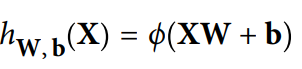

In [23]:
from IPython import display
from base64 import b64decode
base64_data = ",iVBORw0KGgoAAAANSUhEUgAAAS4AAABFCAYAAAD0BAtuAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAB+rSURBVHhe7Z0JXFRV+8efOwurCCq4kSso7hWgomkKmIpLSlomtqho5p5ppb1/ccvMrUx7c8k0SyV3TU3f3LByN0VwiRRJUwQVXAABmeH3P/fOBe4MA8wgFmPn+/ncz8w8c+bce8859znPc85zzghgEIfD4dgQKvmVw+FwbAauuDgcjs3BFReHw7E5uOLicDg2B1dcHA7H5uCKi8Ph2BxccXE4HJuDKy4Oh2NzcMXF4XBsDq64OByOzcEVF4fDsTm44uJwODYHV1wcDsfm4IqLw+HYHFxxcTgcm4MrLg6HY3NwxcXhcGwOrrg4HI7NwRUXh8OxOYpUXLrUq5R4L1f+xOFwOOWHfMWVdesSndi3iZbPnkCvd2pGNT196YP9D+VvOZzyRWRkJKWmpsqfOI+d3CxKiT9Je9YtoVnvh1OvoLdoTbJ1hs3Dhw9p6dKlVBb/zyP/y88d2jSyC03bl0hX4xPpno6JtO1o7u9RNKG+Wk7672bv3r3UqVMn6f2DG3EUfyubii1+QUNutRtRbVexb3hIt+Lj6EZGEb8QnKmGjxd52Bk+iucKDg4mQRAMgieUrD/W0/ujdpHft1/Tm9UtH7WYOHEirVixgg4dOkQNGjQQK4Ti4m9RdvEVQhq32tSotqvUWz+8FU9xNzKKqEOBnGv4kJfHQ7p+IYFScorNmFQVa1HjupXI2icl+2Y8/ZFUxDUIduRevxHVdJY//0PkXl9Db/WaSjv/uELJ6TlM6chf2AXRoj/30KgaltfbrVu3qG3btvT000/TmjVryN7eXv6mFIiKq4B0bOhfCexSoPEag6hsWfwvJjMzE/3790fz5s2RkZHBJNk4NN4HGlZGYvEVeajc8fqWTEMmusuY105rPp14aNth3mWdlDQ7Oxu+vr7o3r077t69K8meSNJ+wGBPDdT1RmJ/liyzgCVLlkCtVuP48eOyhJXZofHw0ZgpV6NDBffXt8BQIzpcntcOWrPpxEOLdvMuQ5e1C0M91Wa+Vx4C7EOWIUXKV4kOcXOeh4uDC9rOPMs+maLD7x8HFH0N6voYfSALuXLqf4y0c9i5bBbeaush6YX867MLwqJEvZzIcq5cuQIXFxeMGDECubmlvztjxaVPxpLO9hBYZVQM/Q53ZPG/mbCwMNSuXRu3b9+WJQx9BpIvRGH19AHwraRi5aWoUHao6/TBol+vIF1Rr7r7CTi8ehT8KwiGdII9agUOx7z1vyLuZiaUTUBUWN7e3ujcuTN0usJN/kkg+5dxaKgR4NpnDSxVz6dPn4aDgwNGjhwpS/LQIyP5AqJWT8cAX9bxCsb1Qeo66LPoV1wxrhAkHF6NUf4V5PpjCqhWIIbPW49f424iU06ak3oJ+xcPhR+rZ6M8mSJ0bT0Wqw9dQoo5xcs6q/nPi88SQdv8PziRI8uNyMbdP09gy4xu8FQb8hUcvNBr6vc4FH8HZn/yD5F9cAy8tYr7L6XiEpk/f76UB3P3ZYn1GCuurJ8wrJbYw2jR+uMLZnqJfxezZ8+WCnjnzp2ypDBpJz9GBzfjRq2q3h/rbheuVP3VxejiwhSXyg1tPtyPm8XU+/79+6W83n33XVnyJKFHwqfPw06wY5ZNvEXt7N69e5Iy9/DwQGpqqiw1Q9pJfNzBzdg6UFVH/3W3jToHCf1VLO5akSkXFdzafIj9RVaIDgnLeqCKSpEnadDkg6NM9ZhHf2UhghzlTkrTEON+KcaszNyEAZVZGxKc0HLKcdkqLF/ozk5HSzvF/T+C4srJyUHTpk0lyysuLk6WWoeR4tL9PgsBolZV18Kwn6yw359AfvzxR6hUKsniKh7mEix6AZWUjZo9kC0mHTFpgPexd1QDaJil1WjYdiRZUOdDhgyR8vvmm29kyZNCGta/yiwj9kCPP2TZeMSkSZOksli4cKEsKRpd3CK8YGQhCbBrMQmHHxi7Jvf3jkJDLbO0Gg3D9pIqJH0nwo3cRgEOwYtwzezP9Ehc0gXO+ZafGnWG/QRxoMEcuvi5aMeeO1WVl7FWYdiXJ3TnZ6J1GSkuEdEYEAQBXbp0kSXWYaS47q/tCzdW2IJzD3xdTgvw70Cv18PLy0saS0lMTJSlxZBzFnOfF3vugooVKnbE/AsFxn7miQj4ObKevcNsnLawS01JSYG9vT0qV64sj689IWQfwgQfDQTXvohMk2XFkJWVJVlaGo0Gt27dkqXFkYOzczugotJlFCqi47zzBe5X5glE+DlC5dYBsy2qkEz8NKw21EZ13Asrb8pfK9En4esexu1BVeNNbLkvf29C6nehcBXU8By0jan08klZKy6dTodq1apJyuvSpUuy1HIUikscdG4oDTprfacgpjw52H8zmzdvlirHmt4g6+RUtHSSXQPpUMGj1wpcEes28xQ+auMCTc1QfJNgnQPep08fKb8vv/xSltg++isL0NFOgNpzILZaMJD63XffSWXQqVMnWWIBWScxtaWTsfLw6IUVhgrBqY/awEVTE6ErL1s8JJL+wyDUUFrWqirot87MCN3tbxHqpmwLhrQvry08hC9ey66hnqyT9ET49jJUW7oLWNDTB/Uavoxl0j0/GmWtuESGDx8u5fXee+/JEsspUFz6a1gUJA4mqlBj8I5Cfrb+7nls/2IyRg8bhyVHn+DZLkbbtm2lAl29erUssYR0/DyhKeyUvTxrjGHrLuPwZD84a70Qvi258DhLCWzdulXKq2HDho80C/PPosPNE6sR8XonDPjyIu5vDJPHiwQ41gnG2OXHih3vCwgIkMpg2bJlssQy0n+egKZMQebXB3PZPMPW4fLhyfBz1sIrfBuSrOlH7m9EmIfSBWXPyqAfWM0bkxr5Miqr1EwZKc8twLXHctwwvc/so/igiYYp8XDsSC/D+s2JwRQ/O2nGem78o49Wm1Vc1+8i7sdFGD+gGzq2D0TIS+GYtGgrYlIsa+V547hVqlSRZu+toUBxZW7DwGriAKEDOi++UfCA6ZJx6IvB8HfXyr0X8+2DFuGqtU+gjXDq1CmpMJ2cnJCebtokSyB1J4bWZy5QXuWyslJX9URNe0e0GH/A4tkzJQ8fPpRcRTG/3bt3y1LbQX/7MBa+/gwqa13QuM90bDmfgiMfNIFG0MKjpge0oqIXHNEw7BtcMDPclZSUJJcl4dq1a7LUUlKxc2h9dq68+mDunboqPGvaw7HFeBywukJSsaaPIVwoLz913RHYZzQcfBcbwphbW+NVvPvaU8aupXMwFv1p/ODo4j5BGy1TqOE7UZZ667ErLnU1+DSpaqg/xT2KbV5bLQCjIuNQ0ii5OCRToUIF6Xd79+6VpZaRHz2m++M3OpOaS6TxJn9/dylIL/fmLzQ7NIB6fnaN/EeMpi6eYogdSJ92j9LF0z2B/PLLL9KrGCTn7Gxl9F+lrjTtoz5UPT8SkZXVzeuUXHMgzZ/WkVxlqTVotVpWH/7SezHgsjRk3U2m5KQkYkrA6iP5Vpqci/U8OPsV9W8dRO9sfEAhS47QiY2TqbdPFv128jLpNc1o+I4Y2j89kDyETPoj8m16edIBMj3bmTNnpNeKFSuSp6en9N5yKlHXaR9Rn4IKIehv0vXkmjRw/jTqaHWFuFKn7u2pAuuZ8tBf20+7TilWmNzbS1v23KFqIQPoP+EvUV2NLGfgwa8Uue4i6eXP7AmjW1FRdCa3OnUN7UBOinzLPYIjeff+kBYu/IQ+GNKNGlXMUyWgnOSj9N83gihsZbziXgujUqmIeRLS+9jYWOnVYmQFhpQVPaVZEJX7a9jMDI2chPUY0swdDV9dgtPioGJ+EKUA5xdXsr7nyeTNN9+UeoDw8HBZYiW6eHzZ1bhXFmdpX9+YZLWbmMe4ceOkfHr06CFLrCEDkX3zYpWsP9R1TWOmLEP352q8UotZn+rqeHFZXMGgeMZWvFFVBVX1wdguegf6FOx7pxkcWNsTHFphhsng6ty5c6XraNmypSyxFh3iv+xqPOvLXMZar2+0aGbXFP31xejirHQBtXg2Ijr//u5ufA1VNZ4I38EeItkNLEjLrBHfKTiTf4t3EPlyJWhqDsIPVhr3JfJ3uIqKMa770V+hn7ed8ZiiazA+v1j8ucVZezHt4MGDZYllyGoym6J/i6UsdlpNc396NjmSBncZR5f6bKRf1gyjZ1xYEt3vdOGyuDZJQ97MGhFFTyLMVZRemzZtKr1ajbo+hc95l/zZk5iP/hpFvj+ZdpVyaV3etURHR0uv1qGhBl2H0ahRo0p1jHyjg5yPFej/pK9HjKGNf+mpYtD/0WeDG7KrMKC7cILO3GXtvkVL8heXOKkqU1DEVHq5hpqQdYoi1/xmSCiTZ3H5+PhIr9ajpvrhc+hdfwcqqBE9XYt8nyazChGfGmtQVQ+hkFb2irx0dG7PbrosmRb3aO/WPZTK0vQJZNa6nR/179uC7PITM2skZj2t+e2h4bzMAttzKI3cX+hFYnJbxuXpIfTV4iHkpbAwc+9F0YIFBylL/myOvHotncWlu4Q5z4nWlAYN316Aia090frDKCjH2HJipsJXjPFS1cDgHdYNpNkK4nIbccpdLJZdu3bJUmvR4dLSHqhq1MOzQ9Ci0Zh9KGJGvFgOHz6cn48YIlHeyYwaA29xCU6hmTQ9kpZ0gZNKi2YfnlBEhmdg26DqrBcVYB9oHKfF3GTpvqdOnSpLrEd3aSl6MCsvvy6kg1k/jcZg7z1rB5Z0iJvd1mgSRnAIxEJx5u7+JrxWzQ5PDd2VH7Olu/AJ2jooLTQNvEYfgBhSln1wLLy1VfHaptK0CgMZt6/j2tWruGp6/LkPE1qIFlcrRBy5Uvh7dly7YfnaGItmFXNOI+IZ46VtGu938HMxoXpi9LyYThzrsgaD4rofiZel6Vs1qlTzRNO3tsH4mliDW9oVzAeH4Nwdy83FrjwBiMt68gr82LFjstQ6ss8vQHAlDdw7j8bgFg5GprNg3wITD1kfj3XhwoX8POLj42VpeSUbUWO8pLAawT4Qn/+ldBWysDO8JjTSOk5lOTB3bm57ad2etvmHssxAo0aNpPsWl4mUiuzzWBDM3DH3zhg9uIXkkuaVpbjsqsXEX4sMDC0KMYrcX6tQRkIFdF+ehLubBqCaXS0M263o2HUJ+DzI2agdiDOI29OycGxiU2jd+2N9qSfp/75hAMvCIeT6VZxDcOiBFcXox+3btxvSCdJ+DxYjuYoPzxynaGm0PZce1h9G33z2Ihkv+s6i40ejmSvJ+ovGAdSmsix+wmAWl/yOWfl28lYN1pAdTfOHRlCUEERT//spfTpvEHlpC5wKZMfSwrFz6GTBaSxCuYpeeY3lktxkio79izlQzKap4ElPVVE0JN1FOhl9i/Ta5tTSz0EWigjk6GBncL8Eo4aXf7+lqg9xCGT+UIqIEiho6n9p/qfzaJCXtsDNQzbFLnyH5lhZIWqfbtS1sdGoOx3etZ22bt5Dd2p0p74dFPemrk19X+1ALgXNgPQ3tlPkjpO0a89FqtCxJ3UqzayNhB01enEsTZgwofAxfjC1Fycl1LUoaNh4s2nGDw2W8ykr1FSjpofRJn/IzaTMrKK3v8lr20wXUU5OjvTeIkRrKmG+uG6MaT3Hlph6yswkZs4JfNhMNAHVqDN8b4nTnOWGzBuIjb5scTTyjRs3JO0vHmJYhHVk4GiEP5xVrgj8VI7Q1idhXX9PoylxElzw3KyYIte4mUO0svJ+L1pf1pKWeAkX4+KkdWHWHhcTkuVcLEThLqhqDMZ25TKblJV4sYIAjc8EHDYqgBxET/FlFpcA5x5fyzID4goGMS9LlvqYknE0Av7OKrgGforzhgpB0rr++QuaDYcAl+dmIcaaCpGCtX2MdnZQudVFXTct6g7fUzgG8uZ3CDVagsSuyS8ATezcELrqMS1R+ZsH5w3kIGaqH1gXk59OVeU1bC5mZEkM8clLq7NiQwGmuOR1Y+yH2ufm4JKZ3+qvLUKQPTONBVeEri6/e0bobx7GyhnvY/hrvRDoWx+V7VXQtv4Yv1tYHnfu3MkvxCNHjshSS9Aj5afRaMzO5xzwEaIVD4Hu8hJ0ExfQyvmKh8otEJ8plgOVxPnz5/N/m5CQIEst5dHdCasCX3UXMbutQXEJjiFYllzw26x9I1FXrYLbK5EmncltrHjRhbkLTghedEWWGWjSpImUlzi7aA36lJ8wurE9VM4B+Mi4QrCkW2XjWV+VGwI/u6AYcyuZrP2jUN90Kx11XYzY+0BOoeQONoRVNT4nOwSX7lhemqlNS/hHFFc2fn6ngUKhC6jQbVnhoFsF27Ztk9KKy+usQUUPY+j46TTmJKqplm8rqlUQ8pLPg6NH6EyOOL7cjNoEKOYTH2yg12tUIjc3N7NH1T6ryHgiLYuiprxAAd0/piMmm6tmHxxPzSsXzqNyk3FyCgvIzaaM1Ev06/btdODUZUrNtm6HRldXV3JxMdxfYmKi9GoJuX+to5Hhi+l3NKVR88fR0wqvRl0vnGa/39Yo9if37kGaMW45xRcX5KIg71rEuJeqVatK7y2nGHfCgkNyJ6zZ0FD9FDVvXFXaVA/ZJ+lA1F2DXJzJ+y2aruvV1My/JTnKUpHc65to488ZJHiE0MA+T8lSA1WqVJFeU1JSpFeLyP2L1o0aQot/BzUdNZ/GGVcIhc9+n9oaVwgdnDGOlltaIQz71t0ouLrCXWSoa3enl9oqXeA83KhrWE+qYfRsMfe4TXcK8TB2jW2bdLp46XpB7JaqEgX37U5Vi7nFvF1sK1e2cvxJXDcWKC6LYC5M71XmorMK1jBqGo7DL6zzyrn6Mw6eF3sxPTKuH8O3w/1QUTGLJji3xoQfYpGUYaJqs/ZiRF0165lq463dpkOiOqRdj8amsX6GSQA7b4TO3oGzN611TNOx+TX3/N7NGotLpF27dtLvpk+fLktKICsG84PEHlyN2oO2mdlQjpF5BJOeNuzNlFdG4kaDIV8q4puKQXSTxN80btxYlpRv0n4cAtYBsmtmrl/ANJySXIV0g2WvrodR+xW+g/42tg/xgp1k9SgWQcuIG86J9x4aGipLSiILMfODpCVF6tqDsM18heDIpKdhrxyoZ+6be8iXiLPY7ErD5jeqKawoNeqP2o/MoozTzH0YWU+xu4TggMAFCewJekw8dourAz41WQWAuxvQP39JlAAHvwicKOHxnThxopQ+MDBQllgGpW8aYFg3pvXDtFgztaa/is8DDYFldh1n4eCWyehcryHeXH+9oNCzTyPi2bwlQUzpuL6E1WZmSqTpX8m8VqH6G5vNLoHJ3D4I1VQaNBxzoJQr5bOwb0Sd/HElaxXX6NGjpd/169dPlhRD2hksfcXL8ACw8pt+tqhWr0fyqt5wMwmRULm2xsT9Ja9ffPvtt6X0JW+xU05g7uJ/u8jumKCFl7ic5+4xTGrG2kiFXliZIj/dOYnYM/l5uKsd0GjoZlw3UxDijqfivVumtNNwZukr8BKHNUgLv+lni+wY9Mmr0NtkHzVSuaL1xP0Wr1+8E/kKKufVqcarhB1Ls3F4QqP8GTfB7jnMKSE485F47Et+amHornTF/WYh9pP2YIas9L3K4wUsiClmcEtG7JDE9GPGjJEllkFHxXVj4omqDcIP5s6TtQdvS5sLygXu1BADVl4wGaDX4fdZbQpiW9SeGPKjaWZixRVseayq0hdrCo1L6nD+o1bQ2rXEjLOlLWymuEbWLbXiWrlypfS7Zs2ayRITcpIRu28DlkwJR2Bdxe4DqioIGDoXq3dH44ZyoFefgnO7v0FEL2ZVGPXwhkNwqoegYTOxYlsUYm+Y756ef/55Ke2cOXNkSflHf30bRrZwkcuHWV51G8BTK0BTPwyfb4jE0pmj0LtFZWjsn0LnafuQWEQd5cWw2dnZSRvQFSYHybH7sGHJFIQH1pWsdUPZqlAlYCjmrt6NaOMKQcq53fgmohe8jBZgy4fghHpBwzBzxTZExd4waecm3FyJXhUNeWi8x+BgCdZFzunJeEYOo9D6TUOR/VxZ8LgVF6tTp6bh+Db2HnLSruDXL/qhvlSeAhwb9MWiE5aNheeNYS5fvlyWWAZJO0JoKqB2v5XmN0Vj7t3w2kxxsZ7T3fdNfHE0xayFoDs3Ay3zY1s08BoTxVSVgvyZSfnGBVd0/yrROC99EpZ2dYJ9208QV+qyfjTF9ddff0lBqOImguYW9eqvfs5ca/kezB3aAMxSXnzGaoQabXdT1MEshGmx8o8KELdxFvfkEtPExMTIUhvh7ml8804XeLuYbm8tQFvZB4FvTsfGc8UHX6alpeUHBZu9f9EjYG24IG/TQ4uAWXGsS8wjA6tDjbe7KeoQlYs5JyQffSKWdBFjtDTwHnuweCUnojuPma1F70WLFv9RBuA+BspYcSH9PLbOHo3QNt6opIhhE5he0GpZ/QpqOHu2RL8p6xFzpyQfwoC4x5zYIYn5nDx5UpZaBp3Z8xNiko1UjAk5uHJwLdbsOofU4q4nJ9ooalbbdBKOK2omJzoCz9o5wik/iphp7KCFSFDmmbYBYe4OaPuJsqFZi6nimoaog19j0oBOaOXrj/bd38AHi/fjSjGtTPxzDPG34tbN/zRfffWVdC3BwcE2u62NPj0B6wbWk3aEeHb0evx8JgGpxTU5E/r27SuVwbRp02RJeUGPm8c34uvlq7DPIuWgR9LR9Sz9tzhg5b5s5Qnd/as4e+wgdm1ZixXLvsKq77dh36mrhbb3KYn169dL9SpaXdZiiJwvE7JxTHY7xYsxHvPJQew0Pzi3+hCzXy2YFhbs2+IThTmUtXcE6ji2MZJZj7HiErSOcHP3QEXWS+T3soIKbr4jselP832eqP3FdEW6i38jeW5icfvel3/uYFVv5jZqGuO9I9lW/3PNgQMHpDIQ9ym33T3JOKa88sorUr2WJkavDBUXU12/jEODvNgWwR7t8/4IIScW0/0rIODj87i7I7wgAFDsgfNX1hsUn1PALFx4pM7IxOJqNRPnWX769Mv4cWpnPJVv5gpwCZiBk0VYXh07dpTSiWMs/xRisKm4FELskWz6gc3+Ge94M/db3nmkNOSNhZw9e1aWcGwZ0U10dnaWjtL8DV8xERbWY9eyB73wFFMZInhIv/30E4l/dquP20o//N6cer3UkFyDB1Bonbw0ORS7YS2dFGO69Bfpf/v+pGY9e1ED+esyQRCkJQgq53oUMmUzfT+2CRlW4YDSjn9GM9clix8KsXz5cim2ZMSIEaTTiQtY/l5Y3dBbb71FTk5OtHbtWpv+c9jc5NN05qqetC1aUytlAJcVjB07VnpdtmyZ9Mqxbb777jt68OABDRw4UIqftBqD/iorMvDjkIIlLoJrb6y6nYOzM1qiQv6AezaOvFcwLSz+8aUY16O7/Ck6uPhjerGjoZZQ/OC8Lk7+JyPpewFufdfK3xRmz549UkTvPzHWtXjxYsna2rBhgyyxXTJ3DEYNVfF/51USosUZEhIiDdSfO3dOlnJsEXGHE3G7ZjHExepdhmXKWHEBaVveQLW82BZVFbwaeQwzWrrgudkFA+45pyPyp4XFwD3P8O2IXxoCN98IRD+q3ipBccHk34m1bYtXSgsWLICjoyNOnDghSx4/4uwZ64UQEREhS2wZPa59Hgg71hbCNj7abnni7h21atWSJio4tosYlyhujR4bW3gW3VLKXHHhzvfol782T41qgcFo4dIOc5XBdroL+DigIJJc5dEDYZ2rlNEUcQmKK/uw9NdYeYrL7oXF8hdFI87siQ8MM21lyeND3BOsXr16ksJ8MtAj8Ytg2Nl1wGemkdal4NChQ5LVZW3cD6d8sG/fPinUaNWqVbKkdJS94sJtrOrtWjCDx9wxh/bzTBZv63B5QaAiWJAd8ozTo1OSxbXHEJcmfa+Bz/hD8hfFU5oBxNIiLvZ+ksg+OhEtGhuWi5UF4gxrpUqVrI794fyziHGRbm5u0mqIR6VMB+cNVKIXurYp2PhfsKdWvUOpLtMkBaipzsuvUgfFQldN3c7U07eYPZf0qXRuz1baHXOz2A34SyI3JY7+uGlYfC3YNaG+/Qx/RFESpRpALCXi4vInCbvWH9K6dSMNWzWXAd26daPjx4/TM888I0s4toD4ZydHjhyhYcOGyZLS8xgUl4qqdQ2hVvYGpSTYt6beoXWk3QKUqKqHUv9ObvIFqMnzhZ7UqsiGnUuJX4VR6y6h1M3/Wer5xVky2VyiaB5kUJpoX0no6c/1G4kZduzCtOT15kwa51dGTxOnGFyoUXMvMrdvQmnx9vYmtdq0VXHKO40aNZLfPRqPQXGxTJ/qSl19xZ0mBbIP6E29a5tpYCoP6hkWQu7iFairUafubahgn09TVOQe9DaN79uMKuoT6X+TJ9P3tyzbskYXt42+PXCLqT6irPNf07vzfqVMdqY6L35GGxb0IOUGnRwOxzZ4PI+tuj5169KcNIIDtQntTXlhW6a4dQ2jnjXUpKocSN2ed5Kl5rFr2Jumff8/mhfiRshIoEvXilJcGvLuOpD6dfChKqLV9/AsfdGjKTV+xofq+I2iKIf2NGzRXjqyaSQ9U/wpORxOOUXaoV5+X6bkJp2m/x1PpdrtA6lppaL0o46uHt1F0TlNqFN7LypZj2TQDwO9qc+PHWlNXCS9UkkWF0FuRhJduphA164n073cClStfjPybVq9TF0WDofz9/PYFFfZk0WXN42jl8J3UL25e2nDUJ/8/+rjcDj/LmxkhCeXklYNptAFmfTalmNcaXE4/3JsyOLicDgcA3xOjcPh2BxccXE4HJuDKy4Oh2NzcMXF4XBsDq64OByOzcEVF4fDsTm44uJwODYHV1wcDsfm4IqLw+HYGET/D2/M1oFVSSsVAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

(equation 1)


* X représente la matrice des caractéristiques d'entrée. Elle a une ligne par instance, une colonne par caractéristique.
* La matrice de poids W contient tous les poids de connexion sauf ceux du neurone de biais. Elle a une ligne par neurone d'entrée et une colonne par neurone artificiel dans la couche.
* Le vecteur de biais b contient tous les poids de connexion entre le neurone de biais et les neurones artificiels. Il a un terme de biais par neurone artificiel.
* La fonction ϕ est appelée la fonction d'activation : lorsque les neurones artificiels sont des TLU, c'est une fonction de seuil (mais nous discuterons d'autres fonctions d'activation sous peu).


Avec Scikit-Learn on peut utiliser un Perceptron qui implémente un réseau TLU simple. Nous allons l'utiliser sur le dataset iris

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [25]:
y_pred

array([ True, False])

Le `Perceptron` est equivalent a `SGDClassifier` avec `loss="perceptron"`, pas de regularization, et un learning rate constant de 1

In [26]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

Quand le Perceptron trouve une frontière de décision qui sépare correctement les classes, il cesse d'apprendre. Cela signifie que la frontière de décision est souvent assez proche d'une classe :

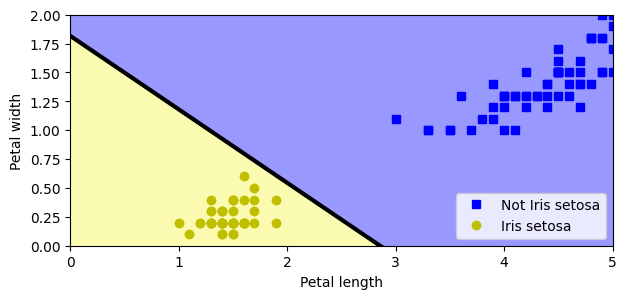

In [27]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

Il est possible que vous ayez observé que l'algorithme de formation du Perceptron est très similaire à la Descente de Gradient Stochastique. En réalité, le SGDClassifier de Scikit-Learn peut être utilisé de manière équivalente à la classe Perceptron, en spécifiant les paramètres suivants : loss="perceptron", learning_rate="constant", eta0=1 (taux d'apprentissage) et penalty=None (pas de régularisation).

Remarquez que contrairement aux classificateurs de régression logistique, les Perceptrons ne génèrent pas de probabilité de classe ; ils font des prédictions en se basant sur un seuil. Une des justifications de choisir la régression logistique plutôt que les Perceptrons.

En 1969, dans leur livre "Perceptrons", Marvin Minsky et Seymour Papert ont noté plusieurs points faibles des Perceptrons, notamment leur incapacité à résoudre certains problèmes simples. Évidemment, cela s'applique également à d'autres modèles de classification linéaire comme les classifieurs de régression logistique, mais les attentes envers les Perceptrons étaient plus élevées et leur déception a été significative, ce qui a conduit de nombreux chercheurs à délaisser les réseaux neuronaux pour se concentrer sur des problèmes plus avancés tels que la logique, la résolution de problèmes et la recherche.

Toutefois, il semble que certaines des restrictions des Perceptrons puissent être résolues en superposant plusieurs Perceptrons. Le MLP est le nom donné au réseau neuronal qui en résulte.

## MLP et backpropagation

Un MLP est cbomposé d'une couche d'entrée (passthrough), d'une ou plusieurs couches de TLUs, appelées couches cachées, et d'une couche finale de TLUs appelée la couche de sortie (voir image suivante). Les couches proches de la couche d'entrée sont généralement appelées les couches inférieures, et celles proches des sorties sont généralement appelées les couches supérieures. Chaque couche, sauf la couche de sortie, inclut un neurone de biais et est entièrement connectée à la couche suivante.

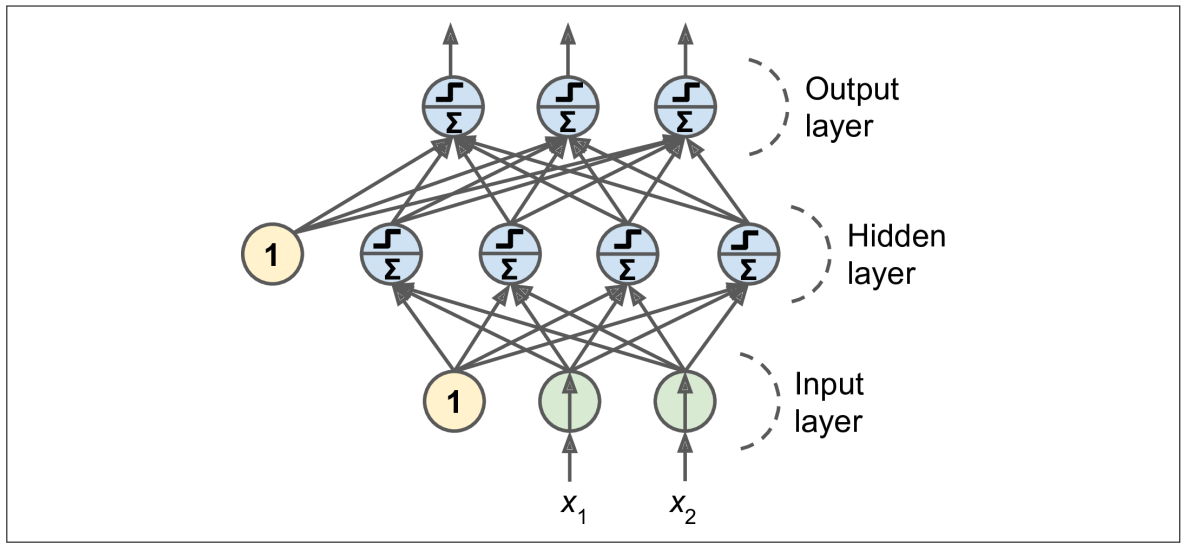

In [28]:
from IPython import display
from base64 import b64decode
base64_data = ",iVBORw0KGgoAAAANSUhEUgAABKIAAAInCAYAAACryfHbAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhe7J0HeBTV94aPSu+99yJVRUARRLCgqEizAvbeO/q3/azYu2LvWMHeO/aOqIgNAZEmIChSFVH/eW/2bibD7maTbJLdzffy7MPOJply753ZOd9859yN/svBhBBCCCGEEEIIIYQoYTaO/C+EEEIIIYQQQgghRIkiIUoIIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghhBBCCCGEEEKUCnGLld9zzz22ePHiyJIQQgghhBBCCCGEEAWzbt06Gz16tHXq1CnySR5xhajhw4dbtWrVrG3btpFPhBBCCCGEEEIIIYRIzCuvvGLjxo2z3XffPfJJHnGFqH322cf23Xdf978QQgghhBBCCCGEEMmAAHXCCSfEFKJUI0oIIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghhBBCCCGEEEKUChKihBBCCCGEEEIIIUSpICFKCCGEEEIIIYQQQpQKEqKEEEIIIYQQQgghRKkgIUoIIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghhBBCCCGEEEKUChKihBBCCCGEEEIIIUSpICFKCCGEEEIIIYQQQpQKEqKEEEIIIYQQQgghRKkgIUoIIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghRLnln3/+senTp0eWRLawYsUKW7BgQWRJZAvff/995J0QQgghMhkJUUIIIcotq1atsocfftiWL18e+URkA++88469/fbbkSWRDSxdutSefvpp++WXXyKfCCGEECJTkRAlhBCi3PLDDz/YvHnz7NNPP7X//vsv8qnIZNasWWNffPGFff755/bnn39GPhWZzsyZM50j6ptvvol8IoQQQohMRUKUEEKIcsnff/9tn3zyif3777/uf9L0ROaDsDhnzhznoPnuu+8kMGYBnKNTpkxx5+xHH32kc1UIIYTIcCRECSGEKJcgVOCIghkzZtiyZcvce5HZTJ061Tmh1q9fbx9//HHkU5HJLFmyxImKgMiI2CiEEEKIzEVClBBCiHIJRcp/++039x6HBU4LuWcyG4qUf/nll5Elcyl6a9eujSyJTIV0vD/++MO9pz+/+uor914IIYQQmYmEKCGEEOUOUnyoCxWE1J/Vq1dHlkQmMmvWLFu0aFFkKbcYfVCYEpkJIjHpeZ733ntPorEQQgiRwUiIEkIIUe74+eefXYpPkJ9++klT/mc4H3zwgRMZgyBihD8TmQPnJa8giI0+rVYIIYQQmYeEKCGEEOUOUrbC7iccFmHnhcgcfv/9dzerWhhqC/kUTJF5+JpfQfwEAzpXhRBCiMxEQpQQQohyBTVmSMOLBXWjEDRE5jFt2rRoHaEga9asccKjUrkyD2q3kUIbq+84h8MClRBCCCEyAwlRQgghyhXMkMcsXJ4aNWpE3uWm/ITTgERmgEPGT+tfsWJFq1atmnsPiBYIUiKzoObX/PnzI0tmNWvWjLwzN8uln0lPCCGEEJmFhCghhBDlCkSJv/76y72vVKmSDR8+3DbaaCO3TKoPU/4r5SezCE7vD82aNcsnWoSLmIv0B1GRc9G7oThXGzdubFWqVHHLgFtq/fr1kSUhhBBCZAoSooQQQpQbSMsjTctTvXp1e//9961z586RT3IdU4sXL44siXQHoeLzzz+Piosbb5x7a9OxY0f3P/AzfkdkDvTZZ599Flkya9GihTVs2NA6dOgQ+cTsq6++shUrVkSWhBBCCJEpSIgSQghRbmAq/+XLl0eWzLbccks3g15QeFq6dKl9++23kSWR7uCcYTp/T6NGjaLFrHFGeRAgg30v0hvOQdLvPDiimEwgWC8KEYpzWgghhBCZhYQoIYQQ5YbgrHi1atWymTNnuvcNGjRwga7nww8/VMpPhrBw4UKbO3duZCm3PhSf4YwKClF8NmfOnMiSSGf+/vtvdw56qlat6gRjIM0yWNeN9DwVLRdCCCEyCwlRQgghygW4J0jl8SBU+LpBpON16tTJvYd58+ZFA1+RviAqBsXFChUqWJMmTZxLitQuHDW+/hfiBqleqv+V/vz222/2/fffR5ZyXW70LdCfQYFR9b+EEEKIzENClBBCiKyHdB6cE4gRQDDbpk0bW7dunVsGZlXbZJNN3PtVq1bZ119/7d6L9GX16tU2derUyFJuHaHgrIe8p58933zzTb50L5GeTJ8+PV8aJY6olStXuvfUefN1wIAxEKz7JoQQQoj0R0KUEEKIrAfBiZpBnrp16+YTLIBUveBMa8zYhbNGpC+zZ8/eYHp/hIogiJDeFYUI9cMPP7j3Ij0JFylnQgHEpiCIUpyvHupEhftdCCGEEOmLhCghhBBZz++//55PgAhOAe/BVdGyZcvIkrkC5qTsifSEGl6Ii754NalbpHSFRYt69epF+xthMfg3Iv0gzY50O0/Xrl1dvwbh3GSiAQ81wpRKK4QQQmQOEqKEEEJkPR988EG+4uMUrv7jjz8iS3kE0/FwZgRdVCK9QJwghctD/y5YsCCylAepe0G3DILkL7/8ElkS6Qb9FRQTcUeFxUX6+p133oks5Z6rpN4KIYQQIjOQECWEECKrIY2nqDVkKIQdrCMl0geKWS9dujSylDyqKZS+0DfBtLzCQJ8yIYEQQggh0h8JUUIIIbIaaggVddp+RKzgTHsiPUAcLKpgQVoeTjfNnpd+UPOrqDPgUf/ru+++iywJIYQQIp3ZKOeGLGahhH322cf23Xdf978QQgiRqXz77bf5Urg8pHa9++67kSWzrbbaypo3bx5ZyqNTp062+eabRwtei7IH5wypWcxuGObtt9+OzrhWv35969+//wZ9Rz2p3XffPWatMFF24HKbNm1aZCmPJUuWOPGQGl/MmMe52rRp08hP8+jcubM7V4UQQghR9nCvdcIJJ7j/w0iIEkIIUS6hIPL//ve/yJLZySefbH369IksiUyFPvXFrrt06WLnnXeeRMQMh9pt1113nasFVbFiRTvxxBOtd+/ekZ8KIYQQIh1JJEQpNU8IIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghhBBCCCGEEEKUChKihBBCCCGEEEIIIUSpICFKCCGEEEIIIYQQQpQKEqKEEEIIIYQQQgghRKkgIUoIIYQQQgghhBBClAoSooQQQgghhBBCCCFEqSAhSgghhBBCCCGEEEKUChKihBBCCCGEEEIIIUSpICFKCCGEEEIIIYQQQpQKEqKEEEIIIYRIc5YsWWKrVq2yf//9N/KJEEIIkZlIiBJCCCGEECKNWblypV1//fV21VVX2d13321Tp0615cuX2z///BP5DSGEECJzkBAlhBBCCCFEGrNgwQJbvHixzZw5095++2275ppr7IILLrB7773XvvzyS1uzZo1EKSGEEBmDhCghhBBCCCHSmF9++cX++uuvyFIuv/76q7311lvOJXXGGWfY/fffb3PmzIn8VAghhEhfJEQJIYQQQgiRxjRv3twGDx5snTt3tkqVKkU+zeP333+3N9980y688EK76aabbNasWfbff/9FfiqEEEKkFxKihBBCCCGESGM23XRTO/DAA53zady4cbb//vtbly5drGrVqpHfyGXdunX28ccf22WXXWa33XabE6iEEEKIdENClBBCCCGEEGnORhtt5ISnFi1a2O67725jx461888/30aNGmXt27e3TTbZJPKbZmvXrrXp06drhj0hhBBpiYQoIYQQQgghMggvSrVu3dqGDRtmZ555ph1xxBHWrl07q1Chgvud7bff3urWreveCyGEEOmEhCghhBBCCCEymJo1a9rAgQPtnHPOscMPP9yl8u2888628ca61RdCCJF+6NtJCCGEEEKILKBatWpOkKJoudxQQggh0hUJUUIIIYQQQgghhBCiVJAQJYQQQgghRDlk/vz5NmfOnMiSEEIIUTpIiBJCCCGEEKKc8dtvv9ndd99t119/vX366aeRT4UQQoiSR0KUEEIIIYQQ5Yi///7bnnnmGfvxxx/t119/tXvvvdemTJli//33X+Q3hBBCiJJDQpQQQgghhBDliNWrV+dLyVuxYoXdddddNmvWLIlRQgghShwJUUIIIYQQQpQj6tSpY6eccop17Ngx8onZypUr7YYbbpAYJYQQosSRECWEEEIIIUQ5o169enbcccdZhw4dIp/k1o1CjCJlTwghhCgpJEQJIYQQQghRDmnYsKGdeOKJtummm0Y+yRWj7rzzTps3b17kEyGEECK1bPRfHO/tPvvsY/vuu6/7XwghhMgG1q9fb4sXL7Zly5bZzJkz7Yknnoj8xKxly5YuXQU23nhj5xZo1KiRNW3a1H3O/zVr1nQ/F2XPX3/9ZQsXLrTff//dFVv+5Zdf3Pvp06fb2rVr3e9Ur17dunbtGu1Lgu4GDRpYkyZNrEqVKu53RPrw77//unNz6dKltnz5ctenixYtsgULFrh6RtyybrTRRtaqVStr3bq160v6Nfi/KDy065IlS+yaa65xbe1p27atnXDCCe7aJ4QQQhSW3Xff3X2P8H8YCVFCCCGyGkQJxKcZM2a4KcoJbKmFwqxRyUDgW61aNatbt6516tTJunfv7gK0+vXr2yabbBL5LVEa/PHHH06cmDZtmn399ddOgKLo8j///BP5jcTQl4iJCBabb76568tmzZpZrVq1nPgoSh/OQ/oRYZh+5X/OTy8mJgOiIn3IeUm/UvcI0bFy5cqR3xAFQTgwd+5cu/76650o5enfv78dccQRVqlSpcgnZQMPEdi/b775xj7++GMnQnPeN27c2Nq3b2+9e/e2du3aOdFZCCFEeiAhSgghRLmCAIVABeGJwGX+/Pm2atWqyE+LB4IFQW6bNm1sq622ss0228xq1KjhRA6RetatW+eKJ9OX33//vRMScUOlgooVKzq3BwFs3759XXqSxIuSh1tP3GtffvmlTZkyxQkMpIOlCkRjHI49e/Z0L8QJCY3Jwbl20003OXEQKlSoYAcffLDttNNObrm04Vr+ww8/uH164403bPbs2TELqSNEduvWzQ466CDbb7/93BgoDf78808nniJqZwKIvHw38lBFCCFKGglRQgghygV8pZHS89prr9nbb7/tHDSx2GijjW2TCpvkBKeb2CabVLA6DRpFfpLLX2vX2JpVK1wQ9O+//9g/69dHfpIfxCfcF0OGDLEtttiizF0D2QRtT42aF1980T777DMnSMVi4018P25ilatWteo1c9MrPav++N3W/fVntC//zfk/FghQPXr0cDdLCFNyu6Uezs81a9Y4R8urr77qBOJYcF5tnHNe0gf0ba06dW2Tinnn1r855+Mfvy+L9uc//6yPKU4Ajredd97Ztt12W5eqKcG4YD744AO7++67o4IvqcmXXHKJc4GWJrigJk6caOeee679/PPP7jMExao55znXWt7zO4wp73BlzOy999525ZVXuvTNkoLxRkF3toM49tZbb0V+kp6Q9vr555/bRRddZC1atLDbb7898hMhhCg5JEQJIYTIeghGEJ+ef/75uAJUxUqVrV3n7tamQ1er36iJ1axd12rmBLkEu2EQL/74bamtWvGHzf1phv30w3T7ddEC+y/nhj4MARG1iEaOHGldunSJfCqKCqmUL7/8sr3zzjtx3U81a9W1tp27WZuOXXP6sZ7VqdfAqtWoGVNoWLNqpS3P6cuVf/xuP//4rc2Z+Z0tX5br+AiDS4p0JMRFRAyROj755BN76qmn4hbB5jxs3qa9deiyhTVo2txq5fRrrTr1cs7bDQXe9X+vsxXLf885P5fb4gU/2+zvp9v8OT86wTEWON84P/v16+fOVxEf2vDee+914grnE24f0vNwgpYmd9xxh40dOzbqZiUFj4Bmu+22c44eUqZxSCKcTZo0yZ555hknTAFu1ccff7zExCgcfYMHD3YieZ8+fZy4ms5Q+4uHJdRgO+yww+yee+6J/EQIIUoOCVFCCCGyFp70krb12GOP5att4qlbv5G1aLepbdp9S2vZtqMTo6Awzgj/VYkLY/b3X9usnNfcmd87J0YQAlxu9klloXiyKBy4Gp577jknQiEshmnasq217tDZ2nXezJq0aO3cbIV1uNCXvBYvmGuzvv3Kfp79vf0yb84GTilcFzhphg0b5gJeUTRoawqNT5gwwaVYhalStZoTE9ts2s06dNncqlav4T4vyvn5559rbM6Mb23mN185sXHt6pXu8yCk1B5wwAHWuXNnCVIJQGhBrCC1ccCAAS5FrzRBWDr88MOdCMW2jz32WLvsssviutoYA4hB9C0OJdhmm23s9ddfd6nTqYbvmu23396+++67jBCiaBPSyLmuSogSQpQWEqKEEEJkJRQ0fvbZZ+2VV17ZIHWrTv2G1mvbnazLFr1zgt3qLoUrFfC1+c/6v23p4l/sk7dfsVnfTbP1OctBEKEOPfRQd+OvYDc5mCntwQcfdDWDgrcmpFEiOvXdcXdr2b6TS8nhs1TAdv7+e51zu0398C2bP2dmPscbfYfzAmGRmdpE4cBZgwuKfg27FKtUq27de/W1LbfZ3mrVpYbTJoUWFeOBQIz77atP3rOvP/vA1oQEKQrWIzAOGjRINcHiwLmBG9GnwJUmiGA416gJh0PxzDPPtPPPP7/A1Gf2+cMPP7QxY8a4umOMJ1IKzz777JQfg4QoIYQoGAlRQgghsg5qQRHg4oYKpuNUr1nbtth6O+veu59L64kXgKz4Y7m9/doL9t3XX0Y+SY4qVaraPgcdac1atHIixrzZM5yI8TMOqYAghYtm6NChtssuuzh3jYgNtyEESffff78rlBykQZNmTqjovHnvqFMmWRb/ssAmv/Kczf0p/zrj8WdOgLZowc/2+9LF1qtXr3xiGClJFEDGYSFhMTko4kx9L16891SqXMU6duthvbbd0Ro2bZl0LS6cjz/P/tFeff5J++P35Aqb8zfLly6x9X+vtVYtWthff+bNxIfAQX/Sr5ppLb245ZZb7NRTT3UOyR122MGl3FGMPBno8/Hjx9sZZ5zhHk7wUAAnHnWuPMy8uWLFCve+Q4cOcccgv8PvAjNtBmtkFUeIQnQn/ZhrDNcWXomuKzgKEQVxhpGeGA8KzPui/6QVI7h6JEQJIcoCCVFCCCGyBr62mPWHYrozZsyICgY4nqgt03+XYa7+UyLXDAHOTZefb4/df8cGbqaCqFmrto2f8JRt3nPryCe59aRI1/vwzRdt2eKFkU9zZ5yinsno0aNLJD0k00FAZOa0Rx55JBrwQaXKVZ1QsfnW/a123cIXSEZk/N8pR9l7k1/JJyglAy6KW++faJ+997qtXZ0302KVKlVs1KhRbvYwFTJPDI6WJ5980t59991ozR5o0aaj9Ru0h6sDVTFQfDwZ5syaYWefeJh9P/2ryCfJs1W/AXb+5TfYR5Nfsjk/fhsdE/Q1QsTRRx+temBpxNZbb+1qL3H9fOihh5xYWBiogzR8+HBXOwqoS0Z9MM8pp5xiTz/9tHv/1Vdf5ROpgvA7/C4gjPn3PGDgQcjUqVOdsINI1rt3b/czXHY4sACxaf/993fjDUcX9ar43iL12AtRiFsc74EHHuhcYAikYQjgmP0VUY0HL/Gcg1dddZUT8eDWW291de4QzPj+wT2MOxGhjnppvpYhtb/4uRBClASJhCg91hNCCJExcOPO02FuuHnK7QPKSlWqWp+Bg23Ifodag8bNEopQQFD76nNPFlqEigcujy5bbGUjDjzG2nfeLBooEIRTcPvhhx+OWfOoPENA9NFHH7nZm4IiFI62XffOCcoG7VEkEQp++HaaffjOG9HxURjouz7b75ozlg53gmbOJ+5zXD30Y1hcEXnQ3ohQOFIodO3bCbcHNdqGH3CUtenYpdAiFLz2wlP2wzfTIkuFg1piLdp2tD1GH2Fb9t0+WieO/WXms5tuusm5SYoyXkRqoag24jQg3HiBpzAg7uyxxx6RJXMTWARTtxGqSN3jxXUoHlyz/e8FU0u5Brz//vvRazrOqcmTJ7sXDikP1wz/Ob+PoEadq6+//tpWr17t6l9Nnz7duZP23HNP5/CNdW2hIDv7QNskAnHM76/fN5xUbJ9rrT9Wrrd+v/xshEIIUdpIiBJCCJExkHZw5513uqDRU616TdtlxBjbdudh0QCzIP5cuzbnBj0vXShV1G/YxIbtf5RtPXDXaE0qbv7fe+89e+CBB5wTS+RCwEY6HgGZp26DxrbP4Sdbp816Fct1tHrlyg0KyReWdp265ezLKdax6xaRT3KddOwz/RlvdrbyDGMdBwt960WdChUq2lYDdnEiECJjUVn+27JiC0VVq1W3HYfua4OGj3I1qjwE7tddd50L5CVGlS04lPx1krpsLVu2dO8LS9++fSPvzL799tuUPgi48sor7dJLL7XGjRu7ZQSzG2+80b0olh6L66+/3rmZKJKPW+nNN990tQ1PPPFE57bkuw3XFe6tVILbi/3CkeXdVqSk+v1lQgYhhCgLJEQJIYTICHh6zJPj4BPceg0b28iDj7OuW/ZJm9o9iGEDdxtpOw8fbRUizg8CdNJEXnjhBQW6OZCWctttt+ULDttu2s3GHDPWGjVtETf1pLShxtiQUYfZFn0GRD7JFaMQW3AyiDwQ5giicV54KlepaoNG7p9zPuzpBKl0gKLom/Xe1vY5/CSrXa9B5FNz15X77rsvXz0rUfogCnpatGhRYIHyeCAO+b+lPhKpaanimGOOcSltvrZYkyZN7KSTTnIvagLGAhcWtaReffVV97fMRohYhhjEuEMwwll17rnn5nvQUlyoE8V+MeGCF6K6du0a3V/q4QkhRFkgIUoIIUTaQ/D/+OOPu6flHkSCEQcea81atYt8UjyqVqtmQ/YabXvtf1jC17B9DrD6DRpF/io+m23V33Yaup9L2wPEKOrmTJs2rVyLUQRbN998c7SoLiBCDR1TPMdMQdSt38CG7rN/zD4NvvYcc2gkGS8X+m/73fd2KV0eglqcUdQqE7kpbghQzGDpod12Hrm/bdZrm8gnqadtx04x+zD86r/j4Mhf5NGkeRsbNuYoqxVI//z888/tpZdeUuplGRIUomrXLvr1ABGKIuCAsBOeVbW0qV69ut1www1OXAtDTV5m+gNSz6khJYQQ2Y6EKCGEEGkNAs5rr71mb7/9dlTAIcgdvNdBVr9R05S5Z2rVrmunnHOJnXf5jQlfYy+4wpq3ahP5q/jg0GLmvt7b7Rx1a3EspOiVVwEDtwluIhwKnoZNW7h0qSpV81KlSoLmLVvb6f+7LGafBl/nXnYDhaIif5VL5SpVbMCuI10xfA+uLoqsB1MLyyukPlE/i/ENpKX23WmIS7EsqF5bcejVp3/MPgy/9j/8uMhf5MF1o0mL1i6t14vFXF9Il6IItYgNzjfEkgkTJuQTHlNFqkR6+jddnJVAIfLu3bvH3Ce+H4YNG+ZS9BBBX3/99chPhBAie5EQJYQQIq1hSn9S2nzdEAoPbzd4hCt6nE6BRiyoc8Tsbx269Yh8klt49oknnnBFZMsTBJgffvihe3lq1q5jOw0d5QTFdMelmY0Ync9Bg0OPVJvyDHWVcCsGizl379XPemwzMO1nF+T60bpjV9tmh91Ycp8hLHJ+pjI9Kpugr5ksAsEOwYTi9KmkqKl4YRBF/XdGtWrVyjx1GyEKV1Q8SCX0Di5frF0IIbIZCVFCCCHSFoIJ0hR8kEvgyJT+PbYZkPYilIcCyQMGj7QGTfKmh//iiy/cdNzlCVLxcLZ51ww1gwbsuqe1aNvBLWcCpIPuNGw/q1y1mlvGHcLscEuXLnXL5Q2fksfMc56W7Ta17XYZbpUjLqN0B7Gs57Y7uuL0HmYnY7bLVLlzsonKlStHr8eIUKQzphIEGQ/rL2of8LdeTGzatKnb77KkXbt2Cb+zqDflUxE1k50QojwgIUoIIURaQgAyc+bMfIFO42atrP/Ow5wrKpOgqPrA3feKBiLUK0GUSWUB3XTGu6HmzZsX+STXNdN5895l7lQoLB279rAegeLlXmArjxDov/HGG1GxoELFijZ4rwOtes1abjlTqFSpsu0y8gA3AydwPExtX9B0+eWRrbfe2hXWBtop1e6dYPrajBkziuy4mjJlSlT0Zva9qlWruvdlRUHbp5B4hQqZ9b0mhBDFQUKUEEKItIQgYuLEiXkpeTk36VsN3MWqVq/hljON1u07W7tOm0WWcuvqlJdaNEuWLMknWFSuWt223n4X16eZCLPo+RnXOCaOjVmxyhvvvfee/fLLL5Els81697d6DXKntM80atWtZz36DoyKIKQc4nYT+WnevHk+19J3332X0uLum222WTRF7fvvv3frLywI/aQOenbccUc3e1w6QxvisBRCiPKChCghhBBpCU/ag0FIq/adrX1AyMk0cHH123moMX08EHiQdlgeil1TSyZYc6dnTsBfu05eraVMo3bd+vlm0aMI+1NPPVWuZluj1lnQCcaMh9vssGtkKTPZcpuccVkvVwSBN9980+bPnx9ZEp5u3fLSGHF1BlMziwvOoYMOOsgJgitXrrTx48cXesY7Up8Rh4GUvFGjRrn3hSWVKXIFuetI70X8hGD7JgsPbDRWhRCZhIQoIYQQaQfBDdOoeyrlBBNbbbezVaqSGXVnYkFg1aR5K9u0+5aRT3IDHWrsZDM4Zj7++OPIklnNOvWs93Y72UYZlpIXhL7stHkvN+Of54MPPnDiTHkBkQahAOhLhLmateu65UwFMY3JBbxYjACCWOxTvEQuHTt2dDO8eXB3erdjKjjmmGOsWbPcmnrPPfecm2k0WXAmXnzxxVGHIiJU27Zt3ftYBNOFw5Delyo+/fTThBNU4P5iJk7Ycsu874ggjMd41xh+Nm3atMiSEEKkPxKihBBCpB24Z4JP2dt32cJatGkfWcpcEDB6bzcoX7Hrzz77zL3PVqZPnx6t84Jg0bPfDla1WnqnySRDrdr13LH4VC4CQQLXVAbk6QrOr08++SSyZFa3QSPbrHe/yFJmQ92yRs3yBEb6tLzNcFkQjRo1iqbPwQ8//BBNoU4F7du3t5NPPtnVTVqzZo2de+659uijjxaYuobr6NRTT4069ShSfvbZZ28we2PdunmCKSJ5rHOW6zKpp6mCffr6668jS/nhwcu9997rriHM8DdkyJDIT3Lx+0tbMFNnGNoFYbi8TYAhhMhsJEQJIYRIO3iy69OcCPS79dzGKlSMP633upxAceYP39oP30xL6vXz7Jm2/p+ySaNq1qqdtWrXKbJkNmfOnOiT8GyENBkf6FEMmkC/sKzNCcBi9WO814K5c0pcEGJctuvU3erUbxT5xFwgSJpetvPTTz/lKyJNAffCuqGW/bokZt/Fe/2+rHRmJqTQenCM4vrCrSLyqFWrlisA7pk1a5YTSVLJ0Ucf7VL0KODNg4njjz/eTj/9dOe+wu2E+MI5znZJSXvooYecgPPwww+77w6EshtvvNE6dcq71nr69csTTa+99lonOJEizfpIj3v33XfdthnjXmgOwyQL/mc4W9kH/j5eei77fNZZZ7kHLMFr06pVq+yaa66JphL279/fdthhB/fe4/cXweqCCy5w4xFxlDYgpe/JJ5+04447zv1OPIJiHH/P3yXaXyGEKGk2yrkIxbxT22effWzfffd1/wshhBClBYH8DTfcEE0zINAfc8wZVqNW7tTWsZj70yw7dK9d7LelSyKfFJ7GTZvbQy+8Yw0alnyx5a8+fc9ee+ohFwgQIBx77LH5gqNsYcWKFXbGGWdEU7jad9nc9jrkBPe+MEz/coodOCx/cFZYuvfoZeMnPGW169SLfFJ8/s0JBF/N6cevp3zglqtXr26XXHKJNWnSxC1nI4xZJhEgZQqYKW/kQcdb2027uuVkuXf8NXbzVRdFlorG3gccbudedkNkKXUsWvCzPXbndbbuz9xZLXfeeWcnTISdNeWZd955x+64447IkrnzPF5KWVFBFMLRdP/990cF3nr16rnUQIQwRCpmrUQYZYY9T8uWLe2qq65yMUysPkP432WXXaLfMTiOttpqK7duXFVMIoHQs/vuuzuRCkHqwgsvdCKQBwFn4MCBbjZQRCn+vl27dq7Y+tixY52bC4GKtEDOGfYV4Yif77fffrbFFlu46yNOL9LQ+RlF4B955JENvgvYn5EjR9rcuXPdMk6v3r17u3pas2fPdk4rjnPo0KE2adIktz3+D8ZwHA/pjrQXdbPYBtcpxvYhhxwSV3ATQojiwHX0hBNOcP+HkSNKCCFEWkHwQWDhadayrVWtVj2ylB00dceUO/sfAQiuoWyDYAiHULAYe5uOhRMr0p2Nc4K/1h27RJbMHWtRZvnKJAjAcaV46jRoZI0DqWzZQJ26DaxB49waRYDIUR6cboUB0QVBw0MKLud8KqlTp457KDFhwgTr0KGDE0sQUkgLffzxx52I8+qrr0ZFqEqVKtlee+3lRFJqQ8UTDhs3buyEGtxSrBOhidS5xx57zAlP9DXuK0Qw1hlLpEFYOuCAA9z/1BBjn9ifp59+2glMYXbbbTfr06ePE79INdxjjz1szJgx9vzzz7u/5/juvvvumA8kevbsaXfeeaebsZB9oe4ef8cxkDqK6HX55Zc7QSno1ApCX7G//AxRihkh2d9nn3028htCCFG6SIgSQgiRVpA24B000KHr5hk7zX88GjRqavUbN40smXuiTX2QbIMn+b7QM4WgW7bb1L3PJlq372xVq+eKisBsj9mc7kJKz8yZMyNLZi1adbBqNWpFlrKDKtWqW6u2HSNLualXBP8ij9q1a0cLigMuo1TWifIgoODsQehiZsojjzzS+vbt6+pItWnTxrp27epcPaS9IQYhzvTo0SPy1/FBhOIBAKl8+++/vxOAeGKPm4n6UAg7iEPXXXedE4hwG4U57LDD7LbbbrNtttnG7Qsv3Eo8XAjTokULe/HFF9162b8aNWq49EFcVaQQUsx80KBBkd/ekMGDB7vvidtvv925o2iD4cOHu8LsHMdJJ53kZttDsGJ/cUyFueyyy5yzC+ca+4pbi34UQoiyQKl5Qggh0oqbb745OpNc5SpV7fCxF1uNmolvllORmjdw593tspvusWoBUaEk+WjyS/beq8+49zzFPuecc1xQlS0gQFHX5Y8//nDLLXIC+/2OPNU22aTwomIqUvMOOfZUO+n/LrCNIjOipYr1f6+zZx++y2Z9l1tEGLcFTgoKOmcjOCnuuuuu3IWNNrK9Dz3R1coqLKlIzbvqtgm285CRkaXUsnDubHv41iujLh8cNsOGDXPvRW5xfgQU7+YkXe7MM8906aklCSIP2+Z/+oZrJ84nnEu8LwoIaIjH/D3uosKsh+scDiMvPuOQYkZBnEfB1DzSr2+99Vb3+ziu2Ca/w34jtsVyMcWCdfG3HD/HzfYKs7/8na8vxTb5+8JsXwghCoNS84QQQmQE3CD7abehYZMWTowqCG6mm7dsbS3btCv0q1Xb9rbT7sPt1HPHlZoIBS3adLCKlXJTWwhOliwpuoiWjhBseREKmrduXyQRCirlBEqx+i6ZV+t2HW3PMYfY6EOPTbkIBZtUqGitAk4v0nJSXbg5nQhOd1+jVh03Y15RqFWnbsz+SubVtkMnO/b0c23AoA1vbFNFrbr1rXa9vJnhOO44z27LJQg2pM7VrFnTia/UVyqN9kF8oTYSjiK2jfCF8FNUEQo4FtaJIFPY9fD7/C37wov3iUQdfp+Z8XAiUfTdi1bJwu8iXrGdoohvtB/bZ19pw8JuXwghUoUcUUIIIdIG0n5IXfBpMMyWt9veB7taPIlY//fftvTXxa54dKHJuQmvW79Bzo19tcgHpcPSxQtt0t032KoVy93yiBEj3HdutgQFFNE977zzIktmg/c60LbYervIUuFYt+6vnPZaFFkqHBvlBGoNGzexChUqRj5JPT9+86U9PeHWyJK5NKHNN988spQ94MQYP368S12Cxs1a2d6Hn2TVi5Cat2rlCluxPG/mvcLA9aBRk6Y5QXjqhUXPn2vX2JP3jbcFP+emIXbv3t1OPfVUJwCIXJjNDsEZMYN2QeAojiCUbcRyRAkhRHlCjighhBAZAdNT8/LgtihIhAJm7mrSrIU1a9m68K8WrUpdhIIqOdsMur0I6nw9pWwgn8Nro42sdr0GkYXCU6lS5dh9l8SrafOWJSpCQe26+Y8t29xtHlKiKOzsqVajhlWqXCWyVDhq1KwVs7+SeXGul6QIBbgVa9apG1nKdbrh2BR5UOOIGer4H3eNRCghhBDJom8MIYQQacOqVavcy0OB67/X/ZWVrwoVK+UTonCDZZMQxfF4OM5KFSvHbIdseNWolb+GGYWbsxHq4AQnEqhesw5Fa2K2Saa//v1nfb7adBx3Nk4oIIQQQpQFSs0TQgiRNjArEKl5Hmbjon5HtrJ65Yqc4D53pilcBVdffbWr+5ENMBsVs0QB6XEE9dnqmOBGauXy36I1cgYMGGDHHHOMe59NLF++3KVbMoU+VKpStUzchKXFn3+utb/W5tb74jo0btw45wASIhkWLFjgZsXjusDMfMxwJ4QQ5YlEqXkSooQQQqQNYSGqPJHNQlR5o7wIUeUNpr9n2nshkoEQi7pqgAjPpBpCCFGeUI0oIYQQQgghhCgl/Ax3vCRCCSFEfuSIEkIIkTaEHVGtO3axOoEp1LONWd9Ni86a17RpU3fs2eKIeuyxx+y5555z7ykm377L5lalanW3nG3899+/9vVnH7r/YYcddrAjjzzSvc8mwo6ohk1aWLPW7dz7bGTxgrm2aP4c956p/S+55BJr0aKFWxZCCCFEYpSaJ4QQIiOYOXOmE2P8zHm77HmA9egzwL3PNtb99adNvOs6+2VebqC72Wab2dixY7OmJtbrr79u9913n3vPzGqjjjrdmrRo7ZazjbWrV9nNF58WWTIbOXJkVt4/MXMcdZLmz5/vlrv02Nr2GHW4c35kG9wev/HsY/bFR2+5ZVJn//e//1mDBkWf/VEIIYQoTyg1TwghREZQrVo19/Ks+H2pCwizEcSLtWtyCyFD/fr1s6qYd7169SLvckW3VStznV+p4u9162z1qpWFfq1ZvTrlsxP+9mv+WfIaN24ceZddIJLWrFkzsmS2esVyW7fur8hS8fkrZ5zE6rOCXpxHqb5OuBkC//g9smTuuLPFrSiEEEKUNXJECSGESBtI/cERNW/ePLe8afeeNnT0EbZJCutr5H7t5byKErdutFHK3B9LFs6zSffcYGtyAmkYNWqUDRs2zL3PBnDNnHnmmZEls52G7We9tt0pslR8np34oD3+0N2RpeSpXaeeXXz9HVa/QaPIJ8Xn+2lT7LmH74wsmXPOdOnSJbKUPfzzzz92xx132Pvvv++WGzRuZvsecYrVqFXHLReXe8ZfY2+9+nxkKXlatmlvZ196ndVK0X7A2jWr7fGc83PR/J/d8pZbbmknn3yyxKgAa9assZUrVzq3GHBtzEZ3nBBCiKIhR5QQQoiMoEaNGu7lWb7sV/vn338iS6lh7k8z7bQjRtuRo4YU+vXB269H1lJ8Vq5Ybn9FUhAJ3nwwly00a9Ys8i6XpYsWRt6lhiWLF9o3X00t9OuHb6fZ+shMVqkAYTN4bLVq1crnGsomNtlkk3ypaYzhP9fmufqKy8J5P8fss4Jes3741v5Zvz6yltSw/u91tmrFH5Elc8ctESo/kydPtlNPPdUOOOAAO+uss2zZsmWRnwghhBCJkRAlhBAibWBmoZYtW0aWzH5dNN+l56WS1atW2ZdTPrbPP36/0K9loRSs4jB31vf2zz+5wTMpec2bN3fvs4lWrVpF3pktnPuT/bl2dWQpe/h73V/288zvI0tmderUserVs7MoO7Rp0ybyzuyvtWuiNc6yDYqU+4kEIBvPz+Ly66+/Rt6Z/fnnnylLLX711VftlVdesSlTpkQ+EUIIkW1IiBJCCJFW9OjRIxrQ4Db5+ccf3Pts4q+coO2nGd9GlnILIWfbbFy4vCjA7vlj+TJbsjC3yHUqoAB6mCpVqtpW/QbYdjvtGve1zXY7xPzbooJYsXjh3MiSWceOHa127dqRpeyjU6dOOe2c134zv/3K/k2Ra7FS5cqRd3lUq17D+g7cKWZf+lfPPtumtMg/NcRmfz89spSzX5UqWffu3SNLAqih9ccfeY4xnKyp6gPKguy1115ulkIhhBDZiYQoIYQQaQWCTDD9Z/YPX9u6v1JXEJn0olh1TFq0amPde/RK+KpTr37kt4vH0sULbOXyvELIPXv2zKpC5UAbIyr64HTdn2tt7qzUiYoDdtrVNu2SJ3TBv//9m/P5bnbdXY/YTfc9HvM17oa7rW6K+hF+nvmDS+PyIL5lW18Gwe3VuXPnyJLZkl/m2Yrff4ssFY9dh+9jLVq3jSzlgig0bO/97fq7H4vZn7zOuuRaq1EzdeLf6pUrbMHPsyNLZm3btrW6detGlgSsW7fO1YfykJKaqtRFak/x+iuF130hhBDphYQoIYQQaQWpTbhKPLhN1qzOC3iKS6u27W3r/jtsIBZ026KX3fLgM/bgc2/HfQ0ctGGxxaIw58dv7a8/c2vrINR069bNvc82wu6gn2Z8kzL3TNsOnVyB6oZNmkY+YXa+v+zOG6+wya88VyqzLTJz308z8pwzzBTYvn37yFJ2gpAbdLohQv0yPzXpeVv06mOnnDPO6tTNEwqpQXXtJWfb1E8+KJU+hd+WLsp55aXh4oYKusCEORFq4cK82miM/VS60oQQQmQ3EqKEEEKkFdSJCga6zCo3b/aMlAWhVatVt7EXXGE9t+kf+SSXV59/0u6/7TqXNleS/PfvvzYnkJaH8LbppptGlrILHBJBke33pUvs1xQWLUe4OO/ym1xKnmflij/s2ovPselffh75pORYteJ3WxSokdShQ4esLVTuwemGg4/zFP7771/76YdvUnZ+7jB4Dzv+zPOtYsU8d83SJYvtiv+dbj//NDPyScnBcfz0w3T7N1K/DZgxL5aLsjzDrJjB1DxcctnsBBRCCJFa9I0hhBAi7cCBEJw9b9qn79mfa1JX6LpBw8Z2wVW3WPtN80+x/+CdN9tTj94fWSoZZnzzZT4HCQFcNhe3Joj3ogXFyqd++JZ7nwoQB7bbcRc79bxLnVPHs2TRQrvg9GPcLGwlyVefvm+rVuYF47169SoXM6s1btw436QCs76f5lL0UgFixvB9D7TDTjg98kkus3/83saddZITpUqS335dZN99+Vlkyaxp06b5iu6LXL7++uvIu1xXZzBdUwghhCgICVFCCCHSDlwl1BfyLPh5lv3w9dTIUmpo3rK1XXz9ndawcV5qFwV4b7/uUnvthacin6SWf/75xz5843n7N+d/qFy5sm2zzTbufbZCgNqsWbPIkuUE+Z/a4oWpE4g22mhj2/uAw+2QY0+1ChXyUoN+mvmD/d8Jh9jqValL6wyyeMFc++bzjyJLualJW2yxRWQp+9lxxx2j4t/a1avs48mvuPepAGHj0GNPs732PyzySS7MXHn5eafZn2vXRj5JPQilK//Ird+G0DlgwIB8IqcwW7Vqlc2cmedOQ6ijRlRps3z5cvv0009t4sSJdsstt7jXU089ZVOnTnWz+IXh9z/66CP3+vbbPFdqPEg/ZP38fvB4g1Ar6/PPP7eHH37Ybf++++6z9957z20rEXwXzJs3z71Wr859yDJ37lx77rnn7LXXXrNffvml1FJRhRCiLJAQJYQQIu0gEB0xYoQTajyff/Cm/fHb0shS8SHI7Nxtc7vgqvFWs1adyKdmK/5YbtdefLZ9+VmeyJAKCCq+/+oz+3XRgsgnuTMEBtMQsxEC1J133jkazFPY+6M3X4qKcakAF82RJ/+f7Tp8b9s4IBpM/2KKXXH+WFubQjcdUED7i4/ettWrVkQ+Mdt1113zufiyHQTU5s2bR5ZyJxWYO3tGZKn4VK5SxU4//3Lr038Hd6563nn9JRt/9cU5gfzfkU9Sx6L5P+eco1MiS7ni4k477ZRv+8Js6dKltmTJksiSudTi0nQCzpkzx0477TTnttxll13soIMOshNOOMG9xowZ4/qM8/GVV/KLo7/++qsdccQR7mfDhw+PKVYFeemll2z33Xd3L8ShIAhQTz75pO2www42aNAgO+SQQ9z2Wf+QIUNsu+22szvvvDPuNn777Tfbaqut3OvFF1+0Z5991om7++23n+25554u/fW2225z1xohhMhGJEQJIYRIS5o0aeJu5n0QSMrMN1984t6nCgSMvgMH2SnnXJIT+ObVGSK167JzT7X5P/8U+aT4rFm9yj59Jy+YIR1v8ODB0bS1bKZPnz6ufpJn1nepFS2AmkIt27S3sGTwy/y59k+Kg7mFc2fbj99+GVnKTVUj+C1PNXIYvwTofvz+ve4v++jNF1MaOFeqVDnGLHr/RFIuU9vW7Pcnb79ia9escssIp3vssUe5EheT5aeffnKuKA+p1KU19r/55hvbZ5997MYbb3SCFDDT6uabb+4EMfYDN9I777xj+++/v73++utRZ1GbNm2c8L9ixQrncJo8ebL7PB44rZYtW+YeiPTvn1dTcO3atXb++efboYceah9++KGrldWwYUO3D+3atXOz/U2fPt1OPvlkJ055x1MQ9mnx4sXu9fHHH7vfnTVrlhOu+P1FixZZtWrVJIIKIbIWCVFCCCHSEgKKYcOGRQNBbty/+uRdW7IwNbVoPNzo9+rb36pUzROiYOH8uSkTonD/TP/8A/t10fzIJxuKM9kMfYgLwc+q9c8/63OD/hgBWlH54O037JF7bnUpL556DRramRddY9Wrp05MYKa8Ke+94dLRwAsWVUPjpzxATaxgof25s7539aJSkVKEMMQEAs9OejDf+tp17OSE41Smy7H+ebN+sNnf582AiNsr29NmiwpikAchsrSuYwg8J554ok2ZMsX1P06ol19+2bmV3njjDff/448/7kRhwHV03XXXuZRr4PqD48iLZpMmTbK//47trJs9e7ZLsQPGQdeuXd17uP/++50QRuoeItj1119vr776qtsHhK+7777b/T6i0r333mu33nprQoH2wQcfdDMQcj4dffTRduCBB7q/R+iVECWEyFYkRAkhhEhbGjRo4NIe/M04tVtef/ZRl2qVimAXWNfl555mf/z+W+STXHFh7wOOsK22HRD5pOiwn7N/mG4fvfly5BOzunXrunS18uCG8uBE6NIlrzj8zzO/s4/ffskJO8WB9p0za4ZdcV5OHy7P60NmRzz3shutY+euKQvmCCY/mvxiPjdU69atbdttt40slS9wRe22227RtCz64vWnH7Zff5lfrPOTv/36iyl29YVn2vqAUFC/YWM7a9x11qpt+8gnxYdtrcgZNy898YD9/fdf7jPOS8TF2rVru2WRx++//+6cO562bduW2kyRb731lr3//vvuPcL2zTffbH379rX27ds7RxLnImlxCD+8B1xPQbEJUclfhxCxcEfFgnQ5jpWxsPfee0ev1dRuuuyyy5zIhGsX0Qk3E9c39gHXFUISbiocUoyvK664wv1dPEh1HDVqlBPSbr/9dnvggQeco4vvPyGEyFYkRAkhhEhrqMHBzFWeBXNm2pvPPVasQNez7q8/7dZrLrFP3s8/k9sOuw61Y0472zbZpPhCEbOJvf70IznbyiuwTMphcNax8gBpJkOHDs1X94vC0NMDBb+LAoWrL/m/E23h/LwC6AiJhxx7iu2Y04+pEqEYbz9+M9U+ffc1+y/ibuBYqDVTpUoVt1weIQDfeuutI0tmq1b8Ya88OSHfbIKFZcninGD/nFNs+W/LIp+YVaxU2U4443zrvc12kU9Sw59r19gLE++xlQEREzcK7hSxIYgzQddhada4I42NvqHu3AEHHBC3QLpPwQNqOQUhjRaREahzFa795HnooYfccSJycb32PP/88869BIcddphLr44F6YrHHXecu/7gzGJ98UDIGzt2rKtJBvwNIlR5SvUVQpQ/dIUTQgiR1tSvX9+OPPLIfEHHt198Yh+++YJL8SoquFuem/SQPXr/HZFPctlsy63s/y662qoEakYVlRV//JYTlD9oK1fkzsIFpOSNHDmyXAYZOBFwC/hj/2f9envn5SdtxvQv3HJhWffXX3btRWfZ1E8/jHySG8QN3+8gO+y4/NP/F5eFc3+ylx9/IFpkHbELEap3795uubyCGwo3B84YD0W/33j2USfyFBaELNxtM777OvJJbpruESeMtaH77B/5JDWsW/eXvfX8JFvwU96MaKRaUXi6PKZaJgP9jMOHotzdunUrVTcgqXhffPGFqwFFnah4MCaD4nBwxjvGEul53sX36KOPuppPQUg9ZCY8wJHrHxqQ4sesdnx3MD4oKp4IXK9+HFE4PZ77itk2y9uDCSGEkBAlhBAirUFYoA4NhWeDbppP337Vvvvys5ygoGizr336/lt2yzXj8s3e1qJ1Gzv3shusQaMmkU+KzppVK50TanHAqUOQy1P00pxhKp0gCMRdQIDmwZU2+YVJtmDu7MgnyUFQ+Oj9t9szkx6MfJLLVv0G2DGnnmMVIvWoUgF1yV554gEnfHkoXowbIlWOq0yGVFNq29Spkzf75MxvvrT3X3vW9W+ykKZ5+/WX2btv5KWxws57jLRRhx7jxL9UQXH1j996Kd8ECIjdCCy4ZkRsGO+4G3Gq4uIhPa20YNvBFyAiITR99NFHbha7c845x4lHpNbFg+8TX3z83XffjRY9B0Smxx57zLmhuE7vu+++UeGcn3377bfuPS4mUgVJo4v3YtY9/wBlwYIFcWfQo8C50kCFEOUNCVFCCCHSHoIOanuQ2uWD0fXr/3auCwQpgsrCMOO76Xb1xWfb8t/zUn+q16hpJ589zjp26R75pGiQwsUMfy9MvNdmf5/n6sDZdcwxx7jC3T6IKo/4gsE9evSIfGK2Iqcfnn/4TpsxfWrkk4J5b/KrdtdNV+ZzxXXo1NXOuPAqa9g4NcHxf//9a3NmfGvPP3aPLVuSV+OFtB8CVLlmcmE8I7LiXPROFM6Drz55z15/5lFbvTK2EyQMouITD9/nAn7PFr362KnnXmq1aueJXMWFGSzfeukJm/LuG66PgXGJ2E3h7fJ8fiYLbcSDgbJoqx9//NGuvfZa50jacsstbfvtt3e1oUaPHm2XX365vfnmmxu4nIIgpOHiY9+Z8Y5C4x5mA3zmmWfc+549ezrXl4cxPW9e7mQZpPWdccYZzj0X70VhdWa/A/YnOK6D8J2mMSeEKG9slHNRjVlkA8srN1mJrK9CCCFEabJmzRr3pNnPZgSbVKhom2+1rfXbaYhVr1nwU+Xff1tm/3f8wfbZB+9EPsktTnxKTrC738FH5rwvupOGQOOXeaRw3W+//bo48mnurHE4LYK1dMo7BHLMNvXzz3mOsUpVqtqAwSNts979rGIBrrETDt7TPnjr9chSLtsOHGSb9dy6wKBus55bWd8BuTNrxWP93+ts+tSPnasHd5sHB8jpp5/uZlUT+eGWEicKs5H5mcroi5btOtnOI0ZbvYZNEvbNXoO2ttkzvoss5bLL0L3cTHkb5fxLBP1JvxbE8mW/2pvPT3QTCPhaX+wTosaIESNS6roSRYPrMY4kHIektAV5+OGH7cILL3QF030IQ//hysOlhCDKrHnUfvr444/dz7/66itXODwI9aY6d+7s0vxwdyE+4V5CxNpll13ctZwURMQm74hi1j4vtPI/1wD/s4LguoFji4LmwPXPO+8OPfRQu+eeewq8bgkhRKbB7J8nnHCC+z+MhCghhBAZBXU2mKlo6tSp0SfMG220sbXu0MkGDR+TE+wmTqt5+ZnH7bxTjsj3dLpp85a2/xEnFJgyhytj4C5DYtaPot7RjG++sDeffczWrM4TLghu+C4l2Ek2aCkvIELdcccd7n9/O7LxxptYz3472DY77GZVq8d3jx09eg/7NCAmFob9jzjexp5/RWQpP+wHDjtqkH3x4dv29995xY4JHE866SRXDFlBY2woDv3EE09s4EqpU6+h7b7vIdasdfu458GwAT1s3py8GdkKw+nnX24H5JzD8UB0Wrxwrr30+AO2dNGCyKe59YQGDhxoY8aMyZf6K8qOWEIU5+Wnn37qPsPFRL8hLiE64a7knETkadWqlXO3cc1lHEIsIYrrPwXPqRGFiMV4pcA45zcz1yFqsT3EKg9CFA8VEFnZJqKYLzBeEAic/K4XOiVECSHKA4mEKN0RCyGEyCgQdvhSIyDxU2q7FKofv7OJd19v0z77wIkHcZ6zuJ8FRSj4ZcE8u+ai/7PLzj014euOG66wNatWRf4qFwLc5b8ttdeffdQ5oYIiFIER6XgESxKhNoQp1k877TSXAuOh5teU99+wZx++w36e+V2+Gl4lDcEvjranHrjFPn339XwiVMeOHV39GYo1K2CMDwIBqZcUliZo9yz/7decdr3V3n/9OVe8P975mWrYDkXTP37rZXvy/vH5RChcLQgW7KtEqPSGc/PSSy91IhScfPLJrkYTriXS7EjdZoY7RCgEo9WrV7vfiwfXY/qe32cmwA8++MB+/fXX6Cx6PDjg+hSEvyF1E5gJj7GO0yneC6GJlGy+B5gFT247IYTIQ3fFQgghMg4CAGZfI4AMzo7EFOwUlX70tqvdTGzUkSpJVq9aYZNffNweuPESm/bpe7b+77ztURAX4SJYC0lsCAEa05xTwDwo8MybPcMev/cme2rCbW7GupKGguQvPHaPPXzbVTZ31g8oGO5zgscBAwa4FB2fViMSQ5vhMjr11FPzFf7+c+1q+3jyS/bQ+CtsynuvF6qQeVHA2fblx+/YhJvG2XuvPZuvVhUCAe4XagtJIEh/cCG9/fbb7j2uJ4rjB4XOIMuWLYvWckrErrvuGp3t8emnn7YPP/zQfvop91qDmBquAcf1ies6zJ8/3zmtErFw4UI3vvieGj9+fMK6VUIIUd5Qap4QQoiMBWfTd99959IafFFYD0+vW7Xv7NK8mrfpYFWrVXefP/f4w3bB6ce494WlbYdOdtfEF121GtLwprz7ej4HlAfhgrSP6tWryz2TJH///bdzJUyYMGGD2aWYAa/zFltZjz4DrFHTlm75z5ygLliovDBUrFjJKlWu7NIpF/8yz779/GOb/sXHtu7P/IEigejIkSNdzRjET1E4uMWkFg913cJBO+dF3YaNrVe/naxjty1cfTecS2G3YrLQn/QrIDj9NGO6TXnvDft10YIN3FedOnVys1dST0jnZ/oRKzUPEYfrKX1J/73++uvWsmVL97Mw9957rxOqfJ2yWKl5nvPOO885rRBMEaWoK4XgTA0q0vOCsO0HH3zQpdIxTvv27esErKDY6mH/L7roIrvkkkvc8rHHHms33nijc2CBUvOEEOUB1YgSQgiRtfA1RkoFRZKZwptZj4IQnFatXtPadOxibTbtarXrNcwJUP4p1E0/zoplvy62RfPn2Mrff7Vli3+xtWtW5QtwWR9P6gmeCFCU6lN4CO4IACkcPH36dCdOBalcparVrlvf2nbqbq3adbJGzVta9Rq506Mny9o1q5048dMP3+S8ptsfvy+1v5zwldeXOGQIXLlxokaMHDPJwflAAO5TZoHPmGQANwviAQF4EGqCUQusSYs21rFbD2vWsq3Vbdgop83z1lEQpG/+vuzXnPPzJ/vxmy+dg47zE6ExCLWASJPdcccd3XT5CvwTM23aNHdNHT58uEs1Ky1iCVGk23FOzpgxw11bqRNIXa9gyjO/gzA0duxYW7AgLwWTWk9bbRW7kP2UKVPcdkjPYzxwDTrqqKPstttuy7duDzUKedCAuMV1gX24+uqr84lR7AeFyUkfXLp0qZulD4GL2TY9EqKEEOUBCVFCCCGyHp5+z507155//nn7+uuvXfAbhqC3Vp261rBJC2vQpJnVrtfAvarlBMJB1v+93tasWuFmvlux/DdXN4jZtmK5n4CAggB32223dcFuLAhwYgU2YkPoO5xuiIszZ86MOhuCMKterTr1rWnLNla3QWOrU7+h1apdzypVyS8A/r1unetD+vKP35baovk/O/EpVloYgSUuC2ZPI2gMp+aIxHBLiaONtChSLhF7SIHjPbXdCPbfffdd+/7772PW8CEQxxlVv1FTa9i0uStwzkx7uBk33iTv3Pn33//szzWrc/p0kas9tXTRQlu6eKGtWvlHdCa8IOxH7969neDATGcK+AuG9LYbbrjBCcM4hBBcEHNK4xoWS4hiGXfRxRdf7MYZY+rggw+2QYMGOaGHySsmT57sBE+uF7jdfvzxR/e3iELMihgLxG4cjz7tD5GLbW6//fZuORaISohHjGMvWu+xxx6uphTXrnfeeceJrohWHAv7TWpvUNCWECWEKA9IiBJCCFFuIAj55ptv7KWXXnIiRjJ1OXBkBGHqfgSMgiAoo9C2d0ARLHnHB0E3ENAR7OCsIVgRyYNYgZvh1VdfdamXzMiWCAK9SqEZDRGcws6YMKTLENgS+FL0GNFEFB5uKS+77DJ3/oUhIEcw4Dwh9XLlytiibixwwm0cCOIRdf9au6HQHISgnhpCW2yxhas/RiFrCcHJwTWUFLQ33njD9Skg5FFTK+h2KyliCVGwfPlyO/74453rKdZ1nfOfYuI4okirGz16tNv/Cy64wP73v//lE4KC4H4iUGJcdenSxb788ssCU3FxirEdHFXxrkvMkkedNH4vWMsQJEQJIcoDEqKEEEKUOwgOZs+e7Zw1BAu//PKLS5mI87VXaAgaCJjC6WOx4HcJNnh6L3LBrYALIdwfOMrCaY2kWyIq0ocIGASMxQXxCacMQgWOBooQsyyKDn2JIwrhsCxAaEJAQHRikoBu3bo5Z0xpiCfZAn3I9fLWW29110tA0KPeUdOmTd1ySUONJ/YD9xoFxYMgQD333HP2+OOPOxcUs+ghHHfv3t0FOsOGDXN/R0rczTff7I4Bl+Phhx++gRjkefPNN23o0KFu3RdeeKETrpKBhw0vv/yy2x/EK1LEvRiGoI0Lq3///pHfzg/beuSRR9x7ZuQk3U8IIbINCVFCCCHKNXzV4aj5/PPPXW0PBKpknFKpgqfzzKAXng68PEMNF4K+gqZZLykIXPv06eNcC4hfiFDx0ipF8pC2dMsttzhHS2mBm41zq1evXs7R0qhRI7lLigg1mK6//non8AAiHilwpB5nK2eddZZdeeWVLo2UlLott9wy8hMhhBDFQUKUEEKIcglPxXHRMI02Dhxm8GJ67liOGoIQ0ueYwjvOV2ORadeunXMUxEsNKY/QxvHSuIoLs1+RBpbsur1oQf8gYuCwQDz0IhUvXCHUjGKc8LN47oryDjVyTjvtNFcfJ5XgYKMGG24dRGQcT8xoiEsHB53vQwlQRYPzkWskhbeD4jBiLelw2eoq4/sB1xIPJwiUqDGoFE4hhEgNiYQoXWmFEEJkPKThzZ8/36VHvPDCC3bTTTe5p9xnn322XXvttS5dCIGJwrvx0rpwyJA6xxThqYYUji+++CKyJABHFAJhSbD11lsXysFBEM6L2jjsE0WIP/vsM5di9thjj9kdd9zhCjfjmqDWTEntd6ZDG7722muuBlSqQQDcbbfdnPMJtxXnOilRnFsIBwhQEqGKDhM9MMaDIhSCLg+ls0mE4ruCVF/GKteg8847z37++Wd33T/66KMlQgkhRCmhq60QQoiMgeCBIIKgifogTz31lEsjOf/88527hkCKuhukB/E7BFUEHvxdQXTt2tXVFimJQtUEzgTSIg+mgy+JVEXcMdRooeYTLppEFFSQ2IN4SS0w6s3gbmvWrFnkJwJon99++82ldSHSJVM3rbDQ5rw4T4FzikL21113nb3//vvRekai8MyZM8duv/12Vwzcgwh15JFHllpdqNIC8YlZ8nDU4YR64IEH3FgaOHCg7bjjjpHfEkIIUdJIiBJCCJExICjhbLr88sud0+mJJ55wzhVEJ4KoeLMXkVIVLoAdhJQsasuQfkVx42Rhvcm4MHjaTs0VgvXSrJ2TzuCyYDazcIpbvPakb5KhTp06Lr2O1LxWrVpFPo0NhcqZkh4nHIEpApafyQqhjNS84P7glsCVU97T8hCaSHvFOfbiiy/ajTfe6M7JK664wolCyQi/hYW+4TzFuRjsE4QvZhy7//77XZqVKByIUHfeeadzBXkQiBGh2rRpE/kke0CcZuxOmzbNHTvXY8YU9eqSvcYIIYQoPhKihBBCZAwIAT179nQBaaxgl58jEiA6NWzY0BWd5X9q+iRyJDGrkp8xrVOnTu7/ZKBWTXg/YtWBIkCm9sqll17qgj6CdYKhVM7il0ngoMGtxrEj5gUJL3twwiUDhaup6YTbCfEiEaRLIlx9++23LtWLmfmoIwaMF9wgQVcVY8M7csoL9BECLzWfqCH07LPPOuFp3Lhxdskll9jDDz/sxGCcJvFcSQhHxUnv4u99XyIQ8grCdt955x13jn3yySdxBWmRH/qM6xGCjAdX6LHHHpuVIhQgNiEmM7MiYwrB7dFHH3WCtBBCiNJDQpQQQoiMAoFg+PDhkaVcEJ8IJBAxCKRwtTCVNkIDNWQIZBPV9UFc8IEyqVcFpXQlIl6NKQJ6BKn33nvPTY1ODStcXc8880z0yXw2i1IcGzWYKApM4Efxdo6f/gmCCymWmJcsTIVOXyJKFiQqsj9vvfWWc0SEU5AodI744kUN1odzqjj7lgnQTwiFiDu0wZNPPumEJ2Z9ZFr7iRMnurTYJUuWFGq8FmdGQs55Lz5xjiMixIKZMZmyH3fUypUrs/p8SgX0c7CoPKI9heYLchJmMgjPjGdEZ4RVhDjOfyGEEKXLJhfiRY3B448/bt26dXMvIYQQIl1AVCJ1ZPr06S7VzYN4RHCMsOGnHgc+Dy6HQWAYMWJEPiGCQDtZB04QBBDcV77gL+smiMY5FYb0JvYXN86bb75pH3zwgRPLCJ5ZR6JUwkyDtB+mRUeAoq4XAWC8WdX4HNdCUVwtjA1mUvPpdbjcXnrppYSCBME4+8fsYBTZRsAA1sFYQqwCBLIDDzywWCJlOsM5Qr8glOJ6mjBhghPpvvvuOyfwxBrD8UCsQ3gK/g2z6RUVhCdq+HiBkXOH+lCxoK8RdpldjxRN+pFxITaE84NrDWlqtNWZZ56ZdTWhhBBClB24pplAhoeEYSRECSGEyDgIRnFIkIaDkwgxgc9wwBA0BwnXZMLxRNqWF4twWAQFBv4nMPMpWvycFI5ly5a55UT4lDMP+7TZZps5BxdfwiwjcMUq5szf/fTTTy7Anjx5squ/Q/DO31BAnf8zBdoB9xfHQfF4hA3cNcFiyIlAPKCNvAgUD9xvpOL59SJ+7Lrrri64BsQ874oDfk5dKMZIUJxif+fNm+ecdb7/GCekLnkQqRA3WCdBeyYLUhwvjkHG2Ntvv+1qrXHfhwhFPyGQFraWGU4T6qxR8BmHCetPtr+DcG7SR5x/vo/69u3rPvOCEucDs/NxHEBdN170s/+M84z+4rwlzSxeymd5B+GJ82Xo0KHufBJCCCFShYQoIYQQWQeiQdAVhVDArFqJChbjpMLZQnDqp5gnLW/77bd37wE3h3cqAQE5gTAOHV6xRKR4EEjPnz/ffvjhB+fyQSQh4POBMetGbAqKIrxnO4glX331lRPbEKeoKcXPCNTTMajmWNhn9nfSpEluan2cZUUp0I4rKpEIhTOG+l9AW3nHGzN9IYQERSLGA04f4HPGDalHuHX8GAAEDPYTYYvgHFEwvA+4pegTBA62y+9mgsDBvuK2w9307rvv2tNPP+2KjFOrDDGKPuJYvYiTDLQl4k+vXr1s2LBh7oVAxGQCuPuSEW7DIC7jfqJ/OW88CLlBpw7b5tznnAD6lM84N3jv3Vf0J+4ohGXcP6xD7qj8cL1DdPU18oQQQohUISFKCCFE1kBwiUh033332axZs/KJOASmiYJpBAsECF5eHEG4CNcSInAnmPYQvOKYwd2E06KwU8Xz+wTEuHP4e0SUAQMGuHQwnB6k7yFw8WLbQVjGWYKYRVHozz//3NVZYp0E7ATeZVW3iDZEcKDQN66aF154wT7++GPnZgm3EfvI/vJ/YQSPMDhvKC7PNhCs2L5f3zbbbOOK2QdhP2g3xgnt27lzZ7eP3N/QtvzcjyHEGD5DyPBpZTjRcEF5UYptsV2cQwgcrJN9ilcbrCzA1eUdT7jSqEOGgwjHE+PIC7GF7QeEJkS8HXbYwfbaay8nrDJ+EbJIuXz11Vddv/hzK1k4vxCJaUvOYfbNp0gy++Hee++dT/Dj9zkGhDVgewhRCKGcW4wzzjN/fPQXYxTHFKIL/VkeBCnaJRknpcQ5IYQQJYGEKCGEEBkPQSVOJQSPSZMmbZBeBckE1gTSrAcQcXAoUaQ3CMEbYoV3zCBW8CJVizQWnwYU3n4QxAleCBr+91gHIhKOGoJ31oOLB4Fr2223tc0339yJLGyfbRNIBo+JZQJ0ahohrvBClCPQJhAnAOdVkoGl3wdEDlLueFFLCOdR8FgB0QmnBU419gmRB7EhCL/DMffr188Ji4kgZQ+hCVcSx4ybLZg+t8cee7htBUF0IP3MbxdBAxGD/WWfSCdjXV5o4viC+8i+HX744W4/6TMvFHKc/N3XX38dFRjZP8ZUaQb2jA+EM8RK9oNaXLidEIU4booys9+Mp0TjNRaMKfqP8Tl48GDnTBoyZIhbxuHHuqn7hQBJe9J2HtoBhxNtlAhcTLiqOJ8QsXAsIj6xz4B7EMci++KhfTlHcHRxTPQd6YCIxXPnznW/gyjJOv05zO9w7uGO43xnO8mINJkG4wHBnbZBKPUpwUIIIURpk0iI2ijnCzzmXck+++xj++67r/tfCCGEKEsIJkn5QfTA6VFUEBMQC/wMery//PLLXdAcBEcJU8HPmDHDLZMuhHjlXRq4NwhsCZy9gBFm9913d8IIghZuFP4+LJQRzJP2h7OEukPsH/B7BOIEzoguvNh2WMQJggCFyIa7q0ePHq6uFUE+QWhxhRH2h20jgOEUww2E8BDrFoJtIfawHxwTQhHH4dOlPOwXQgUCB6IBf8esbKw3DO2C0MDPvIjI7yOS+DpE9OEVV1zhthmGZ26+L3H1kFLHPgHvWQ+ihRc/guD8oQA6kC6Gw4ggP3w8wLpwCyGcsB3fn6mC9qYvGHO+uDjHxbGwbwidxQXBBwEVUZQXY5/aWrS3F31wVT3//PNOBA2KT8A45CEmU+Tzd8yM6PssDGIQQhMpnB76gu14AYtz44ADDthATGE8nnzyydH+5+84R4LnGDNpIhxy/gRB6EJQ48U5kg1w3LQZ1xvGKOMBl97FF1+sAuRCCCHKBO6FTzjhBPd/GDmihBBCpDU4b26//Xbn9AgH/3xHIbogLMUThIIQmCKm+N/lb3HihCE4xVmB4wNw+gQdJYgABL2IFOxfWJBBYCKdCMcTgtB2223ngnJEmeAxECQjIrzzzjtOCMHNw98S9BMsUzwYtwhiDceK0OFFiPA2CURZB/uMUIIbhnRAtsc6i5I6hshAO7z88sv20EMPOecL++sFuSAIGDhlECA4XvqEVDDEurCAhlg0atQoO/jgg51g5VOl2PdgbSAPIhTujmAheFwtpDR68YiUK0SgoHPGwz4gngCCBu3hBQzaB8EIp5UXp8KQ7oW4htjBmOHpHtCfwXHHuhBn6E/6CAEgFSl79C3HgOMJUfPJJ59092nUDmOf6fewIFQYEI8Yp6Sp+geRvXv3duOP46ZvWD8C5P333++2j7gUHIP8Dv1/xBFHOOcUIiPtxefUcwqPV9pl//33d4JWkJ122sn9vgcxl/MoDH1GHS9cUIAQiXstKCZyvrCfuNWCsF/9+/d362X/Mh3OGcbFPffc42q0eRGP847xzvkTFvKEEEKIkkaOKCGEEBkHziccUBRXDotMCBD77befq7FEEI0rhCAsLGIQcBKM+pQv/o6gncCeAPSYY45xokksPvroI7v55psjS+ZS53zdKL5QETy80BMEgeTII490aWPB4I+vW4QnBCJENe/KCoIgQ4C88847O3dTGNbhnQ+khOH04NhJNUsE+8r6EAp4+To5sUBwILgnfZCgFhcS24wFYgDHiYiDWEOfkRJGPZ5wn9HeuF8QOzhGxL6gCMCx0U8U0kZwCUI7eqHICw3sP+vwolg85wywPzfccINrf7ZJ/3mHFEE6ATsiWFjMoY4XYokXB4Owv4hZuE/efPPNqLAVBHGEdXDMiB7JigHsJwIgx0ubsK+0LdvklQo4F2gHhDWcT6Scsn/h46QfEQFfeuklV5MpvH3OP/6ep53U3wofI39P+991110bCJicn4wJPvciIKmqCEye8ePHO+dULBBc77jjDtdvbHfTTTd1wjBjnXXThgiCQbhmjB492p2n4WPNFBBkaS/alRciZaxzlHG7yy67ODEv7PoUQgghSppEjigJUUIIIdIK3EeIT9S58bNieXAJEdjzhUYg7QNJvsoQdkizC6dXIVgglhDQ476hrhIQqJ511lkuzS4WOCnGjh0bFVRweBAw8z/bJRAMB3+4PPibcPHzIOyrT6GhthKiT/irGFEA99agQYNcoB4L/oYAHCEMlxcBKalaBN8IGfGgPXBnURsJAYH105a0H+IW4hPvw/WePIhaiAUIGIhDBPS0BQIUjhn+LogXCAiI2Z532MSC7bHvpBMFxQgPgTXrQhghpRHHleekk05yKX6xQMS56KKLomMD0Yz+pR0I4v2MhB7GGelpjA+EzEQwBhA3EaPoU9YXbjfWhwCC24fxFk7ZYzzwdwibOLfoR1w8RanrFA9EOwQa2o++4z37hZAUC8Q52hk3HCJdeEyxPvqTfkXQiidsAsdAau2tt94aXfawfc5P0goRVBk/3vmGQ/DKK6+Mm+JInTiM/d4BhKiIGM0xcj4E95ljxamFyJupogwCNmIg/cG1KF4qJucz1w+clIzfeO0nhBBClCQSooQQQqQ9BL64GZj2n2A86KjxwSpTxBNkxgqeEQQQdnBGhUEMQTAhMEU0AILnc8891wXUsUDgGTdunBMHgDQlUn/Yx7D7hTo6CGQExHvuuWdSTgu+ftkXhLF4ghRimU/NY/tht0kQjp99RlQhWCUQR1BCfInzVe/akW0goOEcCbtHPPwe20fA4MV7hAfEvVdeecUJWGEBiuCXdC/2HYEAESlZcESxPlK0EDCCggJCGAIFLhnvnKJdqEVEza9Y0DaXXXaZS5sD9gUhjvUH95v1IHBRwJ525FgTtXkQL0jhpCM1j7YPtzt1oxDvEKVoPwQ8xhPiCcIC/RevrwoLYxChjb6i/XlxDtDXicYn4hfjh37lPAwLUOw3aaL0K+dQsqIO5zfnNv3mi5sHQeD1ApIXlki1JNUv3v7S5pdeeml09jz2jfEcrknFOc56SMNNtj/TEQRaxkssOEdpQ64XXIuCNeeEEEKIskBClBBCiLQGNwipP4gOwTpAgLiAMEDwXlC9HYLoc845xzklCoJ0lTFjxkSWNgQh7O6773buLPDBcPhrk0D8tNNOc8E5gXFhgz/Wh7CFEwlXTaxUOIJr76ih7lAsIS4MgT9OIJxFCC64bBClaKNk8c4s6gWRzscywgTrxJ1BamA4NRGhCNcPQgXOI5woRYX9pwB5rALm9IfvCwTCSy65JK6oCE899ZSbcTERtOthhx3mio0XB0Qs3FGkjlFHKpzyx3YQRMIiTxh+h7EQb+yFQYjByYWgg/BEn3H+JDNeEOQQnqg1hGAX3jfGOU4/HFCIwmyrqJByO3HixMhSbDjmo48+2okqiSCVk3pZiWBd9Omhhx6aVFukK1yPSAX14C7E8URfc/3B3Uj/Z7LYJoQQIntIJESpWLkQQogygaCa1BLqLlHnBbEE8cRD4EttHYJH6holEhmA9SGQIOZ4NxWiCOsJrhcQi0aMGOEcBPEgmMMhFK5XFIZtITTgnmF7hYUgmYAS9xAFHQkkEWCC7hjaCfcRxalx3eB2QOBJFHByjAhHOGKo3UO6Dil84To98WC/cPDgqmGfcLLgDmO6/meeeca1dbBdCfAJhHmIxQuXWFHaw4MAQ7qfT6UEjjeWGIPLCCdIovagjxD7wqIQ7cSxsl62STsjvtG+fF4YWIdvE8Yd26LNwttkO+HPwO8Lji3W5Y831jGDHzuMY+puMbsf45r3iIH0X6I2Yb0ITjiKKEZP4XCcXMF947zjXpC6SqS2UeuqOGIOoiJjyBcQj9fGbJdjYewVBOdF0EEJHDvr9p/jOkPEzeQC5QjWCMr0LaI0DlEcmIx/ji1R2qsQQghR2qhYuRBCiLSCrx6EDBwqpOIEIZBCxMCthICSLAS21JNBSPAQmCNiMdMXtZM8uETOPvvsmFP9B0G4wWEV/KokQMZdgUCFYOQ/w71BjaJUBIKIRbhpqM8TrpMFOMMono6rK1gry8P+8qLINUE6+4rrLB7+7+PcEjgQSWKJJ0C9IVxrOKeK45QJQgrSddddFxUsaGNm2iNlLJx6dfjhh7vAPBH0Fel5wXZAqOM+BwcQDiYP/XjssccWKKT5dkZ8Ytwh6JBuh/jkU0CTBcEI8QTHWkGuNdqCcwPHGS6lwopD7DMCDY42HFDU9gr3PWMCAYoxhgMqFU4itkGdKF/0H7hBRbRjvAedgDh9rr/+ejfuEoFYjBsOAc3D9YNUPPrivvvui4pRiFoXXHCBO+9TcZ6WNowLxhrjVgghhEh35IgSQgiRNvBUn++YBx54wKUtBSH4ZJayAw88MG69n1gQnE2aNCmfe4ZCysyiRj0hHCJeLCAYJnUJt1UitwggDLzxxhvRosAE/xTFpnYNwawXLxBoEK1w5RSUPpgMiDk8PWI7OJJop2AKnD8W9o1AnLYiOGU/CL5J37nzzjujhabD6Y6AyMJ3PK4T2mmLLbZw+06KVni6ewgLFR5qKp188snO0ZWqtCf24bbbboumWNJPzJK42267uTo/BOQ4XBAu+BliUkHOGcQOim97IYrxwX5z3IwHxBhfI4t1sz5S22IJFt6ZQrF00swmTJjg6nwhRLHPiYQkxhR9FU5ppH35u7Czx+Pr/+CAOfjgg934pc3Zz4LGcRDGMucJs9iRDhsW9ehDHDY4EdkW2y3M+hNB7SzqQ3nBiXHL+cTMlYiZCHh+7PlaWgVBv/J3vBCtmD2Rm14cfLgBSUflZ+DHDY634rj1ygr6JlVCrxBCCFHSyBElhBCizPFpeKR1MTtW8OuHYHLgwIHOfUEAWVi3AgWiES6CzoczzjjDze7mQaTBffXggw+6YJVXQRAwX3PNNU70wfGDMOSFJn6G2ONrSAEuJZw0qQrcgXZCSEL0QGAKi3fAPiGS4fpBCIlXewgnDeIKNwUE+ohcBLe+vTkmBBJEFUSKeMXLgxD8kxKEMwdxB1EHAaA4ohRjBLecFyxYNzPY+SCcfsblxe+wvzfccEOBzhmgWDazMZLSxOxpiBEcO23M2LjpppuioiNj6Mwzz3QCCe2KgIHDDKcWfYAYyCsRrBvBklQqxCfaBCGMWkzBIunxID0QwQnhBNcT/ZfMccYCEebzzz93jjKEmbC7jXMQoQuxj5pbqRZqEITOP//86MyF9OVRRx3lhEygD3CR0feMddxv1BlLBs7/J5980omVjOtgG+EoZHwg0AJ9Qv/vtddexRqjQgghhEhMIkeUhCghhBAlCmIC7hGKRRPEB4N3AkZEBr5vEEiKEhgiEBBo+tQcAk3S5HBBxRKEEBEI8BFhCoKvSNKXECUIzsMiAG4S0gF9MW2EguOOO84JPanGB+qk2vlZ9pKBgB8RgzQuhAZmTotVS4Z+IUXNz5YWdvUgTODmQZyK59qhvRHF2AaiFGmRONJ8vZ6C4BgRDGhT74xBwDnllFPcLHdB+F0ETcQhXFLJgKCEm4mxFu5Ljp8C2ghwHvqcsYJ4hBhYkPCEmIOrDxcRbc5xI4TgSmOskHIZL70xFpwPrIe0Q8Qo1ldYEOoYw7jjcO2Fj4GxwNhA9EEwYwynGsbL7bff7iYj8CDqHnLIIRsIXn4cknLKsScDx8grXpoqTjVmVfTiH316/PHHu+MWQgghRMkgIUoIIUSpw9cLQTjpYwgn4XQvgnWfalXUdDbEEgJcxBkPriScFqWVeoN745577om6kDgust6LIhokAgEDIYWgmvZE3CgIxAucXwT08erKEJzj+KIwOAXjvSPIgzCBy4n1UBCZPv3666/dfnhxJR6IYIhSONNIgUMAwvEWT+ygPxEMSJMDhC0KZONeSaXLLAgCE+IaAuXUqVOdwy3OrdEGIGh4kZI2QghhfdQjQyCjfWKlRXr4e9oDkY02QjCibRFVgiCa4cwaNGiQK4rPNgsS9jjfWBfnH2MlLEBxzjHbGv1Kv5TU+UJb4sS68cYboyIcjrlTTz3ViZSlAdtFiKNIuu9b+ozUzNLaByGEEKK8ISFKCCFEqYKgwAxluEvCzh0CYGq/kIaHaFNU+Ppi/bhYvEOHNKjzzjvPuVJKC4QbxDCO14O7hFpXxU39IYBesWKFEzWmTJniHGW4gJIFwYLUJ9K7aOugCwixA8GHdD/WGxagEJGoQcR0/bibfFqchz5GvMHtRlob4gviRzy3FMIJLjQEAJxSvBBhcOQgMnGsiGHM3ubBLYdgkSpRD3cewhvH7tPs2G/vlEoE+8i+si+0C+INwhxiEo446k/h5sI95VMKw3jHGLWREJQQghBCmCUPaDv2C1cafRMrfQ9RETcRBdVr1669gUDHsbEvCFCsK9wf7C9tT2oi4llJp6chXF599dXR6wBj8JhjjnGCcWnC+MY5idjnYR8odI+TTQghhBCpRUKUEEKIUoEAnMCewuG4MbwDAhAiCHz33ntvV88onBpVWKhzc8UVVzihBhBKCHCTKXCcakgPvOqqq1zQDQT31BeiGHgyKWlBaENEHgQeikoTOMcTnxAhEBYQihDhqMHFPoS/2nFDkaqIqIQYRN/gECEFL9hHQL8gAOGUYb3JpmqxXYQPBBT2mX6JJ0oBDhxcPriBEEYQA6jH5R1WCDak5BV10hTagBf7gOOJfeOFWER/hYW3RLBvFO5m3CLo4XTCPcaL2R8TuZ5oTwQsjgNXGCIW4lNYQArCftP/iEm4iWIJUqwDgRFHIeIY/YggiDjL34bFMMYkqZmIpBQNLe75lwy4sChUysx8HoTRI488skzEH84j6lT5GQ0Zg8zOyXlR2PNUCCGEEImRECWEEKLEwQ1DMWjcHGEBAscH6VXbb7/9Bs6aooCIwJTtwQLEpPkx+1tZ8fbbb7uZyPzXaps2bVyB7WTdPLQZwhDOJ1LEcOnEgzZEwEFc8rPdAYIIM5PRB14UC8LfkSqHEBMLauYQlCOaFMcpgyhC3yCMIEyR+hcWvAqC8TJy5MiEgk0sEGBwJZGORvogokysAu+xYByRNoZgilsqWHeMmd0QTxCf/Ofx8OuhHRHzunbtWuRxT10nnGLM0IhAGYbxRU0yfo9jDUP7IUCR4siYLGx7FgdSZm+99dZo2ioOPYSg4jghiwvtiIPR7xPnzjnnnJNvYgMhhBBCFB8JUUIIIUoMAjpmrXr66aedUyQIjgPEEtwkRZkNLxYIGo899pib/cyDU4UUrnh1kEoDXCsEuLiYPIhjo0ePjivqID4h2CA8IUAx4128tC5EEJwsOL6YGYxjjeVq4WsdwYI6Uq+//roTZRJBHyFADRkyxKWbIVSkop+AfaG/SHvzTikEolgiWRicQ6SvIbi1b98+rjMLUZK0L5xJCF64nlg/241zixMFcQhXFkW6GUO0L44x2oDaX/fdd1/cGQjDIGiwn7i72G/S7+ifVLQlY4LZ5uhPBM9Edbk8tBfjhBRYji+V/ZoM9AEuwaDoeeKJJ7qUwtLcjzCMCdI/EWv9+EA0vOCCC6IpkkIIIYQoPhKihBBCpByCYxwYzz77rHOJBF1QBL2kd40YMcIF+KkqhMxXFi6b66+/Pro96uSQwsX2yhoEkcsuu8ylggFpcwTfuJY87DfuFdLjSLvCXRMr9QoQn3CxICj07t3biSQIDMkE8ohRFN5GIPT7E4b1IJzwXY+IUtKQqkUNI0Qjjh8HGG6lRGlytAF9TD0l9pUURNZDaiZ/j7CFMMPxxrmliYJ4hxsH9wvjBecTaXNsg/2iXxDM2DdEQT6Lt07GOGITghn7hfuJ/k62f4oC4hrCzm233eZSYOOBKDZq1CgnAqfCgVhYGOP33nuvc+f59kNAZUbJVF0LigNpo1xDGD8enIA4Kku6ZpYQQghRXpAQJYQQIqVQa4VaNNQk8jWaPKR+UV+IQsCpKjLtwd1DAOmDcBwnBNw4jxAGyhrEuTfffNPuv//+aACO4IEYhaiByEG6EoJVeBZBD8II9X9I6SKlCuEEgSNZEGUIsKkBhUMoGUcPAhcz7DErW0H1i1IJYg8FpBOJKkHob1wrCB2JRCLgGEgFQ7jC6YTQRqFvRC2EGtaBa8eLgjipGNfxREEP/UNtJlxP9A3bKI16S6RdIviSpke/hmfBC0OfMn4GDBjghLfS2EcPhfvvuOOOaCphOqTkhUFEZyY/nGaAQHbssce6NMd0uJYIIYQQmY6EKCGEECmBIB1H0pNPPrlBnRxcJbgehg4d6mYTS7UrBNcMAg8uCw/bO+qoo5w4kC6wnxRR924LglrSv3Al+SLJYXDRMNMf4hPOJ1KpfN2nZEGAom8ocI1bKCxU0EakuZF+9/7777s0ynAaIIIBxa+ZlQ3RoKTFCz+lvne3IRRRiwmBE7EukdAUC8YgQhouPF6MQ4RR2pd1IV7RB9R/+uKLL9w2EJ/ibQd3DC4qxr0XVdjGSSed5FxupZFihgCFgElaHmPKt5UHkZJj5tiYvS98LAh3OOoQa0lBK2nHD2mY48aNi14fEHgOOeQQN6bSCdqJc+XBBx+MtimiJZMM0J5CCCGEKB4SooQQQhQLUoJwrZDmRTpZ8KsDoYX0MepAEZyXhHjB9qh5hBDlg8b69eu7IsOIDekC7YRogWjwxBNPxBU4gHbCnUNaF24knFOFFZ+A7VFfim1SbyosLiHCkNbGbGkIUQgRuEAQoyZPnuxcQbEEKRxtOKQQyEqiTxGBEOyC4hypbrRZuNZYMiAK4QKiMDhuJYQoRBqOjbGL8ISQw3svKsWC9qJfWA/jmbFNDS9mf/P9yWdjx451dc9KAraDk23atGnOAcV+M7aCkHKHcElKGceKw44+ZYY6xLVwn9IWOKRwcyFGlkSKHNskJY9z1bcVwio3obRrukEbc02h7paH/T366KOLdC4KIYQQIg8JUUIIIYoEXxEEuC+88IJLOcN1EQS3xbBhw2ynnXYqUVdSLNGCulAIOKXhSkkEbYRIwAxtpCQhHiQqxo2AQHFw9h0hoSgBL9sk6Gd7zFQYK7UNgZA0o5133tnVQoolJuHSoo4UhZtjubXoX1K7uIFA5ClOW/vbDZxaCGY4oWLN8pYIxAxEMlw3BaUc4lzCYYVTrKCC7bQVLjQEO8Qn6j4FhRPEvvHjxzsxy4Owt//++6fUYeT7lVRBaq+RLujbLQhiCcXl2c9wv3pBCpEx1uyICFC+OD1/n6rzh/1EMMMN5UUwxOKzzz47rR1GnKuXXnppdIzQHvvtt59zdpb1tUUIIYTIZCRECSGEKDSIKx9++KFLwws7VAi+SaFiiv2ScoV4EAGuvfZa+/bbbyOfmHPqkO5TlrVcaB+EAqaDxyXma80kghQpvpARSYoKqX/UmXr++efjCg2IXEzXjxCTTDBNG+MKIVUulojGOmlz3De4lgoDohFCIm1FShzFxRMVJw+C6ER9I2o8+dnzGHvsL8Ifoh/jIlY7FAQiG+vEkYaDCudXIjgHLrrooqhgR5uQFopzLBUgrJFayWyQsQQ6BCfGDxMA4MgqqF9ZH+OEPqU4fBjOHVx4zKqH+FbccwkB7OKLL472Bes74ogjbPvtt3fL6QxjEzHKp7MiqnOeItgJIYQQomhIiBJCCJE0uBlw2Dz++OPOmRGsSUPwixjA9wNBbEmk94SZNGmSc4f4ryvqLZ133nlOSCht/GxtCE+8fv3117jOHPYPIYi29E4y3FAE6y1btnTLhYF1fPbZZ869RLAfTtUieMYpg1OHNiqsU4f2xT1EDS5EKeoNhaFeEsIL6V0cWxj2CSGLmfC88MR72qig4tqMLWr0sO84uBhfiF6IdhxLWHhB4ELUwqVEaiL7niysi3Q2aozxP46dgtqL84LaVbfffnt0LFJziZpC1KEqKqQJIkD5IuThGlDeQccEAIhyhTnn2E9EO1/kHMeSdyt5OG6EPm4SmfmvKCIp+8x5inPSgxuPFLd0qt8WD9rkqaeecqnHvm8Z3/RtQQKlEEIIIWIjIUoIIURSUFuGFDzSesKz4RGQ4YjB4UA6WUGOjOLC1xNCGDNbEUwD4g6FokmhKi0QUBBTEDx4IdBQQDoWBN2ITNTiQTzALYYjhSDXf92SjscxJDMTHn9D+hxCBTWgcBaFhQr6gm2Rgkd6WXFr8bBN3F0fffSRE6UoOh2+VSBNDxEHVxzCCL+DiIKThxQn3DEFCU8eXEk4kvif9mKmxViiEGIW62Y7jAtEKNomnhAIiDjsR1h88eDaYUxRmB0RhheiFE6sWCC03XLLLc4FB5wDtAOzrRVWlEU4Q8ykX71YFwRBiHahX6npxLEUB4RMip5TQypW0XPWjwhImi3Oq8IIvTjTmP3Q195ifCDiMB4zBVx6zMjJsQB927dvXyemlYbgLoQQQmQbEqKEEEIkhAASkQVHA46f4FcD4gruBmbdwiVQWulwBOrUm0F8AVKTRo4c6VKTSnofEAVw9pD+hejAPoSFOQ+CAUIG6U0IQghRQRcIzh3ENIJ/YN8PO+wwJ+jFOw7anxQwnD6Igmw//HWNkMU2ccqQqpXqYJnt0QYcP4JUrBnZvGjEMcYTezy0CaJQUADB4XPaaae5WkJhWB+CFq4zBBQEAvaBbYX3w0MbIGYhgNA29AXjCOGKvkRoZZ3xoC8RXHFjIXayf4hSQXEPMYw0Lp/CyDZJQUOUSwbGkRcWSZkLtxsCEGIlghDuw1QX+UZExamG4Mz/4cLt9CfHjQBG2iJ9nEh0RrREhEIYBMb0oYce6mbJK61rRar4+eefnRjlU5G55vhjKWnhXQghhMg2JEQJIYSICUEwIsczzzzj3BlBkYAgEoED8YfAuDRdAQhBDz30kJte3YPIc/zxxyflJCoKiCSIFoge1NbBeYPoEQsveOB8QvBAMEi0Xwgh1113XbQ2EsLLGWec4RwoQfhKRqigCDkzj5HWF/6aZjsIBLjT4hUhTwWMDUQKhAv2h5pUyaa/MXYQdRAxSPvC0YPAMXHixKgQhMCCCMXY8jD++DnFzBFr6APcVolqStEeOHBYD44mRCiWwyIIrjrWhfhCfyC44hIKO4OCIEohZiFKsX7Wi6BGMfD77rsvKuIgVpFySb/GEyxoR84xxnSs2Q1xtjGWEIBiFSFPNZxj1NeiJhXtHBakOA7Of8YZ5x5pmeFjwyHmU/L8OMXFheOvKCl+6QB9y8x/vj04bmbn5FyVGCWEEEIkj4QoIYQQ+eDSTxBO3ZiXXnopWsPIgyuDWaMIiks7oGTfED5IgfJ1kBB9Tj/9dOfUSCWIAQhQBOTvvfeecy3Fmj0OEDYQVhALKAZObaFkRTHEjscee8y1tYeULtJ+aF+OGbGFGex8qlYYfq9fv342cOBAJ3yl0m3C9nnR3qS7Ud+JtkAwQahMlP4WBkHFixcE7whOHBuzziHEeHDYjRo1ygX3tLl3PbHtRIXf+X3SyBBJED26du0a3U6ycKw4mhBgcALS/4iOfrzFAmEIQQ23FKIUjiLGqWebbbbZIEWP7dD3pDlyroXdhsB++9peqe7XZOCYSalkbH711VcxUyppa64FjPtgWq5PnfXXD0Q63GI4BDMVjv/BBx/MJ4JzrnP94diFEEIIkRwSooQQQkQh8Jw6daorRh6ebYxgm4B67733LvTsaKkCEeaKK65waVRA0HvMMccknfqUDASbCC0IBAgR8ZxPQHCNqEIQjuOmMLVzguCIYdY13+a0NSl6tDcuDJwp4dkJAWGDND5S8Jo2bRr5NDUgxJFqhhCBU4j/Y4lg8eAYYok3CHTsMzceiIi4u+6///6oyMHYOvDAA11qGmIGglciZxLgOsIJRh/gUGK9qYL9IrXMi2GxHEthEAYR6IK/xyx6CIWMWX6GUIVbyKeXBvHnGrPW4boqbQEqFrQBNc1ICY0lSOH4YvZEXtw+IjqRzgbsP32KoJbpIMaSooco6kE4HT16dMz6ZUIIIYTYEAlRQgghHATYzAxF2lNYQCCFaq+99nKBPkFyWYCz4rbbbsvnnKFWzgEHHFDsYs0E1gSWiHDMPocLJ54DBiGF4tk4VRChcEIQaHsnSFHg6xbnzeWXXx4VLxC5ELZw54S/jtkmDigCYGaTS4VQQboRQhPjADcQ7YHghwgU53Ygii9mzQuHCOOF/WeGPdwj1HIKwzEgtiD2BV1OBPNsL177AwIcThz6AQGK7fF39EFx+iER7BNt4es4Mdsc7eTrQRVE7dq13VilnSkKTluHBS0ELERN+tULUCV1PEWBPkGcxMGFQOonCvCwr6QoIooynv24wSWGa6g0U3hLCo4JUe7qq6+OppJyXAjiFDAXQgghRMFIiBJCiHIMl3me8BMY40zhfRCcJnxB4DgqqDBxSULAjnuEmjM+eKc4+tlnn+0C36KAIIAbBZcL7hQEhXAtHA/iE7V5qPuE8IHjJtWFojkuUtT8rGuxoA9I28N1QrBfHAcGfY1AREoYDjCCa+o8IS7E+fqPQm0cUqxIhyQdDSGINkJICYpirAdRD9GC1ELqMBUVHDeITzieSLljGbGrrMYk4iVCBK4f0tZwjOFoS5SqiGBBP4dFNkQ5ZqMjbRExL90FGwQ5+hKRESHROxRjwfmZabPkFQR9yPWSelH+XOF8OOWUU1z/CSGEECIxEqKEEKKcQsCMswMXVLjwNQ4XRJdhw4aV6mx48cBdcfPNN0eFMkQggj5qMhVGiKAeEY4OUr5wPhFMx5spDWGF6fpxPrEdUsYQWlIN7U4gjwD1yiuvxKyBhADF7IQ4wOiPwrrSED5oO7aDi4dZ4nDk4O4hLTDO172DvkeQbNiwoROcqFXEPvBZsnVx2D7bpcYVKY9eTEwEbY3YxDYR/xC9KBCejulPtB8iHmOLtiWNj/ZFhEvUtsC5tu2227p0RcYb4y5ToF8XLVrkaqh9+OGHMd1h9CPHNmDAACfSlPW1JFVwLbnrrrvccXu4Vhx33HElcp0QQgghsgkJUUIIUc4geMQJ9Nxzz7k0t2C9F4JEUoJGjBjhHBrp4MxAKLrqqqvyTQHPl9aYMWPcckEguCEIUOcIsYfUs3gzvBFAIjiRckc6EW2RrNhSWBBjEJ1wY5HCFq/+EsLLqaee6sSwZIN479ZBGKDdSLNj/TigEs0yB4h8HDMiEDPv4XjCfUUKYLIuMG4faHeELraP4EnNJ0SLguo9AaKXn5ERwSvTxAvGG+lr1FSKVU8pFqRhIvDR3vQ1DhucZ2WVClsYGMuMr3vuuSdf7aQg3s1HYXOOLR0FxcLC+Ttu3Dg3roFjYtxy/UynlEohhBAi3ZAQJYQQ5QQu6YgTpNPgTAkX4aaGDSlfpAcRAKcDBLgPPfSQC+r9VxI1iMaOHZvQOYLYgdMHZ8qnn37qRChEkVgQPHK81CtCACAFryRdKRwH+0K62uTJk+2XX36J/CQXAlgEwGCKF0WuDz/88JjBO+vjeBE8cHhxrIgBuNxiFTgPwzpx5XgRhBfOHNxHhRFB6Cv2GfGL+km+sHe8dg/CMYdvOUjpwkWz4447OlEsE8QoUjsp5k2qKw6w8DEVhubNmzs3GGOSMU8aIuMiHQUOjjNcN4n+4vNwG3CuUQeLaw1jLtMFKfr71ltvjab1cu3g+kSfCSGEECI2EqKEEKKcgPtp4sSJG8yGB4gwPMVPp/omfAVRe4fg1n8dEcSeccYZTiyKBUII4tMHH3zghJB4aXeA64eAmHQaag6VRjoN9ZeY2h+hIlYaE0EswgupaHfffXe0yDdBPcWecWp5OFaEHo6X/3EcJZrhLwjHitupXbt2Tuwg7Q3nUVFABEP8oq8QoHDbJZN658GB1r9/fyfMkdoWhj73MwMWtR5YSYPLEGfb888/H50pLgj9R5tTcN+DCIPzi/4Lio6xYFww5hkX3qmXTnCe3XDDDS6F1sONJS4oxnusYvW463BI+ZkBMxlq1+Ew9eMeB+Ell1xSooK2EEIIkclIiBJCiCyGyzjCE4ESM8KFL+u4Lg466CAnxBAsp5PbguCVYM4LNrhz2FecFMH9RNzBAYQzATGgIPGJQJ7ZrSh6jROoNI4ZV9A777zjUrViiUUE7LiemC0NZxpQS+n222+PprLhUmLmQlxPFBenOHZBaXYeRCYKfSM+4dSgzpN3ohTl+ElFYh8Qn3iFZ08LgwiD6EV6H33kfx+Hz4knnujqkeHoQox66aWXYhY1Zx30PaldCDjpAO2P445C+ghwYRBbEDqptcbvXnnllVExip+dc845TpBCjKIdfQplnNuvKIwFL0rRl4yfsgLx5amnnnIvD7Nrnnbaaa7POG5qSFH/LOz+A647uL6GDBni3HiZkIoYhj5FiEOI9TDBw5FHHpnxji8hhBCiJJAQJYQQWQriByl4vMLpUThLCOgpfp0uaXhBCF7vuOOOfDPI4Zo57LDDXHBLGgypTwTvCAHU5IlXi4faO7h+cH0hPnG8pRUcEnhTzJgZ4ygUHnYKMfsex7XDDjs4cYWgHHDYICDeeeedzunkYb8LqrGEsITgg8vE13jyhdaLmtpFe7MfFOL2ric+Yz9jwTZI7cPF06NHDyd+IfpNmDAhX3Fn3F+Ii772FLcdiFQ42nDSsJ3wrQhCHUG+L+5dFiA8UOyelFH2MdwOpNEhrg0ePDg6Cx59j2vmySefjP4+M8mde+65bozyGeOeMUMbU1Cf9MpEwirrRVxlfNPOtDdtUppiDmPipptuik4kwLGff/757rj9WKMPaTNfDw0HX/hcYHwgYHFd6tKlS9L1yNIF+uq6666LpsNyLh9xxBEuvdSf10IIIYTIRUKUEEJkGQgypOER9BIcBQM+gj2KkA8dOtQJFenoPiAgRzx7+OGHowE7rpFjjz3WHRvuEdxPBOy+LksYAnsCYWaaI7hFFOHYSwO+OkkxY3p3RBcKGoe/Ttmffv36uSAVkQhxCecXbhiCdJwxBLQIiAUJTwhM1FCiADSCBEE8y7hkiiq40e4IZ4wfRBFS73CoJXI+kYbEsSA64dZhfCEa+X2gLRDWfBoa6UuIMIhxscA5hsiIcEG6W7ANETj4O5xtOMlw9pUG1B3DWUhqJfsU7hvagPML5xYOtLCYgqg0fvx4lzbqwS2199575+srjpWxzdhhLNAHCIH0gT8nwtAm9DkiJA4jxgFtXNSUy2TgeBBfGB/APuy3334u3S6e+MJEAV988YWrj8ZYD7chQhapotSqYxyxnAlwnUVApWC7H+OMUepFMRaEEEIIkYeEKCGEyBK4ZOPOePHFF51bIyzSkBqFAIVzorREmaKA04ngFpeTh33GLULwH6yzE8QLIYhPpCwRhCPSlBYEoghQpJfxCtfFIUhHIMKZRboWYpkvLs4x8/vJTPcPrIeULNxOiE8EvIg+RRUW2SYiE+IPwgez3NHWiGPxhA+EBoQPBDDcP955Fcthh6h2zTXXROuT8bek5NFX3jUTD9qE8YxDCqEu7KShLRD1cFcFXWWpBMEF9x0CKUW5w/vA2EM0oY4V5xlOpXjQvjfeeGN0fDNGmRURt168tqAPEKUYL4hY1GKibxDG4sF6aQ/GB8IUwizjJNG+FQbGDOl4zzzzTHSMMAb+7//+L6nzDkEKNxVtSpppuE4W+8m+k66Ks4/zpaCxUtZwjXr00UedUOlhXBx//PFlmj4phBBCpBsSooQQIsPhUk1ASh0WXFA+RcZDAEeKEC4NX38oXcEBhGMkWGslEQhqCBEU8UbcIdWpNMUn8O4h0u/og1gClC+MjlsFQQGRB9Eq3FdhEFU4Rv4Pig4E5/vvv3+xRBf2G/GJ/UBkwWmGkJkoFQyHD0ITrifEPpwrCH6JBDC2c++99zqHmAcBCiGqMMIZY4O6WQT57HMsQYqUPdIcEVyK6/bjvEL09AIUYkl4m7h1EBpw7yRb34h1cAzMBunXh2OGYvQcQzIgMtNX1OlCNOQ9++oFoVjQJoiXOASpCce2/NgqCoinV1xxRXRcMi44BkSjwoB4g7iGgD5nzpwNBCnOH1IOSdlDkOZcSmdBivObCRY4x4F99a634o5JIYQQIluQECWEEBkMgSy1ZHAmECgHIehBLCBVJp1mwwvDV40P+imqTspOOOAPQmBH0Iuwg7uIILUsHF7sM0ISogIiFAFoGPqAFyIAPy9odjSODWGAGl6+sDgOGz4fN25cNDUOBw4uGkSFZPHtTOCP0IfAgpBBimOi9mb/cT0huOCswaXC9pMFN9Mtt9ySL13pggsuKHLBcYQyHGcUv0b045iCkIpG/SiEC94XVrRgfewrfYp4hqAQ3gZuHcRPHFD0U2HFHPqRukr0gYd1IS4WVqyg7xBCcVoh6PDCbZSoT9l/RFvGF8fBOcR2aatk2ot1Mx6DKXkU0t9zzz3dclHwabcU9McpFU7ZYxucC4h+iM4IzoXt29KClMMLL7wwegwIlqQW4xxM130WQgghShMJUUIIkaEwcxmFjynoHXZCIDzxBJ4gs7CBbWni3RCIFTg7ErlxcHMhrDHlO2lMZVnMGFGJVDFEqETpUcmAiEENLNwq1PXhf5xT4X5jNjnSfnxf40b63//+l5QDjJQ40rloa4J92j0RBM4ILAhPtHlRi4LjYjrvvPOiMx/SZ4cffrhzLhUXxBwEKYQLzoUwOGdI10PgQdhLBtZJnR9mwfNFp4Mg4FCTCtcVQk5xHGkIgIg5PkUPMfWoo45yda+KAyIaQggCNS9qSyVySgHtg0sKsRFxM5EzCxGKsfjII49EPjE3VnBDxUrLLCysHyGKQvBcE2LVSCMFFFcgfVEWInRBcAyMS9rI30pzTjNLIv8LIYQQ5R0JUUIIkWEQLBOk4QgJz4ZHHRIcA7zSNYWFtCKcFBRUJ9CkLlG8QBnxCdfGtttu6/5HIClLYY3i3Ti2mP2Lto/zNZkQhCMKefNCeMJhhHOHYtX0V7w+Q2CgzpJPW+T3RowYEfO7GHcZqVP8LuITogeOk3j7y7pwPbE/CE+IEuynd8kUBfr07rvvtnfeeSfyibl+RGxJZZ0izgcKoXM+UEMpDKmpzA6JSwoBIxY4iFhHvLQ/ziUEIsSPWCJhUWDfSeW8/fbbI5+YE/zOPPPMlIgVrJ8+RzRFhKRAOKJULOeeB2ENYQchGxESUYr3QbEHhxgCmhdgaZtTTjmlUO68gmDfGT/05/PPP+8mJwiLp4xL+hPnG6meyaY1lhbs/w033OCucx4eDNBWqRr/QgghRKYiIUoIITIEnAGICqThUUslGCwjYpD2QWoMM4gVx6lREhBEss84nzgGUqoSuXJwm/iaMLgsyjpwo0A1ggoBcUF1ncKw/4g81AHyxcVJbUNUK2w/kX5FcIt4B7QLKUCIBbiCEBoQnxD62M9Ebcx+MVYQn3CYIYIg2qRKZCEApyi3FxlZ/2mnnVZkd1VBcLy4A0mno2ZS8BYG0YKUQIQwZir0++D/BncbYl1YEEXYReSgvhp/U9RZCOPBOX3bbbe52lfAfrKPRx55ZErHPG2BKIV4xHmIAMyYpvh7onRRxinthsjEGEHswZWH0wrY35EjR7pXSQnE7Dfi1xtvvOGuHX7seziHSPOkX/v371/klM+SAFGTelFeIKWNSJUeMmRIkQVeIYQQIhuQECWEEGkOghOBDMV8ceIEZ8MjCEOEoBguT9vTKU2F/STQJXgk8CU9DPdKQSDanHzyyU6MKgsQIxAocI5Qd4t9R+BJlDboIdBEvGjQoIFLVyLNjrQ7Up9wjhQXxgKzlCFGeiESZxWiEkIUQXrYzeNh3xAVGC+4nhDF2M/C1HtKFlLxrrzyStf/gKhy2GGHObGgpANw+u3TTz+1t99+2425YHuwbY6Z2mIIFhQhjzUTH31IDTKcVPRfqgWoIKQA4jAKpi/6tiopOF7GM4Iw5yfpmghxjJ84t36uDRhnnBu+vagtRa2yZFMfiwOiHf1Jv9K/YUGKvuXagXBI2/E+HcQe9vXOO++MzvaJ05AUPa4NEqOEEEKUVyRECSFEGkOwiMMDN0B4NjaCZQIu0oVKIxAsCL4ycFdQOHnq1KmuEDMCjg/AwuAIQjgjsPVfNwThuEFwhZQW3ilC+5LOhuuIgLcg1xawvwg5OEUQnhB3cM6QMpRqFxeBOOMBt9OECRM2CMRjQRuT9udT7hD3EGBK0jHHGHj44YedyOOhP6kNlUw9q1RB7SVEgHjpdrFAaEHQZZZJHGylJRTgtrv//vuj440+u+iii5xoVhr7wDmAkEltKRx1nAOknhY0/pkxsV+/fs4xxftUOeoSgVDM+UlaI+mUsc4DBFfcUaRj0oYlKSQWBOftxIkTXc0oPwap73bGGWe4fhZCCCHKIxKihBAiDSF4QXB4/PHHXQpN8HJMoEeaDMXICWjKOg3PCyTUoCF1jSA2XgFvAkKEEFLuqENEXR/cGB4cKAceeGCJFSKnHQlkCbxxwtDGuJ6o/YRYURC0PeIZLiSEJ+pWITwR7KY6AGdfaVsEAYo3+xo/7Gecr2c3Fmg7Uu6o8cM4QXxCkCoN2C8ESFLyvIhBvaP/+7//c0JFWUD7IYpRYDueIw+xh5nYcBbiVCltEO/uueceJ654qEl19NFHl9i5kAjajBQ+3FK8GHOcM/Fg3NG/pJ1ybiPIItByvpekkMZ+kVbJDIfU+QqfFwj0ONtIrWT/Slokiwf7xjlBrS4PqcfMklgW/SuEEEKUNRKihBAizSC1iCfozN4VdnEg4nD9JUgtawGK1DvEEdIFEZMSzR5HQIjThJQoxBv2nVRD6s14EHfOOuusEnF3IYog4hAI4vrglYyjyIPTA1cPwg7pSBRRLykQyqhxhDPF1/JJVMfHQ+ofxcsRVOIV5S5paFMKqtO+nuOOO861XVmkISGeIFIgQpF6lgj6lFn2KPRfkv0bDxx4V111VTSdERCimGGwLM91xiPnKW2YLDjfOM+ZhQ8nHsJoSUJaIyIegmOs85r9wblFbaayStlD2CNdFQcoIIrRvzi3hBBCiPKGhCghhEgTSGFjRjZmieIJehDcBTzVJ5BCFCmLQArYR8QcUp4QoViO81Xh0mMQbnAkEJD6VDX2nWLH48ePjx4ngSKzheGkSMWxkZZF+g7urB9++MGJOYhR8fY1Hgg6CBOk+LCPJdXuOFDYR9oUAQpRIlEqGcIEtYtw+PiUTT47+OCDndOiLECwePDBB10qnKdnz55ulrDSTo1CFKUAOGJnLKcbrjbOKcZJGAQ92hB3XmnOxMbYpJg/xcu9m4xzCDcZIm1ZgYBy2WWXRWuk0XZ77bWXa1ecegh8ic4rxiXnEU4pUvg4x1NRLy0M+0C/k8rMGCRFOAzXIIRabnpL203K/pFKSP/6c5v+Pf30092+CCGEEOUJCVFCCFHGkH6FMPP000871w4BvYcAnhQrZsOjyHRZpJYQ3FE7iSCZtCue6MdL06HmCU4Igj3qElFzJyxCEPwzkxQBroeZpPbYY48iHR/thSMCJwlpdqTbUdydYD4ZJ1EYxCYcHIhPOHmoxZVqAYr2Yx/ZX/qe/2nnROlPuHSoW0RKIy4T0gFxTl166aXRMYNwMnbs2DIp9I6Idsstt0RrgtFuzOiHCFFSAl4YBD0cejhjYs2Ch4hLMWvERcYqrkPEX/oieMvD/vLzgQMHRgtflwb0P27IoPsIJyGuspIQbwqCa9O1117rzntAuOGGcdSoUa69cEXSzjj3OO+Y3S6RMxIhiGsCaa2I1KTykTKXSqGS/eIahVhO34ZnUARSVWlXxH0cjqUllNK/iLXU/PPQDkzOUBb9K4QQQpQVEqKEEKKM4BJLEMcsaEx1H65fg/CEA6pXr14lMrNZIhAT2DemticIxV0Qr74OAglP9AnsEEgQQ+IFdgS2FGXGteC/YhCscEMlO+MfwS/7g3iAQIaIw8xjuKsKEp4QGOJ8tbkgu127di6FBxcXboVUCShsE5GEgtAIT7zYZz6Ltz8E7aRiIj7Rtuwb+xRsJ/52woQJzgHi18N44Ys92fZMBRwHrhlqbQH9f8ABBzjBp6TxbYtQSoCPIBkWoBDFEEdxOeEuCo5PhFHGuZ9lL9gf9D+CH4IkKXKlUeeK1FzEH0RpQJwdM2aMK6Be2g4e6i898MAD0fZE4Dz77LNdewbhdzkv2XdciIiStCVjPJ6zj2NBlKLGGmIML0RLPkvVeUeaHoIUfYsgFR4XiD84tBCkEHhLo15T+FyhHbjOI8aXZv8KIYQQZYmEKCGEKAMIRkgdeuGFFzZIIcG1gQuDCzP1klIVlBWET/PC3YAwRkDv3S1hCOAI6BE9SLfBQZTMLHEc81133eWCVsB1QupRIgcPDgvSgggkfZod+4mAEOdrKgoCHi/2jTaPlUpIoE+a26677uoEn3CQXVRwPxAI4/wiMEdYQIjyaVexoO8Rn2hT0hlpV9ooUYCK+4PAlvYBRJZDDjnE1TsqDRAaHnroIXv11VejbUtK3oknnliiYhjb4thpWwQo2jnct7QnY5RUO8ZYIscdIgqCFCJp2CEFFF1HpNxhhx1KdDY7tkvKG65BP1a4DuCawUlUWjBWcbRx3gAuIpxZtGdBIPjQnoxJUk1J5+U6l8gtxfppY4rFk8ZHfzH2k7muFATnIeIv44TzEEE8COMUIQzhlO2XtPDPvtx8883RdEeOnfOF4xZCCCHKAxKihBCiFCEAIoXlySefdM6B4GUWAQEBYvjw4S69raRh214smTp1qntRZDqe+ESwhmOBQJR0QRw68ZxPYdgW6XMXX3xxVHgjwGSGPNwIHkQNgm/2wdd3QmCgHo0v8hsPxBr2EfEBlwOOMrZBIEybh4NgRAmEHkSKPn36uL8rDhwj+45A5me5Y98JyON8nbp9IOjF9USbst/sE/WoCgN9R1qcd60hlJx//vnOnVaSQibHRR8hhPngnm1S94ZjKgnYJgE8MzTi2EFYCLcvQimiIi6iws6Cx/lAyh7pfYzZsKOHtiVtE7EYgSiRuFVU2OZjjz3mhGoP14ZTTz21VNyRCMW33367cxMBYwg32UEHHZT0OR+EcYlDikkNOB9xA/FZ2KHkYXu4/xCjEDVxTdLWnN/FGc9sk2OibxHJwqmw9CXbQpBCmCrseVgYnn32WTcrqh9fiHAXXHCBE99K8pwVQggh0gEJUUIIUQpwOUWgIPh45513NkghI7ilADCzypW0i4QXogxCCfV0cCvEc+kQEBEgkapGYE9Nl6IEoogUTF+O08qD+HPMMce49SEyIWjwIt2OIDGZ+k6ITwSsOEUQ7xDHcDeREkShao7Pu6+CkA7EFx+zD+JGKAr+K5Jglto4tCdtiTASDnCD0KYEm6Qx+uLNuKCKAwH93Xff7caWh9m4mJWrJIQSD+mQ1KgKphkhLiIApRram3Z9//33XSqi32YQhEfOIdxtxS0AzbHRnji9wq5FICWVGlKIFiXhXESMRbj1x0k/co1AqC5JoYJ2Zga6O+64IzrGOaeY0ZJzLRUg8CEO475EmKKt/bZiQb/Sn6TP4RREXPROqaK0BdcjUo6pxcV+hLfNOOaawjhGCOMaleo257qEK4rrhgfHnb8mCiGEENmMhCghhChhEAlICaEWVNjVg+hEIDt06NBiO3IKAhcJKSGkx/F/ohQxXC0ITxR2RuApTmDEE/9XXnnFpW95EGII8hCMcD4Fp6xPBAEiQTGCEyIOASkiDkE620HEQoDyTo4w/C1F0RGgfCBbFHDNIDoRzE6bNq1Atxb75wNp2pUCyakWiAjumR4+2JYnnXSSE2ZKAoL5SZMm5XPtUIeJ9K1UO0kI2hm3zz33XMxZ8OhLhDduZnCUpRJcNAhSjGHGaxgcSjikcPalujA7aaiXX3551OlGDaNzzjmnRFP0cC6xTYRzYJs4sXDslQRcHxGgOY9wTCHkhl1oYRABOf8RiRByuV4VBbbNeYwgxTUx1napCzZs2LASeUhA+uNVV13l/vccdthhLq2Wa50QQgiRrUiIEkKIEsIHWKTYkPIWDHIIMgjsuI5Sa6mkXCuITwg9OINwH+CyYL9igduBdBTcTwR3BNipCIZog2uuuSZfahzBOq+CAk4EDdqHF4IYjixELIQx32a+nXHJcIxhJxXbIcWHFDwEqKKk97BOnCm4JxCfSLlDHInXlkBwjGDmnU+0L/tdUgEmX9nh6f9xs5177rnFdlzFAuHg+uuvj26L48M1g9iXKhD4SMHDlUTdpvB4YYwilnITg2BQUucRbcv49W6soHDgYV8oaI6IgBiWin5mu0888YRzUvpj51y46KKLSiRtDMGLlDzGkQfBeP/99y9xlw7Hh+MNAcyLvAhxXhCLBf3N+YzIy7WLawTvC1N0nDZGVOUajYjNdsOORvqSPqU+GNcQhLBUwLYRzXGfeecmaaVM3sC1TgghhMhWJEQJIUQJwIxzBKzvvvtu1M3gIVBnliRS00oimCTNBaGEAJ6n/NQoipfmhqiD6IT4ROBDilFxA07EA9w57APCDS4HHETJQKFwxBOCSfYL5xCBGelz4cCe4BEBinovpPeEa1txHKwDcYAiwIUpQk5QzD7jDqENeRVUbJngFzGEffY1tHC5lcZMXB76mVkJmSXMQ20f0uVSuR/0MSIUIicg7B1++OHOGZQKAQbx4cMPP3SFw3Eh0ddBmFnNFyFHmClpkcTDbRHHTg0pXFK4z8K3SpxTnNu0BftW3PZATCaFizHowaHDPViqhTecmxMmTIi2N9cqhMxUCS+FATGIQuk4pBA9mR2zoGL/iIFcw0jfQ5iiThwCabJ9wLoRv6g9xjXFFxP30N5NmjRxYiOCFH1dXDhOxMbnn38+8om5azHF6VOVCplO0MacryUlGgshhMgMJEQJIUQKQaggSCWNJ+yaIHgmOEUYQGxJFVyq2S7bowYTrqBEARuCDIWkEZ9wEBBYFTUowBFEsIhIQwCHMIR4Q7AeDuLCsE32BecQqUYIOLgOCL4Qn+JB4IZ74eWXX44pQJGmxboQKQhIE60rCI4EjoN104YIaQhqYXdEEAJR0rHYDq4n3nNMqRBjigoiKOk+PoUNAYq6M6lK0aPPKbZPmpx36RD0k75V1HpbwDhGgMKNg7jIcYRvQxgbCADU0ilNASoWjBVm2YsnSLGvnGOpcEgh+FFjzbuDELBPO+00N+YK6+6LB3XOrrvuOjcjJXAenXLKKU7ETdU2igrjDIGdMc05z4trHNeZOLeqbv+5tiBGIQwj7rBM2xV0PJzznP8Ic9RwCl/L6EvqzG277bZuPFLjrzj9y3HQvwj3nt12283222+/UhWySxr6kRRtxhpCPWnKnBt8N5blNVMIIUTpIyFKCCFSAA4CnthTB4q0kmDKFsEyMzHtueeeKa0NhHCCUIJoggBF4BRPfMIpQOCEU4PglfdFCXAI0BC9CMI5XgJkhCeC10ROBSDQIOAgaEN4wq3EfiDeJFOvCbcPx4jTjOAw7DRjHQhspBIR4BQkihAUIWLRhri2WCeCAkFhPNgGQhO1qRCfOA72P52CRb66SSEj3ccLRbQLwgVtX1yYEfCGG25wwgDQzkzzjzBUFNhf2pwUpcmTJ29QhBzRgDZn7FKHicC1rIWRIDgOqV+FaIF7K3zrhJsI4Yx9R4AuyvlPP1LHiDRf36eMQcS/VLhmuH6R0slxAO2LaH7kkUe65XSD/UWoRPzGLcX/jMd4zk/g2oPDC/Gd6wN9gWMxkQDCdRxHFs48rrGI7mEQ8ilaTx/TF0W9viPOjBs3Luq6JOWQelHUPkun8V4caD/q2NGmwHcjfcL3I/XleM+DA4lSQgiR/UiIEkKIYuCDaNwhBNHhQIjAf8SIEW6q9+K6N9iWdyARFJF6hxAUTwBie2yfJ/YEXogRhdkHvz2CPsQmntYjPiEUxCoYnQgCC9qBNDn2qTDBGuIXgQt1gqZOnbrB8bIuUvkQoEjXipfuyPEQxCPg+QCWY2KGPp+KFAvEJ2os4fpBxENMJP0nneF4brrpJjdGPDgsqPVTnCCPIPmKK65wReGBde29995FmsmN/vAOQlKhGGNhEAq8iEOQms5wHcAdhZsLcYrjC4KYxvjHqcc5UNh+QHglRQ/h2cPsgGPGjCn2tYU0SGpD+fMAceX8889PSepZacA1kXPa15by6ZzhPvBwzSCNFjEcQRlxCrGez+ONY6579C0uOC8WBeEageuQsYrzqrD9y77yHXLfffdFxUZE7tNPPz3tx36ycI5fcsklURE7CO2FyMx1llpcJVnzTQghRNkjIUoIIYoIgghB9FNPPeUCzyA4ZEjJoZZLKoI5glwCLFwj1IpJlC5GkIt7BFEG0aSwQSpCDcIPIg3BHalqiVxCQRCBSIHh74KOJdJ7CKgKE1gQjOG+8S6zWF9JHB/1thDaErmScGzheiKIZ52xAqEgtBnHQaFxXoh4meZKQCz83//+F00rwmHBLHq0VVGZNGmSK5zt+wJH2Nlnn13o2cQ4dwi6ERdjzUSHywqXCTNKIopkErQ3Nbo4NpyDYXB8IEwjIhW2iDyOPVwz/nyk3bmJ41wvKqyLPvR13Fjn0UcfXWKzLZY0jE3EZYRmUvg43xNdLwERirHMdQqxGREknpBESiCCI+M31nWEdeEm48a6KG41xEbvTAOEMq6d2ZCix3WYawhCNu0YD66/pD0inpNaKYQQIvuQECWEEEUAUQMBCrEmeKlErGCKfq6RpM4U9ql4EAJDBBhq5iA+IezEuSw78YmABccFtTdw8SQjnLA+X5QbtxM1nggSEKP8U/lE4AxiRjoEIdIrcCaRxvLII49E0xN5qv9///d/SQsKBI20L6lIHH94Pzgutjd06FBX+4WgJXysCB2IYayHYJS0l0QOCSBVB2cEwhN96OuWZJoAFQQHx4QJE6J9geMAcQp3TmHBfXfppZdGg3pSzpjdiz5PFgJ30gap74VIE+4PHFCMYQJQgvjinD9lCcdF2ieTFZBKGstBiNiGIOXFtmTPV9qPNDoP6a30Q1HqznFO4ITCEeVBRCElrLguq7KGtuLaQT9wnSb1lmscYl4iEMu5ZiFKcS3gOh6uM8e6Gcv0LYJUrMkYEI5wo9K/XCOTHcs81KDGm09RZVzwQIN6UZkO7caL6xHfObjL+G7jWGN939CGCFJc6zNNkBZCCJEYCVFCCJEkXBIJnnHo8MQ6XKOI4IUUJQoUJ1sgOwwpJghBvug4yz5dJgxuClw7OBd4ms82C3IcEQDwVJr6KggLvAjMEG7CKW9hCKQIdgl8SWnhxTIOAC98McU+KT2+gDgOqaOOOiopdwVpjYhGBHcIYuH9YRukbZDaxLaDNaA4Lmo94YSg3RCgCA4THRN/jzCDgEbASY2jZNowk0A0IkWP8QT0EV/4pOgVBvoTJw41uoA2IiWPADGZAJu+QOwgBQ9RJhx0ImgyRijkz3mULX3ANQPBAkEKgRYXSPjWClGQYBsBiPFYUHtyPRg/frxzRwJ9yt9znhVGPGI/uI7deuut0f7gHMB9UxRRK93hGsE1GwGE6wMv3ieaVAEhhOubT8tFlAqmjNFuCEeMbfqY618YxNWePXu6sY1om0wf4ebCGeVTAPkbxMZUFqdPB2g/+oR24xrFcfPQIHiOcOzUKkOgFkIIkT1IiBJCiCQgIODp7YsvvrhBSgHiBalw1ECiNkhhAwUCVW6+EVC4ESdVKV7RXQJ2HE88accVhGskUWCDs4lAyRf2RXhi/QhcBaWrICKxfoQBhB/cQiyTahhrmwR0FLHGxQS0A+lHo0ePTriPiEX8jReg2OcgpAohFlEDiv1gv/h6IoDhWDgu2o6n6gge8YQ79of9p96KDyxxkhEoZjOkWTIbmk8TI7gmFQvxMpmxSgBPDbTHH3888ok54Y6bh0RtRx+R9sV5g2uEYDMsQNEfnDuk4SHCZJMIGIb2DwoW4Vss3xYFCVL8HWIe7rRgn+JiwmGVLFzHcN746xnr8Cl52SR2xANxlfbjmoMAjsjKMuM9FvQHLkCEKK4duCYR5f05gBCOsIdjLdZYx2HJ3+GQKihlmn0gBfbpp5+O7g/XLcQorlnZiL9ecC3Hycl3Im2IeHfGGWdkTL0yIYQQySEhSgghEoBYQ40kAgKeoAeDFAIJgnlcUAQlyQbRXFoRURCHeApM7SdcSbHEJwJCP9vT1ltv7QQZAqFYQQzrJbhCNEOU8Wl2iDVM+x7nkh6FJ/9si5ocCD4ESwhriF/JuDSef/75fGIF7gGmf2cdsUBwQhhDgCIQDB8/AhTtS5oWx80xI9oRhNNm/A3v+SweiFbsv6/3RK2nbHLcJAPBHALqpEmTouOXviVdMhnnHuMIwcI7AAkI6Vf6JhaMMwJKCqUTUOJSC0NAj5iK6MLYTsZVlS14wYI6UrEcUl6Qoug1YzVe2yBo3XvvvdHzhnHO7IXJ1J1C/L3//vtdrSMPBaIPOuigQtf7ygboA66TOKR4GEBdKQR87+yMBdcWrsWcBwjbXFsQpbj+kgbIdY3reliQwomJQ4r+5VobdHYGYT2kYDJBg4cZ9A499NC4f5MN0Bdc00lJR8DGSUa9RSGEENmFhCghhIgBlz+ejlPLhmAtHJAQ7HHhJF0AAScZCBhJiyNI4YWTJ54ryQc5uBMQUHBIhMUnAhzWScDi6zvhfkGc8cWM40FwiwOCwAnRCdGIQIon/IWtH0Rb4Wi6/vrro+2EwMHU8gh0YRCgEJEIxGMVXme/CO5wQCFAcYwEhvwNbRYruPMg3NF21BMhOPQBIgJbeYYxQjoXAp4HpxpjOJEoh8uN1D7aHmhfvv9jpeT5AJKUsTfeeCNa4yYI/eBFlvJehBihg8kOKGoeSyhGrMPhRBCOCybcT5w3CBU4zjyIe8ccc4xLY40H20EIu/POO6MiFteas846q9DF07MVRFccOQjlXKsRUxHv4rmlOC/oI641XHO4ZnO9RozlXOCaHHZq0kfU9fNOT657YRDGrrnmGieSAev0zrfyIN7yfcIxx2obIYQQmY2EKCGECOAve9RzIR3JBwAegkGCgD333DOu08fj10W6GM4ngpKCZnBCQMH5RJ0pUvB8ioxfF/8jMiE6UYAXxxMBf6J1BmGfEXlIs0N8oiZMoqA1GQiir7766mj9IEDkYDY7Hyz5/ecpN0XIEc78Z0FIXeELiaAOBxpCFcfp3TjxwMXBMTEjHP9zXL7tRC6MlSuvvDJaEwdRCFcUqS+x2or+QYh9+OGHo32Fs4z0oKCTip8haCDY4oCKVQwacRDRlrQkRFWRB2myOD9w0MQqek0/4Ryj7XBLBfsKYRu3WrDNSa+jreMJFVzTGAc4Mj043Ljm6JzZEMY37cx1iLQxruEFCf18T+A65HrG9QjREcGRBwVh+F1+j9p3OKUg2A8Iu9SL8iIYjkTqeHH9FkIIITIVCVFCCBGBSx7BOoE3Qk8YnlpT5JkAoKCAjUCFJ+m+AGtB4hMCCm4GRIGg84Hgg/Qd9ot94hWrIG4sWA9pT6wTZxKBEUWIU/kkHQHinnvusffeey/yibmZ7HBD+afYHDvpJdQ8CYpVQQjWEDlYny8iXBC4OHAU4D6gb5JJMyvP4CJ74YUX7LHHHot8Ym5cIELEqvWEG+Taa6+Npj4i9p133nn5AmAcC9TEIS3T1ysKQgoRIgq1wuS2SQyuNQRwBCnS98L4tsRBEywm/sknnzhnlHc3kaJ37rnnOndjGK4nOKGC5yv1uSgGXR4cNqmA6xlCuheluKbFc0p5EI841/z1HLdVLHBUkeqNIOUfEOCkmjhxokuv9XC94xpblNkvsxH6hOsPqawSU4UQIjOQECWEEDn4NDwCwbD7hptbAmmCwHj1U7hc4mwghQnxiVQ1nCexUsi4USaQJO2sX79+zvmEY4RAkG0jNBGo+OLiPE0nyIyXjuZhHQhPuIG8sEMAREATFLdSCS6Y++67LxoEk0500UUXOdGBVBbEONqVYC2cmsLxIlbRFjgOCCbiFRoHxBLSuQjofLoi/aEAOnkQOyhcTgANjEWmhWd6+CD8HoXnEQU9I0eOtL322su1N2OdwtuIJjhswmOTABlhFdGEsVBS4y/boB25biAU+ZSuMJwHiEfUdEKM5Zx59NFH7ZVXXon8hlmvXr3s2GOP3SBtGHfN7bffHp0QgL654IILnHilAL5w0FdeAOG6z4sHBjhE48F5wPmDaM45FOuaTioaghT927t3b+eI43vhkksuiQr59BUOKmp6lffrH+Ie3zE86BgzZoxzA4bT2IUQQqQfEqKEEOUaAjIcBThFSFUJBgYEcRSHRYSK5yTC+UQxc+98ijdrG4EDQR+uJFJgSI8jWCfoxP1AgIHoRCBDgIIQEOcSHIW/Z78IWnydJ4JU9rs0ghPqppAW5J0wCF44K3iaTy0iRArahmAtFj7wjXecHAPHh/jUo0cP12YEzNlcqLekoa1JD7r44ouj4iHpXieffLITLj0EdU888UTU6YFYihvKny9vvvmmO1/CThD6h9RS6hohkiggLBr0E4IGghRFyeMVNUfsQ5TinMC95oUKzh2Ccq5d/lrAtQkxw6fkcb5Sb4i/F8WH84nvAx4icP3jQQJt7c+zwsK5g9hOsW6+MxgDiMjeociDh8MPP9y23XZbt1xeIX0b0RyxjgcbRx11lKtDJ/FbCCHSGwlRQohyCYITog8BNwJSUDwicMOthEvEz9YWBPEIEYaaTzhGCDZiiS0ILTiESI0jkCDQx8FDsEKQQpodKWgEiL5uTzy4qUZ4IvhEkEHQwv3EclmkpOF2ojg5bQccKwIUDi8EKNo2kbspHhwLdaxwdJHixzGyXBrCWnmBsU96Hqk+/muetkaMIrhlbFIgGUEU6BNm6iINz9eACjs5cN4R/PlZ8BQEpg7cgrjP4glS1FND/ON/Urg4N4FrA2mXXCsQDJklj1pU/u+ZCIHC5ioEnXpoY67zfDfgPuQ6iXOQz+LcWseFax9iPOcWoj819rwATJ+fffbZLr3bC/vlCb53H3jgATeuPTjIDjnkEHdO6DokhBDpi4QoIUS5gssawg9pLKThBQUgbuQRPXARkBbhnTf8DU4QnEvMUMUTWAqEx3rSzTpwJJEeh4sHlxLik6/xRBBPuk1BT8lxK7B9Ag2EJxxPPB0nTdDXDikrECFwkBH0+q8J9ol9i+WSSQSBAu3FsdFeCFC8V72nkgVXxeWXXx510NAP1D/DyUTh+WBKHrWGECv87wYh6CPgI00IAUqCYcnB9YdZ9gi6eR++RUMMhGDBc2qonXTSSc6ZiHvRn5s4DSl4zXVKlDwIJlwbEXlJ4aPwOcJuYd1SXGP5O++KAtL3jj/++Lhp49kOzkFEVibC8HBdQjzn2qRrkhBCpCcSooQQ5QZu+ima/dRTT21QDJtAGzcPhWK52efyR9DGTS7iE4VpCSLipZnhmiIViaCA9CTSBPh90jTCM+/FAiEAMYcn3154IkhEiEqnG2naBVFt3LhxRU458eITQTJTnXOstJ0oXRjTzMbla6IhZHAO4LgoCPoPRw0zuTFmRemB0IQYRQ2pghw2XDsQ1kkV8zPrcf6RkofYLsoG+g1xkH5B9OXhRFEcpB5EZPqZvi2P8EDplltuce3pQYxChKWmYHl0iwkhRLojIUoIUS7AzUE6kk8lC4IQQhFmRBEg0OPpKoV9cTHFCxC4uUW0QngibQ5hxtd4SgYcT6TrkbrHPlCHh/WkMxzbFVdcEdMdUxAIFhQZp51xPiklqOyZMGFCviLXBUFwR80anFOIpKLswBWDIEW6JBMaJAt1paijU14dNOkGDzxI9SaFj8kdmJHPp1cmCym1Y8eOdaJLeQVB/cYbb8z3HU9qPLML8j0rMUoIIdILCVFCiCJDihYBEC+cQ/59ODWLdDeCVm4KqVvCcmk9ueXJM1PLE7D5maI8CEgIUBR7Jd2BG1jEJwICAoF4TgMEJI6d40G0QqgK18yJBceOGMNNMUIMRcYRY3AtpNtNMsdDn1KThDbkf14UumZGwGRAtCA1EecTNYgo1o5zTAFB2YJgSmoX/YugiEPQu6LigUCKAEUKHu+V7pIecI1CkHr77bedIOUnDogH/ca9G3WjcMBxTkoQTg/oS747/XcRKXyIUrHqgsWC79gtt9zSnZ+kXvL9xjWY+lHlRXRk/OPyZOIPD21AHS2+b4UQQqQPEqKEEIWCm2Se3pJOQK0kX6ibV6LUAgQIXgQ9/oa5W7duTpghzSfVICThaqIYuU9J8fD0mBQkpnlGOOP3cD7h9gmLaEEQULgsEswVJDzxOwR51Dsi1Q7hiWWOlTZIRzGGmfroW4QmUhxIKUS0KKhvw3CMgwYNcrNxIb7JeVH2MLZJBSK4JSUP8cKft4nGvIdzl8L9vXr1cuOZVEr1a9lC3y1cuNAF3aQcc97yWUHwEID+JBUYMR0XDRMNcC1GnJJQnB5wXnKecr4ysUD4eywRfP/Qv/QzM6niQsWNihiT7ZM/INzdeeedrg6XhwciZ555phOlSguut3yfAq7nZFOY+c5FiOT7GLhXCdaF5Bx/5pln3HvS90mRLgpsg4cRjAXuhYoCY5ISBMADJ77vhRAiWSRECSEKBCcRKWfcEBPIMosTglRxQbBAlPIzpJGeVlxRipt3bgARoNjXYB0jbrhIpWNb1JTgBgpnSHFqc3gQt3gCzfo5Do6JG34CO4KBdIV+pG9JCSGQ5YmyvwEuDtzw81TeB0AEAnJelB58feNk8yIFfcx5Gzwfigrihe9bziVSStN5jGcTXKuob8e1mAcBCFGIjHFu15KGc5MgEqGChwT0LdczUfrwHUYf+wcCfmbVZFy3ieAcpU/pY85bJodgORuFR84LxCjvjOIYmQUXB3RpXasuvPBCN7MsXHDBBXbaaae59wXBAyD2FWc2cD/DvYSH851rMIwaNcoeffRR976wsI133nnHnft8NxQF2viMM85w7x9//HFXM1AIIZJFQpQQIi4ErdzIUbyYm+JEQWzFiptYpYoVrXKlCrbxxnk3tv/++5+t+3t9zt/mvHL+jwdP/HBaUHCVJ2tFES0QUd588003Gx5BeBBcADwZ5iaUG7lknAOJQDBjfa1bt3bCE0ILoho39pnwtBlxkb597rnnnBsskStmk00qWMWc/qhQMTeN0PPPP+tdYPz3X3/l9HP8vyeVkcBnt912c6JFeS2oW1ogsiIsUvuJVMpEuH6tQN9WzBeQMh7Wr//b1uec8/RzPOhbZqaib3H/qW9LBvoD9+nLL7/sHJzB2T7DbJzTBxVzzlXO13B//J3Tn+vXr8v5n+tfbPGKcxynBXXAcGNwrZNLquThlpui5a+++qqbICP8HRZko402toqVK7vvswoV8twy3LX/w3mb8/p7Xfz0cvB9zPmbjU44HjRdc8017vseeFhEvSjuL0oD0gGppwjMUHrWWWe59wXBGMBRzIM0QCTi3sKTKiGKbXC/hLM1XLYgWcaPH28nnniie899It8DQgiRLBKihBAb4J/IUlvp888/j1k4FeGpZo2q1mXTltaxXTNrUK+m1apZzWrnvCpUyAt+1q//x1asWmsrVq6x35evshmzFto3P8y1lSvXxhSmuLEmTWTo0KFO5Cno6SWXKUQlAu8nnniiUOkLycINOsIYLh/EMkQnrPYE3qVp9U8FCEekCyBA4ZSJJchtkhPYVK1W3Vp36GJNWra2mrXqWo1ata1ajVr5+uOvnJvXP9eutlV/LLc/fl9qC+fOtnk//Zjz+Vr7N4awxQ0v6XqDBw92zrFMEOwyCfqS4IU0Hp6mx/oKR6CoXrO2te+yuTVq1iKnX+vk9HUNq1a9hhMwPOv++tPWrllta1atsOW/LbX5Of06d/YMF9zG6lvECmZhI7ghBVV9mxp8rTZmyKMOVCxxYuONN7FKOUF2kxZtrE3OOVu7XoOcc7WmVc95VapcJfJbuaxa+YetXb3KVq/4w5b8Mt9+nvmd61/6NRaI7NwgErxz/kqQSj2cp6Tgvfvuuy6Yx/0UBuGpUk77N2nR2lq172x16jW0GrVrW5Wq1d212vPfv//Z2pxrMn28asVyW7bkF5v9w3T7fekSW//3upjXBL7LOG/79OlTbEdyOsF9zAsvvGCTJk1yx81DooMPPtgJb6VBSQlRjBUe6MDIkSOdK6koSIgSQpQ1EqKEEPngaRvFi7FsxxKgmjSqY1t2b2dbbNbWOrRtatWqFr5OzF9//W2zfl5kU7+aZdO+nWMLflmWc6MY+WEEbo6ofYCVPngTFgZRBUv4lClTIp+kDuzwvr4T4hNPkIO1GjINbmipLfHBBx/EdLfVrd/IOnTbwtp07Got2nSwipUK37d/rlntBItZ30+zn374xgVDYapXr+4KX/PFk+6zBGYKvug4KVvhVFPEAydSbNrN2nfu7oJZxIvCQnA776cZNvv76fbTjG9s5R+/R36SBy5BXI2IjfSzKDr042uvveYCPGrZhUE8RCxGVGzZblOrWbvwqXT//fuvLVk03/UpgsUvc2dvkALG+KGe35577umuhSJ10Mcffvihuy5T2ygMQiJ93KHr5u5/+riwYiD9uWzxLzZ31vc2K6eP583CAbvhQyAK2PN9i3s1W+B7jvQ4wpkDDzzQPTwqLUpKiEoVEqKEEGWNhCghhIPT/eeff7YbbrjB1SgIwn1v9y6tbc89+lqHNk1zgtiNCn0zHAt/iflh5nx74bXP7atvfsq5Qc4fBPEU89BDD7XevXtHPskFwYwbHwK1ot5EBSGFpUWLFu7pMEWZEaBwdvjjTMXxlhW0Mw4ZbhpjPW3v2L2nbb3dIGvasq1ttPGGM/gt/22Zc8cUhirVqlmtnKAJweLjt162hT/PivwkD2qVHHbYYS4AEkWDvkVYvO+++zaY+W6TChWsa48+1mfgYKvbsLH7LNE4Jr1y8cKCHYWctf/mBLIzv5tmX3z0tv25euUGKWD06THHHGPNmjWLfCIKA86n22+/3dUICoNg3G/QHtZ5895RF1txr0/+Wow7asp7r9u3X3zinI1BSG0aPny4CzZV76348B320EMPufPXt7+ndt0G1mf7wdZ1yz7ugUAqvn/8Nv5cu8Zdk7/+7H33PgjboY9HjBiRFX3MMVMH0Tu9UtGOySIhSgghEiMhSgjhLOzUHZkwYUI+oYKbtvZtmtiQXXo7FxTpeCV1I4dLavr3P9srk7+wb3+Yl+/GnDo0XKT22GMPt/1PP/3Unn766aSntY4F6+TpKC4nnvJ37NjR1V3g5jub6tzwxP3999+3Bx98MJ9QgeDUrFVb67fTHs5NQR2ocN+uXrXS7r75anv+iYdtXQx3XCIGD9vLzr3sRtc/pHnN+n66ffL2y/brL/Mjv5ELDprRo0fbgAEDsqrdSwMci9z8cy4EXVDUjGm9aRfrt+MQa9S0pROkCuL7r7+0a8edYz98My3ySXIwZo4+aayt+v1XW74sv4DN+XTIIYfYVlttpVS9QkBdr7vuusu53ILUqdfAemwz0Lr36udS75KBc/jNl561D95+PfJJweCgWbF8mbXKuTZWq1IpX9oe5yj9edBBB7m6QqJoUO+LPqY+X/A7rHrNWrbF1gNsy77buz4uqe9bl/K5dIl9+s6rNmP6F/bXn3mCFOcqE0zgIGJ2TFE0SkqIou+8e477GB7WxYOHi9T35OEiYhyptsySSYp9skIUojiC+Ny5c914pGQC4wM3c2GEKPabmQyZOIN0Y+61WBf3X4mOAcGWmni40ZlQgWsQ9zI8XKMoPQI5k2fgWpcLV4jMQkKUEOUcbkAoakw9qKBQ0bBBbRu6S2/buuemrvZTacAlZ+3av2zq17PtmRc/toWL81J/uPlglh9uZr755puEhdNjwU0TDidcONz4UGOB+k7cnGVrkMyTYGpBUfw2mGZZv1FT23rgYJfuQX2gWNDOjz94t111wRnufWHZY6/Rdsn1ebUr6Ns1q1fat1M/sSnvv5EvrYsbUuoL7b333rqRTBJStUhJRWRESPY0b93e+my/q6sjQ02ZZPj9t2V2xrEH2ucfvRf5JHkqV65iNz/wpHXutpl9PeVDm/rhZFuzamXkp7kptkOGDHEiMgGDiA/9SN02XDIEn57KOcFmjz4DbYutt7NadZOfep/z9t5brrG7bryy0NdLOPW8S23gjrvYR5NfsnmzZ+Scw3nXAaaiJwDF8VZSYkk2Qp8gPiFCBVPxmCwAgbF3/0FWp37iGmvLf//NXnr6MZvy0fuRT5Ln0ONOtc223CqyRGHz9bZowc9OkJr1/df56r/xkObwww937mBReEqyRhRCEFBL86abbnLvgyA8XXvtte47gvVxL4D4hJDDtfh///ufHXHEEQmFKO4Z+HsKviOKIwgBDxhwjV955ZUuFfykk05yn8cTonhIQvH9q6++2j1E5GEn2+OejvsyriW4Z3loEes74qqrrrLbbrvNPSy8//77nSjGPjFrKG3BcXEfx73dueee61LD5dgUIjNIJERtciFzj8aACxP1AngJITIXbk4eeeQRJ0QFA5VOHZrb0QcPtp6bt7cqlUvvC52ApmLFCtaqRUPbrFtrW/7Halu0ZLkTMXjxFJmb92DgHQtucLhZwvFEAVZujgiGmVqYZW58EKG4WcnWIIqbvQceeMAmT56czy3TdtNuNnivA93/FK6OB+Nh/FUX2YJ5P0c+KRybdt3Mdtx1aGQpt28rVarshJJmrdrZb78utlURMYr+ZIpqnnoS9OgmMjGcB/fcc49zMXqRkBStrltuY7vsub81bdkmKReUZ+G8ufbQnTcVOv0SCAJ2H7mfte3Y2dUVa9y8tf26aKGtXplbVJu+ZXZGxiDpeplcY60koZ0QjLkeB12p1ATaecQYJ0QV1iGzZNECu+nyC2zpksWRTwrHdjvuatvttJu177yZE6F+zVmfry2ESwJBBVGfYFJiVMF4oZGgmhlePUweMHC3PW2b7XdzjqhEbck6br16nN1105U2+8fvbc6sGYV69d9xF2vboVNkbbnup1p16rk+rlS5qi2aP8eJU4Dw8OOPP7oAn3qJonAg8vCgABCW+vfv794XxOrVq5073ZdIOPPMM/MVkUcgQtTiOsEDNR7gBEF4ws3GtYQHFvQx90I4GFmmniZiDhPSMA65hp933nmRv84FoQihCTGN32MiDFxHTDLCvYGfTZnxiMsJ9t9/fycWBeF3KaZ+3HHHuQll+I7n3gwBm4dOHAMTzFBige3gjMblFYSC87z8fQHtwcNIjov7ONqLscp6uJflM+7zhBDpz8MPP+wmkAhfO0A+eiGyGAJD3DLMxOSFCmo/bd2zo51wxBBr26pxmQYXTRvVs6MOGmxDB29lVaskFiYIbrn5oL4TRZJR18855xw7//zzXQpJ3759nfhUXtw23DTywOCjjz7KJ1RstlV/G7LfYdawSRIFW/8jpa5w6XjJghg1bMyR1r3Xtk40BITGt956yyZOnLhBrSORB0+ASbPkaTBtBqTiEcQOGjG6SAWrc1o/uq7iQLpnm45dbMQBR9um3XtGXR0EKy+//LI9++yz+URRkQttT3BIsXkCNU+jZi1tz4OPd21ZGGHRw/kbrgFUFKpWr2HbDR5hg4aPdqKFh1QdRJWSmKk026CPvRPKO0ugXsMmtvu+h9rmOdfmZPp43pxZ9urzT7hzKpVQFH2r7QbZ0NFHuPpUHvoWIYF0KlF0+E5DdEnmhchb1P7l+opIxSybrAPDAP2HKMa9HuIUznImo0FMigVjlXRv3Fw8rEQ4wpeAUM46cM8jdCFq8XuJ4LqPSwlXF4I192XM6soMkTwkY9+6d+/u7lnuvfdeV6M01ky+wPXm4osvdvelp512mvs+YZ8IZHFT8H1D++G8ImVPCJHZSIgSIkvhRoMCqdwk+BueCptsbIN32NKOO2x3q183ufojJQ0z8u21Rz874sCdNxCjuBmhJgA2c6zhl1xyiXsxPTNPwyg8Xh7dF/QtTyrfe+899x4Qe/rvPNx2GTEm6doy8WAacdZX0AtRIhG5To/Rts0Ou0UFT/aXG11eft9FHoiKTzzxRL4C1qT07Lr3QdZvpyEuTS6VMLNerL4Nv8KQWrTHqMNsy3475izl9i3XGZ5WxyrMXN4hwMK9SNDnyDkfmCFt70NOtMbNW0XPj7IEkaR7r742bP+jXbF0Dyk7pMsQPIv4EBgTaAeFxuZtOtjwA46xtpt2jYq2BbFm9SpbHydQLy48rGjbqbvte8Qp1iDwsIJ9p3A+dX107haNu+++280Um8yLsifUdioKpPPxoIJ+wmHw2GOPuYdxuFF5GEcReu4Ptttuu8hfbAguKdL9cEVx7bnjjjucgMRsitxX8WCPyTFOP/30hNcmxsu4cePctYGHgDfffLNdeuml7v4MRxT3b+wbM0b26tXL/Q2/g2AbC66P1JTkPCLtcMcdd3T7hCOM6yezLANOMlIAhRCZjWpECZGFcFrzJIyaBT4db5NNNrY9h/S1kUNyv8jTDQLwL76ebePveckVNQdEJmbT23777d2yyO1bbsBuueWWqPOEAHLHIfvYlv12cMvJ8lfOTehRo4bYtKn5b+iG73uADR6WPxUgFg0bNbEOnQtO3ybV55O3X7X3X3s28kluAVZcbVtuuWXkEwGkJ0yaNCnat7gYcMy0ap+XalMUZs34zo7ab4j9tiyvLlHN2nVs7P8ut4ZNEhcrJoDustmWVivn98NQb+atl560z99/I/KJufQQAhiCEJGb4obbgHQaT8euPWzIqMNc/xYH3DPH7j98g/TawUP3slZtC56pkjSuzXtuHVnKY+mihfbUA+PdDHsearxxPSbNR+SHPr711ludi9HDBBEjDzzOzS5aGL6dNtWOP3BPW/57XmpfYbj2zodtx12HRZbi80dO3z7z0O22eMHcyCdmPXv2tFNOOUV9nCTBGlHFIVwjCkcdLiUYNWqUPfroo+4990lsk5pKgEDMg7lYvP76606UQtwJ14jCqYTDiBRAfgenZizBib+l8LkXzcI1onAs7bfffm49OKhIN4wHzqo999zTvWeMXXfdddFtBtuRulaIorEegCCenXzyye47CUGLdEAhRHqTqEaUHFFCZCEEPKRTBGtCDezX3fbYpXdkKf3gxmLLzdrZwaN2zLk5yf0M+zZpXPGenpVHuCHkaWFequXGtvWAwbbFNgPdcipo2qKV9R2wU4GvZEQoYLa+bbbf1foMHBy98SSNgYLNvkZGeccLjKRb+r4lHW/A4BEuoC0JqOfVY+t+Mfs2+OrTf4eYIhTgsNhh971c2pE/cUmdoL6VHDS545ygKihCkba688gxxRahEjFkz1F23NjzCnzFEqGgfuOmzslTqUpeLRdq4eBkFPnhe9an0npq161ve4w+3BWhTxUHHnWSKy5f0CvZ63Lteg1cGnfdBo0jn5irb4UYnuq0wLKCewg/A29wMo+SgFpq1KlM5rXzzjtHhabCgNuO9HagllOih3QUO8clFQvqNdEeiD0jR46MfLoh1K2KFTx6EKZYD7WdMC8kghpavg4Wbu543/0cUywRCpgREBDkgs5DIURmIiFKiCyDwCdYBBM279ba9h7azygSns4gqvTv08UG9O0WFSwIZrnJj6a0lGOoHYT9n/891Jbps/1g13bpDIJFv0FDrc2mXSOf5Bbkxv7va1yVZxBvOG997QzSI3tuu6Nt0WdA9FxIV+jb/rsMt6Yt2kQ+yU3nQkQuzxDME6hNmzYt8gnBf0Pbadgoq1ErtrCXLjDmSBncaY99o0EhYxPnxE8//eSWRS7U6gmmCTFL6W77HmI1atZJ6bnLLKUHHXVSga9WbZJ3IjK76oBdR+YTRakrGa+2UCZBgW3SxHAPM265JpUkY8aMcW7WZF7UTSIFrrBwf+cfzPH3pLHFgxmEW7duHVnKDzPhAU4pnKuJxin1puLdX/hrGwIT+/Xkk0/GfZG2zT4B96d858XCi02xCM64p7p1QmQ+EqKEyDKoLZMvPaB5Aztg7+2tTu3MKOJdISfoGb3nAOvYNi9dCBdQeX8Sj2OG6ZGDQWCz1u1twG75g4h0pmKlSrbDkH2sXsO8J/DMjMNNcZws8XIBDihcCBSG9XTourmrrVWUAtZlQY1atW3Hoftarbp5ha6pFVXSwV86g9BKAWE/titXrWY77rGPE3gyha49+1i3Xn2jgSrBI0KFxONcSKGiDqN3MVbMCewH7r6XtWrXKe0FZGAfO3TZ3LYemPcwgxQuUq4y/eEPx0EBdgRURGGKd5ek04tSAggyybxITS/K+GD//YMoUvkQkuJBfzK5Syy8CITI3KRJE/c+HszGF287PmWP9Y0dO9bVcor3wjHlf5++8Q9dwiQ7oy6inBAis5EQJUQWgXsoX3HyCpvY6L0GWItmebUHMoFaNavZfiP7W60auWkNHA+zsDCFb3ll6dKl7omiD2qr1aiVE9Tua3Xq5T5hzBQaNG5m2w0eaRUr5d7YehEm3k1peQDBghmGPHUbNHIuhSpVC1dbpqwh5azPwF1zAqA8Bw0pMeWxb7lmUaMl+NR/6wG7WLvOm2WEQOEhrXa7XYZbo6Z57g3St5jyvzyLx4AYR4pTUEDuvmVf67plZk0rj9i9Zd/trVWHzpFPzL799lv3ymQo5B0UYmbOnJlvNsNMB6GpoGuJdyDFg78vyE1dt27duJPC+PIP1BSjODkurWRe/K7qkAkhJEQJkSUQFHzyySfuZsuzdc+O1nXTlpGlzKJTh+bWd6s8izazs+AuKI9P4ulb6rMgWHi69tg6o5wVQdp37p4vRY8UCoLb8hjYItKQvhUUWXv228GlzGQiXbbY2poHUoPoV9J8ylvfzp492z766KPIUk4w17CxS7OMV/sknales7ZtPXBXJ0oBY5bp3b0LqLyCyIjY6Md2zTr13LmbiQF21WrVre8Ou0dnQvUPCDK5Dg+zuPmZ2mDRokXugU6m44Uj7oUKuq7G6z+/Dv6+IJcYzrh4v+PX07JlS+eiw7WdzIsHpprMQgghIUqILMELNf7GpGLFTWzY4D5WKc3rQsWDG5ydBmxhdQMphQTs2fREM1l8io+nes1attXAXTIyqIUKFStZ7213sspV8hw/BD3l0WqPcPzZZ59FlswaNWtpXbdMz5ktk4EZwnr2Y8KB3Cf1BDCIFsEZm7IdhBoCrWAQuNV2O7tgP1Np17n7BgIjrqjyCuOaa1awXt8WW/V3Rd4zlWat2lmnzfKEG65NmT5FfpcuXSLvcsU1HnpkMtRI8nWf5s2bV6BLfO7cvBkRg/g6TDiaCqr5xkQL8Qq9+/VwreOejTS+ZF5NmzaN67ISQpQfJEQJkSWQ2sONiWfH/ptbi2Z59VoykeZN69vOO+RN748I9eqrrxb4BC/bCKd/9Np2J6teo1ZkKTNp1pqgp2dkKddBguurPOEFi2Atlj7b75pxKXlh2m7a1aWgeaZPn57xaT6FgWP1xYChQePmtlnvfgWm0aQzlatUtW22380qBIJHChCX1zotFEoO1i10fbx1/8hSZsKkA/Sxd0XhuOH6FEwvzTQQberUyZsYgJqEmezkQ4jy4g/1r4L3fGF4gBWcKCHIFlts4f5HiPrwww8TOqsY5/HajJkCAadZQaIl14phw4bZYYcd5grIl8eHikKI/EiIEiILIKCdMmVKZMmsZs1qtscuvaO26UyFwK3fVp2tccO8G0ncI8Gn0NkOTrdg8Xlm29qy3w4Z37ek+ZDGwgxTHlJLy1MdMAKFoKukVftOrnBwJgsWQPF8HEC+VhQBLYXLy4uA/MUXX0QdYLgWB+w6ItoWmQzicbtO3SNL5mbJmj9/fmSpfBHsY87X3tvtZDVqFn46/nSC42jYFNF028gnuW6YYLp/psH5F5yFjfS8ZcuWRZYyD4qcH3jgge49LqVbb701rhhMTcl4sx/uuuuu1qpVKydA3XPPPfbrr79GfpIfHFXMOBiPIUOGuH1iPYhL8Way4zvgkUcece5YZsplpslMdXQLIVKHhCghsgBmIuGG0dNr83ZWv17JOmbmzl9kg4YdZ1v0G+1e515ya+QnqaVBvZo2oG9ePSFuJMvTtL30bd6N80auzkzlBLPkTX75Obv6wjOTel1/6bm2aGHZBZKksXTomvtkFvIfa/aDC4wJBoAgcIutt3Npi8mwauUKu+3aS2P2a6zXfbdcZ6tXl169l6Yt21qr9ptGlnKPNRvqsxQE7ragcFy3QWNru2m3pMXFf9avt2+//sI+evfNpF5ffPqh/fln6biSEBh7brtTzrHkOWZwmJQ3CPyDDr86DRplXBH6eHAMW/YdmG8yiaC7L9NA7Aim5/H9Eqy1mGnQP7iKevTo4ZYnTZpkd9999wYPcCZPnmyXXnqpe0gZiw4dOtgBBxzg3uOqYsa78H0Vy8cdd1w+N3aYHXfc0fr0yS3Ozzlx8sknu3u0oMOKMcSMhZdccolbZga+o446ytXwEkKUbyRECZEFUPfA34hUqriJ9dqig3tfUnBjcd9Dz9mbb39q06b/6F7z5ucJYakE58/m3drm/J97k0/w89VXXyW0kmcTHKufmYaaCgS1iZjy8fv2yL23JfWa+MCdtmTRwshflj64otp33TyylBvEl5e6M4zjoIsRAapl++SnfP9z7Rp7ZuKEmP0a6/Xi04/ZX6UkWAApXO275ImMiFCJ0kiyBcTUYCoTQiuzkiULLoebr7zQjjtgRFKvC8YeZ8t+XRL565KnQaOmVqd+3kxcpF1m+jT/hYWxjLDqad6qnVWtGj+oXpfTp4iGr73wVFKvTz981/5eF7smT2lAmmHd+o0iS7kCQ6amYHI9RYjy7htcmZleJ6patWp2xRVXuNnsuO8766yzbPTo0U6QQpg69dRTnciEmymYlhiEgvpHH320bbNNbj3Chx56yIYPH+7WyzquueYaGzlypJutuH79+nEd2LVq1XK/u/nmm7vvNNxTuKQuv/xye+yxx+zBBx+0E0880UaNGuWujfTHkUceadtvv31kDUKI8oyEKCEyHASZzz//PLJkVqN6VWvfpklkKfVws/Hqmx/b+DsmRT4peZo0qmPNmtSPLJl999135SI9DwEqWOOhVt361rhZZs6CGI+WbTpapcpVI0u5KS+ZXMMjWQhm58yZE1nKCWZbt8/41J4gBBwUuPbCGtcNRItsF5A5X33QXrFSrriYTVC/rEWbvAcdBLvlwekWhHSnoAOlQ7ceCcXGNatX2Y2X/c/+77iDk3rxu6XpXgyDaNO2U94DD4RVRIRMpVmzZvkEGYQ1rkeZCtfUwYMHu7Q8Zp7jekPKGwLPfvvtZzfccIM7Jw855BDbbbfdIn+1IaTm3XvvvbbzzqRRb+zuI88++2y3jjPOOMM9KKGWFJ9VyrmWxYOZCUm369evn3tYxkQG5557rhPHDjroILv99tttyZIlrr7VMcccYxdffLFL5xNCCAlRQmQ43HAEZ0bZtEPOTVdgprlU8u+//9nLr39oR54wzpYuK70CplWrVLLNurSKLOXW1klkF88WmM0m6K5o26l7odwVRYG0mzp1S6/IfSVmAeqQW/AUcM2Uh8CWQrM+LS+n0fM5w0qLqtWqWYUKJTdzUZ16Da1hk+aRpdxCwZk8HXxBILIFheOatepas5ZtI0ulS7CoeCqhoHX7LnmF6OnP8jR7Ho4aAm0P6YqIyNkG1+QKkfQ8amEF000zjXB6Ht+pqSrAvscee9j111/vXjvttFPk04KpUaOGnXnmmdG/Daepkb7mf4aYEwtcRkxkcs4559hmm23mRCAEHgQh6jXxt0OHDnXpdQhAsaBdnn32WRs/frxzKbEfbLtjx44uXe+5556zQYMGOfcU60G8ikXPnj1dTSoEKVIH+T3EK9ZFjS4cWhMnTnTiGU6uMMF2ZEa9eCC8+d/bd999I58KITIVCVFCZDi4g/zUujwp69G9nXufalatWmMXX3Gn7X3AmfbL4tIVCnx6nodUkGCNjmwlmBJRsWKlfIWCS4qOXbrZjrsOjyyVPKTnBZ++h4XVbAVRxhfvrlKlak7glxcolRZD9hxlTZo1iyyVDO0DNcAQj7O5vtvChQvzHV/Ldpu62eZKm66bbWldcl4lRav2naM1hAAXY3mB61OwQDuCTeUqpTPLZaLagKmmSfM2Vqt2nosok4UoCIob3C9FHwIUk2233dZOOeUU99pqq60inxYMgg9Fx/3fhh1CCDj+Z4lcTe3atbNx48Y5ARwHNfdGTAyBO4pt4EpClMIlFQ+2jVD11ltvOWEZ4RHX31VXXeUEJVxR/D3r6dYtfmmAmjVr2pgxY5ywhYOOdmZdpEKSoodAFY9gOzZsmJf6G6ZFixbR30MgE0JkNhKihMhwuCn2NvM6tapZu9aN3ftUsWLFKnt44svWf/DhNu6qe+zPv3LrFZU2XTdtkXNjlXcjXh7EimDAU61GLWvcPPbTyCCb99zKRo4+pEivE848326+/0lr2LjkUjtj0aZjF/OziuEqKQ+1hILHSMpl/YaFO28ROHYbvk/MfkzmdcM9E+3QY0+LtntJgDDesu2mURcfoiqFbLMVJozw4iLH3mbTvEkWkoW/a9GqjW3apXuRXoN2H2EXXnu71a6zoesgVSBCtWzbMbKUK86Ul5lMETCC0863bNcpWn+oJOk3cJA1a1F6adlVqlVzEw54uF7FK3ydCTRo0OD/2TsLOKmq/o3/XhVpFAQJpVEBAwE7sEXFwMbu7m5f87UDWxEVFUEUFAmVFAyku7u7O/T/3+/Ze2bvDjPLxuyyM/t8P8yHubO7M/eec+7MPc88v+dEco4QeZL5WIQQIlX4T9pFf8zAhosvvtjZHvlfCFF44ZuqIUOGuPtVK5e3/z7UysqVTdw3tL//NdKtjrdlS8aFW+lSJdMuvnexNWszcjKuuqyFffnxs8FW4vnn33/tvy93sBmz0yey9evXtyeffDJycZmKPP3005Gls6vsW9OuvusJdz/V4GPonWfujYRpn3DCCa4UIFVBOCbAdeXKlW57/4ObWssrU/N4V69cbp+/9axt2Zy+1H3Lli1TtqSCMpkvvvjC3UcovOj6u3NctsW5sH7d2rSJcu4Ef0KzS+Rz/gr72K97Jxv+R1+3zSSfHJmsSmpSBXJ03njjjWDrP2l9fNcOnaprVq20p++/xWZOi72UflbskvY5e3DjI+ymux+2fWvWdkJlQTGoX0/7/dcf3X3CrXHIVKlSsF9SJArcmHyxQ1kYYd+EbFPKJoQQIn8566yz7M4773T/RyNHlBBJztKlS4N76UHlZUKuoUSwbds/mUSo2jWr2QdvPWpHHp7/ZWJhuPwuv2dGjgIW8ugli1ONcN+yDHyqwuRqj/IZYfTh405FEKD8SoiwZ+jYU42y5fa0XYtlBN2mat8izrA0vIfsIIK9cwrnQpmy5ax8hYq5uuW3CAXsY7k9M8Ys5TdFZeU8XG+e6PeteNCfT7zU2j78pmvOb193tSdfbm3Va9Vxr1eQVAi5NBnfyXzuVqhQwa3sVr16dbcKnEQoIYTY+cgRJUSSg3PEl0Uce0QDu+OG7RXnvNB/4DA7+exbrUyZUnbmacfa4w9ea4ccuJ+1vOwB6/bz78Fv5b8jireqr777zX7pmx4Uy8UkIZ2p+i08Yar33HNPpISAZeAPPbKZu5+K/N6rqy2en15uSZ8+//zz7pvrVGTy5MlumWyf7Ua/0r+pSu+uHWz1ivRcOYJr//vf/7r7qQQlee+8844NHTrUbe+1d1W7+Pq7rWTpsm471Zg+aYx1+6aNe1/GlcoqW2TJpDqEMffu3dvdJ7j9jidfs912i7+iWDIzf/Y06/LlB7ZtyxYngnGt0axZ6n4GCSGESDxZOaIkRAmR5BAO6Tn79MPt8gsTe6E4fNREe++TTnbVpWfZCcc1dSV5cO6l9xWoEAW/9h9pX37bL23yk77qzCOPPOJWUUlFKMl79tlnI5kzRYm9997biRWxVtdJBSilZZWibdu2BY8UHejbrIJzkxXOU0KDERmB0rxqNevYf1LUeL5xw1pbOHdWsGV2/fXXF4nw4HApPNlQNevlPAcsWaBUeuG8mfZv8Bl00UUX2QUXXODuCyGEENlBQpQQKUx+C1Hx2BlC1J9DJtqHn//iMnZwy7D88f777x/8NLUYN26cvfLKKxKiUpDBgwe7FYgkRKUO0UJUUYMl5s8444xgK3UJC1FFjQsvvNDdhBBCiOySlRCljCghhBBCCCGEEEIIUSDIESVEklOUHFG9fhtl7Tr2daV5pUuXdqV59erVC36aWkydOtWee+65iCPqsONOtXoNDnH3U5Hhf/azqRNGuftFqTRvl112teNOO8eq1agT/DT1+KNPN5s3c6q7X1QcUYSVV96nhv3HLbOQemzcuN6WLpwXbBXN0jwyovatmZqfP8BKl0vS+vjff1WaJ4QQIneoNE+IFObmm292K8jBcUc2tNuvP9Pdz28KWojirapjl9+tW6/0MGBWwWHJ8H322cdtpxqsrHbvvfdGwsqPOvksa9a8pbufivz41Yc2ZdxId5+wckQ4xMZUZNKkSa7s0oeVn37BlSkdRP/V+y/Zwjkz3X1KaZ955hl3P5VAiEKkYHl/IKz8omvvshKly7jtVGPmlHGRsHKCrB988EFr3Lhx8NPU5bPPPrM+ffq4+7vuupvd9sQraf+n5gpsC+bMcO/LW7dsdn3MtcYJJ5wQ/FQIIYTYMSrNEyKFqVixYnDPbOnyVW5ikIpwXAuXrAy2zGVElS2bmitSAW6g3XfPWI3JrzqWqqxembH0PUH0qbpiHrDiI0HHntXLk3dZ9B2BQLN6RUbfht+vUgkm6uEVPLds2WTb/tlmxUuUSMnbujWrI581JUuWTOn34jCVK1cO7pnLKty4YX3M9kmFGwIUN2B8p6pDVQghxM5BQpQQSU6lSpWCe2br1m+y9Wm3VIQpz9Llq9M30sAtg2CRylSpUiW4Z7YmJNQkCkSC3/v+Yj92/DLHtyF/DYiUDeYVJrRrVmUcHxN6Jj6pChO6YsUyXBSrQkJNXtm0caP1++WnmH22o9uYEYkPYV63eqVt27ol2Mr8fpVK7LLLLk5g9GzdvNk2b9oQbOUdL3qsX7c2x7ctgfMuUUSfr4jGqepejCYsRLl2SOD7Ms+3aeOGmH24oxvnvRcGE8WKpYuCe+njO5nPXcqgcY5v2LDBOVE5n4QQQuxcVJonRJLTvn1769Gjh7tfYc8y9ti9F9k+VTMmRPlFQZfmbfvnH7v94Y/TLiY3uu0TTzzRlQqkMm+++aYNGzbM3d+zQiW75p4nrHiJxDmFNm/aZDe3apErAeLUs1ra/95pa8VCrq3csm7tavvof49GskjOPfdca9Wqlbufqjz99NM2bdo0d58soavvetz+85+8fze0bMkiu/Xyc2z6lEnBI9nn0mtvsUefez3YSgxzZ06xTp+2tn+2pZeY3nTTTXbSSSe5+6kGZXmU5yHQIqSed9Vttv+BhwY/zRvLly6xl5+63xbOmxs8kn1aXHiZXXbdrcFW3uH4un71oU2bOMZt16hRw5544oki4YqaMmWKvfTSS5Gy2lPPu8waH31iQoRzLsdfeuJemzAmPSsvJzQ67Ei769HnrESJEsEjeeeXzl/ZmCHpn/G4c9u0aZNJQE8myG776KOPXPvwBdb5559vDRs2DH4qhBAiv1BpnhApzL777hu5CF61Zr3NnL3Y3U81ps9cFBGhIPzNdKpSvXr14J7Z+nVr0iahc4Kt1GL2tEmZvqEOH3eqEj5GyhJXLFsSbKUOTKznzpgaEaGYzKaqIwp4T8I5Ahz7rMnj3P1EsHXrFps6abyNHzMix7fFoVDxRIDDbe6sdBEVcIIVldK8cuXKuZtn9nTeuxLjDIWZ06bE7MMd3WbPnJY25hLn8sFh5RcYgGrVqiWtCAVr1661FStW2OzZs50otWlTajrHhRAimZAQJUSSU79+/ci3oP/++382enx6KHAqgUgxfHTGxIfjPeigg4Kt1OXAAw+M9C1ZHXOnp6/IlUrgrpg+cWzavXRzLmVrNWvWdPdTGb6N9zlRlOPMmZZzB1MyMC1YCRFYYCBVFxcAJuvcPIhwmzen3oR37owptjltzHqKwnuxByE1Ux+nvSdv3pjxBUmqsHThXFu3ZlWwZXbIIcm9YisilF/4A0E8UaWkN954ox111FF2+umnB48IIYTILhKihEhyWA4dV5Rn0rT5tmZt4rJJCgObNm2xsRNnB1vpGUKpGnocplatWrbHHnsEW0zqR2dyDuWVXXfbzQ44cPsJRv0DG9lXP/1mXfoNi3t76JlXbLcEfEO+NW2iPmd6hgiDUMGYTnXq1auX0bf/9382YxJiXN4pWaqM1ap3QLCVwdHNTrFvug+M2Zf+dtNdDwW/nRjIEVq8IKOUrEGDBrbnnnsGW6kHbqiDDz442Eo7/tUrbNHcWcFW3thll11tt7TzNZrqtepYs1POyPJWO8Z4yC24f2ZOGR9spWf10a9FBcTj8OqAiMgL5s4ItvLO7sW3L63bs8JeMfs1fDvo0MPcGEkUs6ZOtC2BiFq8eHH3pUgys2xZxmIfCFGJypccP368DR48OLJaphBCiOwjIUqIJIeyvKZNmwZbWNA32ozZGSGjqcCSZatt3oKMUFhcYOHyiFSFEODwBGDViqW2fPGCYCvvMLG9/YEnrfERx6RtZWScTJ00zn7p2sn2rVHbTWJj3fauUi0huSjz58ywDevWBFvp37yHVwtMVRBSydbxzJ051YUO55XSaROsux991uof1Ch4JJ3hg/+wv//s74SLWP3Jba9KiSt3pTRtxuRx9n+BcMpYoW8TMWYKM40aNcrsYpwxxd3PKxX2qmjnXHRF2rlRPHgknTJlytm9T75orT//Lu7tvEuuCn477yC8UErr4UuQovClQBg+f1gp0DNt/Gj7559twVbeuPiqG63cnlGr0/2f2dW33GNvf9YpZv9yu/W+x51glAgQGzl3PQjmdevWDbaSkzlzMsra6bvwFzxCCCF2DhKihEgBDjjggMhy91u2brPho6e7+6kAE9pR42elXehnTGgPPfTQlJ/Qepi8eyfE1i1bbEbIjZAI+Lb9v699YHX3qx88kl4u1/GLT+yHju0S6sCKhteZMSljwsMEoaiU+eCsCAvIiBbzZk5x4z2vVK9Zx555/cNMwhIrp3323uvWp2fX4JH8hVWqZriSy3TIESoKJZfbuxhH2b9p4zyv4D4kTP6Cy6/L9N43cdwoe+PZR23FsqXBI/nLymVLbMXSjBxCHGCpvnppNAhvtWvXDrbM5s+ebps25N2FTL+eeHoLu+Xex6xk8HkOq1Yut2ceut1mz5iakPeHHbF04fxMK+ZRRuyvL5KR9evXRxaGAMTTojZmhRCiMCIhSogUgIvicDnTsFHTbdXq9cFW/lCixO5WpnTJyK148fxxsRDAPnh4RjYSgcDhUsRUh2+iM5aF/z8bN2yQCy5OJDVr17UnXn7bKlauGjyCSLTN3nzhCRvyx2/5NvlZs2qFTRk3IthKD/AuSu4K+taHPNPGo4f8nhBnBRPa/RscZE+/+l7ahDYjC2Xd2rX26tMP2aRxo/N9Qotzb07IDcR7VFHoW0rVwuV5y5cscoHWiWjvEiVKOrfbcSdnzqMZNLCvtX7padsWhMLnF9u2brVRfw9Mu5d+LIyz8LEWFaKdqog2s6ZNSNg5dek1N7ubz5CDebNn2nMP32mr094z85uxw/50wjjwJQhf/CQz06dPzxROrtXyhBCicCAhSogUgFKmww47LNgyW71mvXXvNTRf3Syd2r1iaxf+Hrm1eeeJ4CeJ5Y+/J9rsuRnf9uMQKgpleR5EqHBZxPIlC2zs0D8TLiQ0PvwYt3R/mXIZbo7Nmzbak/feZGNHDQseSRy4oUb81c/Wr10dPJK2D40bF6lvqsnD2m+//YIts1lTJgTB7XkHkYDsmPueeNGKh3JnVq5YZvfd2MoW5OMKjDj3/u7/c2QyCwT6xso4SkUYx75MCmFxQM8uaedrYt6Lccq88FabTNluvM/36NLR2rR+NXgkf8D5M3lsRhYO70upHD6fFeE+5r14yIBebmXTRIAAdfO9j9lZ57cKHkln5NBB9tp/H7Z1axPzOrHA7TZmyB/BVvoXP/vvv3+wlXxwbkyYMCFyLYRQTD6fEEKInY+EKCFShOOPPz7TpKDv72Ns4ZKMVW+SkYWLV1ifARmrbuEeOeusszJ9U1wU4JjD5T5Df++dkDyhaE5qfrY9+PRLViyUQ7N82RL732P32JxZiS33XLponk0YMTjYSg/dP/HEE4OtogHLoTdv3jxTtsuQAb8mpMzHc+EV19kNdz3kguk9ixbMs/8+cKutWJ4/5Vyzpk3MtFoe7pFkX3UrJ0Qf75KFc23iqKEJE4/JEHrl/S+sTqZy2m326XuvWY/OHfPlCwiCq4f+3se2hdyY5557bqaspKIErlw+cz1LF86zccP+CrbyTsmSpey+J16wE047K3gknZ+7fmeftH7ZtmxJrCsW/tm2zQb16xFx1iFmn3TSSUmdp8QXHhMnTgy20ssqWfmwIJk/f7698847dskll7jSc75Iw1VXp04d9/7Pz5Yvz8jAhI0bN9qVV17pPvuvvvpqW7hwYfCT2CxdutSuuOIK9/tPPfWUbd6c8SUA0A49evSwq666yi0ugCBHvx533HH22GOPudLFrN6fnnnmGbvnnnusc+fObuyxz3z5efjhh9vNN99s/fr1c68hhBA5QUKUECkCF1hcNHLxCJs3b7Vuvw6xrVsTE6Ja0DCZ6v/7WFu6POPb31NOOaVIlW55yNY59thjgy2z1SuW2RhXxpXYCz9W/Tr9nAvs5DPOCR5JZ/KEsdb+0/cT9nqU+Az/o69t3LAueMTsnHPOKVJONw/5bmE346J5s2zSmKHBVt6hTynzwfEWZvjff9iPHb9KuGixKW0CNfKvfpHnRTRmcpTMGTM5BYcqE8ywSDMYgXFj4gTGmnX2syf+97ZVqZZRpkwW1SvPPGjD0vo20f1KltucaRkTei+2+c+bogbuvrPPPttN6D2UtK1MoLhbfq+K9shzr1vDQ5oEj6S7rzp9+al9/3XbhL//L5o/2yaNznjvQSjhcyeZ+5h8qFmzMlau5Jh8OXR+Q05ehw4drFmzZnbffffZd99951bZW7t2rROaZs6cab169bL777/fTj/9dBs2LMN5zJcUvHf+/PPP1r59e/vjjwyXWiz4Oa/F7yMwhRf84PgRqS6++GL7+uuvbdKkSbZhwwZbs2aN/fnnn/bKK6+4a0d+Fi1geT7//HMnPv3yyy/24osv2oMPPuhWCmSf27RpY61bt06Y0C6EKDpIiBIiReBi8eijj84Uovr3sMk2ZXriVlkrSKbPXGR/DM6Y+HBxdeaZZ7qJdVGDC9JoEW7U3wNsxZLEr444ethgG/rngGArncpV97Hm516UMCfanJlTbNrEMcFWejbUMcccUyQntUwYWrRoERFquJgf/lc/FwqdKP7o96tNGpfhUIIaderZSc1bJPR8YoW8KeOG29wZU4NH0ktpES2KWt9ScnnkkUcGW2bLFs13jplEBJd7OC9Ll848qd6YNsFckTZ2EtneG9evs6G/94o4ZRBhcEMxWS7K8H588sknR9qac3bkoP6WqBX0oGy5PaxS5SrBVjqUvi5eOD+hfYxI+vdvP0fELfr4jDPOSGo3FFCWt3VrRnYabqCCei/q2rWr3XnnnTZjxgxXco4j6oUXXrB27drZJ598Ytdee61Vq1bNtfmIESOcwLNuXfqXM7Q/4hH/IyojYoWPIwwOJX7OZwcrdvI6/hgXLFhgN954o3377bdO/KLM8q677rK2bdvaxx9/7MQp9m3evHl22223OdErKxF7zJgx9tZbb7l9xoHP/vM+gCjLvgohRE6QECVEClG+fHk79dRTI4LBli3b7JvOA2xxkpXorVm7we03QeXAZJmL4oL6JrMwQunaaaedFmyZrVuzygb+0iXt/4yMpbwyY8oke+uFJzOVbJUoWdKViDRqmjGpzgtkkAzo2dk2B+4Q+rZly5aRJe+LIlzQI8R5li9eaH/17WGbQwG7uWXMiKH27qvPZsqVKVW6jP33lfesVp2MfKpEsHDeLBuUtt9+Is7E5Pzzz8/07XxRwZddhl1+TPQpW0yEcwDh4J2X/2szpk0KHknngsuutZNOPzthk23ci3/06mqL52dkihVVcTEa3rv4cmTPPfcMHkk734b+aVPGjgy28gbCw7ftPnFCcpgjjj3BrrrpzoSJyJTkjRz0m82clLEia/369ZM+pBxH0rhxGauycv0Q/qIuP1myZIm9/vrrtmLFCvclw4cffugcS0888YQrtbvpppucGPTTTz+56zbo37+/TZmSscADTipW4YRBgwZlWvkvDM4qnE3AF1Y+ooHj53UpmwOuoXr27OncS9dff70rqcMFhduJ6wvcY7ijCHePx5AhQ9z15WuvvWa//vqruyGsIUQJIUROkRAlRIpxxBFHuItIz8w5S+ybLgNs7bqNwSOFm23b/rGvv/vNpszIcHJxYcUFVlGGiz8uTPkG0jN90lgnWIRzW3LL6lUr7e3/PWlTQmHZTDSvvfU+O/nMcxPihiJnpl/3Ti5PxYNzhNK0ojypRbQ477zzMokWE0YNdi6U3DpoEDuWL11sLz1xny2aPzd4lNfa3e559DlrfMQx9p8EuqFWr1xuvX74xv3vwRFUlIOByRE64YQTgq10Z1G/7t+l9UvenIz//vuPtX3vdev3y0+ZRK2mRx1n9z7xghVPkKjLc48aPMCt5uhdErgnEI4T6aRLZhChKKuKfPmzaaP17fatLZgzM0+CI+3d9+eu9vkHb0ZcSlCr7v728LOvWsW9M7ukcgv7OHH0UCeSMq6AY8HxFi47TEZwAM2ZMyfy2cL56EWf/IbyN260JV8OXn755dudM2w3adLEnU+wevXqiCMK+HKmVav0wHpypgYOZMXK7enTp4/NnTs34qLyr4NAhdBEH3PsX3zxhVtgIPxZy5cEF154oT399NNuXxHCvvnmm+CnsUHAopwQMZrMq8suu8yqVs1YcVcIIbKLriSESDH49u26667LdME1dOQ0+6HHoLQL2sTmhiQaLr5/+mWIK8nz1/BMfPgGsSitphYPhAps9uEL2rHD/kibLMa+QM0JH7/1kv35W+9gKx2yoq69/X4nXuQVLoZ/69nFZc14WBHwhhtucEJMUadChQouSNb3LWVuBJePGz7IbecUzqWXnnrAJo0fHTwSuM9aXW2XXHNTQoU/Jsq9f2hvSxZkuGZq1KjhJl9FGSZ2CIyUA3lWLFlofX74xolSuYHz6Pc+v9iXH7/jHA+eavvWtGff+MiFXCeKuTOm2MCff4iIUN7hplXHMoPThFX0PBvWrbHuHT+1TRvTHb25YcrEcfbOS09lWpSCFROfePEtq13vgOCRvLNw7kwb8HMX2xrKBkIYCY/ZZAUH1MMPP+xCvwkop48KKqsOgQYHFCV4uKDiwftw+ItDQsfD0BeUR3LeU14XPueBsrwuXViV8//c5ykOPf/ejkvK52Ndc801bgXEeFx00UWRL0J+/PFHlx8VC64reQ8QQohEICFKiBSEb6duv/32TBP83gNGW48+iV+GP1FwITV4+BTr0iNj4s1qYuQo8M2bSL9oJdwaW7//Bp6yioG//GiTQsuq55QOn31k3339aWTCCQc0PNieee2DTCu65Raed8Rf/WzU37+lbaUrjEwIEKH4plak9y3BwEwIfN9SFtW/x3c2b2ZG5lJ2oKSnTeuXrW/PrsEj6Rx74mnOMZNI6Fv2ccbkDIGR7BzefwrKfVCYYZyTExPOd5szY7L1+qF92iQydjBwVkybNMGefuDWTH+7V6W97X/vtrV9qtcMHsk7SxbOs24dPk2b+GasoIbggvtHZIb3SEqdeG/2rFq+1H5q38aF9+eUZUsW2/MP32kL52c4R3lPePKld6zJUccFj+SdVSuWWo9vP7f1azPKu8mZvOCCCyLvQckO4griDKVkLJpQUPDFAucL4wKXeiwo38PN5MvqYNWqzDEKTZs2dSvTwejRo12WVJiRI0e6G9Bv4TLR33//3f3PognhFR5jgUiFeAbkSsUrA+R9LBVESiFE4UBClBApCJOGhg0bRsIuATfUD93/ts7d/0qbqCYuMDcRkGX1a7+R1uarXmkT23Shwrk3WrbMFPgr0vuWJZe5uM4QLLbYL9+1s1GDM0posgPi39BBA631y0870cOzT41a9tybH1uZcnkPqiVY9+/+Pe23Hp2DR9InbgSqhpe4F+mQtRFeIXHzpo3Wpd37NmXciLS+3fF5S//36fGDtf3gzeCRdFh568H/vmKlSiWu3AZXT9+fOrp8GQ/lPHz7TgC9SAdBjoDgcPDzlHEjrXuHtrY+lN21IxbOm2NP3neTrVmdMVnFJXP7A0/awY3TJ6t5BSfezKkT7IevPswkUDAhZmXLVBEoEg0CQLTrZPb0SfbTN5/kqBRzU9r5/sJjd9vE0OICvOe3uu5WO+3sxJRE8r6/cO4s6/zFe7Zy2eLg0fQyaVyZqQglaIlou9ywbNkyJwoRDs5qc3zZQEkeTihKIMmJygp/HUfeFKvWhenevbutXLkyUjIbhtI82LRpkyvxIwcqq9vgwYMjvx/PEcVnd7IH2AshCg8SooRIUbh4ZUlespX8BdjmLVvtx56DrW373rZqde7LBhLJuvUb7dsf/7AOXQbaps0ZYgjf4BHOrYnP9tAmXHT6b0rB5S91+9b+6tvdNm3IXt9uTPu9Zx68w4kdnuIlStpFV9yQduFe3GZNm5LlbUff9q9NmzD3+amDy7HyAdaMSzIzTjzxxJ02MSjMMOFg0hB2ARJM3bPT5zbs9762dQcumgVzZ9ubLzxh27Zk5IaVKbuHXXTlDS5vKlY/Rm7Tp8RdmSma5UsWWY9vP7NRfw904gUw2WNcEnJMP4sMKGejVNE7DP/v//61aRNG2Y9ff2jLFi9w4kBWrF2z2vXrlAkZGW6MlStvvMvOvmj7/JncgBg9Mq0/e3T8zFaHFiwgV4bypqK8WER2oBwVB2+k/CutT2dNGW/d2rexudlwNTIGPnn7Zfu976+R8cB5dMJpLez2B56yYsXy7k6ljHbSmOH2Q7v33aIIHrIHKftGUNO5mxgQc95++22X7YiIe+utt9obb7xhnTt3di4m3E+UDNapUyf4i9iQM+eF/e+//94JRcDfszIf8P4S/gIDEK6AscTvUvaX1Y0yPyGEKEj+k/YGFfPqhyU9+caa/4UQyQvhl19++aVbdSUcenpIw1p25SUn2j5VKuy0C88lS1dZ+y4DbcTo6c6xBewLWQ6Ubam0J2u4eGTlHVYG8k6oXXbZ1eof0tSanXG+lSu/l3ssHkxumx2UuTQOkatCxb2zJQC+9vHXdlCjpsFWZpYumm/9u3ey2dMmp10Ip+8bz0npB9+6a1KbNYTPfvbZZzZ58uTgEbPdihWzg5sea8ec2sJKl439rTTZMpc2PzrYSoeMr/J7VdyhWIGw8XHHHlZt3xrBI9vDJcO8WdOc6BleSQ0RqkWLFu4b/kSUc6Yi5LvgfujRo4cLUvbsWaGSndKyldWq1zDueTd+9HC7puWpEUEX9ixfwVpc0MrK7pFRjhOLYrvtbhdddYOVy+L3ELIRjEcO6u9cjB4mwCzr7lfvElnDZyyftQRDb9iQvjIo8F7Me/IBBzeN28ecW0fuVzFT+3NendnyEquaxTnpOfO8S6xG7brB1vYgYpMn+Gfvbq6/PVWqVHGftyqBzzl8nv3999+uFG/58oyFGji/yafCBYW4T0wC7YzziBJO3GfeFfXdd9/Zk08+6f7u008/dX0Rhs92RKw2bdo4xymuKFzR/M8cjdXunn32WXvqqaeCv0iHLwQo58Mt9fjjj7sMqezgV/wML4xSs2ZNF/xO+d7YsRliuBBC7AjKookoiFUeLSFKiCIAF0VMgH7++edM33pVrVzezj/rKGvSqK6VKlkwk0fecnBmjZs4x77/6U+bM39Z8JP0CyCcUKzCkuwr9hQUfNPJhSwr6oSFxn1q1rWjT2lh1evs74SIWMQSonLCZ51/tcaHHxNspfctk6gp40fYoH49beXSjLIP+pYPIYQKMivEjkFoZAWjoUOHZiq5rFmvgR110pmujxGnwsQSorILQlSX/sOtes3Y39BTijd+xN82ZGAvW7cmozyM1Z04Z3G5hXPpxPYgRiFUdOzY0ZXUeEqWKm2HHX+qHXzYsU5kjP5yYOzIoXb1eScHWzmD5/6u99+2T/XtxSSErSXz59qg/j1txqSxkXHG6zNZJusL14ZcMtmHNkQAQEgOixPFdt/dDj36JGt67ElWtuye261ayftnk5oZK2fmlHe++M6OP/mMYCsDPhdwPw0e8ItNHjs800qcOGn4YoC+FjknnhDVqVMnt2gMYiTnz4svvuicTQg6YaGePn/ppZcigeaxhChAdCIkfPPmzW6Fu2eeecY52PgiinJQru3CgflA+T5/R05W796942ZVZQcJUUKI3JKVEKW6CCGKAEz8ySXgAics8CxcvNI+/OIXe+P9H23MhFlpF6z/uguj/ILnnzxtvr3bpoe9/fFPmUQoJrOI31y8SYTKPj6bhKDSsONl/uzp9kO7D6x7x7a2eMFcNznKr77leQlNd6/55fvW89vPM4lQlKpQ2nPppZdKhMoBTGBuueUWF3obFgJmT5tonb9413p+97ktS5tghkWqREPfkkFGRtU3H71m/bp3yiRCMf7uueceV24pEWrHIPYhtt97773OIeGhTPb3X7taxzZv2pghv9uW0Cpm+QEuxdWrVljfn761bz99y6ZNGB0ZRzh2cFywRDsODolQOYP3YUSBRx55xGrXrh08mp6XN3TAr9b+/Zdt+F/9XUl0fn7e8tycqwN/+SFtXL1hE0cNiYhQ9Olhhx3mxqFEqMRDCR0iFOc7whELjOy///4x3aLxgsHDkNGGY40+5UtFnO6IT8BYi+Vm8y5G9iPsrI0Fz9u3b1/766+/bNGiRfn6mSKEEB45ooQoQnBxMWPGDGvdunWmb++AC9Mmh9SxlmcdZbVrVE67mE7s5GPWnCXW7dchNnTkVNsWlOF5mMwiknGxJXIHfUvuxEcffeSs+mEo12vQ+Eg75uSzrHzFvYNHCcLeZJ+9/0awlXNatrrKqu5TwwXfDurXw6ZPHOsmuGGYyCKmaKWd3MPHdP/+/e2rr75y34iH2W23YtboyGbW9NiTbc+9KtmypYvtuy8/DX6aM5hAt7ruFttjzwpum0krgcuUbM2ftf1kiWyTO+64w63SKXIOIcaU7owfPz54JIO9KlWx45q3tP0aNrJddt01oY6otatXOiFkzOCBLn8sDBNlcr4Izc9Oea7ImtWrV1u7du2cayaa8nvtbUed0sLqH9zUuaU4zxPliELkGvHXbzbs9962ccM691gYnKl8OYVQInJPPEfUwQcf7ErmcSP17Nlzu/wmDw51BKrZs2e77XiOKMA5RYkd79OsAvjYY4+5v+dzgS96osGVRS4djjj2c8CAAXG/LJg+fbq7/mK8ImAhSoWzq+SIEkLkFpXmCSEicMozAeIbO1ZJiQ6o3G23XW3fqntZ44Pr2EENa1qt6ntbyRKxS7uyYtu2f2zmnMU2evxMGzN+ts2et2S71frIv+Di58ILL3STWX3znjfoWy4W6VtKQygDCsNkp8q+taxug0OsRp0DrFKVfWzXXExECDVeOG+mzZ46yaZPGmPLFi1wJT5hcD6x4iFOLbIp1Ld5g77lW+0ffvjBJkyY4CYXYejbajXquL6tXnt/q1R1HydA5hSC7hfMnWkzp4y3mZPHuyXew6U8gGPx5JNPdqUfiMgid9CnCIs4GyidiV66ndKtcntWsFr1GljtAw6y8hUrW+myORcquMrbuH6NzZ42yWZMHmvzZ03PlBEEnJ9MiAlVJltmR3liIvtQGk/pNIIE5bZh6ONSpctYrf0OtHoNDwn6mMDw4BdywPo1q21h2rk7Y/I4mzN9UkzHFSLDeeed5xa6SKU+JsCbEnUWaNl339yXm+eUeEIUjsI///zTfQ62b9/eldVFw7UXrjkCzT1ZCVETJ050z0sIOa/H/5yzvXr1ckJRNAsWLHDv0WPGjHF9/cILL7jcqmiBmQwrQvY7dOjgxst9991nr7/+eqbxISFKCJFbJEQJIbaDiyCW92X5Xy4sogUpKFFid6uwZxlruH91269uNXe/TOkSVrZMybSLmYyLFEru1q3f5G6sxjdj9kIbPWG2rVy51jZs3P55mfSwdD8XSYR1IkiJxMHklm9jmeBOmjRpO5s97c/qeHuUr5g2wT3QqlavbSXTJkMlS5ZO/79UaTdB4u82rkvrww3rXOkQS80vmDPdZk+daGtWrdhuMgtc5CIuEnZK/ojKtRILk1qcb7/++qsr6djuIzytb0uk9S0CRt0GjWzvavtaqTLlrETJUmm30pkmF9u2bXXCE46J1SuXp/XtDJszbZKtT+tzyvGiYVJ11FFH2emnn2777LOP3BQJgvNs8eLFbkJJaczatWuDn2RAFljJUmWsao06Vmu/Bs61ViJtm/M1OgNu4/q1aeNkgzt3ly9Z6ISJFcsWu76OdcnHam9cIBKejMgo0Tjx0McIB/369XO3WMvj77rrbml9Wtqq1ahtNerWd44p/35cbPfMJV2bN6X174YNtmHdGtfHs9Lek5ctmp/W72l9HPV+D5yviMfHHHNMyi2/jyjfpUsXJ9LjwOXLD74EKYhFE+IJUQSHkwvF+YZYhPMR8Y/za8mSJe7LBNzL7DNjw39pxN/geooFJXZXXHGF/fjjj8Ej5jLc3nnnnZjuRV6bdqEskDw64g+YDJLnxxd//HzWrFn27rvvOhGPdmRfef5oB7OEKCFEbpEQJYSIC98ketGCiW1Wy7cXL17MSqTdcEiFJ7RcSG3alDap3bwl7Rb/75m48o3saaed5i7KuDAS+QcT2hEjRrhVuubPnx9zEgpMPHcvXsJNdhCo+J/H+P0tmzba5s2b3IpLsYQnD+OhYsWKTqTgIpYLY8RNxhM3LtK50MWNR/YRwa0SMnIPJRRDhgxx4gV9mxW7p/UpYm96v4bO27T+2LJlk+tXXG7xYEKHYMwEj/NX4mL+wGSUiSHnKy6G8Mp60eBk5JzdffcS27kat2zemHZLO/fS+jarc55JOw4SlpdHnJAAlXdwrYwaNcrl4lGWxbnC6q+8H/rPO1xRnLd83kaX2oZBmHLvy2nnHyW4YXg/5rajnCkEEvLbEKBSMXSeY0cYeeuttyJtybjG+RNe9S2/iCdE0bdXX321W5gAcI4i5jAGeO8mh4n/eV+lfA4Bimuxm2++2YlW8cBdRbg8x83nZ58+fdxnaTz47P32229dFhj75897L0bymN9v9u+DDz5wmYTh6zuQECWEyC0SooQQO4Rv27iIxm3Bt3WUiXBhlFeYAHMhzjdtOGW48OICXRQMvMXTl0xsuU2dOtVdAGclOOYGLly5uKW/EaCYVDMxiOW0wy3FRbomvnmDvsVlgZDMeUvOB06LRPQtE2lKKpl4NGrUyC05XhAOA5E+eSTLDxGZvsVBwftznMu1bIMYwjmKA4qg6oYNG2YKTBd5h0n6yy+/vF1f8V6HozAsSBE4nZXYmBt4/rJly7ryNEoscR4jyEQLC6kC73+UtvnAb46TuUuLFi1cW+Q3rVq1cmXwnFfROWCUUpPrxJd8fAbzWcj+lSlTxq10R0YXwhMiFoIwAiXXR19//bUTi2LBlw68HyMe8WUez837dFbwWcy+vfrqqy6OgS+o/LhjLLLvXJtRuseYifW5jJtu4cKFLtiesHQhhMguEqKEEDmCC2TK9rioRrxgIoSbhRvup3hwkcXFHzfEJlZz4UKYixcuvsTOhwt3Ltq5eKZ/uSj1fZvXiW52efDBB10ZkEgsTE7oW85Z+pfQ+pz2LaUjiE84KOrWresEKX9e87/Ew/yH91hu9BtiLqIUE0j6lRKb7EA/+fdiBJCwoMjEl74UiYf+ee6551ypZX4T7mNEYpyoCAl86YPQkep9jJiCQ4hSRw/XHCygwPtWYQARCEGKG2ODfkIkZJU7HGoeRCgvVHF+xhP9eQ9AgOJ3cVE9+uijOepnFkbg2o7X4zMBEYvrM8aO3tuFEPmBhCghRK5hQsRFi7dwI0ohZkS/dXDxxMUvFnRKtLiphKdwg/OCb1i5QKZvKZvjW0/EKSbAXLAmGi58n3nmmR1+iyvyBv3HuerPW9yOiBmAGIHrcUfwTTnnMyIy/YWzkfOaxzjfmUhJYM47iBa8p3LjXOQ85H9uuBd5HFEqKyiZpJ85d3E7ITrRR9xwVyBGifwH4YHSKoKqEw2rmOFmA4QWzj/6lvOS/wuL+FIQIMQgQlGa5q9FcIL997//LZCSvJ0B7wHkR+FswsnElw2IjkIIUZiRECWESBhx3jIc+kYtuQn3LSLVPffc4ybCiQTHDStzsXy4KBiYFDNpozwEl9Ntt91mDz30UJbn8o7w5zrf3CNO4YBkMkyYOS5IsT241YYNG+YEIy86eedMXvqCcti7777b9TOZNPQJ125kA2khiIJlypQp9v7777svbxLNE0884copPUX18xaRvV27djZgwIDIeYMriIkOIeWp2i6U6TKRmzt3rju/KeHT+S2EKOxkJUTJmy2EyBFc5MW7ieQm3JcEoYYnPYmCb7L5Zl/kP+QKIUCxJDgiFNSuXdvlAoXLQnIDE0Bu5MjNmzfPOawQQRRAHx/aizIiBCMcagQW+3bMC7jScIEgMgITdZZib9OmjXNXiYKDcys/XIIIvfRv+D26KOJFqIEDB0bOG5zXZA5SspZq7fLhhx/aV1995VxQiE+IUBzvAw88IMe5ECLpkRAlhBBiO7igP/jggxN+YU+JF44NBCmRPzBBQ+RgWW/CbJm8Aa4BJrP8v6OSDkqAuOFgI0OE5d8p88qq/Id8Gi+GiO1BgMUxFg/6hfIinGWU2lHqzGpV3LICUZFbuE8p4/nrryTiVSYAAJzDSURBVL/szTffdE6KrLL9RGKgzcktyk5pGOWtORESCLEu6sIDojcuIEQoP54pUSMw/JRTTnFZWalG27Ztncj2yCOP2KRJk9x7xBVXXJGSopsQoughIUoIIcR2cJHL5Ccv1n8m1eQMhaEUqXXr1vbaa69Z165d3Upv5Nrk1RUi0iGjhuXj+QadYNuwAMGkDUEJ6FsmNfEgX4pcIcYBz8HNu3cQSFjlicm0h0ny6aefHjdkV6SvaEa7hc8J+oAVqch0AtrXtzc3Qo0p48sKBCieG+HQr8gGPNesWbPsvffesx49eiR8hbaiDu2L63DBggXO6UY7s0pa9OppEC3g+nMpO3AOEjaf1fma6vDFRadOnVw7c14AY52V50477bSUFKGALwF4b2UM8CUOotTrr79epMeCECJ10DuZEEKImFBmkpfgV77BRmQKw+SLiTWr93z77bduhalXXnnFvvnmGyecUEJGPpXIObQ3DigmxDiioqFkqHr16u4+JXpZiUY815w5c9xqSvxPiD2ZRogZiIk8P6trenBDqeRyxyAW4WbwMKlGyPCiIW1KOR1tzrnyxx9/bHcOhWFCSvg8UBYZqw/WrFljHTt2tM8++yyyWpbIHbie6CNWMvzxxx+dKEBANuWvLAbgV5iNJizaAtl7iMbZASECQbIoO2D4TCB/y49d3rsQoRC/U7kc+Pnnn7fvvvvOnb89e/a0jz76SAt9CCFSBglRQggh4sI38bnBr5zov70GJlLRkykmGEzqcGy8/PLLLpCXXAzKL/xqYZo4Z40X9z755BMn7sVzvlDu5cUnlhCPnhxHw/OQ/XTMMcdk6jcmQtET6RYtWsgNlQ1wbuCACucI0c7Rq9px7nBuICJlBe4qSvmAPsLpFgvGCNlUCCf0qc6p7EE78R6G82no0KFOzHv22WftqaeecgIB5VLr168PfjuD6Pc5Auopc80NnKtVq1YNtoomtN21117rRCfOoUsvvTTlRSioV6+enXfeeW7xqCOOOELvsUKIlEJClBBCiLjgiAmX57Eimp/4ZgWuDlw0YSghOvHEE11ODkuOxwLXDaUtfPPLKhsvvPCCdenSxX0bnl0HQVGD4OsXX3zRtVtY+MPNFp4Qh/ObcFmEw+iZ0FEGEg2TbJ4X8cSDEBVeFYzxMXny5CydOyId8roIHA6fU7Nnz87UN961FmvFyugwbPrCB8/T1zjdwmVKlGKGX4vXJjeqe/fuymnLAs6j+fPnW+/evZ14d/vtt9tbb71l/fv3d4/HEvIov+P9sVmzZu69Lnzu0e+xBKto6Ntjjz02U5+R1SfSM9Yuu+wyu+aaa9yKkKkuQgkhRKqz6zNpBPczwTc9WIG5CSGEKJrg1Pj9999dqRYw2cJJQ0kQTo6cOCtwBTCJ4zlx0BAwSwA2z4GIERZRPPwNQgtuDsqUmEjjFCEfxGcYFVVoBybKlAUh4HmYxDIRpkyI3wGEpzPPPNPlO3mYGI8YMcK1v88coWyMNg+LFLjSeK7mzZs7cYSfhZ06/JxSS1bN4/UQKqMdPkUdzh/Cw3HUkHODwyYMfYaARNvRvtHL/zPpxhHB+YKD0MNjTZs2DbbShYw+ffpERFuEKYQtntO/Jj/jnOJcQnzMKoC+KMH5gMOJ9mO1yW7durnzgzLUWOV2gFvpsMMOs3POOceOPPJIJ74PHz7cla/mBN7HELHoZwRkhF3AAXPuuedmOm+LKrQRYhS3VM2EEkKIVIPPU65VYn3ZKSFKCCFEXBB8cCORYwNMaHFlEILM5wMTbL8qW3ZAbELoYCUv/mcSd9ZZZ9lxxx3nnhdBhNeILi/j75go8rpM9BCmmKzxe/wN+1mUviGn7VhBitwQ2stDqRblWfQZYpTPisKBhpBEgHyYIUOGuP6jfSnDJOgcMYPSsLDYhMDEJBuHHAHzsSbmCB2UfQ0bNsztE89R1EUOxixtjACFm4YSyljiLUIszhf6NVrEwPXEynm0O2Od3/EggPgAekC44PzwAefkGZG7RmkX5xeCIrAPnNNjx451/YTQUdREXcYw58fo0aNdaXCHDh1cSTAiHWM/1hinRIxyKVxPLKfvzylEWM7FmTNnxhWt4sE5y7mHwMj+8J7qzz2ExwsuuEAlWQGM/6L85YMQQiQbEqKEEELkGiazCBSAYMEklokSE2YcHIhA0Q6PMEyiKAPjb7xTg8karg8cB0zemCjj7KAsBXEKwYO/4/cRSsKTO/aByRrCyMiRI112C8/D8zFRwf3D36bihIVjnzZtmlvWm2NmGzhuyrs4ZkQo2ovHfKA4rpgzzjgjk5MA1xJld+ESMAQMxBN+n74N9xniEi4a3xe0MWWW9L0XDhkb/D0OKfaP32UyXdTcawhLCHKIhThsEI98XwFiH8KTz0EDxrPvLw8iE8IigpE/D7w7sVy5ck6IihYX6SPGCNBHlO4h2jIeCEunf7xTjv7lHOJn9DnnTqrixybtg7uSsHHC/blPeSRj2PeFh/MFoY5rYUSnli1bulXaeH+i7zp37uycU7yHhQVh2hM3Gv3sRaVYIADS5oiCjBnEY+77/WA1xeOPP97dT0UYh3y5gFjLZ0C4JFEIIUTyIyFKCCFErmFShdjDRIvJHJNZXzrEJAshAjEqehLnwUHwyCOPOKGEiXY46Jq/waXB81MWw/Pw/JRfIEzx4YWIRTkgf8PExU+iPUzQmRTy95Q/4XBgcsPvMxHHKZUKbimOG8fG559/bvPmzQseTRcbWLWO42VCDI0bN46IEUDZEI+FoU2YgPu/oR9pa/qWPqFvmQgjovj+CsNqbffcc481adLEPRe5YGF3HH3NanDc+HucPakqEHoQOhCgWAWSsknaMixA4aih/PGKK65wpZL8nD4Azi0P7UlfeFGP84S/ZbLuHVEIRyeddJJr0zD8Da4ono+/Q0zhMfqD/kE8xCXlxUP6BicbQhiB9rxOqvQR5wzjGHEWQfCnn35y7ieEdcY4bRBud0A0RYTlvefss892Yh9lxLx/8f5Ef7EoANl1rG4YPjdoa/qFFd0I1KbvcX/Gg36mP72IRdvTN+wTfUAJM264VIPjpR2///57d0MM5TgpdRRCCJE6SIgSQgiRa5iYMblmggRMnpjQ+gk2EyZEDiZ1fnLr4RtuvtGn9ITSICbBiExMjMMuEf5nm9dBUGJyjVsARwH/4x6hHAZhhMkKr+knbOGJJM+D0IUQxXLqlMwgyPAYz+WFkGSbaNPeLOHN5DfsPmNizAc87ebLrgAXR3gbNwcT5Gi8cOKhlM73MxNs3BkIJ4gU0RN2Jt1cI/C85NswBhgbOOXC7hCcHohRTP4RRhgHjItk64N40C4cL+LPF198Yb169dpOgOJ46aerr77arfaF0EH74sahbcMg/OKEYgyH3TS0F23phVjam+eMbkdel3HvhWOEQgQTYBxRAoaoEu5rfo/8NgQphGDGTzLCcdA+HBduP0QnnE+IglOnTnWCdVg4Atqb/kEwJ5SfVcrOP/9817a81/C+wd8gKCEwxhOg+PsLL7zQBWoj0vKciH+8/0S/L9JnCC9ku4UFfN7nvDCJ+I4QRuleKsBx4uajPRDymGdQbso4Zcwyto8++mjXlkIIIVIDCVFCCCFyDeIC2SVM5IDJFU4M76RBWGKCFxY+gMnsAw88kKm0hEmfF6QoOUJU4bnDIgfPRamGzyvCBcLfcWNyxoSPEj5W4GNCjVDGJCZ6sgdMvJnoI4QgEFDixH7yXOQmJcukB5GOjKHo/CAmcExqaVPvUgMEDD9RxmWBqyPehBY3Gu0ElHvRv/QHDiYuHChlon3D0HZMuBEYPZSIIUhxwUG74toKT9a9IIVAwPMjeDC2khlED4Q8SiUp82Lshscy44z2uOWWW1xJF+cEj/mfUZZF2ZwvtwP+nsdPOOEEd455QYtzJhxUTrZaLLcM/Y0z0ItY7CN96kGAYj94rrBYBjwfpbGMg2SCcUZb/fbbb/bDDz+4vCf6BXENsTUWHCNOQsSeVq1aOfcRJXe0jS9RpH0QoMj4QtDivSq6zThHrrzySueA4r0QAcpD8Dj5d5xD/G0Y+oX3RkRy/95Fn/mxwPnBPvnxkqxwPLyX//LLL05MJ0uLfgm/NwDv9bgAk23sCSGEiE9WQtR/0i54Mn/FGUAI4yWXXOL+F0IIUbRBQHj11VcjkzAcHUyk+AYfYSHsgAHEkRtvvNGJRdGODQ8fP9xwF5CzgqMk1vOQccOk+5hjjnGTlWh4DvYF4QOhiX3137THg+fludh/XFY4GHidePtaGOAYEaO6du2aaZU8QGRiAseklt9DoPMlQYgLlEYi4kWDEPjSSy+59gImv0wSEZhwMBDcHHZsAK6y+++/3/1OVn2LK4VJJ6suhp09HrKjyK3C6ZaMwgdjjePDRRR9KYUYgZMMIYE2pZ1itRV/hyBEH4SdbsDvIz7RdpTn0V4IXcDzcz5yHsbik08+caIM0F9exGKM07/RgiYiItd8iCbRpX6FEdqNc4Bxi8jhFz+IFonCII7SF4gdCKbkMSE4xRJ6EGZ5P2KFQ86B6P7luRDSKa/kudjO6r0Dl9OLL77oRLHo58JRyPin3clV81DeR1B5MoKbjy8uKJPG4YrQFn3cHt6reB9AAGVcZ9WOQgghkguu3++88073fzQSooQQQuwQXET/+9//Iq4nJnRM4BCRwpM/JhLXXXedE4X40ME5kx0QT5i8/Prrry4vJNrdxEQP18+pp57qJtXx3D18pDGJRARh8o5YwCSQ/Y43EeK5cVWRj4MwxQSTkhweK2zQ1ji8KA/CyRR2FTCp5hsn2pyJOaIUUO5yxx13xHVWtGvXzrU78Du0Ay6G6HI8SiRxouFsuvzyy7MlWCBi4dRiQo9LxwspHl4PcYQMHp47u+NlZ8E4RejE3cFEO1rsZMyQbUYpJOeId9ZkBX1KqRLPTb+F878AZxpiHZN674hi8v7oo48691MsaO9PP/3U3Wd84/TBfYao4t1vQPsjmHG9R//GGyOFAdoaEY28J85r2p/3iWhnTRjGE+MZdz/CKW4n+iie2IEYiADF+RBdfgf0J8ITwgl9QGlsduB5GDMIh7iCot1R9DHnAaINcG499thjTixLRnClkf0U7z2Xscix4RKkb1Ipl0wIIUQGEqKEEELkCSbJrVu3zvSNfSyY9BJgzWSNSVtOJxdMNimxIdOFSXm0k4bnp9wF4YIJNC6frF6D/eY5KI1B4GISixskXAoVDZMiJoY4J5i8IijgRilMk3T2n8kyAkY0uCvC7XbVVVc550Y8yNKibz1MEmNN7snOIQOHNs2pSIcgxeSbsHUEKdwrYWhbhBAyenC+7ahfCxrEG0QcxARK6cJiDlDuRpkXAhTCR3YEqDD0pxeK3nzzze2en+fjcs33C2V7OA45H2JBDs8rr7wSKUtj/6IdV4AL5fbbb8+2oFKQcLwIypy7uM64ISgjhMYTOBDCEXsQiTh3+R8xKivRlOfiORG3OKcQrhnjYfh7BBPyvRBQctNe9B3P/fLLL8ctF/TwnoOLsbALs/H4888/7f333w+20uF9iS8TeF/lXPFivwQoIYRIXbISopQRJYQQYocw4WWyhisjGj8pw9nBpA4hCVdIrDK6HcHr4FogYBkxCwED0cI7T3h+RBb2gxsTRkQj9iHWhIbnYxLOBMiHO/O8bLO/TA557vDElufETcRkHpEGAYsSIMQCBAEEg5wKDYmG/cb1Eu2egbCIQZsgINGm8UAEQhzybRx2uIXBIUUZY1bPFQ9eg4ko1xQ8B+2HU8oLgrQ/OUa+tJJ9QPxDANiZE1X2D2cdIdXdu3fPtLQ+IFoy1skIQoTC1RJPHMoKxhTjjhwin70WhvYI9wuvRR5RPGhvctY4ZyFaWPEg9HCu4TAsDIIAY5fVF73rjFXuyHZDoMNNFy3Qsc+UFVLeRlkhIeNc7OKuQ8zhPYi2jQVjjvOcsU+GRd++fbcr7/MCIw5AnpcQ+XjPtyN43yJLjDEEft/9eReG9yoE2cLQJ7mB8UdgPu1P2TNO1pYtW7pxS3vyns17QLIenxBCiOyhsHIhhBB5BrcBjhY/EWcSwWSPSTgTD5wLgKDABI8yt9wKNjwfrhgm+XwORQtSwMQO4QJBCmEGJ8SOhAt+jpBC+R0TVyZ8tWvXdo/zfNETfi+QcGyEHzNppXyGfUH8ok0QHgpyQsU+IZAxSfcCGm4iJrXRTgsmfIQxZ+VgYt+Z+IfL5jgm2oYLh/CKaxw3QhLHnRt4LQQpxECeh35GeIjuV/rUC1KIOwUpSNGmCDeIH1xAkclFSVhYgOL4cdywCh4CBWOPY8ktvCZji6w0P/4QPRin0Svw0Q6Ea9OO8WBssv/sdxj2kzI9v1Ifx0m/44zKrcCSFzguxD5cirhoGNPceJ/xqwaGjx3YTwRABA7a/txzz3Vh/Iwnjm9HLht/TrNi4ddff+2ytMib8ucS0H4IJry3kfPFggl5aR/Gd+fOnV2enoe+xdWGU43jD78+5yzvrckK7cf5gQDlXWS4u3a2gC+EEKJgkRAlhBAizyBOIA74oGzKg2666Sb34UIgNmV7vvyHCTATD0pj8iog8DxMlBEvEJyYRIdFAV9Wg1DEz3FHMGnc0esiHDCZp5SKD0lWAuRYeIznjFXKxISS8iBcMjgoaA8/2Uc482JEfoomCDdt2rSJuF14zdtuu825QWgXyn/85J32Z2WurCaAiCr8jQ8sxwVCWT5iB5NlBA3f50yYcSolol9pZyb7OHI4BpwiYeeOF6QYVxwP/Zqfoh9CAK9D9tAXX3zhhAPGWlgI4bW5Lrrmmmuc0wxnXV4EKA/tGu5TYKU9XgORkWwon5vGNo/vyHnFOOG88JCtxjhhrIf7lJJJxFnOg/wctx7amfOIEsc+ffq4vDPyhOhr9sW75MKwX+wj+47wxNgkX8iX3u2oLYDX5blxEtK/AwYMcI6wMDwP4jf9ixiUiNwsXhd3Gsfo37cQjelfxDReD/GMsmF+jjuNEth4+V/JAO3I+wSOqIIYU0IIIQonEqKEEELkGcQdRBcmzXyTz2TYT5aYcCBG4TLw3+xT2kb5EC6FRIDQgyCFAMZEh30JCxe4gZh446ZARGISiaiSXRBkcD7grOBbfEK+fQkfoggiVzRMZBFwcHNQQoRggNuC182PSRj78OWXXzohwYPrgEk5r4kLjc9tSvYQGsjRQujZEUzQcVkh9t19990RhwzOBrJcKLPxk2j6lQsKnEqJgEk5bY4QyHiiX8NiBO2J4Ee/IgrQrzikEgnHhriIQNGpUyc3xsPwujg8brjhBreSGeMkEQIU8NqfffaZEyI8ZGX5pftxxlCmRTvgTqOPuKjLzutzPnLe+P1mTNJ2nJPhsHvKAXneeIsA5BXeE3B2EQSOw4wxjAiF6BftRvIw/hhntAWlcZdeeqkbzzjFGJc5gbbj9d577z03zjmfw3Dus8IneVmc+4ztRJ279NlHH32Uya3I+ydjntfgvYzjZBtxjgw89iUvDiwhhBCiMJCVEKWwciGEENmGchkmTogT0RM1BBu+9Wei6T9acCw88MADbjKcSHgtysSYXDLZ9u4OD/vGpBo3EAIHglJu4DiYrONUoSQP1wbCU/SKcmF4bSa2TJhx/CAMISYkwuFAac/HH38cycrBJfLss89mCjVmv/h5z549rV69ek5g2BGUUlKiRKh5dHYLQonvVw9Oqfvvv98JG4mEfWdfcK3gWEG8CIP4Qr8yUUeQzKvISd8iXpJHRP9GZynRFvQfq6RxzPRroqHdP//888hrI0Q88cQTmfoU+DnjjzZCKIw+/6JBJEW8Iy8Jd0r49zlu+pQyOA+CJUJMTsTbrMDBhQhDu+Jqo7wVJ1TYYRYN/Yl4jSiDqMr4ih6POYH3CEoeeZ/AIRZ9znJOHnnkkW7c8x7Be1siQQB79913MznTeE/CSRotNLFv9Bn7nAjHoRBCCLGzoYReq+YJIYTIdxBAWK3LL0POZArR4LrrrsuXb/gRSXCvIFpQ/hLtZOH1mYTjKGE/mGzmZYLHBB5nA2VkuHRw0SBKZbUKFmU3iCeU4TDBJpMKx0VOHTVMUllxy2c28fd33HGHK7mKdUxM+Lllp939pUC8tsGh9OKLL0bK93htwocvuugit51ovNCIyPj7779vt9w9+4kIR84XE/ucCo0IIqzCFm8VPAQnBCifb5NVxlZeQGjDmO6FVNxKt956qxNHYkE/ccvO2NnR7zKeXn/9defiA0SYK664woluuYE+Q+xhfHJu0L68BoKUH1/RcLwIb4h8iLYI3F58yguck7wn4ORjHEWLX2Sn0caMH14zP96beE1WtezRo0fk9Xmtp556yrkAhRBCiFRHQpQQQogCg4ntG2+8EZlcM6mkFAXBIL9AkGISTNlN//79txOkAOEC1welPriVEuF+QIAiMwoxA7cKZWUcN/sTC0QBJsGUMSJ0IHLgAtmRW4qJLMHKLC/vP7bJlqGMLq+T9uzCMdKvuDyAyfQ999zjlmPPLzhuxBoEBZxDtHUYL0g1a9bMiQo7EvgQ1CiBo4wSETFagEIYoU9wyCCO5LQELCfgcKJki2MDjoWxSQB6QfQp4wix6LXXXnPCHNB+OBizG5RNCSxCD2Nj3LhxLmuMbV/yFw3HiNML8QnHE8HpjP+sgtezC2OF8YF4iROM94NovCjNeKG8MtEOqDCUIX744YeRrDnOF85XznshhBCiKCAhSgghRIHSu3dvJ5z4ciMmYc8//3xCs1diwUcaE2EmoggX3I/+mMOdhIvolFNOSehkFPEJ0YS8HUpxEDrIookWO8JQBoVLggk5E3MEMhwh4X1i/8nSwWnmA6uZzD/yyCMFvrIW5Vw//vhjxOGBu4syskSVc8WDNkBYwOXCjZXeovuV7CgvSCH2hQUphBYEKIQ8+sYLLx4vQJG1RT+wnZ+w75RZklnkj4MwdsodOY6Cgn5s166dO189ZKPhyoolhjHGEVZwHPkxjvgaDlmPhrZkTOMIZCVGRFgcbIlyIbFP7A85bYh6scRKzhcyKjjnEcHy8z0IEKNxuvnSUs5nAshxEQohhBBFBQlRQgghChQEKLKMyGfxMAm966678tVlEgYRCtGC1e0oEYr+uGNyTH4OpUi4ahAuEjlBRTSilA3XyahRoyKrwsX52HUwSSbQkTIlxCkEHiba5ECRzwVMaglvxrVT0OCGat26tRMggPZitT6CsLNyIiUSBClcb9zIk4puT8ROyjC5IYBSKkZ5VDic20Nb4nyiLQkjz48MqFggUCDMetcOog/5TPFK8vITzg3Gl3cRIhBde+21zp1F2zL+GMuMY1x/hNUzlr0YGQ1jgufwwf845hAsE+F6CuPdcoiLiFDRYhj7QTYdx4FAybgoCBA5P/nkk0zvfWR6Ie7lt2ArhBBCFCYkRAkhhChwEIJeffVVF1LsYeUrlkVPlAspO+BKwimBGBGrXAfHBi6Q5s2bO1dKfggqfNQy0UfAoWSHUibvbooH+4UoxeSV/CsPgsm999670ya1lF5SzoUIBIgOjz32mBPOChIEFERG3DzRq6ABzjfcN5SMxRJNEEjOPfdcVypVkOMRhxyr5JF95WHlw6uuuqrAyiyjYXx98MEHEacYDiKEE9xO5D3hyMsqBw0QmHGVUf7KWMDdl1/iJAIU5zNCcyzHIX1PvhciFPcLCsYZweisvujB4fbwww87YU4IIYQoSkiIEkIIUeDw8YKL4u23345MYpmsUn6EmFKQsC9MWHHRIFxEh18DIgDLwyNIsWpVfk2icZiwLwS645SiZAyxLs7HcSbYp1atWjm3D46unQH7Scg3pZd+nxHwHn/88QKd9AOvjxOGPmWlvejVE6NBcEKA4oKIMUh75neZVjQIULgFvTiGCw4hj3LCnQX7gjhGG3pom1gCnod2Y98puaMtuRHqnl+iHvuCw5B8L8Rc8r6ioeSPVTK5kbtW0H3L+91bb72V6f0Opxt5bgW9L0IIIcTOJishatdnKGKPwXfffee+JVSoohBCiNzAxMtn9eBKAUqjKJWiZGdHAd2JhH3BuVOvXj2XD0VoMaJFuJyHiS6CEO4Q9hFRJXrZ+0RAeyB64ZA45JBDXHgyN9oKYYUJdnSGkYef46YiA4sSKX6X56Ited6CgPZAgCCXhxIt8I4knDAF6S5iX3y+E2VYuLXiOc34XUoeL7vsMiee7AwRivZC8PHjjra65ZZbXOlaQe8LgiiC7IgRI6xbt25OFA2POy8yhmGccQ6dcMIJ7svKc845x4m3ZJVR1pgfY5DzErGWFeg6d+7s+jhcYkm7IYSed955duWVV7pzijFR0O2JA7RNmzaZMqq48MaVVZDnhBBCCFFYaN++vctoxOEfjRxRQggh8hXcAYQyky/jwdFzzTXXuAnjzoCPPkq7KDuivIvJbbT7A8cRk1omkky+CyI/CBGFCS0T759//tmVRmUFE38EM5wgiHsILAhcic7jiQWi3csvvxxxIeGGoZwLYaKgIHOLcHjaivBsv0JZPBAnyAoi0NznBhWUYIHIg1BBnpEH5851112XsODuHYEAhhjG+OJ8RIjiPMjK+YQYy/hnfPE/gmlBlIXSt5QE4tLiPPWrNXoY+wT9I4pxkZsfonF2weH45ZdfugUS/GU1X+SySh45ZUIIIURRRI4oIYQQOw0EHCawhPd6xwWTYXJodoYTBHhNhJNatWq5IGEcPuRHMdn1E0n21Tuk+B/BB4EnP0UD3E28Bv8jWPgSH9qQQHXwKxEC+4orin3HdTZ48GAnMLC/wPNwyw9HBhNsHDIjR45027hU6FdWncvvskH6hjItrlVwyRDkHm4X+oh8KEQxhJawS4o2nThxottvBASEFcZCfo9D+rN79+4R0Wfvvfd2ZVv56QykTTh+hCfKKX/66ScX7s2xk7NEu0R/H8lYwy3loT8RGPk2k3OA8ZSf0Ce4/Tp27Gg//PCDExrDTi3GMg4s8uYuuugiVxKIMLazRCjaD4cifevbjfGPCFVQAelCCCFEYSQrR5SEKCGEEPkOk21KpxBJmIgzYaP8jc8YHt+Z4MpCkCKwnIkjog5ihRcMEFhwJiHyzJs3zzkvEIvyq9wG8YAyJPJmPCw7z4qDOLQIP2afEBHYx7CQwOMID4g0CB+UXXGf36UPEGjY70RM2nkOAqnpR8r0gABz9on9zI8yLdoG0YlrFG442cICFMeGAIWjmywtLn4QGuljwuIROTz0MeHxlKTxOMJQfpV0IfqwkpovyeN1WJku1oVZXmAsINrgUkNARRxBfCJXiXHA2AiXtQH9hBBXp04dF5qOw4g29iIopWaUvtHX+Sn2eHERAQpxcfbs2Zn2lb7FAYX4xKqRtB0ZTDtLgPIg+rZt2zbi2EKow+2JgLez900IIYTYmag0TwghRKHgww8/zLRaGNk+TzzxRL67LHICDiPCkJm8UxoUDWIOWUOEmpOJxGQzkRNOVvhDtPCiCQLJiy++mMk5w0c3ghlOF8QmSpe8cBAPnC6IDThIEGf8qmZ53XdElqeeeiqSE8Xr3HzzzS73KhH4yxQm/IgqQ4cOzSQ+eRApyCzigidWySftRZkXweax2grHGWWYiDG0daL6lP2nNJV+9VAaSDZUIsRMnh/xD0Fw2LBhzu2FQBd2EcWCY0Qsady4sSvpDJcp/v333/bOO++4+4ADiZXfEGETie9byiopr0QYjBbKwItkRx55pBPNCgucoy+99JI7Dz3HH3+83XbbbcGWEEIIUXTJqjRPQpQQQogCA7HilVdeceU2wMSXDycCpPPDQZMXcG0xQe7ataubaMb6uKxfv74TPxB3EiGmrVixwolO3mGE6MUHOOJKViDMIJpRcsVqfAgRcT7eIyC8IESQ/cNx5CVXitUIP//884iIQLkbhmv+zwsILBwLIgWONO9SC4MDij5ApMiOsMMYRIzi5sWzMJQcnnHGGS6/Ka9uPfoAUefdd98NHjEnAD766KN5bhtcTz7ribJMhLas4FxD0KGvEVIRgeONWcbTRx99lEk8w5VHnlWizlNeg/3GtYV4FgsEMkLIGaeJEO0SCWORlSMpefRQavzII48USEabEEIIUdiRECWEEKLQQMlZ69atM60c9tBDDxXKUhY+InGWIEgx4WTFunB+DjCZx3KMeMExxHLjZBecUAQee4499liXz5PdSTiTY/aXEixEKZxSlDixHQ/ELkqcOAYECvK8KMXi8eyCAIXbLSxcIAzdc889wVbO4DgQWXClUToXvVQ/Ygiiyumnn+7cXex/TuD5aROC6sn3ISA+DOMQ9w9iFA6X3Gb94BZ77rnnIs/P2KA/ERZzOtbpV0pEvQsOMZeSy+jxGAYhDXGEEtgmTZq4bRxrOxKTGPfsM043yi2BNvb7nhcIlKdPES85lmh3G+MOAYq+pcST/S2M7wv0wdtvvx1pf8QnxjsuSSGEEEJIiBJCCFGIYOLWs2dPl/HjHTS4RB588EGXf1RYoZzLr+KFMBXOGwJEBkQcxAtcRuFSuh3BRzGiERPbcEkebULJWW5BwEHwI3uH5ycEmpXSYpU/ARN+gpZ5bUQA3DOIUtlxBhFU/tZbb0VW+kPsoESJ7K3sumgYG+wjgdq0cXQJHc9Tt25dO+2001wb53VFMgQpMpAoFyVTK7z0PvB6iFCIUZTT0S7ZhX787LPPMpWiUvp39dVXO3ElO+CQI5cM8Rb3EMKWF3BjgYjDqom0Ef3H/wgkuRVHGes43bzYwlh87LHH3EIDOQUBype8UkYYLUCxjzgLEaDY74JYmS+34Fh87bXX3LkEtDuZZIjR2R3rQgghRKojIUoIIUShgkkpS9lTbuXB/XP99dcXqgyYWCAw4OTAIUVJUbRbB/cSbh0ypBADsrOCHIILWTOUoQHPQeAxuTiJwruAEIrI4kHcQHhB2IhzKeDEAYQYjocsIULdESHiCSl//PGHffrpp5F8IsrPyACrUqWK244HQgdCVp8+fdzqitECFO1BCR4T/UQIUNHQNoSZs/8IR9Flbgh0iKTNmjVzghRuqawEB9qT48Dh5gUXBL37778/S7GVsYX4hNvJC4eIT9GijYf9oi14Tpw4tA1CFOJTIgQRXveDDz6InKe8HmOSsZmd56cdCPFGRENcRBD1opaHMdawYUN3vuCEyq1oVlAwNj/++GOXx+UhD+2GG24o9O9dQgghREEiIUoIIUShA+Hh9ddfj7gKEBuuuuoqN9FNBlcBriI/wSaXKdohxTFQ7ubdO/EcUkzMCeHGIeah3Aw3UX5ObNlf+oByQ9xHiGBMsuO5pYBcKQQVShBxryDIsI++dIrn/OKLL2zAgAFuGxBuEBhjlc9x7PQ/JXKU9fkyMA9OE1w4uGQOP/zwHLnMcgOXRIhzlI1Rssf+RF8mIfSceOKJTnxAlIs1VnHMvPHGG659geO4/fbbXbmibytAAKO8DuELYZB+YMW6HZVSIm5ScudLKXEUZtdllVNwL+H+CZcXkoOEaBQ+ljC0GflbBMsj7CFAcaxhcDwhQOESYyxxXIUdxit5Zazs54+nWrVqzrm4I7FVCCGEKGpIiBJCCFHo4OOHnJU333wzMtmnBOyBBx5wpTnJAsINzijCrwmOjnavIFRwPAhsPs/IT+A5btwvuKG8C4g2IDMLoaGgYD9w4iBG+WwpRJho90oYsrFwKSEmIIhwHzGEEG0C6X2JHgLjTTfd5Mrb/HEziUd8YVJPSZxf+t5DmyGunHnmmTttpTQEKQQyMrtilcPhQkJEwSWFA8kfG+MBVxhClueEE05wYhxiC8fOGMHtRFsjBCI+RQs1Yfg7RC8EQFx2BI3vsccecYWgRIPY+tVXX0X2kb4mPyq6fI5xhEOQPuV8YKXDaBg3jBfcbYhZySA6exAKWU3Qn6v0CyIUfSKEEEKIzEiIEkIIUShB6Gjfvn2mlaeYZN93331uop1MMElHyCH/asiQITGFBTKGWOGNMkQEKSa0TGyZ4HquuOIKJ8DszAk6QgkCGfuF64tsrKyEEsAdRXkYIgPOqLZt20YERn6GiwY3FQIPAhQCT7SLDPids88+2wlQ+eXyyQkIdJQMcosWzIBjQ2TkhlMpVnniCy+84LZxPSFW8n+sFfvCIHIgYOKmQ4CqUaNGQlZmzA24tt577z0nnHnOP/98u+CCC5zQCJTb4mpjFTzKHKNhPONq42KU40omAQpwqSGwEv7vufDCC61ly5aRNhBCCCFEBhKihBBCFFqYoLOymM9HwuXBpP66665z28kEH6mIa5QzMSHH8eUFCQ/Hh5sGRwhOmy5dukQEG8LBcYTldwladvHHw35yLAhTlFlFrzIXBoHBT8zD7jBEKlxOuGUQNqKhxAkBCpEOEaag3D7ZAREO4YigbQS06NI59hUnG84nStHC7UOf0g64g/g/zmWXg9JHyjkRnnwWFm1ZGNqCMf3yyy9Hjp0SPZx79BvuLxxQiHbRx4dr6qijjnLjnfK1wnI8OYFz4P3337e///47eMRcOSFuqMIglgohhBCFEQlRQgghCjWIUORF+UkubqGbb77ZTWCTFQQoXEVM0gk2ji7v8hNyn8nEhJZyJ4LBC+tEHSEFF5cP08Yp5QWW3IIDiswlVtcryHKz3IAgRUkhGVIIatGh5jmFPsfphPiEk4z7iJAIcYUNjp1SRTLA/KUjQfaA8BbtmENEO+KII1xGGmJVYTym7IIA+fXXX0fOVQRDRCj6SwghhBCxkRAlhBCi0ENJ27fffhsRNcjEefbZZ92kL5lh8opYwyQeQSpeSRYliXxYU8qVDI4RhAdEKcqwcEqxEh8h3YiJcS4tMoFzCgdRixYtXAB4MrlkOHZC1nEBxSsxjAXHjHMKYQbHEy4xxBxK+pLh+OlvBGNyreLB+G3atKnrW0TGZBagGMfkd7344ouu9BBwgpH3ReaZEEIIIeKTlRC16zNpBPczweo9Bx54oLsJIYQQ+Q2TVib38+bNc9uEHrN0fePGjZN6Mov4gKiG44WSK4Q2BJvoIHBcJQg6PE7uUDjUvDDCvjEp99lQuNcIbcYJkx2XFJN8gs1xw/E/7iBcYvxfWI8bAQohEXFi+PDhzhFGqLt3ymQFbUOu0rnnnmvNmzd3JXuMC9qwsItQjEmyvfr16+cywzg3w7D/HAvh7VdffbUrr2RcJFsOVDRkgn300UeRlT05Ti+e+vJTIYQQQsSGHFjc0Ti/o5EjSgghRKGBCR+OC7/sPVx11VVu+f5UmfhRzsV3QOTpxAPHDJP6Y445xq3IVtgn9AgViIY4hP766y8nzuQUxEaOG2dYkyZNXKA1q+XtTBGSSyREJtwwuIAI6yYjixUB41w+xQXXF32KSJMMfQr0K+N1wIABLoQ9Xikix3P//fe7vksVEFL5UpasNw/Hd++99zpXmxBCCCGyRqV5QgghkgacJqwk5x01lC0Rihzr25Rk5JNPPnHlXJ59993XuaFiBXiTmUR+Eh/gOI0KIwhqTNYJ6fbL2ofBGUMZGkHPsY4xHkz26XO/apzPIyooEEMRnig5nDZtWswV82LB8bK/Q4cOjZRzhWHlRML4TzrppEITSh8LRKdu3bo5AWpH/YaohtuLVeRSBVa+/OCDDyKLDaSi2CaEEELkJyrNE0IIkTSwohywxD0wEaQUihI9HDLJCt/7sPJchw4dgkfMrSL3yCOPuBXFmMxTshdeZY/sIZw4hGMjBrDqGKuQFQbY1x9++MGVLrGP0aV4CEcXXXSRC53Hls1xTZo0KfhpusCIyITjKJaARfkXYhBt9uuvv2bK10KUS7RTin1g/3B1tWvXzh0bgey49MJ9EoZyNH7mv9OjdIvVHhFlmjVrZsWKFXPHEP57XocSTIQ7HEc4pSjPKyzg9urcubO1adPGlR5Glx0itFFeyDEi1PnjZ1U9+jMV3EKUljKu/QID9Ou1117rnHqFvYxSCCGEKCxkVZonIUoIIUShAkGG1agQn8ilAQKwEWJwmiRriR4iCg4LP7lFpGjVqpXLCkJg4/P2yCOPdNlQlLaFHTiIPFOmTLHBgwe7v0cM2FkOKfqkR48e9uWXX7q8IMSUMJTXIVQwcW/YsKE7TibvOL/oU0r4gGPi4uSmm25yIiPHhKDB8UU/J9AmiJM4qxBxED4QSXh+RK2cwmsgpiGm/PTTT9axY0dXgoaoFs/9hAiII4acIBzjOJ44Jg9ld+ecc44TyehTjp/H2Oa4w9lK3MdthfMGMYdQ/p0lMpJ9xfj6/vvvXTsgyIX7gP5DNCUbiX5FcEJoZL9pL/qN/kTA4XiTuYwWobBt27ZuZUgP/X322Wfv1DJRIYQQItlQRpQQQoikgo8mnCTPPfdcRLjBNXLdddc5p0mygWDCFzyUOnmOPvpo5xaKdsMgClCqR9bSwIEDnVgSBlEA1wnuDJbGJ+S9IFwarI6HAESpFqJK+PLBCxVM2AktR1SKtU84bF577bWI0ENpGpk7iHA8H8IOx45Aww2xie04lypOGKBkqmbNmk6kRCTCYRTPOcdYYlz5vCeOCYGQNo8FoiildDw/YeOIhrQ9YiGld7hmvLiEO+rpp5+OOPrC+FX2ELoGDRq0XdYSr8Pf0X7kghXUSpGITWRe4TjDpRUtwNGHjC/KQ7mQ5BjD/Yo4+MYbb7jSReBnV1xxRcThl2zQT7jBECa9EMd4euqpp5QLJYQQQuQQZUQJIYRIOvh4Ikvp888/j5QH4cJ44IEHnGMqmZg4caKbsPvMIISGBx98MMvjYFKMYIFwwWpl3kkUhgwphB9CsHEiJdqJ4vcBUYy+8A41D8ID5YK8Pm4ulu6PJUB5mNyTJ/Xtt98Gj5gTd+666y4ncoShz3nt2bNn2+jRo514xOp60Su2hcElhnDAcyJMIe5wDKzEyHMghCE+ZZV5hCuJ/vGucIQYhLVw27Jf9Cf7BoguiIrHHXdclgIM+4IQhqBHmyKyhaHt2H8EKZxF0cJPoqDkk33v27evK32MLo3kWGm7U045xfVrVvuBK45MNy9i0QePPfaY1apVy20nE4iT77//fuQ8ZSwwNhEh86MfhBBCiFRGQpQQQoikBOGCcjbKsfzHFQIDIg4lWckAjhsm6j7zigltTlwjHDeChV+5DEEKQSMMghQOK4QDHDx5bRuenxDyP//8072uX77ew34jChK4jfiSE8EEEejNN990jifg78gb4hZPSKMNcDNR+kU7kt2EUwxRKrotPDwXghJjKNqBFIbfw0GFKMjYOuCAA5wDKp6riuf76quvXJaUH5NNmzZ1zq54+x8N+4wghsCI6827/sLgMEPgQ2ikfxPhMKKUbsaMGc4BNWrUKCdIhcFhxuvitKNcEhfQjvrVu/0QGH174Na7/fbbC02e2Y5gvxE5X3zxxYgDkfZOtQB2IYQQoiDJSohSRpQQQohCC5NBhAHKhigDAkSF3Xff3T1e2F0KTHARLMKr5DVo0MCuvPLKbItFHCMTevKGEJsQJRCGwq4eBAXKoxCO+BluFp8hlZM28oLPL7/84gK7yS+KLtdCnDjvvPPsmmuucVlBCDY5eQ2Ou06dOk6A8eVP5CzxWKyyNuD5KWFEZOO6BMcQYgduJS8i+Ofy8DhOn1gr1wFtevjhh7uLI750QxikbxCvsuobBBwcXf71aA9cM5QIZheOh/7BacM+MM5xSoUD3+kHBDdcOghXOKXYr5y0NdAO/D0C1Ndff+1yoCh5DLcXz0mGF+2ASEqJY3b7lX1HuEMgpB/Aj0FcUTnd350B7fPpp59mCtNHlLz66quVCyWEEELkEoWVCyGESFrI48F9w4SciToTa0rdDjrooALL0sktCCxffPFFpJwMIeGee+7J9X7TFj4sGwGEFc7CQgvtg8jAKns4bhBuEK6yIwbg3OrZs6d9/PHHrlwrWsBBaCGwmXBxBCj2JbfwXEzwcUXRn7hqaCvcP9lZQQ7xg2NCnGS/EUCyKreLBW1Tu3ZtJ5Yg8iBu7ghEudatW0dEUY7h8ssvd6JFbvGrB/qQb/o0LEjxmghSlPIhHiEYZWdfgXZFxP3mm2/cDbEr2kGGAEhoPsJi3bp1sy2QhqHPKNFkH/3z058IbYy/wgz7izMNR5eHsYGjK7pcVAghhBDZR0KUEEKIpIaJIfjyNsQL8n4oiSqs5T+IT+RbhXOELrjgAie25NUlgliAaECINKIOqwoiyHhoHwQpSvkQNphQxyufw2GGA4rl+hH7ojOYyEfCLXTrrbdGHFCJAAEIscKX/eEA4rUpCYsFIgwrmeHSwtXToUMHJ3zwWDwRyu9rtPgCvB5jiAwuhDscQ4hviCqxViTk9XlNRCEPF1eUbmW3JC8rGMdccyFI0b+UiIVL5zhGhDtcb/Qv50Q8MZASPMREXG0E5CNAhWF/cX/h+CGGAUEur8fA+OJ1WX0P2F/GJf1ZmF1FjB/EVy/+MWauv/76pHBcCiGEEIUZCVFCCCGSGiaEOEEQVXyGixcu+JwqjBNdxI0+ffpERBDKl5jgZtfNsiNoEwSLevXqOXGLsHKcOkz+ESoA8YRcJcQbVkdDYEFYQhQjeJysIPKOhg8fvp2Yg9DRvHlzJ1YcdthhOS7B2xEIH5TWUerm3VeIZzyGQ4nXwumEWERb4uihzJF9xe3l3XFhaA/GyaGHHmotW7Z0Igs5S4hetDsOIV4r/HfcR/Ah0Jx9QZjifzKy2AfEHp6XsPOOHTtG+pP2ue6661x7Jgpez5dh0ua8Lvlg4b7xghTtQBsQEO/FWEoR2Xf6lL5F5AsfK+cJz42Li/JKxiT9kIh+ZUwhaLFfnJvAGMMRhWhaGKFtP/nkk4gYSjuceeaZbswkQlwUQgghijJZCVEKKxdCCJE0IKq8/vrrkRXkmKhTUoQziIlwYQGhhO95fAkXQgFhjQgk+QmuKFxNCGA4PaKdQIhJCHeIVoMHD3ZCQfRlAGWQxx9/vHPmkPOTn+3Ka/fq1ctdqCASAWHZ5DZRfol4hiAUHaodBkcY+0l5HMeGiMVj0fuNKMdzIWay0htiDuMougQxTOnSpZ3Qg9jHqn38LSDoXHvttS6sPREiTjzYZ4RXAuMJ7I9eZY9j9KvsUaqJ+MQ5gjMpDGIabXPqqae6Y+G48gP6E8cY5YveWUcZ6qOPPurGXGGCNkLcZPx5aKM77rjDtaUQQggh8kZWYeUSooQQQiQNCCs4Viil8cIFE11WLCPrpjDAfn300UeubAwQKnBYIFwUlMuCXKGhQ4e6STZCRrQwEQ37yOQbQaNZs2bO7VMQwh79ibjy4YcfZgqKzgrER5xduG/IIEJYQbzKidOMSx8EKIQlXhfxhPu0G+LPjmCFPUoVEcASVaqYFbQT5XV+5UQvcO4IBChKzCitxAlF2+U37CslqeQu+UvMY445xrVXYXEusl+E5bOf/txAvEQwwz0nhBBCiLyTlRCl0jwhhBBJA4KJL0Ej0wcQFBBbWEUtO0HX+QkTXESNTp06BY+kO3xuvPHGfHOhxAJRBqEGAYAJNu6oeK4i2hQ3EU4QVuUjPDu/XD60D0IP+4LjCaGMgPRY7i0P+8LxIJQdd9xxds4557isrVNOOcWVfJFNlFOBzz8nbieEGtxflMLRZog1CFIIivH2ifGHQ4nMMlxWPBeCFOJdfrQdz0k/0k/korFfOJ+yajMyoK666ipXosg5U1AiKK+NUEeJIO0IiHw4tyi7zI/2ySmUYbJKni8hZJ9YyRLHYmHYPyGEECIVUEaUEEKIlIHJfv369V3ukZ/o+pKlvKxelggojXvnnXci+4WogRjASncFDU4PspV69OjhcqOyghI9xAJEHUrz8mMyTh/RZ6xOxoVJ3759bdq0aS4HKp6ggtuJcjICwS+77DInNiKqJNqFxJjCZUVm0pFHHulELl4bRxGiRaz9I5+J0j5K/HD/cGwIooht5CLlh/uI1xw2bJgLLA+H08cC4YljQvyJF2qeX1CKShtQJorwSJtQZokwWhAOsqygZPC9995zQp4HIfLSSy+VCCWEEEIkEAlRQgghUgom+QgFTP79alesTodIgQNpZ4CDhtXccIJ4KHNr0aJFgQYf4xCjhIvJNmWM0SHkOGu8qywMogoCB6VquKIoeczLfiOEITT99ttvLosHlxjlggg78dxZOIvCpXG4lRCgCqpU0EMJGa9JXyKgeGgTxAo/5sIgPuLSo83JaiJTivBwjok2z4vIgehEn37wwQeuNM8LnR76CbHJl6sCr43rjL9jDOBIKkgRiNdDZMTtBuwDYw7XUUGeD9EwDnGzeRAfKRvY2W5KIYQQItWQECWEECLlwL2DOMFkG8cKAgaiAY6WneG6oCTv22+/jYgBOItYJa+ggo+9WNG2bVsnViBEhKEM7fTTT3dlgjh+cI8hWuFUCos/CFK4big7o305juy4e+iDZcuWOYfQL7/84sQnXE9jx46N63pCPCGTh1X/yKSk7C68gh9OLcSfnZHbM2LECPvhhx8i/cl4e+yxx9yqapQE4vrhZ7Qzjp8wtCeB9YwJssJoT9qV32NsZlf0oOyP8kWyjBBPogUoHE+InYwzBE/ak9cJi48IgohiCGT0N+2J0JjfMHZYwZBgeO/eIucK4WdniMW0PX3KuPTjnfa75ZZbdpp4LYQQQqQyWQlRCisXQgiRtDDhZvl1VoDzIETddtttzolSUOD0ePPNN23q1KluG/cLgg/h3/nt5OG1cYYh+lBeFxaVACGJ0iNWwoteBY8ypSlTpljv3r2dYBDtVEKAQjho3ry5c7JE51whbCAW8Ry4h3A7UQYYduaEoV0qVKjgJv6NGjVyX3axjajDfnFJ4sPovesIZ9JDDz1UoGIBbfrCCy+49gQcUldffbUrE/TQzmQMUY5H2yG4LVq0aDuxKAwCFMeL0wshEIENYSgs9NEGCFAIWJRWImhFX6rhsDr88MPd/tAuPgQcsY/++P333527jfthaP/weKhSpUrwk/zB9yfh/X5MIE7df//9+f7a0SCS0qe+TWiziy66yM4+++x8P0eFEEKIoohWzRNCCJGykPXCcvG4LYDJ9g033OBEoIIoAWLyT0neTz/9FHH9NG7c2O6+++58K/fhoxuXCQ4PHDNz5szZTqwgo+ekk05yAd9M+rOabCNA4Zr5+eefnagUdtQAf8u3WTiqEE8Qm3D74JpCfPGhz7HApYObiJysgw46yAWCZ+WyQuBBXMTV5Y+JEHXExYJYdY3X/+qrr5w4518f0ef222+P25/8HqIebUH70Tb0Ce0ULQx6GKe41BCSWP2PVe14DEEPIcmLYGFoRwQ8+oHsp3jjm3GIgOUFKVxSYcKCFGOE/eCx/ICx5V16HgQ0stOy47RLBIxnwskRxTy48BCLEUGFEEIIkXgkRAkhhEhpcAS9//77ERcNpUcPP/ywK6HKrwm2BxfUW2+9FQkEZ2L79NNPu5XDEg0f2ThuKF9DKPH5O2E4dlaAw8WEWJETtweuFQQpMo4osYslSOGKohwtVqkd8DuITziZvOuJtsDFk10oF3zppZci4iLPSfkZokl+9iftS6knr+0FJBxLDz74YI76k7/lGGbNmuWEJQQ7XFbxsrGANuM4cZmF4XgRFQn65vhz4gzjeHAAUbJJVhf7EH3ZhyB14oknOuGWMtKcjJfsgiiGG8kvKoCgR0kcYlB+wzhFrEVc9MdOftV9993n3FlCCCGEyB+yEqKUESWEECLpoeQM0cSXxpGLwwSccrL8ciUBws2HH37oStKASTzL5VMemEiYQCNi4Cr54osv3Cpt0SvhIWTgfkKwOfnkk52okFPRhv1HmKCeH/cN4ds4fTzsB20bLWbwOrw+1wxkKLHK3XnnnefKzxCkctoHiHkIV4g4iDq8Hk4jnFH8LL/EKFxm7777rhNsgPZgNTUcbjmBv0OwQzRq2rSpE5AaNGjgnEe0Hw6yaCGPsRQrBJ1Qfpw7iEU5DT3ndxEm6Rf6FAcS4h774EH4QiijvJXH2WfKWhPZxrQF+4GACvQp+4Fgmp95bn7c4IbybUsbIILtjJUshRBCiKKEwsqFEEKkNEz8mbDj5vGuC8qRmHxSDsbP8wNK2XCbeGGmTp06TghKZAkZAhRZQeQmDRw4MCKSeBCAECluvvlm9z/umdyA4ETWEW6oDh06RFZb2xEIFpSuPfDAA65kDBca+5DXNse1wrH6Veu8uIh4kR8leghBXbp0iYglwMUTolpeX4+/R+DjmgqRkAsyRNOs8qQ85EVRXodYhFCGqEf75lQoQgziXECs5DnItgo7tOhrXoMxxuMIUoytRMC+kjVGuaJ3uSHGcX4iFucXhOQjFIdLEwnE5zzJr/cEIYQQQqQjIUoIIUTKw2Sf/CFWF/PuB3J2EADyo0wOUeS9996LvBZOHZwWCCiJAJECUYC8JISI6BwmhAXKqXhNsn5yKkDhyKF9yJnq2rWrff311+71EEjiZT4hYDCBj3bzIGrgXkIsor0T4XLhdRAvEBcRFIAMJlxBCH6JdOzA6NGjrWPHjpGSPNxLtC3OsEQxe/Zs69y5s7v5YwqD8IOoGe04o70RUxAKfe4TbYF4xrjLiWBE3+DOYszwdzxP2PWGCDVp0iQ3Fnx/8hqJgPMwvCoiTkIeS9Q5E4Z9//LLL11el4ccLvLjCnIhAyGEEKKoIiFKCCFEyoMwgUiBQIOowGSeiTqTf0rEcpJRtCMQnyj3weEBvDb176xEllenBa4XxAZK8Pif7bAwgeCEq+Xaa691r5cT9xHiFrlF5AV16tTJOboQ7hAEECCiBSael7JH2q9FixauTA0Bg+NlFTIm+8D+IV6RK4XQkChBCqEEQQixjL4E+hMhhdXnEgUiz2effeaOCTg+wrS5Bsqr4EWbIqb9+OOPrs0Rebx4CTw/7iPa98orr3R9SjkjghjHHBaJgMdp62nTprm2ZnU9nh9xh7Iz2mxHIf28Jn1Tv359d4GIMIOTMJxPxXggL2vYsGHucfqB8rq8wDnIvjFOaBeOhf6k5DLRJbSMcca3FxYRFMmp4P+89mmi4fzp0aNHppJb3scKYrEFIYQQIr/ISohSWLkQQoiUgsk7TqWhQ4dGBBzKf+65556ETHaZQLP6FiU/XrjBicWS9EzWc4MXcpj09+nTx60E6CfQHgQnytLIG8JFkp1yMZ4DgQHBbOzYsU6wQGyJDsQOg/uFVfYOOOAAJ8QQeI7oE54U08Y8Z9++fd0+RzuomOjzHKeddpor2+Pvczv5R7Thy7Hu3bsHj6SvSsgqdkzW8wrHghMK0cKPlx2tkpcd2G9EP4KycYsR8B7GC1CnnHKK61cEEi8osh8IQfQdghN/j2BDmZ4X/2LBc9DulODRd4iIZcuW3aFQyTjGGYXwibAVa5U9xDEEUC+U5RaEtQ8++MCNGw+5YpdffnnChBdC/F9//fWI64x+pGSWfS+M0NevvfaaK40E+ozVKRnn9CWibqKFOiGEECK/0ap5QgghihRMpF955ZVMq67h5jn77LPz7IagJI9V1VgJDHCT3HXXXS6UOqfwEYxAQclVt27d4q6Cx7dJCBYIUFlN1nk+Jvq4KnhObggYiE9eNIuG5+M1WEEM5xMCFOJTdsqxeD32mRB1nFWxVmXjeZs1a+bEHVagy43YgNBFmyPsAM9BdtO5556bbTdYPHBbseKiLxejLZ5//nkn4uQGRAWERARFHEvRAhT7i1iEoMhKeNkJlafvEFUopcTth6iIKJWVoMi4rFatmgvlPuSQQ5xYyrHhmooHfUeZJYIUN14jGkQoSkLzssoeIfhvv/12xIHGvj722GNuX/N6ftL+L774ohPwgOejra+55posj31nwvh+9NFHY5Zr4iJDlOL9BUEdsTuvY14IIYQoCCRECSGEKHIgAnz00UcRIYDJ7tNPP+0m5Lmd7OJyIUupd+/ewSPmwqevvvpq9/zZhY9eJsw4XQgHZ2Wv6I9jSqcQb5o3b+72OR6IFN59g0BBORUTfZ4/HripECVwzSA+YZnOa04PIgmlRYhS0Q4pQIRCkPIr+uV0Mk0bIRB5pxiukYceesiF1OcWhDMEy7DARUkeoes5gb5jv2h3Sqzoh+iSOo4XUe7UU091/ZrTTK8w9C2ONPoasZFAdx6LJzYC7U+QPKIU/Y57inEQ61zgeBBzEdMIraekM3p84tKhLwn+zo7rKhocaJxL/nkRoXAV5qWEFncb7jlEXQ/HTJA+Y66wgiCHMIdwzrkc7Yb04CykvXN7DgkhhBAFiYQoIYQQRQ4m5UxKCeL24PR58skn3cQ5N1BORNmfL49iYkjUIpP87MIkc8iQIdazZ8/IinBhKMEhM+eMM87IMmQdcYAgZoQIMneiy6miYdLK8SM8NWrUyAk4+VHug2MMoQ5RKtaqewgNuLsQe3IqxnzzzTdO6PGXLhzD448/nqOw7jCEWf/yyy/BVnoJJ6JFTlxbjDMEKMYZ7qpYl1UIUKzWduSRR+ZIsMwuOGko68ItxZggVywrOD4C3xGkOGbaMZ6oQXmg789Yq/whaFGCSZ/m5LzCzfXuu++6ffZccMEF7pZbgQVhl5I8L8ixP/fdd5/LwkoGEM05lymP5P9oN52Hc4j3B9o9EeWpQgghRH4gIUoIIUSRhIkzeTRMUD1MmHG95FQQYLKPe8YHlAO5U5TNZcdhhXiFSwvBgnDwaPcKDiiCwJlgUroVPRn3uUzkPI0cOdKVHuGCifMx7kDo8S4YBCjKqnjevJY/7Qj2ifZCvMBRg5gRDSIB7g5yexBqsgMuo5dfftm5o4BjOf/8812ZXk5g/xBsEC28+4SSJ8qjyG3KDvQnImD//v1df0T3J/tGSRWONoRFxJ/8bHeOiZt3xzHmEae4z2PxYD8Rkxgf5BHhTIoWVn1/4pAiBNwHaodBHPGCVHbcRzwnJYz/+9//IsIZ5aD33nuv24+cgiOP8zMcOE+gPw60/B7viYaxhIiLsw7xG1EK914Yjqlly5a6ThdCCFFokRAlhBCiyIJ48+qrr0bybhAEbrrpJhe8HC32xIOJIYHWYTcOAdNkQ+0odwbnB0IFJXiIAghKYXDzeAcU5XE+hJzXYcLPZB3BA+EE1xNiTJyPbrcvPAelfE2aNHFOFxwTPL4zJuO0GwIGeUMDBw50gdjRIGD4DKyaNWsGj8YHIe6tt96KiBcIio888ohzvWT3GPlbBBAvKtLmlFeyDzt6DsQ/XDyEkCMGRoeH81zsC46vhg0bZitrKz9gjDBWGPd+/JAXRn/EGz/sO+OFfsApxXEwnrxzjv7k+RCk6FOeKwxth6BHJhPnF+V7WYEIiNsKZ5qHjDJcaZSOZhecQ5ThIvR6eH0CynPrliss8H7BeEXwpM1xHALnzX//+988l9QKIYQQ+YWEKCGEEEUWJs9//vmnffLJJxH3C46ju+++2zlWsgOOhNatW0dKk3CQUBJGGHQ84YLJMa4UJu2UbkW7UhAocKHgmEEwQgRA5MDRQQA4f4vQgROCx+OB64nJaHilNCap2RXZCgL6gONitUEcUrEEKVw0iHsIOLRrvP3nuX744Qf78ccfI/1JxhV5UdkRL+iHTp06OVHRQ2bTrbfe6lxp8UBQJJOJbCOfyRQGsQ8RBVcQAlRhK5niuBGRGFsIaYxJRI2sxhbjCDGJccX4wi3myynpQ/qSPvUuJA/nBOMQtxsuv6xW2eP133zzTef+AYRiyvPOO++8bI1hxgAuQ8aEHw+MH9xtOSmZLexwuU5/kcFG6R5C8xVXXBH8VAghhCh8SIgSQghRpGES3q5dO1cq5sHxwYfjjhwr0eVgTJQvu+yymB+qfKQiWDCp9o6ZaAcUYgcCFIILZXNMxJlgUkaFc4USI5xQcT6enQMIgQDXE8+DCMOkPxmcHxwTri5W2EPEYOVBhKUwCFJHHXVUpGQvluMMkY+srnC+ECV63LyjLBa8Ps4gREUfJo5YgQMnnhuL4HX+pm/fvk6AihYUaXecQ7ipEKCyErMKC7QDLhtWyOPYGK/0C8cab9zRD4wzX+pJxhSiFGWXuN0QR6JLMMOCFEH1ZKpFC7e8Hu3KOeZXAeR5CS5nbO8I9p9VD31APufHgw8+6MSzeCJxMkN7Ifwx7nKbdSeEEEIUBBKihBBCFHmYeBMs7t04CEoESF900UVxnRd8ROK8+f777yMTdCa4TJLDggM/I9MFIYkSvEmTJkV+30N5E0IFDigEFsrCEABw2ZAZFS1YeZhMM7lmEo8rBfEJJ1eyuz0o68KphsCDCBItSCEQ4lRCsCNkPVpgQuR74403Itk5TMzpl6wECF6Tsj7+Fuh3coRYhSx6DNCfhI9TOsbvR+8ffeL7k9fMSgAr7FBeyIptiK2MyalTpzpRKN6YBARDL4bSDvwu7ihEqVir7OGKQqxDlIrl2PMLC/h2Rtx7+OGHsxRYEb5ee+21SIklz8k5zfVrKopQQgghRDIhIUoIIYRIA6GIgGqf6+PFi1jhyHw84hh5+umnI04Nyq1YhYuJN/A7lAMhWFCyxUQ++mMVwYvJ+jHHHBP5XYSN6HydaPg7JvqUq/F63OexVAOBkOwbVq+LFWqOgMdqc2effXakFJIbggVt3r59++A3zbl0KNHz5WNhaHuf8+Vp3Lixy/nyYgd9h6CCQIYARaZXrMsk3HRnnnmm65dU7RPEVBxnnDPZWZGRFR5pD0RW2o0SMn/ehEFApXyRHCnOJy8Y8bu4osIiYatWraxFixYxRSX6hYUI6CtPgwYNXP9nJV4VJWgjHJecQxLmhBBCFDQSooQQQogAsmS6dOkSyZMhLwqxKXqlLyZwlHCFV9zjM5HyL+DvhwwZYt27d48pWCBQkK/DjUk22TzRrppomKSTM4TQgXiFc6SogAMJ8QIBCIdYNAgTiHk4kBDl2KaPECOGDh0a/Ja50PfLL798O4cS/Ug5nxdHcFzhkPMr9lHuh6iBUBVLeOH5cGide+65zqHF6xcFGOc4jmg/RCnK6KID2qNh3NKulJDFyzjjfMPthhvNj3OEXIRin8VGOeBLL73kBMgwnGsIl19//XXkvOM8I7Q++neLMjjUvv32W+f64z1FCCGEKEiyEqJ2TbsIeya4nwks0ljNuQkhhBCpAmVtTKxxOwGTXkKccR55cYHJLSVGOG48LGtPNhQgfBB+ThC5X40vDM/DDXGDUsB4K5XhVGB/CHTG/UFIM+4fHvMrlRUVEB1wNJElhDhIm5GV5aH96DeyiBD1EC8QH/gbMqe82IGIRXi7F5iA5/n4448jodq4Qy699FIX+Iz757fffrO2bdu656bPwuCuYVW/G2+80U499VQXVF9URCjgWDlmSuVY3fGEE05w4xOhFUEKATEa+gIxD9EPIYvfjR7/ZHSRi4b4hwuN0j1EJDK4cGMBwi3nD+dmWFhk9T/60+d1USaJ2IIjSs6fdGg3hFdchgiIZHURNi+EEEIUFLjWuYaKlfkoIUoIIUSRAsGDCRmTYO+8IB+HDCYCq5nIIlJ99tlnEVECMeKqq65yk+svvvjCuXaY4MUSl4DHmUTH+jmuJ7+8P85jxA0EEUQVJtRFSeSIhrZHcEDowH2EoISIhKvGtyXCBv3FUv0IUvwOAgbZRvwOogY/p019ED0OuGHDhrn7wLUN384RXk+IPUIWglS4vxC6jjvuOLvyyitdthH9Q98UVaGD40ZQok05TxCHEKZw7hGazXhHlIqVKxXrPPB4QYr+RNiibwjs9wIv5xzPT0g6+8B4wAVH0L0HFxzlfqlYJpkbOEdwfiJAAcLg5MmTndgnMUoIIURBISFKCCGECEGGEPk0ZOAwaWOiTDYNWVFMtMkSIkTcQ/7N3LlzXRB5rJXesgJnEw4fhJGWLVu6MGXycXBYsR+IT0VV3MgK7xZr2rSpmzyzKhpikW973DAITghMPMbNC4f8Lm6cRo0auX7s0KFDxD3D81La17NnTydARQdrI3ogQF199dXO/YNwKIFjexDlCOxnbLOKHheaiFO0lxcEEZayEqHC0HcIUpTn4cBCgOJvuXHu+XMTgWXw4MHBX6WHmiMWcj6LdHg/wRGIoMeKnIDgh9OMc4k+E0IIIfKbrIQoZUQJIYQokjBJ5gMSd5OHyS5OHB4P5+Aw6c6u+MQkkEkxpTBM0JkokykUnUElcgYTaYLee/Xq5ZxQXljy0O7hSxqcVbfeeqvLfOL3PbH6kr9FgCK8HGcN5X4i9yDuUhqGuItTDTcO4mD4nNoR0f2JkMvtq6++ipRhIuQSTq7+ig1Owg8//DDiFgScnyzQgBhLGwshhBD5hcLKhRBCiBjgsHnllVciQgUTM0r3cjJhBsQNyvd80Dhup6IUaF2QIEL4VQpnzJiRpUCI+8mLFvFAgCKX6sQTT1TZUj6B64yQc78KHyKVdyJmF4RFzid/bnKuXn/99c5dqPMsPpQQv/XWW+5c8ey11172wAMPREqRhRBCiPxAQpQQQggRA0QKSrs++ugjNzHOKeQTkZHDDRGqTJkywU9EfoMjauTIkc7RNn78+ODR7INrjRXbcEBRTiYKBoRDAuUpw2MlPtxSOxILY0Ew+e23317kwuNzA8Lfu+++m8kZ6MUoyl+FEEKI/EBClBBCCJEGuTOIFpSq4BAgEJmPwVgBy/GgxO6YY45xN3JYvFNDFCxkCtGHCIkIUn5FvOxAnyEckgXF/wSRKweqYOG887lenJNkds2aNSvbgjBOHvqRjDXOQ8Tghg0bulBzXI0iA9qarChW0cOZ5kHMu/fee50rUAghhEg0EqKEEEIUSRCYcF+QVTN06FC37DsT39y4nzxMfpm4MemlDK9evXqRFdVE/oJwSJj1mDFjnHhBaWVu3DQe+gxnFKvu0ZdkhFGuRB+L/IUwec5HSvUo2WOlSnLA4lyWZgvKY3FI0ZcIU2RHsfqhSBejCPd//fXXIysOMv7PPvtsd62f30Is/c0XAPQxIiLlsEIIIVIbCVFCCCGKFAhNuGUItmaiS2jvjihVsnjaBInSofSVurht3pK1U4qJHGVduKNYYY2AcpFY6IeVK1fan3/+af3793euth0JibsV281NrDdv2uxEpV1329W2bN7xCm4IjDikuGBCYJQglXg2btzozkkyvubMmeMEiqz4zy7/ca6nrVu2WtpZ6XK/KMv8Z1vWY4C/QWCk9JIFCFQ2m34uTZ061eXi0Q/AmGeSgHCXn/BlwPnnn+/6nPOK7KqiAG3O6oV8BmklciFEUUNClBBCiCIBpT6UoDDJHTJkSEwBim/jy5UtaVUrl7fq1SrZ3pX2sMqV9rQ9ypVyP0OI+vf//rW0f7Z6zXpbuHiFLVux1qbNWGDLV62zjRs2p02Ht4dJL8HJlHuxmpfIOzie6Me+ffs690wsihff3fbcaw+rsk8VK7/Xnla+Ylpfli9nq1assR/bd7M6+9eyZs2Ps80bN9nK5ats5YrVtnTRUluycKmtX7shpjhVqlQpJ140b97chc6rbC/v4E5EjOjevbtzxkSvegi77barlS5b2qrum96Xe+1dwfassIftVqyYdfu2p23asMnOuqi5lSxVwlatXJPWnyttxdKVtnDuIlu7Zp0Tq6Kh7xAVuQjG8YZrqigHdPMe2a1bN+vUqZMb+7THBRdc4JxR+QkC2Omnn+7KL3OzIEQygsj6448/2gsvvGA33XST3XfffcFPhBCiaCAhSgghRErDRxkrc/Xp08eFV69atSr4STq77rqLFS9ezA46oIYd1KCGNdi/ulWpXN52zUE53ebNW232vKU2edo8GzFmhs1Ju79p05btRKkaNWq4SR1CBu4NkXMQLSjXYsKMeJFpZbz/pLtdKlQsb/UP3s9q1atp1WpWS3ssIxeI8fDbL7/bgF/+sLJ7lLVbH77BSpcpFfw0/efLl6ywubPm27SJ0232tDm2ccOm7ZxWCIoIiwhShDsXZQEjt9B3lIQhDv/111/blVIiPpUpV8bqHFDb9mtQ16pWr+LEpzDzZi2w9h9/6xxu57Y6yw498pDgJ+msX7veFsxZaDOmzrKpE6bb6pVrthOlEKRwpJxzzjlWv379Ii0u0gcvv/yyE+ovvfRSa9q0ab67/4qiEPXHH3/YKaec4o71zTfflBAlhChySIgSQgiR0pADxcp34SXKPTWr721nndrEDmlYy8qVTXc95RU+OhcvXWUD/xpvvQeMtvUbNgU/yYByvWuuuUZBwDmESVv79u1dGV50iHyJksWt6TGN7ZDDD7ZKlfeKm8u1Yd0G+/qjjrZg7iK3feHV59nBTeOXxSBCTZ80w/7+bYjNm70geDQDVke84YYbXC6YyD6IUMOHD7e2bds6d1sYzsO6B9S2o0483GrWq5FlwPhvP//uhEWoW7+OXXVbK3c/HvThsD9G2Njh47cTF3kdSsTOPPPMIi0UUxqH+FRQ7s2iKETxxQjHzOeFhCghRFEkKyFKyapCCCGSGkq3KH2IFqGqVilvN1x5mv33wUvtuCMb2h7lSifM0cLzVNm7vF183rH22rPX2JmnNLHSpUoEP00H98ezzz5rEydODB4RO4LJMU4NXG1hEWr34sWs6TGH2p2P32KnnnOSVa6adTj8ogVLbOG89EBmGDdiQpYTX0q9DmzcwK675yq78OpzrVLVisFP0iFI+9VXX7WffvopsztLxIXSO8qSWKktLEJxCtaoU92uvPVSuyLtVq9B1qvcbdu6zcYMHxdsmc2fs8CWLc46X2jfmtXsvMtb2A33Xm0HNW7oMsI87Bdlae+++26RySmKBQ4/lRALIYTYWez6TBrB/Ux89913zsKsYD0hhBCFEYQKyn2++eYbV5bnKVumpJ3f4ii75tKTrf5++6ZNcndLmAAVDc9bovjudlD9mnZEk/3sn23/2oJFy+2ff9LFirVr19qoUaOc86J27dr5th/JDuIOy8q/8847mQRFHBsNGh1gZ19ypjU5qpGVKLnjfB8yvv7qN9iVank2rd9kDQ45IFN5XjQ8L+LW3lUr2UFNDnS/u2rFatu4IT3UGWfNhAkTnChFoDnZOiI2CE/t2rXbTlCssk9lO+P80+zEM4+3ipUrZut8mD5lpg3/a6T9X1q/wj9pz1eufDknZmUFz01Z5v4H1bOadavb+nUbbMWylcFP08VFyj/Jdtt7772DR0V+wYqXX331lSubpizyqaeeCn6SDgIhq/nxnokwybnP+8LMmTNtxIgRTtBftmyZK8slwy0n76WMRwLyeS5C2gmu31EpIq9JSSmrrCLaxYPSYZ6X8VShQoVMz8t7GccMlPceffTR7r4QQhQVcLgfccQRtt9++wWPZCBHlBBCiKSDjJMvvvjCfWnCRMFTc99K9vBdF9i5zY9IqANqR5BBVbVyBbu61cl223Vn2l7lM8rxmAR17NjRreAnN832IPDgHkOEosTSU7JUSTu95cnW8vKzncMlu5k+a1ausRlTZgZb6axfv8FlQWUHxkyp0iXt6JOOtEtvuND2P7BexH1F/7Gvn376qZtYi8y4ktXFi61169ZulUNfFsdpiOMMBxT/Fy/BCpXZOzcnj52SaYU8AiUmjJqU7XMJYaDO/rXtomta2ilnn2C7F989+Ik5oeGDDz5wYrHYubCaHuXM3H7//XcnTN9xxx1uAYiWLVu6qBCy9xBznnvuObd6ZizOO+88F0r/5JNPunP0xRdfdM95xhlnuL/n+U488URXKhedJRimRYsW7m8ee+wxN67jwff5/B43jgHYf/bhxhtvjPwtjkoe4/bbb7+5x4QQoigjIUoIIURSwTfnnTt3tn79+kXKrQgdP7xxPbvv1nOtbq0qBSZARVNst13T9mM/e/COls6Ntcsu6fvBt/CUA5EZEp1ZU9TBqcA3ZrgdPKyWdv6V57g8qGKhEPLsQOkWq+NFM3ncVNu0MXNQdlYwhnBHnXtZCzv2lKMy7Qe5RwihWU1kiyKsEvbxxx8794oXihB+jj3laBcyXrZcmRydmwSOTxg9OdjKYNG8xbZofkbpZXbATcd+nJfWn6zI56EPyZfD7ZaV4CDyF5xzrIzJDadaq1at3FhC2CxZsqRzQq1cudK5jxCXbrnllphiFA6l8ePHu/cVfufpp5+2yZMnO0ESJxTi1ODBg+2hhx5yQlf4fScMZZv8LDrbLBp+zu9x8+/tOHTZh/BKn4sWLXKPcQs7eIUQoqgiIUoIIUTSwOQWp8Wvv/4aPJK+6tYpzQ6xm69ubntXyphg7iyYaBOQjih23JENImLUpk2bnOAyZswYTXgDcEDRJqze5dmnRjW75LoLbL+GdXO8shnjY9zIiZEyrjAL5y+2ZYtjTzqzokzZ0nbCGce58kDC0j3Dhg1zjjyEUZExvidNmhQ8kt52p593sp10VjPngsoJnCPTJs5wwfPR0M+4omL1c1bgbMORdcl151vlfTLK8RATPvnkEyd6iJ3P//73P/c+SbgtpW2UYJPP9vjjj1vp0qWdaNW9e3fr2rVr8Bfbg+vo+++/typVqrg8MD4zKBVt06aNcyUxhijr5jnDrtpEcOihhzoX7BNPPBE8YnbVVVe5x7g1adIkeFQIIYouEqKEEEIkBUxMcS18/fXXkck/Is9F5xxtV1584nZh4TsbsqrIqTr+qAPNe0DYb1YQ49vxoi5GMfmjxC1cjrdPjap22U0XWeVqe+fK1bZ86UqbN2t+sGVWplzp4J7Z5o2bbdLYqblqd9wUhxx2oLW84pxMziiWZ+/bt2+R70ucILTDgAEDgkfMSpctbedcdpYddmyTHAuKkC4qTgi2zIqX2N3dPBNGTcy1CFi1elW74EpC6SsFj5gtWbLEvbfg6hLp77c7C5xPt99+u3ORUpLXtGlTa9asmXNCUSrHeKLvKXeOt5+I2xUrVnRiFc6oQw45xOrXr+8EoS5dutjhhx/ufg9nI6V0iYRVNi+99FJXAujfxxo3buwe40YumRBCFHUkRAkhhEgK5s+f74SL8ETx5OMOtuYnNXGuqMJIyZLF7epLT7KjDq8fPJIe2vv5558X6QkvwgVtMGXKlOARs4p772UXX3eBlSlXJngk58yYPMPWrlnr7jMBrL1fLdujfDm3DVPGT7WN69PDx3MKz1f/4P3trItOd5lgwGSYMlFKf4oyQ4cOde4wLwrsVmw354Q64MDtw0mzy4Z1G23q+GnBVrqwVbNujWAr7Txatsrmz80IpM8piJ2XXHu+KwP1EFCN8yYcsF4UwRlGFlpWK03mJwg5lM4RSh4NQg6h4OAzmWKBWEVO1GGHHbadqE1oLqIWj3MOE6yP8CmEEKLgkBAlhBCi0EPpDMIFrgXPoQfVskvPb2bFi+csQ6igKVlid2t1/nFWs3qG+4L8Epa2L4p5UUz4cDIMGjQoeCTduYR7Zs8KuV9O/t9//rXxIyeZBQaJ3dPGxeIFS9KeM6Nck+yoebMXBFu5o9HhB9uRzQ63/wQllzi7yLIpqrkvfmWwsGhx3ClHuxK4vDBx9KS058xwPFWrXjWtzXfJ5EgbPWRsns6hipX3ciWX4bJBSrgQ1ooirPzGWMZ19Nlnn7m8pZ0BDqg994xdZl2jRo2IQJVVfhMr3RFyHg/cSn61RDKpCK4XQghRcEiIEkIIUeghXDbsnqlaubxdf8VpVqpkRqlOYaZihXJ2TatTMpUPDhw4cKdN9HYmOMIQ4bx7hjDrU88+yWrU3tdt55YFcxc64clTvda+tmThUqMustju6Uuqp4dfT3T3cws5Q4SX196vZvBIuoMEAaOouSpwDnHclFJ5Djn8YLfi4I6Wx8+KTZs228SxGec7rra5M+fZnOlzXO6UZ+aU2bZ+be7zfXDE1Kxb3U46s1nENcOKnD179syUW1ZUoB8pryTviwUWeI/aGWO6Vq1aVqJE7FJrQsv9KpbsZ7yw8Xr16ln16tWDre3hOSjXA9y28VbhE0IIkT9IiBJCCFGoYULIZNc7H3AY3XDlabZX+bLblVwUVtjP/etUtQvPOTp4xGzt2rUuPLcolQFRBkPwMMfuObLZYXZQ04Z57supE6fb5k3pq+JRGrZmdbpDaemiZW61Ns/MybNtbfCz3EKZ2Gnnnpxp9TVcXmHHXlGA1fFYQdBDmdsZ55+aKcspN6xatipT1lfFyhWdcLlxwyYrVSajXGv1ytU2a1r88qzsgCDR9NjG1qDRAcEjZrNmzXLid1HjgAMOsLp16wZb5oLnEY4LmmLFimXr/YDPhHjlg4hZXrCKBc+PuwpwViU6sFwIIUTWSIgSQghRqCEEmXBvz7FHNLCG+1dPGhHKw6To5OMOsVo1MlbrGjVqVKZVxlIdyl9wWXgQLpocfWie3DPwz7Z/bPzIDKcTrpkSgVuOVddq1GG8uE1bt3a9zZw6K30jD1TZp7I1OvygYCtdWOzTp0+RERa9qOizzsjkOaH5cVaqdEm3nVsQnCaOmezcax4EhzWr0sXL9evWZxK6KOEL/25uKFZsN7fvflVEXg9hcWeIMDsT+vCII44IttK/BKBcLxkpXjzrVRr5/NjR7wghhMg/JEQJIYQotFAqghDly0P2LFfKTjvxUHc/Gdl9992sxamH2W7BKmJM4rt161YkSroQLn755ZdMzoMjjz8sT7lQnrmz5tmKZRnlYXvtvZfNmZGxGt/82QutRKl0gQSRYdyICXFX28ouTGQR0QhZ91DWFF4FMJVBRB0/fnywZbZPzarW8NCMUP7csmH9BpsSCimvUKm8K8vzbNq42ZVdeujnlStWBVu5h/Dyg5o0DLbMid+JXk0tGSDIm/I3oEwxWYXyHb2nOofdxvSFCziXc/PFBs9R1MpxhRAiUUiIEkIIUSjhAr979+6Z8mdOPv4Qq75PxWArOTnqsAOsbq0qwVZ6+QurdaU6lDsNGTIk2DLbu2pFO/iwA3M1AQzDOMENRVg54JaJXkVx6eJlVrx4hotm1tTZtmpl3jOAyu1Zzg4/vkmwlR5cTrmlLyNNVXB9sUoe4iIQIH78acfk2dkGlFK6bK8AgsTDY2TThk22fl3GipPcn5nWn4ngmJOOdGWXwLhCOA2//xQFKM0rW7ZssGWZsvmSCXKfdsT06dPd/1WqVHHh5jkFx1hRGx9CCJEoJEQJIYQolDDJZQlxzz5V93JCVLLD0v9nNz/Mdi8WBGinHWf//v3d/VQGd4l3IMCJZzazEiVjBxLnhK1bttmE0ZODLXOr5OGyIvMnfGvYKMOtsyWtzSeNmZJnVxQ0Ouxgq1o9Q1gcOXKkCy9PZRAnwiVbdfavZXUOqBNs5Y2xw8ZnEvJq1q1h+zWsm6kvmxzdKNPqeePS/mbL5thZQTmhfMXydtixGcIiQsMff/yRkHGSLJDPtP/++wdbZnPmzEnK8YxbL1zSHQ1ll8OGDXP3yYryK+hFg9AUT2zi+RHYhRBC5BwJUUIIIQolkydPzrRyFdlQ5ffMCJ3OD7Zu22Y33PGcVd2vubvtc8CZ+TIJbXRQbWt4QMaKThMmTEjpsFzyk8LOCsqg9mtQN89uKJg2cXqmldNwP40ZNs65nsK3YX+NDH4jjbQuHT9iQkKcS8VLFrfDj8sQL1atWuXGbqqCU2jMmDGRtmPVw6NOOMIJrHll9Yrtw8dHDR69XV/27THAtm3NyOJauni5LZqf96B4xiO5X+VD5aJjx44tcuVXBx10UOTcRDxGjEo2WAXv008/DbYyg6Pvgw8+iOSbtWjRwsqXL+/ueypVquT+nzt3bkyxibLF9u3bJ22GlhBC7GwkRAkhhCh0+Mmup2TJ3e2QhjUTIlxkRb8BQ+2Hbv1tERPb4JYfkBHV+OAMBwkrPyFGpSqzZ8/O5Kqo26COW9kuryBGEGwdhhI9VleLvkU7ZhbMXWTLF+c9jJoxecCB+2U6ntGjR6eseIEAhTjjKV9xT6tUNTHlsnNnzbdVUXlPZEJF9yXleWGBeNPGTTZ5XGJKyHDUVatRNdhKF8S9YFFUqFmzppUunV6iiGiTjO9N7Pebb75pXbp0iZSQAgJShw4d7O2333bblCJeccUV2322HHfcce5/3reeeOIJ93nE3/JcU6dOteeee87eeuutSJ5WLMKlqrh7WZ2P8ycRArgQQiQ7EqKEEEIUOvgWfty4ccGWWbXKFaxixbyHWmfF1Olz7Iln37eVwepc+c1+datZubLpAdpMqsMuk1SDZf6ZxMEuu+5i+zeslxBRcd3adTZjysxgK2cgFE0YPSnt/7w73kqUKmE1amcEaCO8peqKazhNOD5P7Xo13SqFeYVzgKyvf4Ksr5wydfw027gho/Qzt+yyy3+sXoO6wVZ66Wz4vagosO+++2ZyCHH+JhusUsrnyPXXX2/XXXedvf/++9amTRu79tpr7bbbbnPldmXKlLHnn3/eCW/R3HTTTZFyPbLCzjzzTDvttNPc7fTTT7eXX37ZZUude+657ndiQclfiRLp5cc9evSwM844w/09zyeEEEUdCVFCCCEKHUx2w2GzB9avYeXK5G1Z+HgwAZ44ZaZdccOTNnxUwa0QVbnSHlal0p7BljkhKvzNfaqA2wuHkAfRYt+a+wRbeWPbtn/siOMPsxPPPD7T7agTD8/kVKi9X83tfocbmUCJcC4x6a3XIMPhtnz58pTMjuFcYbU832aIibX3r+Xu5xVE2Jp1q8fsp72rppdJwe4ldo/5O42OOMT+SRsPiWDf2vtYmXIZ4hrnJg6bogLnTr169YItc+Vn69atC7aSg8qVK9ujjz7q3n8oobvzzjvt5ptvto4dOzqBqmrVqq487+KLL7Zdg1VMw5x66qnWunVrq127tnM2LViwwOXcsTImn00NGjSwTz75xI499lgrXry4u0WL6whVPD+P85qDBg1yeYADBw4MfkMIIYouuz6TRnA/E6yGcuCBB7qbEEIIUZD89ttvmVwIF55ztO1dMUO0SQRMqrds2Wo/9Rxora593CZP3X7lLSYQTz9603YTjERQLG1ys3zlWps4JX1pesp/GjdunKvVmwozZKzgAGBCCAc3PdDqH5IRhpwXSpUuZbXq1dzuVrFyRRs9bFykHK/J0YfaCc2P2+73quxT2YlIeYXxwepuI/8e40Qabqw8duihhwa/kRrgauvatWukzLJCpfJ23ClHW4mSxd12XqAf9q21z3Z9xG329LmRlfRKlyltl9108Xa/U6POvi6vKhEUK7abTZ88y1atSM+o49xs1qyZExuKCnwZ4AVk+uaYY46xPfbIvSuV50AcOumkk5wz6Mgjjwx+kg5iEOIQP+N3atWKL3CWK1fO/Q7OpKZNm2YSnRGX2PeKFSva999/b0cccYRzPzF2CWLndW+44QZ75513XJ9mdf6TlXXJJZfYAQcc4M7natWq2SmnnGJ33323/e9//7OGDRu69+vjjz/eLrzwQmvUqFGmMcLrnXjiie7/TZs2ufbjOdgHBCwhhEh1+CKA9+H99tsveCQDOaKEEEIUKnBGhEt/qlYub/tWS0wGjWfr1m32a59BdsEVD9mFVz5sCxctC35SsBxyYC0rtlvGt/HJGAq8I1hZCjcAUJaXKAdNYQPXzl6VMsqZpk2bFtxLHRATmeR79q1ZLZNzKFVA0Kp7QO1gK12UId+nKIGbx4OwissvL1DqR4ncPffcY3fddVfwaAb8nJ9xQyDKCv88lN1RXhcPxK3mzZtb9+7d3WcK/divXz+X+RSrHC8WiGMIV19//bUT1D/++GO78sorrUKFCu7nTK4uuOACd0Mgi4bjovxv8ODBbiU/HIUPP/xw8FMhhCi6SIgSQghRqEC0CC+XvVf5slY8tFR7Ili9Zp098fyH1rPXn8Ej6dSqUS24VzCUK1vKygY5UZCKy/6TleSzr3ZP68fyFRLrbCtM7FU5w83GSoGpFnKNELVsWYZoWzHteGOVNaUCVfbJvJz/kiV5X5UvmahevbrLU0I0ongCV5AQQgiRKCRECSGEKFQw2WUS76m4VzkrXjyxQhSEg8HLlillzz95qz16/zXBIwVD8d13szKlM4QovrFPtZyo8PLmuxUrZmX3iO9gSHYqVMxwRDGOV63KvAJcssPxhMdnuT23d4CkCqyeF6aoCVGUnFH6dvTRR7u8qJIl8yejTwghRNFEQpQQQohCBVkeYSFq74p72C75kNEEJUrsbs2ObWJd2r9uj95/ne25R9ngJwVDqZLFbc9QaVP0RD8VCK8eVzytvUsnYIW1wkr5vTLEC4So1avTM4ZShbCoCOHjTTUYq2XKZYimeS1NE0IIIUQGEqKEEEIUKpjAr1+/PthKm+zmg4OGMOILzj3Jvmn7onXr9JadetIRtlsoq6mgoFRtzz1SW4gKr7aFgyYR4eCFlbJ7lLXd0sYW0I/JttLYjgiLirumnS97Vsh9eHVhh+MrFXIrho9dCCGEEHlDQpQQQohCTX4IRHuUK2NPP3KTnX/OSVZuJzt0KpTPENpYIp7V/FKVVBahoFSZkm6pd6AvU02IYuUvT+kypWzXXdOPNRVhJcT/7JI/TkyRf7Da92GHHWaHHHJI8IgQQojCiIQoIYQQQgghRNLTqVMnGzp0qHXt2jV4RAghRGFEQpQQQgixE9m0aUtwTyQ7W7dsc0vdA46aVFtRLuxo27pla+RYhRBCCCFygoQoIYQQhQomu8WKZaySt3Zdai2BH+aff/61ZSsygtnLli0bKe1KFcJ9uXF96vYlrFuzzrZt3ebu77777rbnnqkV5h0+no0bNqXdNgZbqce/aefmls0ZeW0lSpQI7gkhhBAir0iIEkIIUahgwleuXMay8EuWrQnupR4bN2221WtCwezly2cSblKBsHixbu1627QxI2co1Vi9ck3EJUQ/IiymEpUrVw7upbNy+argXuqB42vtqgyRuGLFisE9IYQQQuQVCVFCCCEKFThJypTJCPBeuny1bQlcJqnGpk1bbc26DFdJhQoVUk6I2nvvvYN75txCa1enVoB3mOVLMpb4T0VHFH1JyaFn1YrUFaLW4m7blvG+U6lSpeBe0eCff/5xq5eyiqkQQgiRaCRECSGEKFSULFky0wR+xap1aZOhjBKZVGLj5i22LiREMdFPtZXlwi6arU6IynCZpBqrV2W493D27bHHHsFWalC8ePFMx7Rq+eqUXeVx2eIMURHCgmpRYOnSpfbBBx/YW2+9ZR9//LFNnjw5+IkQQgiRdyRECSGEKFTgJAm7DxYtXpnJNZRKzJ67xNZv2BxsbV/6lApQ0uTzdSh3WjhvkbufamzauDnt2BYHW2bVqlVLOVGRc3OvvfYKtszmzV5gG1Ow1BJxbd7s+cFWepllUSvNW7VqlU2YMMFGjx5tAwcOtCVLlgQ/EUIIIfKOhCghhBCFjkMOOSS4R47SFhs/YXawlTqQJTRizIxgy1xIeYMGDYKt1KF69eqZSi0njk5NZ8WMKTNt88YMUTEV+xK34n777RdsmS1dtNRWr1gdbKUOuPbmzswQojhmjr0oQVne5s3p4xlBNdXKTIUQQuxcJEQJIYQodNSrVy/TxGf0hNkplxO1fOU6mzUnw0HTsGFDK1WqVLCVOhDYzbF5Fi9cYiuXpVa2EKLi1AnTI0HlhO2nohCFIHHooYcGW2abN22xmVNmBVupw9JFy2z5khXBltnBBx/syhKLEosXZ7w3kQtGfl1euOqqq+yoo46ys88+O3hECCFEUUZClBBCiEIHgsz+++8fbJnNmbfECTepxOy5i23p8oxMIVxgu+66a7CVOjCJPeiggyJlatu2/mNTJ05PqWwhgp2nT5oZbJlVqVLF3VIR3EHhnKjpk2e6EPpUYtqkGRFREZo0aZIppL0oMG/evOCeufclVvTMC+PGjbPBgwfbyJEjg0eEEEIUZSRECSGEKHSQydKoUaNgC/fQWps5K7WyhcaMn23//JOx1D9CVKpOduvWrRtxVCBATUOI+jd1hKiFcxfZmlBQ+YEHHhjJxUo1yIkKu70WL1hqy5dmuIeSnY3rN9rMqXOCrfSsr6pVqwZbRYONGzfatGnTgi2zffbZJyXdmkIIIXYeEqKEEEIUSsIOIcwzfw2dlO+r55UuXdLq1NoncquddssPlixdZWMmZJQ0MdHdd999g63UgxXHyIryzJw6O2XEC9xAI/4eHWylrywXzjhLNTgnDzvssIhoun7teps0dkrKONxmz5hryxcvC7bMCeKpFjq/I+bPn28rV64Mtszq168f3BNCCCESg4QoIYQQhRIyosLOi3GTZtuYfA4tP/uM4236mK6R27RRPyTcpcSE/df+o2zJsoyQ56ZNmwb3UhPEiyOOOCLSlqye91f/wbZtW/KXdC1ZuNTGj5wYbKWHs+OiSWUQJnx4N+N5xKBRtmJZhnCRrGzZvMX+6jfYtgalhiwg0Lhx4yInRE2fPt02bNjg7uPWxOEnhBBCJBIJUUIIIQoliBcE2zIZhC1btln3XkNtQ2hlsmQEN9Qff08ItswtC3/SSScFW6kLE/patWoFW2Zjho61RfMyApGTkS1bttjAXn84Yc1z5plnuoD2VIYyy5NPPjkiLK5eucaG/5X82T8TRk+y+bMXBFvpKx+Sb1bUGD9+fMThRkle+LwVQgghEoGEKCGEEIUWVqsKlzlNn7XIBg+fEmwlJz/0HGxr129095nIn3baaU6MSnUQZ84999yIeEE+1sBef9qmTckrLM6aOtumTpwRbKWP13C2WSpzxhlnWKVKlYIts+GDRrnV5pKVzRs32++9/3LB84AAc+GFF7r7RYnofChEqPAKpvnJ7NmzrXXr1nbRRRe5lTZ5z8B5V6dOHTfe3n33XVu1KvOKm2vXrrXLL7/czjrrLLvmmmts6dKlwU9is2DBArvsssvc7z/zzDO2dWvmcm9cmt26dXPPecABB1jp0qXd8R9//PH2xBNP2IwZM7IsQ33yySftnnvusa5du7q2fPPNN53j9fDDD7dbb73VBg4cGBljQghRlJEQJYQQotCCaNGyZUsrU6aM20a86N57mK1dly7kJBvTZi50WVeemjVrWrNmzYKt1Ia+pMQnXG45Y/JMJ+YkIxs3brJB/YfYP9vSJ5UcH5NlX7KW6uCKat68eSTHDSGn/8+/u/vJBsLC8L9H2YqlGeWFRx55pAvZL2pQlrd+/fpgK90V5sXj/AIxqF27dnbiiSfafffdZ507d7aJEyfaunXrbNOmTTZz5kz79ddf3c9OPfVUGz06cyYb/Pzzz/b111/b33//7bbjgRD07bffut/fa6+9Io5bQIC79NJL7ZJLLrEOHTrYlClTXIni6tWr7Y8//rCXXnrJ7WPHjh2dGzIWn376qb3zzjvWu3dve/bZZ+2RRx6xESNG2LBhw+zjjz+29957L9OKjEIIUVSRECWEEKJQw7fhhCN7Fi1eYR1++D2S45IsrFy1zr7q1N+2BcIFEyAmVeGl8FMd3AW4onzmDm3Rv+dAl7OUTOBoGNRvsM2ZkbHEPaWHCG35PWkvTBxzzDFOTPVMGjvZRg8dl1QTbUSoBXMW2oBffo84XcqXL+/OTS+yFSUQgLxLiJUf69Wr5+7nJ999950TmWbNmmXlypVzjqX//e9/9uWXXzrx5uqrr7YqVaq482748OFOEPIZVqzieOWVV7r7jLtOnTrFFYl4nJ/Tz7wX4Xjz5+ucOXPsxhtvtC5dujjxixy0e++91z7//HP76KOP3O/yN3PnzrWbb77ZPU9W43zo0KFOdOK1WIiC3Djytig3538hhCjqSIgSQghRqEG0OP3000PL/5sN+HOc9f19tHNIJQMbNmy2Dl0G2tQZC4NHzPbbbz/nuihKMOmj5CYsLC5esMR+/aGPrV+X4cIozDCxHDNsvP3925BIiQ2TYQQ2/i9KIKJybnpXyb9p5+OvP/S2OTPmRkSdws7K5ausa4cetnlTunjBGEVgq1GjhtsuaowdOza4l+56y+/g/UWLFrnyNVbpQ4RCeGrfvr099thjdtVVVznR57PPPrMffvghUiLYq1cvVyLnIWPPrzr6+++/uxK/WOBw8o4pSqJZrRQox6PsD7cU/Y9YhAOL/br22mvtlltucfvUpk0bV0aNUwuhLN7rwJAhQ5yQ98Ybb7jn4vbFF18416QQQggJUUIIIZIAJoXnnXde5JtkJrmduv5po8bNsH//LdwTXlw/v/QfYX8OySjJoySE8g++YS9qIFrgeAjnYs2YMsv69UiO7JS5M+ZZn279bUsQUI5rpkWLFrb//vu77aIGqyFSXuqdJRvWb7Tu3/1qy5eucNuFmfVr19svP/TJ5MgjF4jA+aLohgJcQYgliD44/PI7H2rcuHGuHJD25nUpjfNjycPPyFg655xz3DaiVbh8kHJY/g5wNlFGFwvEoIULFzrB+Iorroi8ztSpU125HZ8rtWvXtrZt27rPnPB+UALIazz++OPuyxGcY5T4xYO/veOOO+zuu+924juh9+RO7b333sFvCCFE0UZClBBCiEIPF/586437wrNp01b7/Ju+Nnfe0kLrvmC/Bg2bbN1+GRrZR46Fb/qLqnABlStXdsG9OAaAthn592gb1H9woe7L1StWW5f2PzkBw4OrjRyzogp9ePHFF2caz8sWLbOfO/dyolRhZdvWbdb/lz9syripwSPpK1hed911EfdlUQQBhlK4559/3i644ILg0fzj0EMPtW+++cY5ochTigdiVLhMMDqU3Av7nKeUzeFyCrN582bnqgLK/HBEeX777TebNy+9zJb+jycWIS61atUqkgP3448/OndULPiyAeEsWlQTQgiRjoQoIYQQSQFOGiZGODA8K1ats7c++ckmTpkbPFJ4+Offf63/H2Ptiw59bXNoeX8mMqyiVNQnKLgEyHbx5WzkrfTp9pv90WdQoXRG4Zpp/0knW7V8dfCIuRwZVuoq6pkvlOjdfvvtmSbw0yfNtC5fdbVVKzLaq7CwccMm6/VjHxv+54jgkXRXDcdQvXr14JGiDUJKQeTXIf7hQLvhhhusSZMmwaOZoXyPcrxwEHn06nl8LpDTBuRIjRkzxt33UCqH+wrIewofm3dQsSjG0Ucf7e7Hg3I+nGJAXhRB6rFAbMddJ4QQIjYSooQQQiQNTBbJ7KB8wrNk6Wp7t00PG/hX4QlJRnhq//0A+7JTf9sYyp5hxaXwSmNFnRNOOMEtox5uD8LLe37fy9avSw8j3tkwpiaPnWId2nyXqYSLTJrrr7/eLTEv0gUFhJxSpUoFj5hNmzjDtdu8WfODR3Y+CGOd2/1oQ/8cKZdiIWPJkiUup+nDDz+0+++/333xgGOKlfsozWalu6xA2OYLC9xSffr0CR5Np3v37m71OwQoX+Ln8XlTlPtddNFFVqlSpSxvI0eOdL9PYHo8RxROQb03CCFEfCRECSGESCqYSBAey4TAs3rtBmv3bX+XG7V5c4b7aGfA6njvt+1pvfqNtC1b0stDEKEaNWrkspG0YlIGCFAIUbgQvBiF8DNi0Cjnplm6aOeuprd1y1Yb+vtw+/Gb7pmcPYguTHr32Wef4BHBGCeAn7KucPYZYfQd235v40ZM2Klll7w2gljHT7+zaZNmRPYF4YIxePzxxztBShQ8uJtee+01J0wT+o+g+dZbb7lSutGjR9uaNWucw6hWrVrBX8SGlQ59ADkr8VGOBytWrLCffvrJ3UfUCrtqgZ8DY4J9WbZsWZY3v6qgEEKI3KNPXCGEEEkFE15yTB588EFX3uVL3HAede811D5q94vNX7i8wN1RW7dus/GT5ljrT7rZsFHT7N/QRJcJFplI+oZ8eyiHwY0SXnWOCSGlXd9/2dUmjZ1imzelTygLCgLwly1Z7koFe3fr70q5PLjxCCAmfNiPPZEO7XHcccc5oRjhwLNuzXr7qWNP+6PPX7Zm1doCF6Q2bthoowaPsY5tO9ui+UuCR82t0kYANS4YuRR3Dhs3brRHH33UnnjiCZs0aZJzGfH+zsqaiL3PPvusde3a1Xr37u22s4JzkyxBIIDcO5f+/PNPF2LO+KQsL94iEXzJwWp4n3zySbZub7/9ttWpUyf4ayGEEDlBQpQQQoikhCyXO++80y21nuGm+T8bPHyK/e/t7+2HHn/bshVr8l2QIs9oxqxF9mn73vbmh11tyvQFwU/SSwmZ5OISYdIrYoNAd/7557t28kHAsHj+Evu+3Y/W5eufbO6sefmeHYVAQkngn30H2VcfdLDBA4e6UGtgEnvIIYe4kiFCk+WeiQ3tgojAuVm3bt2IWLdl8xbr232AffNJJxvx9+gCCTJnZcOpE6ZZp886W7dvf7Z1azLKqMizuummm1w+kRdARcHTuXNn+/LLL53LCDcTZXl9+/Z14tFXX31lTz/9tJ199tnunNuR8MvYQ2iiLA4X1YABA9zjrG6HwEVIOSvzReNdVHyOsCAG4yI7N/LhwoKrEEKI7KOrKCGEEEkLS4sTckvmB84jD+VxnbsPshfe6GS9f0ub9G7c7ESqRDkxeB4EruUr1tjX3w9wwtfvgyZE8qCAb9eZrLC0v18dTsSH/sPNcO+992ZatQwhaPLYqfbFO+3t5869bdni5fbvP/8m1FXDc+G6Gj10bNrrfG19u/9mq1euCX6avm/ke913330uxFnsGESoe+65Z7tg/kXzF1u3jj2tQ5tOzu22bds/Ce9LBMsFcxdaly+7WsdPO9vMqXMyCdLe1ca+FWVBMZHtnlsoocMVhRj43HPPufdzRKdocZD+ixcMHoZVLMn64thwUq1du9Z++eWXyM9iBYj7zEHynnBSZQXPS3D6X3/9ZYsXL873LzqEECJVkRAlhBAiqUHkwXXExDL62+kly1Zbu2/72eMvfGWfd+hjYyfMTpv05K3Ma9Xq9fbnkEn2/mc97ZHn2tmv/UY6oSsMq6lRbnLUUUep5CcHIFgcfPDB9uSTTzpXTVgkQFwY9ucI++SNz6zT511s+F8jbfXKvK3Ihsg1fdIM6/VjX2v79pf2Y/vutnTxsuCn6ZQvX945HwgmL168ePCoyA5kad1xxx3O7RYOMYe5M+fbt207W9u3vrCBvf60+bMXOIExtyAQLF+y3P7+bYi1/7iTffpmOyd0hV10jCfEzocffrjIl1TRLqwWF736XEEzYcIE9z/lcjgO44FYRZD5juAzgPEGlOZ9/PHHkWO8/PLLY2b0nXzyye59esuWLa7kLqsMKISqli1b2rHHHutyxebNmxf8RAghRE74T9oHd8yvQy6++GK75JJL3P9CCCFEYYePM8ov+vXr574BX7lyZfCTDHbddRcrVXJ3O6RhLTs47Va1cnkrv0cZK79nGfezaLZs3WbLl6+xVWs32Ow5S2zU+Jk2dfoCtyoeDqswiCiE6ZJ1hNOCic2OSklEfLZt22bjx493robJkydv596gbXcttqtVrVbZGhxa36rsU9nK7VHWyqT156YNm+zTt9pFSrFObnGCHXvKUS6riMdWrlhl0yfOdCLUurXrY7oaKKVEtKCUh/vqy9xD+xIITV/iJEFUiIbzZc8Ke1id+rWszv61bY/y5dytVOlS1vnLri7sHMrtWc7ue+YOl9u1bs1alzk1d9Z8t7IhbjkcVtHw3E2aNHHnJueoxGFzZWuff/65K1FkEQVEoPxsl8aNG9uoUaOsWrVqNn9+xiqKCM7Dhw93QmWnTp2cgzSaTZs2uUzA999/P3jEXNlevMwoAs5xMLJKHkIyY488QZxMsRYYmDt3rlvNdOLEic79SE7UAw88sJ1bjvBz8uxwccFjjz1mL774Yqb3Bsr/cErxGTBs2LDgUSGEKJqwGAil+vwfjYQoIYQQKQUfa6xsRM4I36DH+8Z/17RJxu7Fd7Pdi+1mxdJuVSrtaf/ZJWNCsXHjFlu5ep1b+W5r2uSW1fjifGS6pfz5Vp2gZsK3RWKgvREXx4wZ45Zfj1eawzwQp8Nuaf3IrUTJErZ8yYqIGwaBg0klOUUIXFvT+jTslAlD/5E7xsSUSbpEi8RB29OHPXv2dG4VHCix2HW3XV1/Ftt9N+dCI2yc7C7/s0qVK7ptnm8b52ccBwt9RykWGUOsliZHWzpLlixxIeBerEesQXjJT5dYPCEKdxor5sGBBx7oxKbDDz/cCVOLFi1yYjS5UX7VO9/Xb7zxhstri8X69evdHIZx5uF3X3311ZjnM+8zHTt2tNtuu82JV+TUUSLMHAhhiZ9Pnz7d3nnnHbeSH+8dCFs//vijWykyjIQoIYTIQEKUEEKIIgeTVCY8gwcPtnHjxtnChQvdBCVRMHnj23UmHLgtKEOSayZ/4FKFrJcRI0a4/qQcBpdDnEuYHMPEk5IeJpeUU5IZIwEq/8BZgsttyJAh7v+lS5fGFaVyCoIjAiLOJ5bpZ3VDicMZ0M6tW7eOrCjHexbuoWuvvTZm2VqiiCdETZkyxbmMGAtA7h99R0YUohBiFMHj9CPzEnKkEKMoxeY44tG2bVu78cYb3X2Oiy8lOLfjwXPisnrooYfcewvtwjgi64/3Gb7c8MId7w8fffSRnXbaadu950uIEkKIDCRECSGEKNJQ2oF4wfLgTA6YKCBKIVZlF9wU5JjgGmjUqJELxGXSkZ+TN7E99BmODhwKY8eOdeU09CV9nF0ov0F8ov/IpMKJwSqMEiwKFi5BcSxyblJOhftl+fLlrnQvnmMtGoQAcuIQDHA9UWJGUDqh8hKGM4PY0rt3b2vfvn1ExK1Ro4YL4c/v1d8uuOACd64i7vjV7Dw8TjkcpXOMB8QyBEXOR1a0u/TSS12IOSWyzZo1c7/DeduuXTv3BUAsZsyY4cr+EI8QoCjXZoxkBe8trNb3+uuvO2EMAcy/r/gxhlvrpZdecu8ZscYXuVGIVvz8+++/Dx4VQoiiiYQoIYQQIoDJBt+yc+Obb5xSTBz49j0MEyG+nUesYJLGSm58m1+pUqXgN8TOxgsZCxYscH1InyIyMvlkMjtnzhznXKMfERHpO/qS/5kQU1IZXm1R7FxwSiFKITT6G8IUQiMuGs5dXIj0JecjIgVCBDf6smzZssEziWgQoShX7tChQ6S8DXHlrrvucm6lnQ37hDsOhxTnNMI/4jAuxbDYxJhgHCACMQbilVsOHTrUBYrzvJTxIbblRJjERUsZKe8rwD6wmh9ipxBCiOwhIUoIIYQQRQomteTgUCJDGY+ca8kLAuPzzz/v8sIQFLJaXU1sD+4y3EbkIHkRCs455xx3nZ9qYizHS+YVpXs4H3Fc1axZM/ipEEKIgiIrIWr7JYKEEEIIIZIYVmmjxAYo98JhIZIXwurpQxxTZISJ7MO50KNHj0xOKCDA/cILL0xJRyBlnn5lu/PPPz/mSnlCCCF2LhKihBBCCJFSIFqQHwVkvBByLpIThBTyeryBn8BrsnvEjqHtunXr5lZ6o5zNwzfTiFAEgqcK7777rn355Zcuv6lVq1auXJeV93DQaeEBIYQofEiIEkIIIURKMXXqVJcl4yEvJpErJoqCg5wvsno8iFA4pETWIEJ1797dfvzxR+ckAzKSTjjhBFeOFy9bKVlhFbtrrrnGHn/8cXf+Iz6xGh8rmiq0XgghCh8SooQQQgiRMuD8CDtogBW0yBkSycfw4cMzrYhI/s/ff/8dbImsGDRoUESEYvGFI4880q644oqUE6GAVUzJgUN0IlicVfZwR3HcQgghCh96dxZCCCFEysCqeQSVh0HIGDlyZCZxShR+EJ3IhIrutwkTJij3awcgwLDoEGHd3D/iiCPsuuuuszJlygS/kVq8+uqr1qlTJxfI/vPPP7tSPVbMFEIIUTiRECWEEEKIlAGRYsWKFcFWBjhrVq9eHWyJZICSvHnz5gVbGSAsDhs2TMLiDmjcuLE1b97cjjnmGLv++uutbNmywU9Sj/32289atmzpxLfDDjsspfKvhBAiFZEQJYQQQoiUgLK8eGVb8+fPt1mzZgVborATXvkQonN+/vrrr0wB3CI2CDO33357yjqhhBBCJCcSooQQQgiREiA0EW7tqVOnTnAvXaQitFwkBxs3bsy02uEee+xhtWvXDrbMlV+GA+mFEEIIkTxIiBJCCCFESkAOlF8db7fddnO3WrVquW2gbE/iRXIwadIkW7p0abBlVqVKFefq8eHTlOXhiiqK5XkrV650gfw+iFwIIYRINiRECSGEECLpYVJODpQHB02pUqWcMOXLupYvX75dkLkofGzdujVTiSX9iCg1d+5c22effYJHzTmmvPBYFKANfvrpJ7ca3EcffZRpvAshhBDJhIQoIYQQQiQ9U6ZMcSvmeapWrWqjRo2yChUqRJar9+V55A+Jwgsr4uFe81SvXt31GSHl4RBqhCmyv1IV3F5btmxx47pLly728ssv27fffusC3GmLvn37aiwLIYRISiRECSGEECLpQWDypUosWe9L8HBAVa5c2d0HthctWhRsicLI+PHjXfmZB0GGbcSXmjVrRhxuiDCpVp7HsTCOFyxYYL169bLWrVvbf//7X/v+++9t4cKFmY6VVQVVaiqEECIZkRAlhBBCiKQG1wjL+XsQosKrrIWzhdauXeuypEThBBFm8ODBwVZ635H15Rk0aJDVq1cv2DIbO3asK7lMdtasWWPjxo2zzp072/PPP2+PPPKItWvXzo1VfhaG8X3GGWfYiy++6LKzhBBCiGRDQpQQQgghkhqygsKT9YYNG2Yq04M999wzuJe+9L8onOD6mT59erBlVq5cOVd26WE1PUr3PLjbwj9PVvr16+eynyjBmzFjhv3zzz/BTzKoWLGinX/++fbKK6/YVVdd5cpPhRBCiGREQpQQQgghkhYm7H/++WckK4eQcibyYaZOnWp77bVXsJWeLURZkyh84ABat25dsJUuIJLtFaZSpUq26667Blvmgs1jCTfJBCWH0SWGuPo41mOOOcZuueUWe/bZZ+3CCy90glTY8SeEEEIkGxKihBBCCJG04I4hU8hDGdeBBx5oJ598cuR23HHHZRKiEDYQLxT0XLhgBTzcbWHmzJkT3MuAIPOwaIODCidVMuNXAyxRooQLZ2fc3n///fbUU0/ZrbfeaieccIKVL18+UmIqhBBCJDP6NBNCCCFEUoIYwcp4hFh7yAvq3bu3K3UK3xCewpApRbaUKDzMmjXLhXSHCbujwoRFxGgxMhnB+XTHHXfYY4895m433HCDNW3a1LmfwhlZQgghRCogIUoIIYQQSQnB1tECU3bBQRNdwid2LsOHD3cZUDkFQXLIkCFJXZ5Hqd2xxx5r++23nytHVOmdEEKIVEZClBBCCCGSkmXLlrmyLMqVwrfoSTzb0b/DLRWyhVKFrVu3OmfbQQcdtN2N3C8P7qBYv0Oo+YoVK4LfEkIIIURh5j//F52MGHDxxRfbJZdc4v4XQgghhChs4J5ZvXp1sJXBypUr7e2337a1a9e6bZa6P/300939MMWKFVPuThLw7rvv2qBBg9x9sr7YFkIIIUTh5qyzzrI777zT/R+NrryEEEIIkZSULFnSqlSpst0telW1smXLxvw9RA2JUEIIIYQQBYuuvoQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCJFSFCtWzBo2bGiNGjVyt8qVKwc/EcnI5Zdfbq+88oq7PfbYY8GjQgghhEhW/vN/aQT3M3HxxRfbJZdc4v4XQgghhBBCCCGEECI7nHXWWXbnnXe6/6ORI0oIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQQgghhBBCFAgSooQQQgghhBBCCCFEgSAhSgghhBBCCCGEEEIUCBKihBBCCCGEEEIIIUSBICFKCCGEEEIIIYQQQhQIEqKEEEIIIYQQQgghRIEgIUoIIYQQScu///5rgwcPtk6dOrnblClTgp9sz8yZMyO/17VrV9u0aVPwE1GQ0O69evVy/fDdd9/Z8uXLg59sz9ChQyN99ttvv9m2bduCnwghhBAiWZEQJYQQQoik5T//+Y9NnjzZLr/8crv00kvt8ccfjykwLVq0yG6++Wb3O5dddpkNHDjQdtttt+CnoiCh3bt16+b64pJLLrFPP/3U/vnnn+Cn6fzf//2fTZw40c477zz3ezfddJPNnj1bfSaEEEKkABKihBBCCJG0IEQhZtSvX99t9+7d2wYNGuTue7Zs2WLPPfec9e3b1203b97cnn32WYkaOwnaHVFw7733dtvvvfeerVy50t33rFq1ym688UZbuHCh6+P77rvPWrVqFfxUCCGEEMmMhCghhBBCJDUlSpSwhx56yHbffXdbs2aNEzZw1HjatGljn3/+uXusadOm7n6ZMmWCn4qdQYMGDZwzDebNm2dfffWVuw8bN260J554wv766y+3ff3119vDDz9sxYsXd9tCCCGESG4kRAkhhBAi6bnwwgvt4IMPdvf//vvvSFbUH3/84UQNyvX2339/a9u2rVWuXNn9TOw8cEXdfvvtVr58ebdNZtfq1atd5hdC4SeffOIeP/XUU+2VV16xUqVKuW0hhBBCJD8SooQQQgiR9OBwwjVTsmRJlwfVoUMH9z/ZQggcFSpUcILGIYccEvyF2NnUqVPHbrvtNncf9xMllQSSU0ZJZhQ///DDD13fCSGEECJ1kBAlhBBCiJTgjDPOsKOOOsq5ahAwyBiaNGmSK917/vnn7eyzz3Z5Q6Jw4F1RCE1bt261p59+2u655x5bvHixVapUyT777DOrW7eu+kwIIYRIMSRECSGEECIlKFeunHPYkCW0ZMkS69Gjh+2yyy52xx132HXXXadw8kJI1apVnWCI2DR06FAbN26clS1b1l566SU74YQTJEIJIYQQKYiEKCGEEEKkDCeffHKm8rtTTjnFOW0o2ROFD4RCyid9/7DNinrXXnut2xZCCCFE6iEhSgghhBApQ69evWzy5MnBllnNmjUlQhViKKP89NNPXZg84IDab7/9bNddd3XbQgghhEg9JEQJIYQQIiXo27ev3X333bZmzZrgEbP27dtnEqZE4YFA8o8//theffVVJ0j5x9555x1bsWKF2xZCCCFE6iEhSgghhBBJD9lC5EMtW7bMypcvb/fdd58r89q4caO1bt3aNm/eHPymKAwgPHXv3t0eeeQR+7//+z/bf//97eqrr3aOqKlTp1rHjh2D3xRCCCFEqiEhSgghhBBJzdKlS+2GG26wadOmuaByxI0nn3zSmjZt6n7euXNnGzt2rLsvCgdDhgyxe++919auXetC5t977z0nHlarVs2toPfuu+/aqlWrgt8WQgghRCohIUoIIYQQScvq1audE4oV13DTsAIbq+ThiqJMD1auXGlvvvmmbdiwwW1nBe6c8ePHu78R+QPte9ddd9msWbNs9913t9dff92FzB900EHWsmVL9zu4otq0aeP6IxoeW79+vc2YMcM54WbOnOkELSGEEEIkBxKihBBCCJGUUHb34osvOscT4sRJJ53knFBlypRxotTFF19sDRo0cL/bo0cP58LJCp7jjz/+cE4qfl8kHtxrOKGGDRvmSievv/56u+6661w4+W677eacbZUrV3ZZUW+//bYTGsPgliKQ/tJLL7Vjjz3WmjRpYscdd5xddNFF1qFDB/dzIYQQQhRuJEQJIYQQIulAqPjss8+c0wnq1q3ryruqVKnitoEyvQceeMAJHASYv//++7Zt27bgp5lBhBo5cqRdeeWVypPKJ7Zs2eL6g1B5OOWUU+yVV15x/eM5+OCD7fzzz3f3FyxY4PrYB5nTRz/99JP7OYLhJZdcYi+99JKdd955Tti65ppr7PPPP3e/J4QQQojCi4QoIYQQQiQdXbp0sYceesgJUqVLl7avvvrK6tevH/w0g8svvzziisJJM2DAAHc/DM/RtWtXO/PMM23OnDnBoyLR4Fb7//bumCWuLAwD8NlU0UbJRAQLBQtrRRBtgqVo5TSC+gOMWEkKNcRG8A8oFlZWglZ2CopiIWPjCPZCQJsEEwhYhrh7DjfJ6K6yLOHuHfI8cPB67rnTTKG8fN9341sMY1AU2/Bi612cD1UrhlKxbe/Fixfp9zho/uPHj+n6w4cPYWlpKZ2J32O8F4OttbW1sLe3l9oxFxYWtOkBQMEJogCAujMyMhKurq7SW/Liz/7+/uzOfQ0NDal6Jp6LM4ViG1et6+vrFFZNTEykeUXlcjm7w6/29u3bFCrF7+Lk5CR0dHRkd+6LgeLl5WU6V61WQ0tLS9qPc6Pi0PlXr16lyqla3d3dYXBwMHz69ClVRwEAxSWIAgDqTmNjYyiVSmnFSpg4E+oxserm+9nYrlcrvmnv9PQ0hVG7u7upXeypz+K/a2pq+vE9PKyEqhVnRzU3N/84G+dHRbGyLc4Dm5ubS2dqxfa9722XD+8BAMXiLzUA8Nvq6upKbX4rKyupXUyIUVwvX75Mb9V7WNUWxWqpSqWS2jR7enqyXQCgiPy3BQD8ttra2tJb8p4/f57tUG9iO97y8nKaITUzM/NktRUA8P8TRAEAUJe+fPmShtZvbW2FgYGB8ObNG62VAFBwgigAAOrO58+fw+vXr8PGxkbo6+sLm5ubqX0PACg2QRQAAHXj7u4uDZmPb07c3t4Oo6OjYWdnJ7S3t2cnAIAiE0QBAFAXYgh1dnYWhoaGwvn5eaqIWl9fD62trdkJAKDoBFEAANSFi4uLMD4+ngaTv3v3Lg0pL5VK2V0AoB4IogAAKLwYPs3Ozqa2vDigfHp6Og0mv729vbe+fv2aPQEAFJEgCgCAwjs4OAhHR0fp+vj4OIyNjYVyufy3Va1W0xkAoJgEUQAAFF6lUkkzouI6PDwM+/v7/7hubm6yJwCAIhJEAQBkpqamwrdv38Lk5GS2Q1Gsrq7+CKKeWsPDw9kTAEARCaIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBcCKIAAAAAyIUgCgAAAIBc/HH3l+z6nnK5HDo7O0NPT0+2AwAAAABPW1lZCYuLi2F4eDjb+enRIGp+fj68f/8+PHumaAoAAACAf+f29jYFUb29vdnOT48GUQAAAADwKyl3AgAAACAXgigAAAAAciGIAgAAACAXgigAAAAAciGIAgAAACAXgigAAAAAciGIAgAAACAHIfwJSybXfY6dopEAAAAASUVORK5CYII="
display.Image(b64decode(base64_data))

Lorsqu'un ANN (Artificial Neural Network) contient une pile profonde de couches cachées, on l'appelle un réseau neuronal profond (DNN). Le domaine de l'apprentissage profond étudie les DNN, et plus généralement les modèles contenant des piles profondes de calculs. Cependant, de nombreuses personnes parlent d'apprentissage profond dès que des réseaux neuronaux sont impliqués (même s'ils sont peu profonds). Pendant de nombreuses années, les chercheurs ont eu du mal à trouver un moyen d'entraîner les MLP, sans succès.
Mais en 1986, David Rumelhart, Geoffrey Hinton et Ronald Williams ont publié un article révolutionnaire introduisant l'algorithme d'entraînement de la rétropropagation, qui est encore utilisé aujourd'hui. En bref, il s'agit simplement de la Descente de Gradient utilisant une technique efficace pour calculer automatiquement les gradients : en seulement deux passes à travers le réseau (une avant, une arrière), l'algorithme de rétropropagation est capable de calculer le gradient de l'erreur du réseau par rapport à chaque paramètre du modèle. En d'autres termes, il peut déterminer comment chaque poids de connexion et chaque terme de biais doivent être ajustés pour réduire l'erreur. Une fois qu'il a ces gradients, il effectue simplement une étape régulière de la Descente de Gradient, et le processus entier est répété jusqu'à ce que le réseau converge vers la solution.

Pour chaque instance d'entraînement, l'algorithme de rétropropagation effectue d'abord une prédiction (passage en avant), mesure l'erreur, puis parcourt chaque couche en sens inverse pour mesurer la contribution à l'erreur de chaque connexion (passage en arrière), et ajuste finalement légèrement les poids de connexion pour réduire l'erreur (étape de Descente de Gradient).

Remarque :
Il est important d'initialiser tous les poids de connexion des couches cachées de manière aléatoire, sinon l'entraînement échouera. Par exemple, si vous initialisez tous les poids et les biais à zéro, alors tous les neurones d'une couche donnée seront parfaitement identiques, et donc la rétropropagation les affectera de la même manière, de sorte qu'ils resteront identiques. En d'autres termes, malgré la présence de centaines de neurones par couche, votre modèle agira comme s'il n'avait qu'un seul neurone par couche : il ne sera pas très performant. Si, en revanche, vous initialisez les poids de manière aléatoire, vous rompez la symétrie et permettez à la rétropropagation d'entraîner une équipe diverse de neurones.


Afin que ce processus fonctionne de manière adéquate, les concepteurs ont modifié l'architecture du MLP en substituant la fonction de seuil par la fonction logistique, σ(z) = 1 / (1 + exp(–z)). C'était crucial car la fonction de seuil ne comporte que des segments plats, ce qui signifie qu'il n'y a pas de gradient à utiliser (la Descente de Gradient ne peut pas avancer sur une surface plate), alors que la fonction logistique possède une dérivée bien définie et non nulle en tout point, ce qui permet à la Descente de Gradient de faire des progrès à chaque itération. En réalité, l'algorithme de rétropropagation est efficace avec de multiples fonctions d'activation, et pas seulement la fonction logistique. Deux autres options couramment utilisées comme fonctions d'activation sont :

* La fonction tangente hyperbolique : tanh(z) = 2σ(2z) – 1
Tout comme la fonction logistique, elle a une forme en S, elle est continue et différentiable, mais sa valeur de sortie varie de -1 à 1 (au lieu de 0 à 1 dans le cas de la fonction logistique), ce qui a tendance à centrer plus ou moins la sortie de chaque couche autour de 0 au début de l'entraînement. Cela aide souvent à accélérer la convergence.

* La fonction Rectified Linear Unit (ReLU) : ReLU(z) = max(0, z)
Elle est continue, mais malheureusement, elle n'est pas différentiable à z = 0 (la pente change brusquement, ce qui peut faire rebondir la Descente de Gradient), et sa dérivée est nulle pour z < 0. Cependant, en pratique, elle fonctionne très bien et a l'avantage d'être rapide à calculer. Plus important encore, le fait qu'elle n'ait pas de valeur de sortie maximale aide également à réduire certains problèmes lors de la Descente de Gradient.

Les graphiques ci-dessous montrent les fonctions d'activation les plus utilisées et leurs dérivées.
Quelle est la raison pour laquelle les fonctions d'activation sont nécessaires à l'origine ? Si vous combinez plusieurs transformations linéaires, le résultat reste une transformation linéaire. Par exemple, supposons que f(x) = 2 x + 3 et g(x) = 5 x - 1, donc la composition de ces deux fonctions linéaires donne une autre fonction linéaire : f(g(x)) = 2(5 x - 1) + 3 = 10 x + 1. Ainsi, une pile de couches profondes sans non-linéarité entre elles est comparable à une seule couche, ne permettant pas de résoudre des problèmes complexes.


**Activation functions**

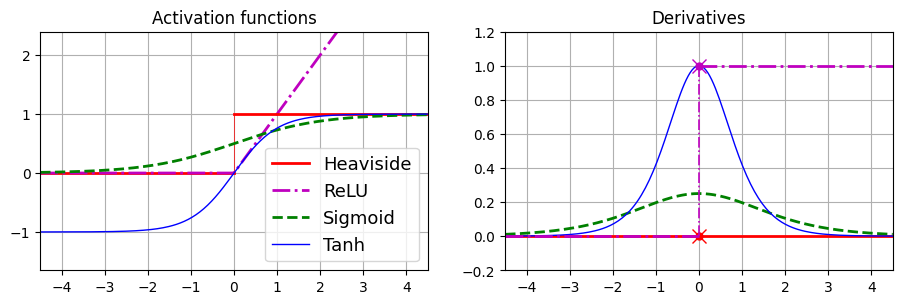

In [29]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])


plt.show()

## Regression MLPs

Tout d'abord, les MLP peuvent être utilisés pour des tâches de régression. Si vous souhaitez prédire une seule valeur (par exemple, le prix d'une maison en fonction de nombreuses caractéristiques), vous avez juste besoin d'un seul neurone de sortie : sa sortie est la valeur prédite. Pour la régression multivariée (c'est-à-dire pour prédire plusieurs valeurs à la fois), vous avez besoin d'un neurone de sortie par dimension de sortie. Par exemple, pour localiser le centre d'un objet sur une image, vous devez prédire des coordonnées 2D, donc vous avez besoin de deux neurones de sortie. Si vous voulez également placer une boîte englobante autour de l'objet, alors vous avez besoin de deux autres nombres : la largeur et la hauteur de l'objet. Vous vous retrouvez donc avec 4 neurones de sortie. En général, lors de la construction d'un MLP pour la régression, vous ne voulez pas utiliser de fonction d'activation pour les neurones de sortie, afin qu'ils soient libres de produire n'importe quelle plage de valeurs. Cependant, si vous voulez garantir que la sortie sera toujours positive, alors vous pouvez utiliser la fonction d'activation ReLU ou la fonction d'activation softplus dans la couche de sortie. Enfin, si vous voulez garantir que les prédictions se situeront dans une plage donnée de valeurs, alors vous pouvez utiliser la fonction logistique ou la tangente hyperbolique, et mettre à l'échelle les étiquettes dans la plage appropriée : de 0 à 1 pour la fonction logistique, ou de -1 à 1 pour la tangente hyperbolique.

La fonction de perte à utiliser pendant l'entraînement est généralement l'erreur quadratique moyenne, mais si vous avez beaucoup de valeurs aberrantes dans l'ensemble d'entraînement, vous préférerez peut-être utiliser l'erreur absolue moyenne à la place. En alternative, vous pouvez utiliser la perte de Huber, qui est une combinaison des deux.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [ ]:
rmse

## Classification MLPs

Les MLP peuvent également être utilisés pour des tâches de classification. Pour un problème de classification binaire, vous avez juste besoin d'un seul neurone de sortie utilisant la fonction d'activation logistique : la sortie sera un nombre entre 0 et 1, que vous pouvez interpréter comme la probabilité estimée de la classe positive. De toute évidence, la probabilité estimée de la classe négative est égale à un moins ce nombre.

Les MLP peuvent également gérer facilement des tâches de classification binaire multilabel (voir le chapitre 3). Par exemple, vous pourriez avoir un système de classification des e-mails qui prédit si chaque e-mail entrant est du courrier légitime (ham) ou du courrier indésirable (spam), et prédit simultanément s'il s'agit d'un e-mail urgent ou non urgent. Dans ce cas, vous auriez besoin de deux neurones de sortie, tous deux utilisant la fonction d'activation logistique : le premier produirait la probabilité que l'e-mail soit du spam et le second produirait la probabilité qu'il soit urgent. De manière plus générale, vous dédieriez un neurone de sortie pour chaque classe positive. Notez que les probabilités de sortie ne s'additionnent pas nécessairement à un. Cela permet au modèle de produire n'importe quelle combinaison d'étiquettes : vous pouvez avoir du courrier non urgent, du courrier urgent, du spam non urgent et peut-être même du spam urgent (bien que cela soit probablement une erreur).

Si chaque instance ne peut appartenir qu'à une seule classe, parmi 3 ou plus de classes possibles (par exemple, les classes 0 à 9 pour la classification d'images de chiffres), alors vous devez avoir un neurone de sortie par classe, et vous devriez utiliser la fonction d'activation softmax pour toute la couche de sortie (voir la Figure 10-9). La fonction softmax (introduite au chapitre 4) garantira que toutes les probabilités estimées sont comprises entre 0 et 1 et qu'elles s'additionnent à un (ce qui est nécessaire si les classes sont mutuellement exclusives). Cela s'appelle la classification multiclasse.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy


## Exemple d'implémentation d'un MLP pour la classification


Site cool : https://playground.tensorflow.org/

Commençons par charger le jeu de données Fashion MNIST. Keras propose plusieurs fonctions pour charger des ensembles de données populaires dans tf.keras.datasets. L'ensemble de données est déjà divisé entre un ensemble d'entraînement (60 000 images) et un ensemble de test (10 000 images), mais il peut être utile de diviser davantage l'ensemble d'entraînement pour disposer d'un ensemble de validation. Nous utiliserons 55 000 images pour l'entraînement et 5 000 pour la validation.

In [ ]:
import tensorflow as tf



fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


Comme MNIST du précédent TD, ce dataset est composé d'images de 28x28 pixels. Ici on prend 55k images pour le jeu d'entrainement :

# Exercice 7 : afficher les données X_train, y_train, et leur forme (shape)

In [32]:
print(X_train)
print(y_train)
print(X_train.shape)
print(y_train.shape)

[[   3.5214       15.            3.04994451 ...    1.60599334
    37.63       -122.43      ]
 [   5.3275        5.            6.49005964 ...    3.44333996
    33.69       -117.39      ]
 [   3.1          29.            7.54237288 ...    2.25084746
    38.44       -122.98      ]
 ...
 [   1.5561       35.            4.13993174 ...    3.27645051
    34.11       -117.29      ]
 [   2.1055       52.            5.17849462 ...    2.92688172
    36.76       -119.79      ]
 [   5.6022       31.            6.21971253 ...    2.53798768
    38.04       -122.2       ]]
[1.442 1.687 1.621 ... 0.68  0.613 1.97 ]
(11610, 8)
(11610,)


Chaque pixel est codé dans un entier uint 8 de 0 à 255

In [33]:
X_train.dtype

dtype('float64')

Réduisons les intensités de pixels à la plage de 0 à 1 et convertissons-les en nombres flottants en les divisant par 255 :

In [34]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Affichage d'une image

In [ ]:

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Les labels sont des uint de 0 à 9 représendant les ID des classes

In [36]:
y_train

array([1.442, 1.687, 1.621, ..., 0.68 , 0.613, 1.97 ])

Ici nous affichons les noms des classes :

In [37]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Donc, la première image dans l'ensemble d'entraînement est une bottine :

# Exercice 8 : afficher le nom de la classe du premier échantillon

In [ ]:
class_names[y_train[0]]

Affichons quelques images avec leur classe :

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Création du modèle avec l'API séquentielle

Construisons maintenant notre réseau de neurones, voici un MLP pour la classificaiton avec deux couches cachées :

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu")) # couche cachée
model.add(tf.keras.layers.Dense(100, activation="relu")) # couche cachée
model.add(tf.keras.layers.Dense(10, activation="softmax"))

Explorons ce code ligne par ligne :

* La première ligne crée un modèle séquentiel. Il s'agit du type le plus simple de modèle Keras, destiné aux réseaux neuronaux composés simplement d'une pile unique de couches, connectées séquentiellement. C'est ce qu'on appelle l'API séquentielle.
* Ensuite, nous construisons la première couche et l'ajoutons au modèle. Il s'agit d'une couche Flatten dont le rôle est simplement de convertir chaque image d'entrée en un tableau 1D : si elle reçoit des données d'entrée X, elle calcule X.reshape(-1, 1). Cette couche n'a pas de paramètres, elle est simplement là pour effectuer une prétraitement simple. Comme c'est la première couche du modèle, vous devez spécifier input_shape : cela n'inclut pas la taille du lot (batch size), seulement la forme des instances. En alternative, vous pourriez ajouter une keras.layers.InputLayer en tant que première couche, en définissant shape=[28,28].
* Ensuite, nous ajoutons une couche Dense cachée avec 300 neurones. Elle utilisera la fonction d'activation ReLU. Chaque couche Dense gère sa propre matrice de poids, contenant tous les poids de connexion entre les neurones et leurs entrées. Elle gère également un vecteur de termes de biais (un par neurone). Lorsqu'elle reçoit des données d'entrée, elle calcule l'Équation 1.
* Ensuite, nous ajoutons une deuxième couche Dense cachée avec 100 neurones, utilisant également la fonction d'activation ReLU.
* Enfin, nous ajoutons une couche Dense de sortie avec 10 neurones (un par classe), utilisant la fonction d'activation softmax (car les classes sont exclusives).

On peut ajouter les couches unes par unes comme on vient de le faire, ou passer directement une liste de couche en créant le modèle Sequential :

In [41]:

tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),

    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


La fonction summary affiche toutes les couches du modèle, avec leurs noms, la output shape, et son nombre de paramètres.

# Exercice 9 : Afficher le modèle à l'aide de la fonction summary()

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

à noter que la couche Dense a souvent beaucoup de paramètres. Par exemple la première couche cachée a 784*300 poids de connexion, 300 poids de biais, ce qui donne 235,5k paramètres.
Cela donne au modèle beaucoup de flexibilité pour s'ajuster aux données d'entraînement, mais cela signifie également que le modèle court le risque de surajustement (overfitting) , surtout lorsque vous n'avez pas beaucoup de données d'entraînement.

affichage des couches du modèle d'une autre façon :

In [ ]:
model.layers

Accès à une couche en particulier :

In [ ]:
hidden1 = model.layers[1]
hidden1.name

In [ ]:
model.get_layer('dense') is hidden1

Affichage des poids de la première couche dense :

In [ ]:
weights, biases = hidden1.get_weights()
weights

In [ ]:
weights.shape

Affichage des biais :

In [ ]:
biases

In [ ]:
biases.shape

Notez que la couche Dense a initialisé les poids de connexion de manière aléatoire (ce qui est nécessaire pour rompre la symétrie, comme discuté précédemment), et les biais ont simplement été initialisés à zéro, ce qui est acceptable. Si vous souhaitez utiliser une méthode d'initialisation différente, vous pouvez définir kernel_initializer (kernel est un autre nom pour la matrice des poids de connexion) ou bias_initializer lors de la création de la couche.

### Compilation du modèle

Après la création d'un modèle, vous devez appeler sa méthode compile() pour spécifier la fonction de perte et l'optimiseur à utiliser. En option, vous pouvez également spécifier une liste de métriques supplémentaires à calculer lors de l'entraînement et de l'évaluation :

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



En ce qui concerne l'optimiseur, "sgd" signifie simplement que nous allons entraîner le modèle en utilisant une descente de gradient stochastique simple. En d'autres termes, Keras effectuera l'algorithme de rétropropagation décrit précédemment (c'est-à-dire, autodifférenciation en mode inverse + descente de gradient). Nous discuterons d'optimiseurs plus efficaces dans le chapitre 11 (ils améliorent la partie descente de gradient, pas l'autodifférenciation). Il existe d'autre optimiseurs (ex Adam)


### Entrainer et évaluer le modèle

Maintenant, le modèle est prêt à être entraîné. Pour cela, nous devons simplement appeler sa méthode fit(). Nous lui passons les caractéristiques d'entrée (X_train) et les classes cibles (y_train), ainsi que le nombre d'epoch d'entraînement (sinon, il se limiterait par défaut à 1, ce qui ne serait certainement pas suffisant pour converger vers une bonne solution). Nous passons également un ensemble de validation (c'est facultatif) : Keras mesurera la perte et les métriques supplémentaires sur cet ensemble à la fin de chaque époque, ce qui est très utile pour voir à quel point le modèle se comporte vraiment : si les performances sur l'ensemble d'entraînement sont nettement meilleures que sur l'ensemble de validation, votre modèle est probablement en surapprentissage de l'ensemble d'entraînement (ou il y a un bug, comme un désaccord de données entre l'ensemble d'entraînement et l'ensemble de validation) :

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Le réseau de neurones est entraîné. À chaque epoch (itération) d'entraînement, Keras affiche le nombre d'instances traitées jusqu'à présent (avec une barre de progression), le temps moyen d'entraînement par échantillon, la perte et la précision (ou toute autre métrique supplémentaire demandée), à la fois sur l'ensemble d'entraînement et sur l'ensemble de validation. Vous pouvez voir que la perte d'entraînement a diminué, ce qui est un bon signe, et la précision de validation a atteint 88.78 % après 30 epoch, ce qui n'est pas très éloigné de la précision d'entraînement, donc il ne semble pas y avoir beaucoup de surapprentissage.

In [ ]:
history.params

Le nombre de steps par epoch correspond à la taille du jeu d'entrainement divisé par la taille du batch (par défaut 32)

In [ ]:
print(history.epoch)

Visualisation de la courbe d'apprentissage

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code

plt.show()

Vous pouvez voir que la précision d'entraînement et de validation augmente régulièrement pendant l'entraînement, tandis que la perte d'entraînement et de validation diminue. Bien ! De plus, les courbes de validation sont assez proches des courbes d'entraînement, ce qui signifie qu'il n'y a pas trop de surajustement. Dans ce cas particulier, le modèle s'est mieux comporté sur l'ensemble de validation qu'à l'entraînement au début de l'entraînement : cela arrive parfois par hasard (surtout lorsque l'ensemble de validation est assez petit). Cependant, la performance sur l'ensemble d'entraînement finit par surpasser la performance sur l'ensemble de validation, comme c'est généralement le cas lorsque l'entraînement se poursuit suffisamment longtemps. Vous pouvez voir que le modèle n'a pas encore tout à fait convergé, car la perte de validation continue de diminuer, vous devriez donc probablement continuer l'entraînement. C'est aussi simple que d'appeler à nouveau la méthode fit(), car Keras continue simplement l'entraînement là où il s'est arrêté (vous devriez pouvoir atteindre une précision de validation proche de 89 %).

Une fois satisfait de la précision de validation de votre modèle, vous devriez l'évaluer sur l'ensemble de test pour estimer l'erreur de généralisation avant de déployer le modèle en production. Vous pouvez le faire facilement en utilisant la méthode evaluate() (elle prend également en charge plusieurs autres arguments, tels que batch_size ou sample_weight, veuillez consulter la documentation pour plus de détails) :

# Exercice 10 : évaluer le modèle avec la fonction 'evaluate' sur le jeu de test

In [ ]:
#à compléter
model.evaluate(X_test, y_test)

### Utiliser le modèle pour faire des prédictions

Ensuite, nous pouvons utiliser la méthode predict() du modèle pour faire des prédictions sur de nouvelles instances. Comme nous n'avons pas de nouvelles instances réelles, nous utiliserons simplement les trois premières instances de l'ensemble de test :

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


Comme vous pouvez le voir, pour chaque instance, le modèle estime une probabilité pour chaque classe, de la classe 0 à la classe 9. Par exemple, pour la première image, il estime que la probabilité de la classe 9 (botte de cheville) est de 79 %, la probabilité de la classe 7 (basket) est de 12 %, la probabilité de la classe 5 (sandalette) est de 9 %, et les autres classes sont négligeables. En d'autres termes, il "pense" que c'est une chaussure, probablement des bottes de cheville, mais il n'en est pas tout à fait sûr, cela pourrait être des baskets ou des sandalettes à la place. Si vous vous souciez uniquement de la classe avec la probabilité estimée la plus élevée (même si cette probabilité est assez faible), vous pouvez utiliser le code ci dessous :

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

Affichage des images avec leurs prédictions :

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exemple d'implémentation d'un MLP pour la regression

Passons au problème du logement en Californie et abordons-le en utilisant un réseau de neurones pour la régression. Pour simplifier, nous utiliserons la fonction fetch_california_housing() de Scikit-Learn pour charger les données : cet ensemble de données est plus simple que celui que nous avons utilisé au chapitre 2, car il ne contient que des caractéristiques numériques (il n'y a pas de caractéristique ocean_proximity), et il n'y a pas de valeur manquante. Après avoir chargé les données, nous les divisons en un ensemble d'entraînement, un ensemble de validation et un ensemble de test, et nous mettons à l'échelle toutes les caractéristiques :

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

La construction, l'entraînement, l'évaluation et l'utilisation d'un MLP de régression à l'aide de l'API séquentielle pour faire des prédictions sont assez similaires à ce que nous avons fait pour la classification. Les principales différences résident dans le fait que la couche de sortie a un seul neurone (car nous voulons seulement prédire une seule valeur) et n'utilise pas de fonction d'activation, et la fonction de perte est l'erreur quadratique moyenne. Comme l'ensemble de données est assez bruyant, nous utilisons simplement une seule couche cachée avec moins de neurones qu'auparavant pour éviter le surajustement :

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)


In [ ]:
rmse_test

In [ ]:
y_pred

Comme vous pouvez le constater, l'API séquentielle est assez facile à utiliser. Cependant, bien que les modèles séquentiels soient extrêmement courants, il est parfois utile de construire des réseaux neuronaux avec des topologies plus complexes, ou avec plusieurs entrées ou sorties. À cette fin, Keras propose l'API fonctionnelle que nous n'étudierons pas ici.

# CNN

Les réseaux de neurones convolutifs (CNN) ont émergé de l'étude du cortex visuel du cerveau et ont été utilisés dans la reconnaissance d'images depuis les années 1980. Au cours des dernières années, grâce à l'augmentation de la puissance de calcul, à la quantité de données d'entraînement disponible pour l'entraînement de réseaux profonds, les CNN ont réussi à atteindre des performances supérieures à celles des humains dans certaines tâches visuelles complexes. Ils alimentent des services de recherche d'images, des voitures autonomes, des systèmes automatiques de classification vidéo, et bien plus encore. De plus, les CNN ne se limitent pas à la perception visuelle : ils réussissent également dans de nombreuses autres tâches, telles que la reconnaissance vocale ou le traitement du langage naturel (NLP). Cependant, nous nous concentrerons principalement sur les applications visuelles pour l'instant.


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

L'ensemble de données CIFAR10 contient 60 000 images couleur dans 10 classes, avec 6 000 images dans chaque classe. L'ensemble de données est divisé en 50 000 images d'entraînement et 10 000 images de test. Les classes sont mutuellement exclusives et il n'y a pas de chevauchement entre elles.

In [ ]:

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Pour vérifier que l'ensemble de données semble correct, traçons les 25 premières images de l'ensemble d'apprentissage et affichons le nom de la classe sous chaque image :

In [ ]:
import matplotlib.pyplot as plt

def show_images(train_images,
            class_names,
            train_labels,
            nb_samples = 12, nb_row = 4):

    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [ ]:

#permet de scaler les images de 0 à 255 vers 0 à 1
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

En entrée, un CNN prend des tenseurs de forme (image_height, image_width, color_channels), en ignorant la taille du lot. Si vous débutez avec ces dimensions, color_channels fait référence à (R,G,B). Dans cet exemple, vous allez configurer votre CNN pour traiter les entrées de forme (32, 32, 3), qui est le format des images CIFAR. Vous pouvez le faire en passant l'argument input_shape à votre première couche.
Ci-dessus, vous pouvez voir que la sortie de chaque couche Conv2D et MaxPooling2D est un tenseur 3D de forme (hauteur, largeur, canaux). Les dimensions de largeur et de hauteur ont tendance à diminuer à mesure que vous progressez dans le réseau. Le nombre de canaux de sortie pour chaque couche Conv2D est contrôlé par le premier argument (par exemple, 32 ou 64). En règle générale, à mesure que la largeur et la hauteur diminuent, vous pouvez vous permettre (par calcul) d'ajouter plus de canaux de sortie dans chaque couche Conv2D.
Pour compléter le modèle, on va alimenter le dernier tenseur de sortie de la base convolutive (de forme (4, 4, 64)) dans une ou plusieurs couches denses pour effectuer la classification. Les couches denses prennent des vecteurs en entrée (qui sont 1D), tandis que la sortie actuelle est un tenseur 3D. Tout d'abord, vous allez aplatir (ou dérouler) la sortie 3D en 1D, puis ajouter un ou plusieurs calques Dense par-dessus. CIFAR a 10 classes de sortie, vous utilisez donc une couche Dense finale avec 10 sorties.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))



L'entrée du modèle est un tenseur de dimensions 32x32x3, respectivement, pour la largeur, la hauteur et les canaux.

Nous aurons deux couches de convolution. La première couche applique 32 filtres de taille 3x3 chacun avec une fonction d'activation ReLU. La deuxième couche applique 64 filtres de taille 3x3.

La première couche de pooling appliquera un max pooling de taille 2x2.

La deuxième couche de pooling appliquera également un max pooling de taille 2x2.

La couche entièrement connectée aura 128 unités et une fonction d'activation ReLU.

Enfin, la sortie sera composée de 10 unités correspondant aux 10 classes, et la fonction d'activation est une softmax pour générer les distributions de probabilité.

la taille de sortie des couches convolutive se calcule de la façon suivante :

Output size = (input size -1) * stride -2*padding + (kernel size - 1) +1

# Exercice 11 : à l'aide de la fonction summary, afficher le modèle

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Tous les éléments nécessaires sont enfin disponibles pour configurer et déclencher l'entraînement du modèle. Cela se fait respectivement avec les fonctions compile() et fit(), qui prennent les paramètres suivants :

L'optimiseur est responsable de la mise à jour des poids et des biais du modèle. Dans notre cas, nous utilisons l'optimiseur Adam.
La fonction de perte est utilisée pour mesurer les erreurs de classification, et nous utilisons Crossentropy().
Enfin, la métrique est utilisée pour mesurer la performance du modèle, et dans notre cas, la précision, la précision et le rappel seront affichés.

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# entrainement du modèle
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Après l'entraînement du modèle, nous pouvons comparer sa performance sur les ensembles d'entraînement et de test en traçant les métriques ci-dessus à l'aide de la fonction auxiliaire show_performance_curve() en deux dimensions.

L'axe horizontal (x) représente le nombre d'epochs (itérations).
L'axe vertical (y) représente la performance sous-jacente du modèle.
La courbe représente la valeur des métriques à une epoch spécifique.
Pour une meilleure visualisation, une ligne rouge verticale est tracée à l'intersection des valeurs de performance d'entraînement et de validation, ainsi qu'avec la valeur optimale.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_performance_curve(training_result, metric, metric_label):

    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    close_values = np.argwhere(np.isclose(train_perf, validation_perf, atol=1e-2))

    if close_values.size == 0:
        print("Training and validation curves do not intersect within the specified tolerance.")
        intersection_idx = 0  # Or another suitable default value
        intersection_value = train_perf[intersection_idx] if train_perf else 0  # Handle empty train_perf
    else:
        intersection_idx = close_values.flatten()[0]
        intersection_value = train_perf[intersection_idx]

    plt.plot(train_perf, label=metric_label)
    plt.plot(validation_perf, label = 'val_'+str(metric))
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

    plt.annotate(f'Optimal Value: {intersection_value:.4f}',
                 xy=(intersection_idx, intersection_value),
                 xycoords='data',
                 fontsize=10,
                 color='green')

    plt.xlabel('Epoch')
    plt.ylabel(metric_label)
    plt.legend(loc='lower right')
    plt.show() # Show the plot

In [ ]:
import numpy as np
show_performance_curve(training_history, 'accuracy', 'accuracy')

In [ ]:
show_performance_curve(training_history, 'precision', 'precision')

Après l'entraînement du modèle sans aucun réglage fin et prétraitement, nous obtenons :

Un score de précision de 67,09 %, ce qui signifie que le modèle classe correctement 67 % des échantillons sur chaque tranche de 100 échantillons.
Et une précision de 76,55 %, ce qui signifie que sur chaque tranche de 100 prédictions positives, presque 77 d'entre elles sont des vrais positifs, et les 23 restantes sont des faux positifs.
Ces scores sont atteints respectivement lors des troisième et deuxième epochs pour la précision et la précision.
Ces deux métriques donnent une compréhension globale du comportement du modèle.

Que se passe-t-il si nous voulons savoir pour chaque classe celles que le modèle est capable de prédire correctement et celles avec lesquelles le modèle éprouve des difficultés ?

Cela peut être obtenu à partir de la matrice de confusion, qui montre pour chaque classe le nombre de prédictions correctes et incorrectes. La mise en œuvre est donnée ci-dessous. Nous commençons par faire des prédictions sur les données de test, puis calculons la matrice de confusion et affichons le résultat final.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

Les classes 0, 1, 6, 7, 8, 9, respectivement, pour avion, voiture, grenouille, cheval, navire et camion, ont les valeurs les plus élevées à la diagonale. Cela signifie que le modèle est meilleur pour prédire ces classes.
En revanche, il semble avoir des difficultés avec les classes restantes :
Les classes avec les valeurs les plus élevées hors diagonale sont celles que le modèle confond avec les bonnes classes. Par exemple, il confond les oiseaux (classe 2) avec un avion, et les voitures avec les camions (classe 9).